# Version plus clean parce que l'autre c'est le bordel

# Introduction

Les données sont issues du site du concours KAGGLE; il s’agit du jeu de données " Gym Members Exercise
Dataset" disponible ici : https://www.kaggle.com/datasets/valakhorasani/gym-members-exercise-dataset.
Ce jeu de données fournit un aperçu détaillé des routines d’exercice, des attributs physiques et des mesures
de la condition physique des membres d’une salle de sport. Il contient 15 variables observées chez 973 individus
fréquentant une salle de sport :
- Age : âge du membre de la salle de sport.
- Gender : Sexe du membre de la salle de sport (qualitative à deux modalités : homme ou femme).
- Weight..kg. : Poids du membre en kilogrammes.
- Height..m. : Taille du membre en mètres.
- Max_BPM : Fréquence cardiaque maximale (battements par minute) pendant les séances d’entraînement.
- Avg_BPM : Fréquence cardiaque moyenne pendant les séances d’entraînement.
- Resting_BPM : Fréquence cardiaque au repos avant l’entraînement.
- Session_Duration..hours. : Durée de chaque séance d’entraînement en heures.
- Calories_Burned : Total des calories brûlées au cours de chaque séance.
- Workout_Type : Type d’entraînement effectué (qualitative à 4 modalités : cardio, musculation, yoga,
HIIT).
- Fat_Percentage (Pourcentage de graisse) : Pourcentage de graisse corporelle du membre.
- Water_Intake..liters. : Consommation quotidienne d’eau pendant les séances d’entraînement.
- Workout_Frequency..days.week. : Nombre de séances d’entraînement par semaine (qualitative à 4
modalités : 2 à 5).
- Experience_Level : Niveau d’expérience (qualitative à 3 modalités : 1 pour débutant à 3 pour expert).
- BMI : Indice de masse corporelle (IMC), calculé à partir de la taille et du poids.

  
Dans ce projet, on souhaite dans un premier temps, prédire la variable **Calories_Burned** à partir de toutes
les autres variables, et dans un second temps, prédire la variable **Experience_Level** à partir de toutes les autres
variables (dont Calories_Burned).

Pour cela nous allons commencer par une exploration des variables quantitatives et qualitatives. Ensuite nous passerons à la modélisation des variables à prédire.e


In [1]:
# Chargement des librairies nécessaires
# ça serait bien de dire plus ou moins à quoi serve chaque librairie
library(ggplot2)
library(tidyverse)
library(gridExtra)
library(GGally)
library(plotly)
library(corrplot)
library(reshape2)
library(FactoMineR) 
library(factoextra)
library(glmnet) 
library(ggfortify)
library(pROC)
library(ROCR)
library(MASS) #Pour la méthode BoxCox
library(vcd)
library(mosaic)
library(caret)  


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ purrr::%||%()   masks base::%||%()
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attachement du package : ‘gridExtra’


L'objet suivant est masqué depuis ‘package:dplyr’:

    combine


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2


Attachement du package : ‘plotly’


L'objet suivant est masqué depuis ‘package:ggplot2’:

    last_plot


L'objet suivant est masqué depuis ‘package:stats’:

    filter


L'objet suivant est masqué depuis ‘package:graphics’:

    layout


corrplot 0.92 loaded


Attachement 

<h1 style="color:red">I) Statistiques descriptives / Exploration des variables</h1>


### 1) Prise en charge des données : Vérification de la nature des différentes variables et leur encodage. Convertion des variables qualitatives.

In [2]:
# Lecture des données
path <- ""
gym <- read.csv("gym_members_exercise_tracking.csv", header = TRUE)
# Premières lignes du jeu de données
head(gym)
# Vérification du contenu
summary(gym)

Age Gender Weight..kg. Height..m. Max_BPM Avg_BPM Resting_BPM
1 56  Male   88.3        1.71       180     157     60         
2 46  Female 74.9        1.53       179     151     66         
3 32  Female 68.1        1.66       167     122     54         
4 25  Male   53.2        1.70       190     164     56         
5 38  Male   46.1        1.79       188     158     68         
6 56  Female 58.0        1.68       168     156     74         
  Session_Duration..hours. Calories_Burned Workout_Type Fat_Percentage
1 1.69                     1313            Yoga         12.6          
2 1.30                      883            HIIT         33.9          
3 1.11                      677            Cardio       33.4          
4 0.59                      532            Strength     28.8          
5 0.64                      556            Strength     29.2          
6 1.59                     1116            HIIT         15.5          
  Water_Intake..liters. Workout_Frequency..days.week. Experience_Level BMI  
1 3.5                   4                             3                30.20
2 2.1                   4                             2                32.00
3 2.3                   4                             2                24.71
4 2.1                   3                             1                18.41
5 2.8                   3                             1                14.39
6 2.7                   5                             3                20.55

      Age           Gender           Weight..kg.       Height..m.   
 Min.   :18.00   Length:973         Min.   : 40.00   Min.   :1.500  
 1st Qu.:28.00   Class :character   1st Qu.: 58.10   1st Qu.:1.620  
 Median :40.00   Mode  :character   Median : 70.00   Median :1.710  
 Mean   :38.68                      Mean   : 73.85   Mean   :1.723  
 3rd Qu.:49.00                      3rd Qu.: 86.00   3rd Qu.:1.800  
 Max.   :59.00                      Max.   :129.90   Max.   :2.000  
    Max_BPM         Avg_BPM       Resting_BPM    Session_Duration..hours.
 Min.   :160.0   Min.   :120.0   Min.   :50.00   Min.   :0.500           
 1st Qu.:170.0   1st Qu.:131.0   1st Qu.:56.00   1st Qu.:1.040           
 Median :180.0   Median :143.0   Median :62.00   Median :1.260           
 Mean   :179.9   Mean   :143.8   Mean   :62.22   Mean   :1.256           
 3rd Qu.:190.0   3rd Qu.:156.0   3rd Qu.:68.00   3rd Qu.:1.460           
 Max.   :199.0   Max.   :169.0   Max.   :74.00   Max.   :2.000           

On remarque que il y a plusieurs variables qualitatives : Gender, Workout_Type.
De même certaines variables ne prennent pas beaucoup de valeurs différentes donc il est intérréssant de les convertir en facteur : Experience_Level, Workout_Frequency..days.week.

Les autres variables sont des variables quantitatives que l'on transformera plus tard. 

In [3]:
# Changement du type des variables qualitatives en facteur
gym[, "Gender"] <- as.factor(gym[, "Gender"])
gym[, "Workout_Type"] <- as.factor(gym[, "Workout_Type"])
#On décide de mettre les 2 variables suivantes sous forme qualitatives car elles prennent seulement un certains nombres de valeur.
gym[, "Experience_Level"] <- as.factor(gym[, "Experience_Level"])
gym[, "Workout_Frequency..days.week."] <- as.factor(gym[, "Workout_Frequency..days.week."])

In [4]:
# Vérification dans le summary
summary(gym)

      Age           Gender     Weight..kg.       Height..m.       Max_BPM     
 Min.   :18.00   Female:462   Min.   : 40.00   Min.   :1.500   Min.   :160.0  
 1st Qu.:28.00   Male  :511   1st Qu.: 58.10   1st Qu.:1.620   1st Qu.:170.0  
 Median :40.00                Median : 70.00   Median :1.710   Median :180.0  
 Mean   :38.68                Mean   : 73.85   Mean   :1.723   Mean   :179.9  
 3rd Qu.:49.00                3rd Qu.: 86.00   3rd Qu.:1.800   3rd Qu.:190.0  
 Max.   :59.00                Max.   :129.90   Max.   :2.000   Max.   :199.0  
    Avg_BPM       Resting_BPM    Session_Duration..hours. Calories_Burned 
 Min.   :120.0   Min.   :50.00   Min.   :0.500            Min.   : 303.0  
 1st Qu.:131.0   1st Qu.:56.00   1st Qu.:1.040            1st Qu.: 720.0  
 Median :143.0   Median :62.00   Median :1.260            Median : 893.0  
 Mean   :143.8   Mean   :62.22   Mean   :1.256            Mean   : 905.4  
 3rd Qu.:156.0   3rd Qu.:68.00   3rd Qu.:1.460            3rd Qu.:1076.0

### 2) Exploration par une analyse descriptive unidimensionnelle des données.

#### 2.1) Données quantitatives 

Il est nécessaire d'étudier la distribution des différentes variables et de noter la symétrie ou non de celles-ci.

In [5]:
#On pourrait aussi rajouter quelques histogrammes ou boxplots

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“The dot-dot notation (`..density..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(density)` instead.”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


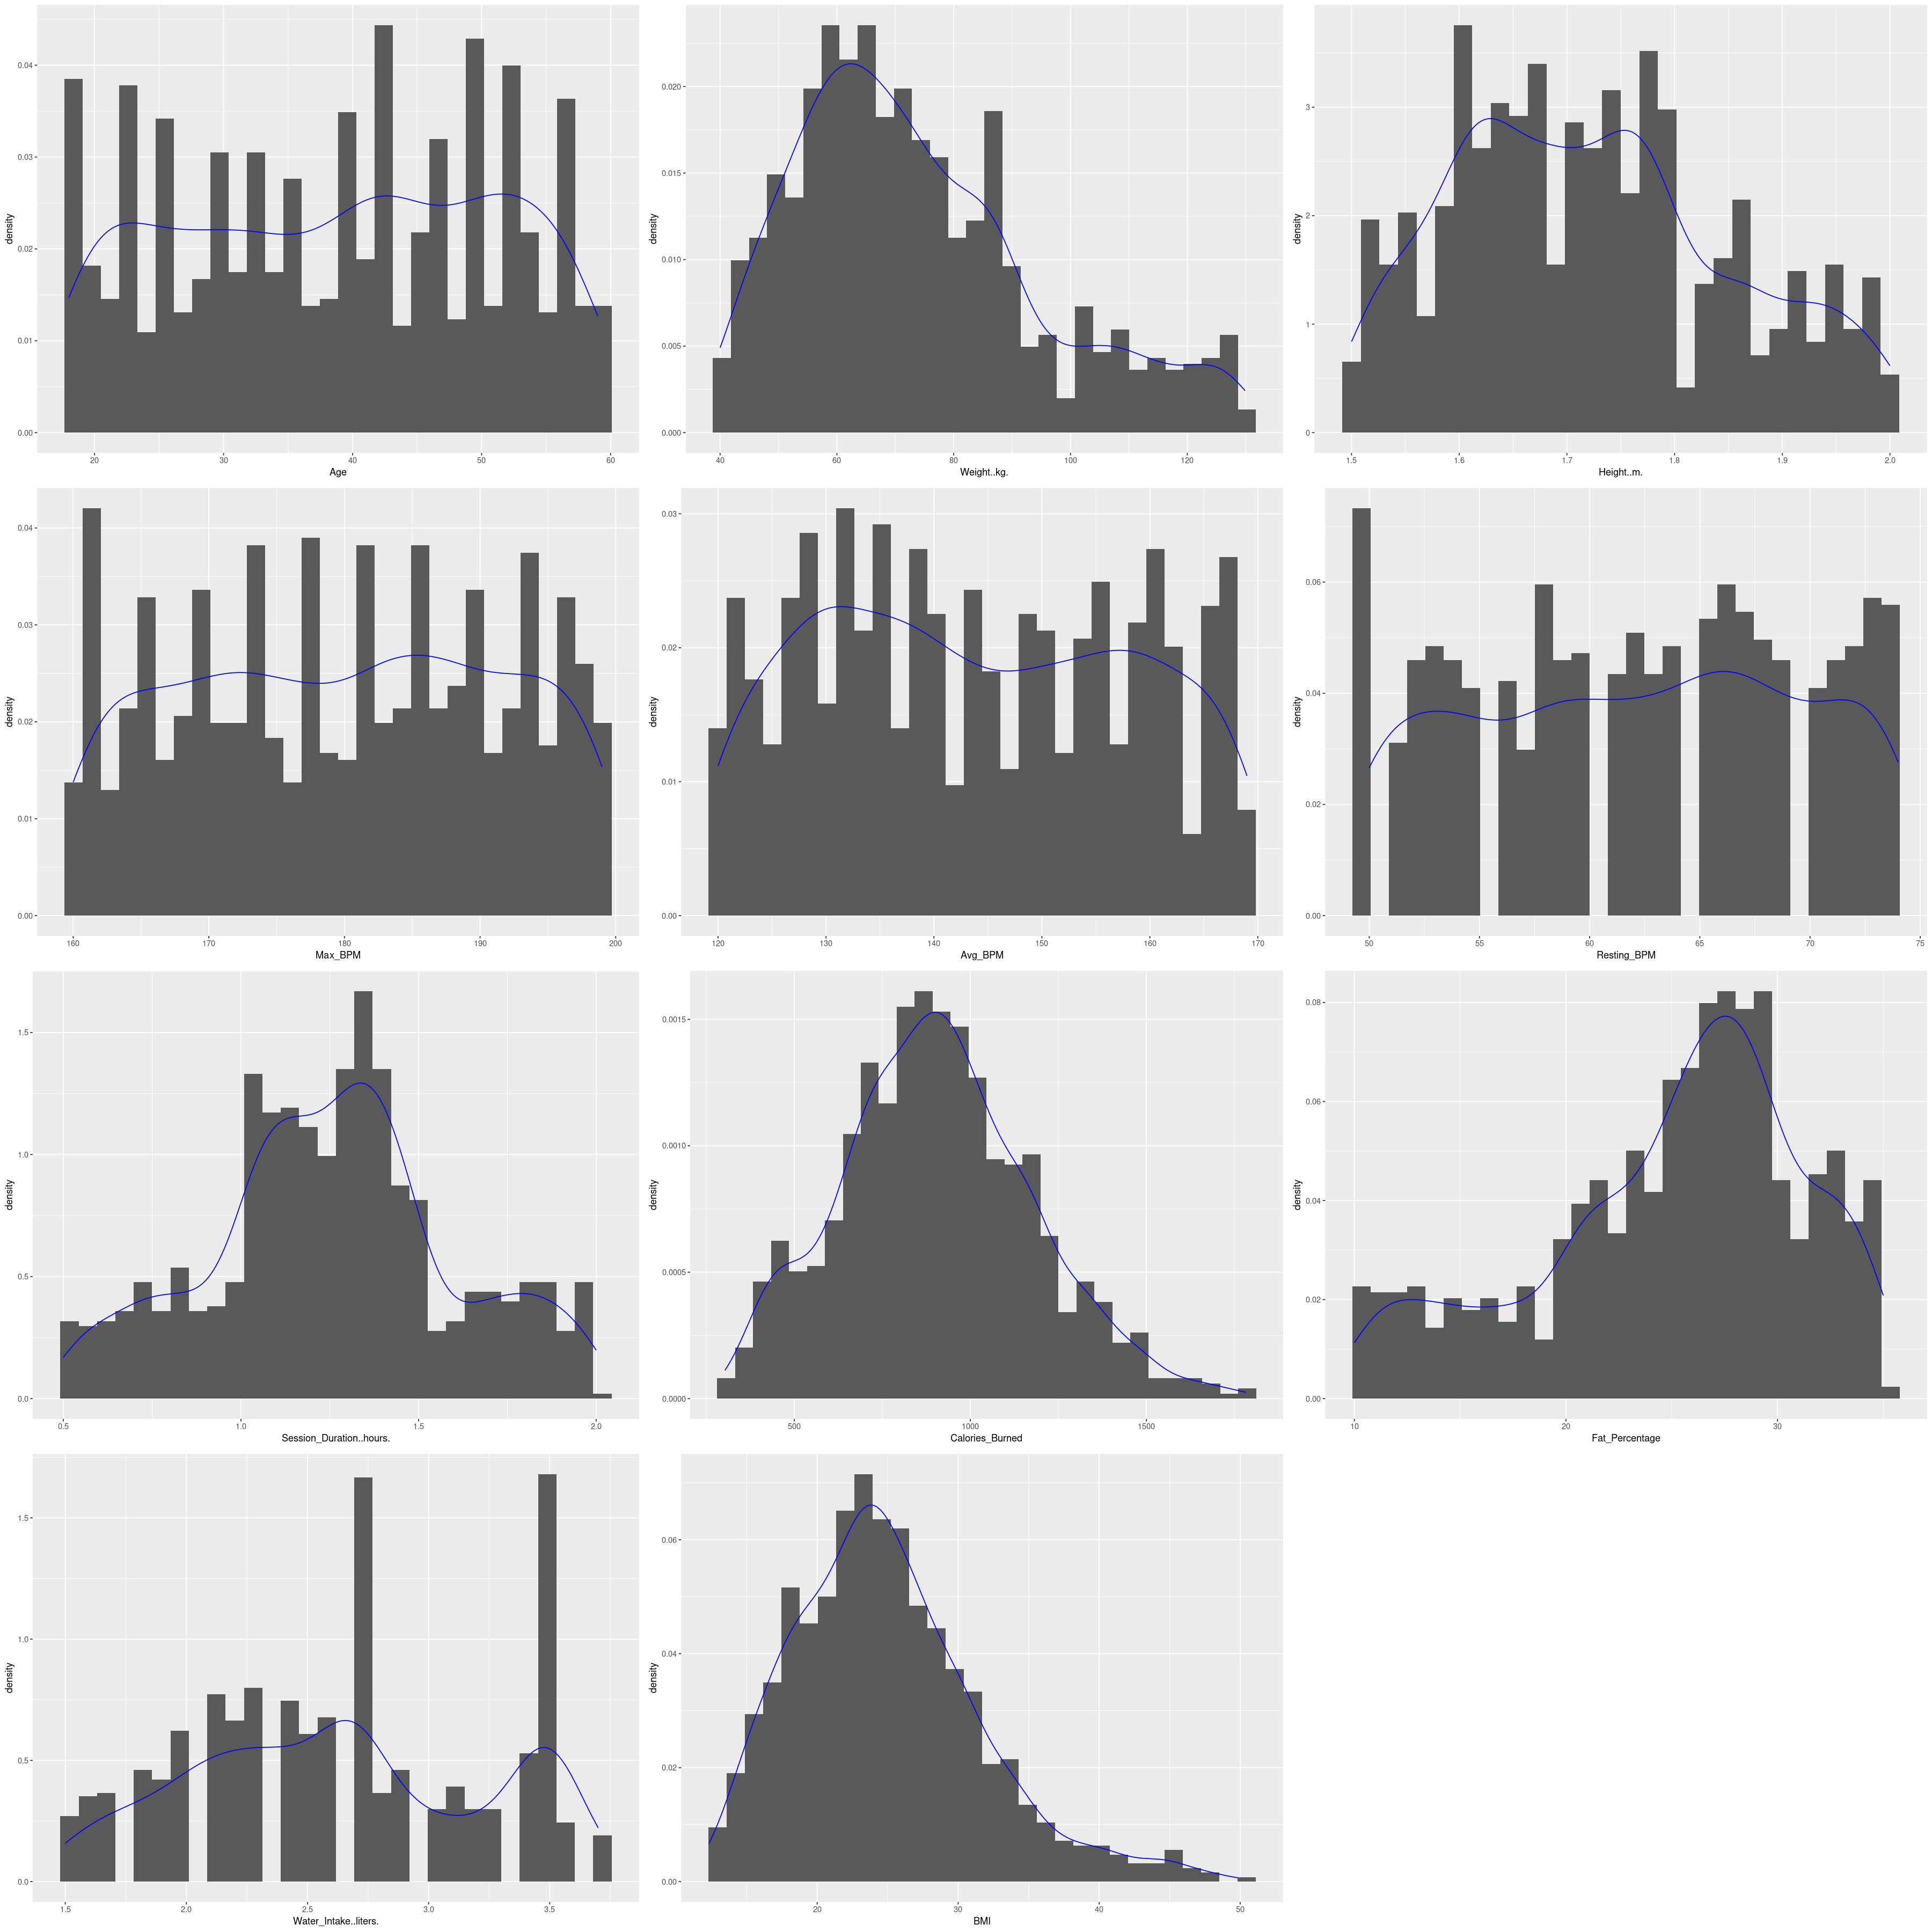

In [6]:
options(repr.plot.width=30, repr.plot.height=30)
g1<-ggplot(gym,aes(x=Age))+geom_histogram(aes(y=after_stat(density)))+geom_density(alpha=.2, col="blue") 
g2<-ggplot(gym,aes(x=Weight..kg.))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g3<-ggplot(gym,aes(x=Height..m.))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g4<-ggplot(gym,aes(x=Max_BPM))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g5<-ggplot(gym,aes(x=Avg_BPM))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g6<-ggplot(gym,aes(x=Resting_BPM))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g7<-ggplot(gym,aes(x=Session_Duration..hours.))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g8<-ggplot(gym,aes(x=Calories_Burned))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g9<-ggplot(gym,aes(x=Fat_Percentage))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g10<-ggplot(gym,aes(x=Water_Intake..liters.))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g11<-ggplot(gym,aes(x=BMI))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 

grid.arrange(g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,ncol=3)

#Les variables sont quantitatives et non symétriques sauf calories_burned et BMI à peu près.

Les variables sont quantitatives et non symétriques sauf calories_burned et BMI à peu près. On va donc passer a une transformation des variables pour rendre certaines distributions plus symétriques et ainsi plus "gaussiennes". C'est nécessaire pour certaines méthodes à venir de modélisation (linéaires), pas pour toutes (arbres).

Dans notre cas, les variables ayant une ressemblance gaussienne sont calories_burned, BMI, Weight..kg. et Fat_Percentage.
On va donc essayer de les centrer.

#### 2.1.1) Transformation des variables 

Remarque : comme nous allons prédire Calories_Burned, il n'est pas intéressant de la transformer.

##### a) BMI

Tout d'abord, on va s'intéresser à BMI car elle est plus ou moins symétrique. Ainsi il se peut qu'en appliquant une certaine fonction bien choisie, nous puissions la rendre symétrique.
MAL DIT : En s'inspirant du TP de base, on remarque que l'on aplique + des log lorsqu'il y a un gros pic au début (pour "contrer le log").
Ici, on ne remarque pas de pic particulier donc on va se contenter d'appliquer les 2 fonctions vues en TP : sqrt et log puis comparer les résultats.

In [7]:
gym[, "LBMI"] <- log(gym[, "BMI"])
gym[, "SBMI"] <- sqrt(gym[, "BMI"])

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


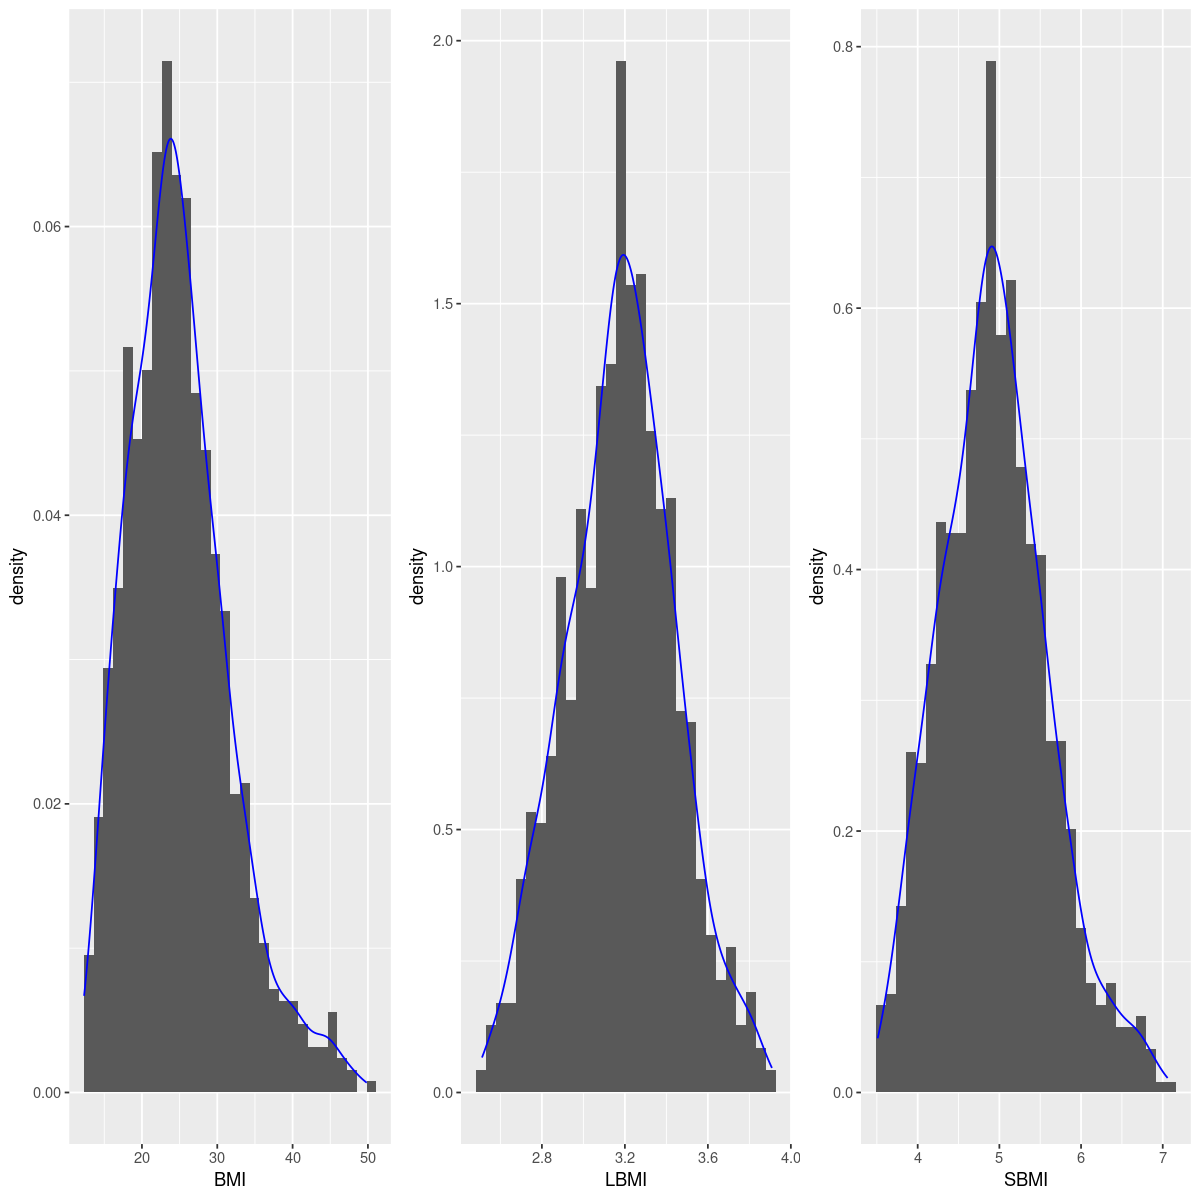

In [8]:
options(repr.plot.width=10, repr.plot.height=10)
g1<-ggplot(gym,aes(x=BMI))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g2<-ggplot(gym,aes(x=LBMI))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g3<-ggplot(gym,aes(x=SBMI))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
grid.arrange(g1, g2, g3, ncol=3)

Pour l'instant, on part sur le LBMI (log) car c'est celle qu'on trouve la plus centrée

Maintenant, est ce qu'il faut faire le même raisonnement pour chaque variables ou uniquement celle pour lesquelles on estime que c'est déjà à peu près symétrique ? => non, tout ce qui est plus ou moins uniforme, ça sert à rien d'essayer, ça restera nul

Est ce qu'il y a d'autres fonctions à utiliser que sqrt et log ? => oui 

##### b) Weight..kg

[1] -0.3434343


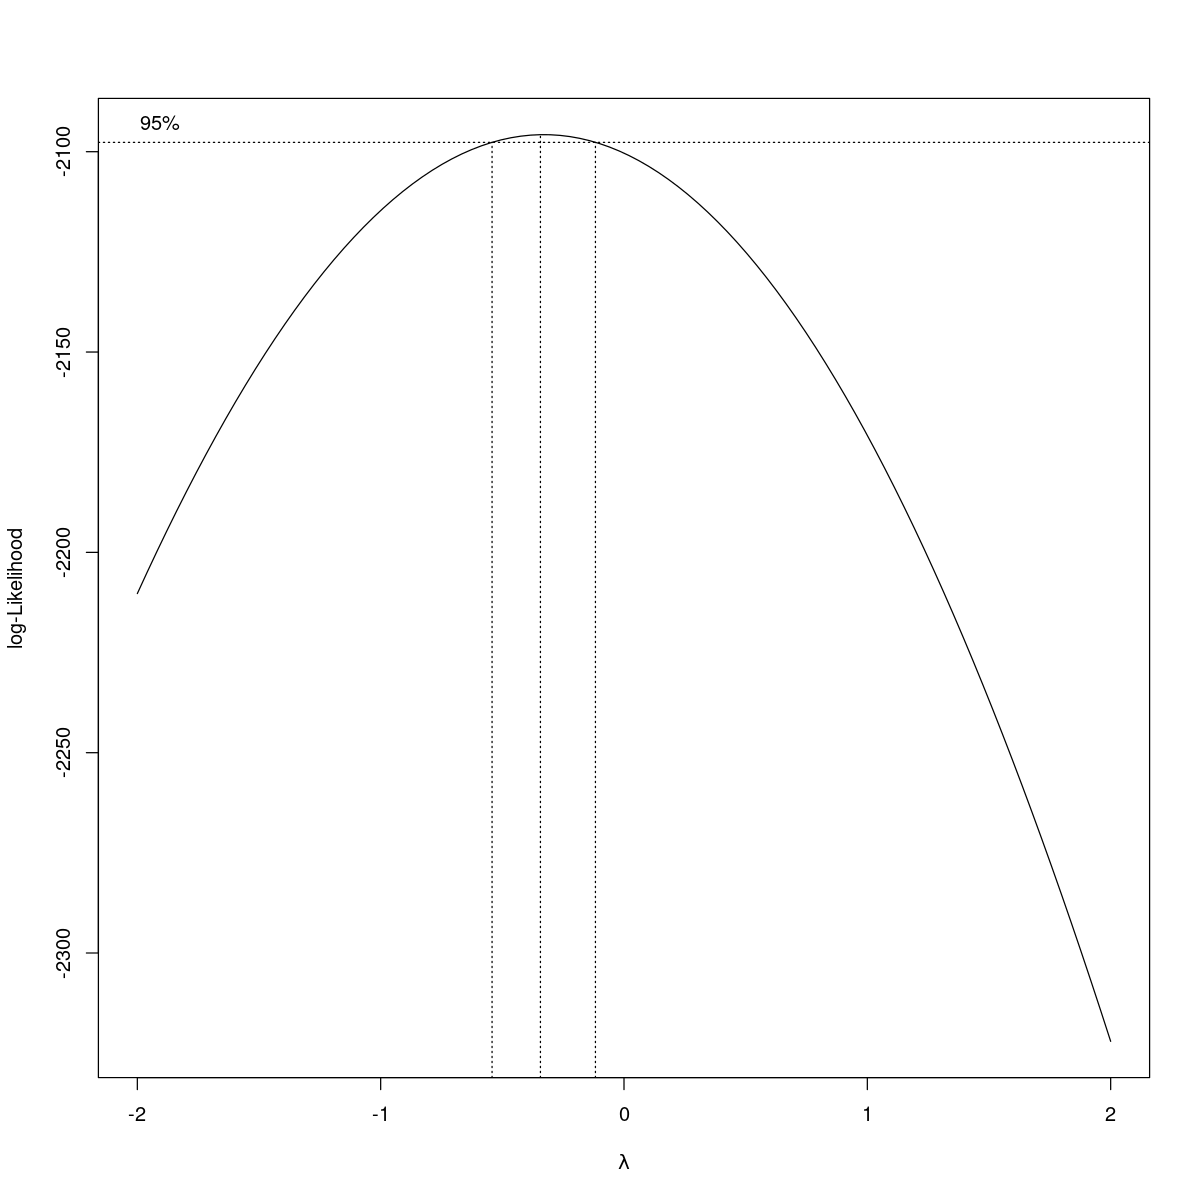

In [9]:
gym[, "LWeight..kg."] <- log(gym[, "Weight..kg."])
gym[, "SWeight..kg."] <- sqrt(gym[, "Weight..kg."])

#On essaye d'appliquer 2 autres fonctions:

gym[, "AWeight..kg."] <- atan(gym[, "Weight..kg."]) #arctan

#Méthode Box Cox => on optimise la valeur de lambda pour rendre la distribution la plus normale possible. Fonctionne pour des valeurs strictement positives (le cas ici)
lambda <- boxcox(lm(Weight..kg. ~ 1, data = gym), lambda = seq(-2, 2, by = 0.1))$x[which.max(boxcox(lm(Weight..kg. ~ 1, data = gym), lambda = seq(-2, 2, by = 0.1))$y)]
if (lambda == 0) {
  gym[, "BWeight..kg."] <- log(gym[, "Weight..kg."])
} else {
  gym[, "BWeight..kg."] <- (gym[, "Weight..kg."]^lambda - 1) / lambda
}
print(lambda)

Ici, le lambda optimal pour la méthode Box Cox est : -0.3434343

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


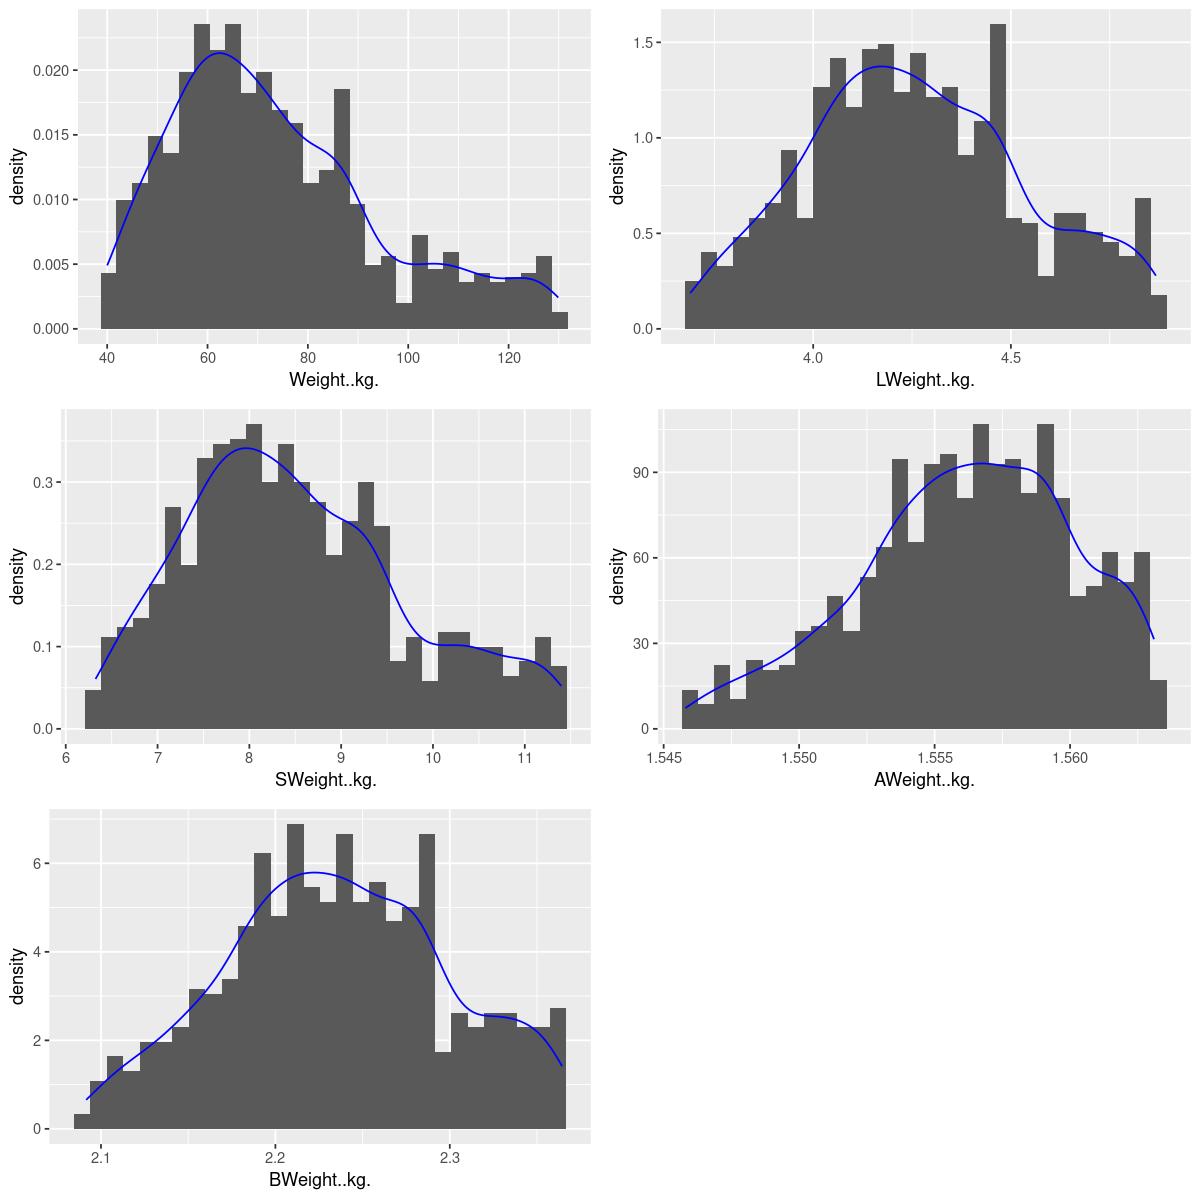

In [10]:
options(repr.plot.width=10, repr.plot.height=10)
g1<-ggplot(gym,aes(x=Weight..kg.))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g2<-ggplot(gym,aes(x=LWeight..kg.))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") # => le plus correct
g3<-ggplot(gym,aes(x=SWeight..kg.))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g4<-ggplot(gym,aes(x=AWeight..kg.))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g5<-ggplot(gym,aes(x=BWeight..kg.))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
grid.arrange(g1, g2, g3, g4, g5, ncol=2)

Tout de même, la fonction log reste celle qui rend la distribution la plus gaussienne => on garde LWeight

##### c) Fat_Percentage

Pour la dernière variable Fat_Percentage, les transformations testées n'ont pas été concluantes. On la gardera tel quel. 

#### 2.1.2) Suppression des variables qui ont été transformées

In [11]:
gym <- gym[ , -which(names(gym) == "BMI")]
gym <- gym[ , -which(names(gym) == "SBMI")]
gym <- gym[ , -which(names(gym) == "Weight..kg." )]
gym <- gym[ , -which(names(gym) == "SWeight..kg." )]
gym <- gym[ , -which(names(gym) == "AWeight..kg." )]
gym <- gym[ , -which(names(gym) == "BWeight..kg." )]

In [12]:
summary(gym)

      Age           Gender      Height..m.       Max_BPM         Avg_BPM     
 Min.   :18.00   Female:462   Min.   :1.500   Min.   :160.0   Min.   :120.0  
 1st Qu.:28.00   Male  :511   1st Qu.:1.620   1st Qu.:170.0   1st Qu.:131.0  
 Median :40.00                Median :1.710   Median :180.0   Median :143.0  
 Mean   :38.68                Mean   :1.723   Mean   :179.9   Mean   :143.8  
 3rd Qu.:49.00                3rd Qu.:1.800   3rd Qu.:190.0   3rd Qu.:156.0  
 Max.   :59.00                Max.   :2.000   Max.   :199.0   Max.   :169.0  
  Resting_BPM    Session_Duration..hours. Calories_Burned    Workout_Type
 Min.   :50.00   Min.   :0.500            Min.   : 303.0   Cardio  :255  
 1st Qu.:56.00   1st Qu.:1.040            1st Qu.: 720.0   HIIT    :221  
 Median :62.00   Median :1.260            Median : 893.0   Strength:258  
 Mean   :62.22   Mean   :1.256            Mean   : 905.4   Yoga    :239  
 3rd Qu.:68.00   3rd Qu.:1.460            3rd Qu.:1076.0                 
 Max.   :7

#### 2.1.3) Vérification des outliers

Maintenant que nos variables ont été transformé, on veut s'assurer qu'il n'y pas d'outliers importants avant de pourvoir passer à la suite du projet. Pour cela, on va afficher des boxplots pour chacune de nos variables quantitatives. Etant donné que nos variables quantitatives ont des valeurs très différentes, nous allons les normaliser pour rendre l'affichage des boxplot plus propre (sinon c'est illisible), mais cela ne change rien aux outliers.

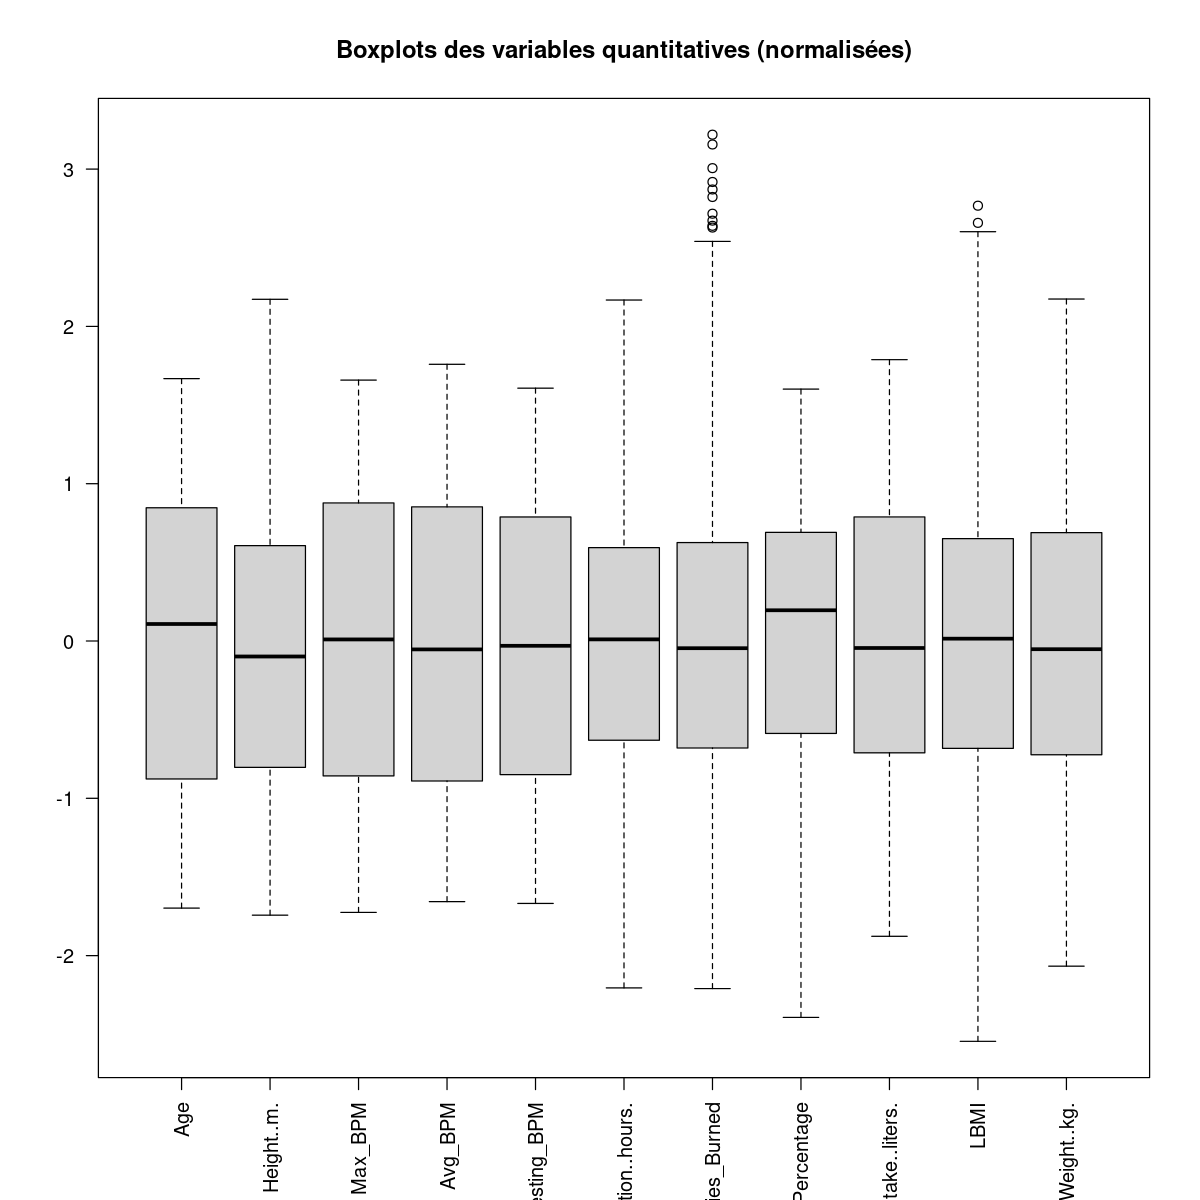

In [13]:
#Sélection des variables quanti i.e.: numeric
quanti_data <- gym[, sapply(gym, is.numeric)]

# Normalisation (centrage et réduction)
quanti_data_scaled <- scale(quanti_data)

# Boxplot des données normalisées
boxplot(quanti_data_scaled, main = "Boxplots des variables quantitatives (normalisées)", las = 2)


Aucun outliers excepté pour Calories_Burned et LBMI.  Cependant, après une inspection plus approfondie des valeurs extrêmes, nous constatons qu'elles ne sont pas aberrantes et ne risquent pas de fausser les résultats. Par conséquent, nous avons décidé de les conserver dans l'analyse.

#### 2.2) Données qualitatives 

In [14]:
# Sélection unique des variables qualitatives
quali_vars <- which(sapply(gym, function(x) is.factor(x) || is.character(x)))

# Affichage des tables de fréquence sans doublons
for (var in names(gym)[quali_vars]) {
  cat("\n---", var, "---\n")
  print(table(gym[[var]]))
}


--- Gender ---

Female   Male 
   462    511 

--- Workout_Type ---

  Cardio     HIIT Strength     Yoga 
     255      221      258      239 

--- Workout_Frequency..days.week. ---

  2   3   4   5 
197 368 306 102 

--- Experience_Level ---

  1   2   3 
376 406 191 


Pas de valeurs aberrantes ou inutiles.

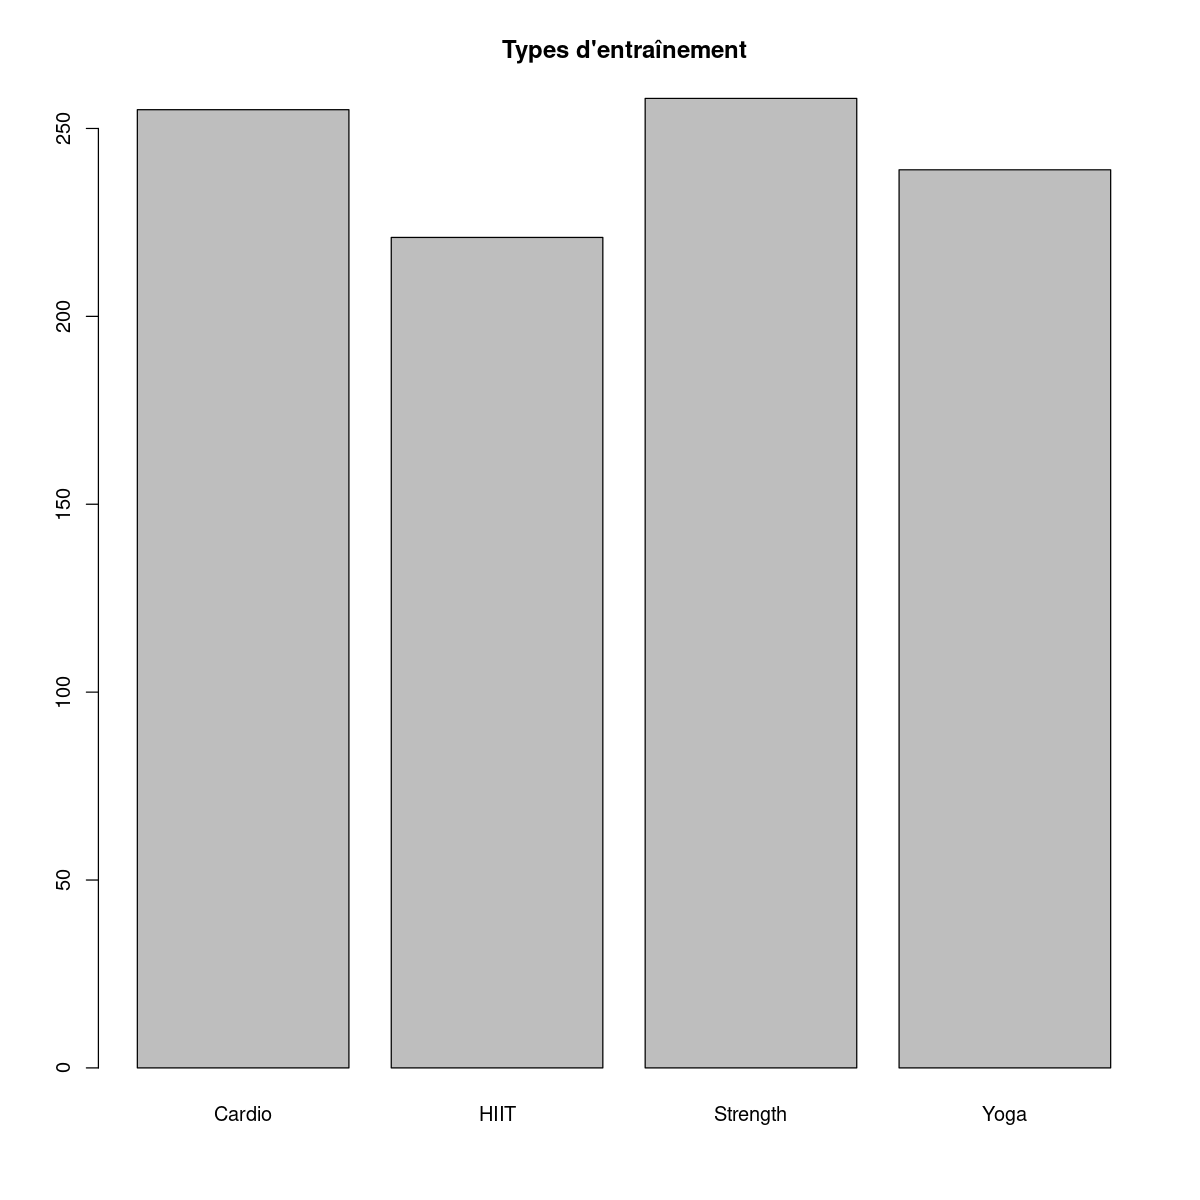

In [15]:
#On peut aussi faire des barplots
barplot(table(gym$Workout_Type), main = "Types d'entraînement")

## 3) Analyse descriptive bidimensionnelle

Utilisation des techniques de visualisation: par exemple les nuages de points (scatterplot), des graphes des correlations, des boîtes à moustaches parallèles, 
mosaicplot..

### 3.1) Comparaison quanti / quanti 

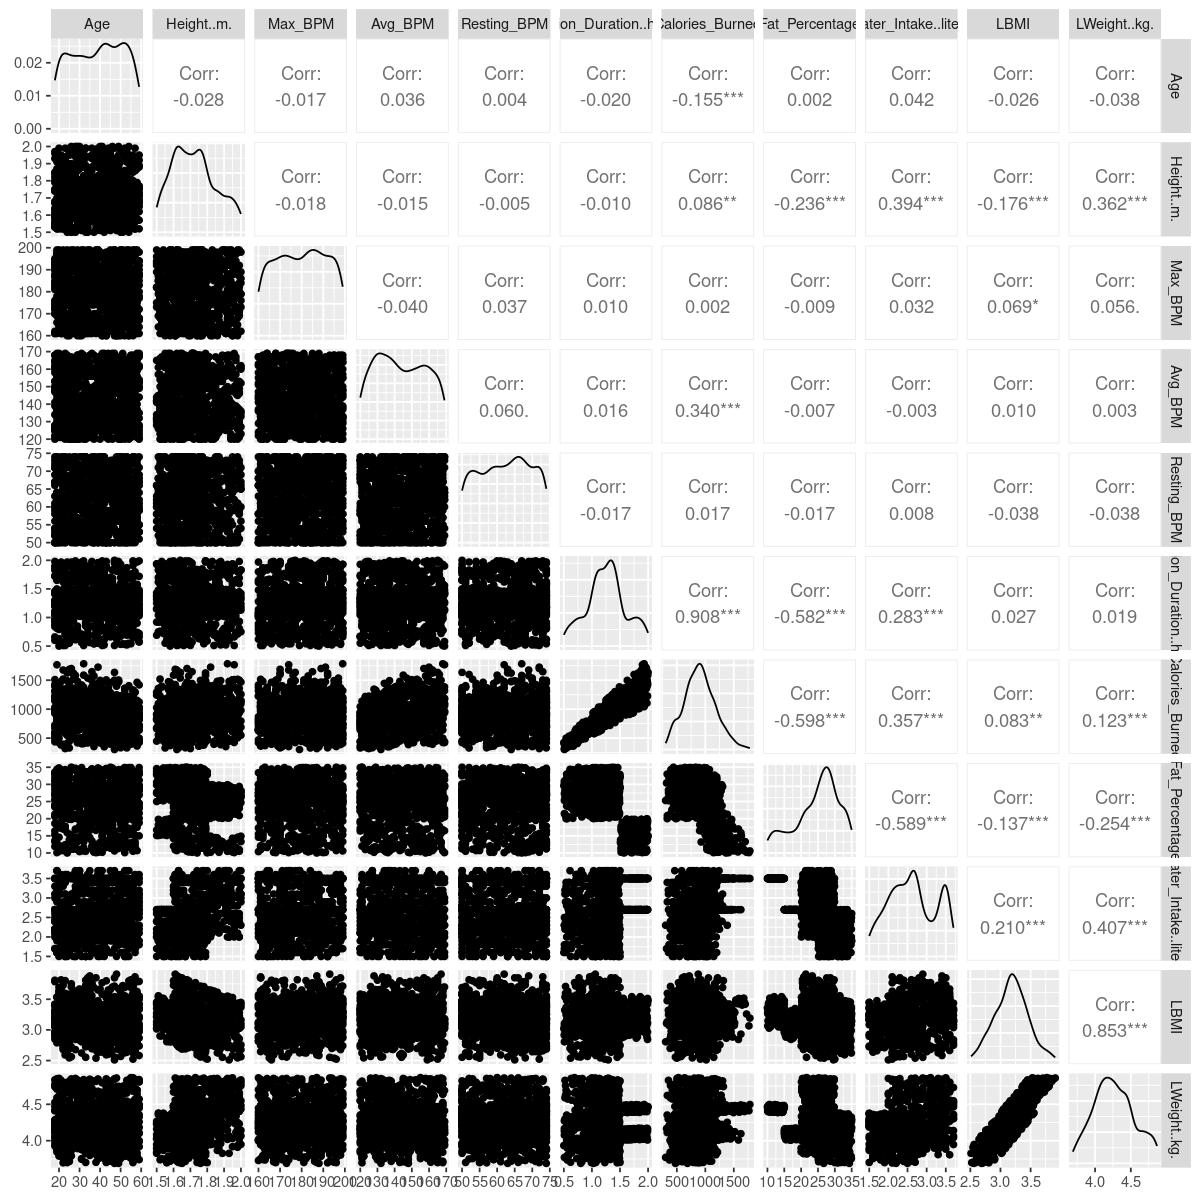

In [16]:
ggpairs(gym[, c(1,3:8,10,11,14,15)])

On voit que la durée de la session est correlée au  nombre de calories brulées. De plus, sans surprise, l'IMC est correlé au poids et à la taille du membre. => pourquoi taille ? la corr est seulement de -0.17

Il y a aussi une (plus légère) corrélation négative entre le pourcentage de graisse corporelle d'un membre et :
- la durée de la session => les personnes en difficulté physiques peuvent avoir du mal à faire de plus longues séances
- nbr de calories brulées => par conséquent, elles ont du mal à bruler des calories
- consommation quotidienne d’eau pendant les séances d’entraînement => plus on s'entraîne et plus on s'hydrate (et inversement)


On va vérifier ces corrélations avec des scatter plot (qui sont déjà présents dans le ggpairs mais cela permet de mieux visualiser en les affichant en plus grand) :

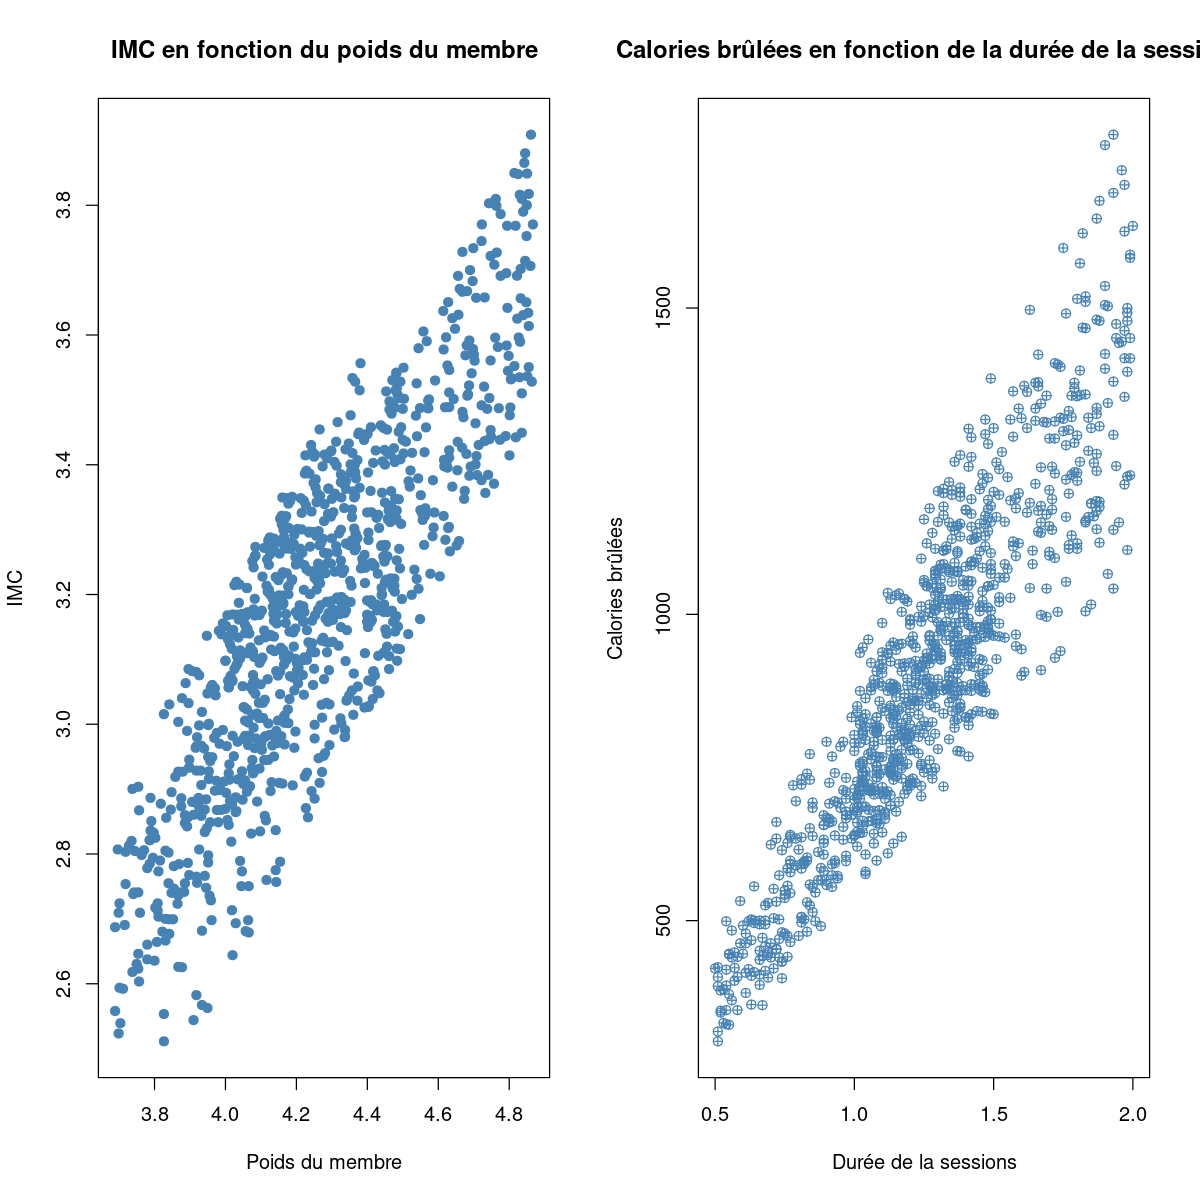

In [17]:
par(mfrow = c(1, 2))  # 1 ligne, 2 colonnes

#1er plot
plot(gym$LWeight..kg., gym$LBMI, 
     main = "IMC en fonction du poids du membre",
     xlab = "Poids du membre", ylab = "IMC",
     pch = 19, col = "steelblue")

#2nd plot 
plot(gym$Session_Duration..hours., gym$Calories_Burned,
     main = "Calories brûlées en fonction de la durée de la session",
     xlab = "Durée de la sessions", ylab = "Calories brûlées",
     pch = 10, col = "steelblue")

Cela confirme bien nos hypothèses de corrélations positives plutôt fortes

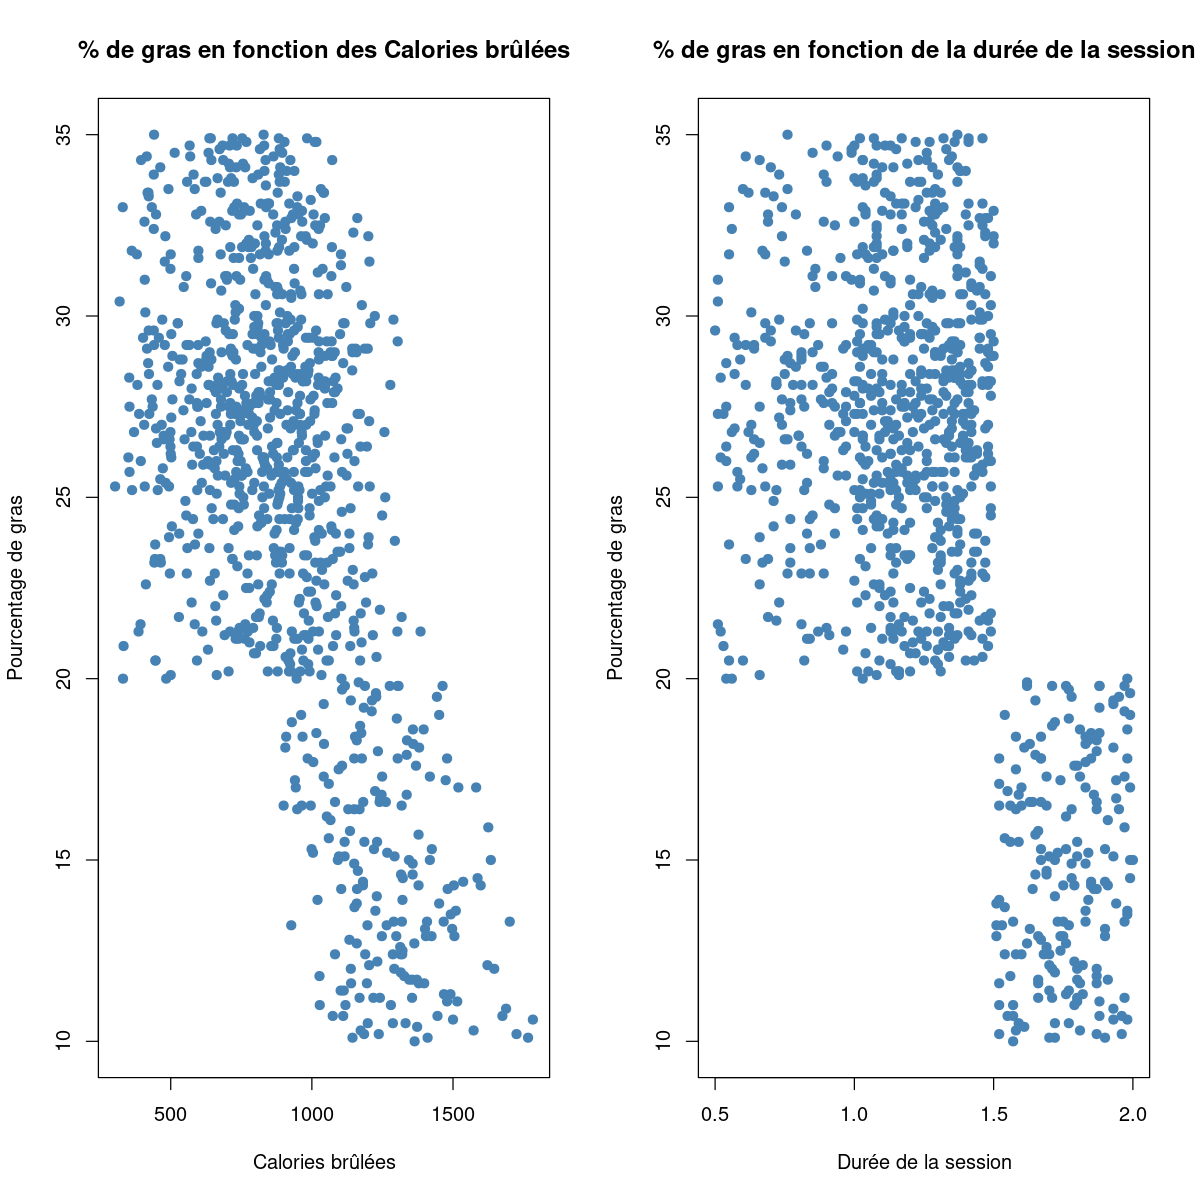

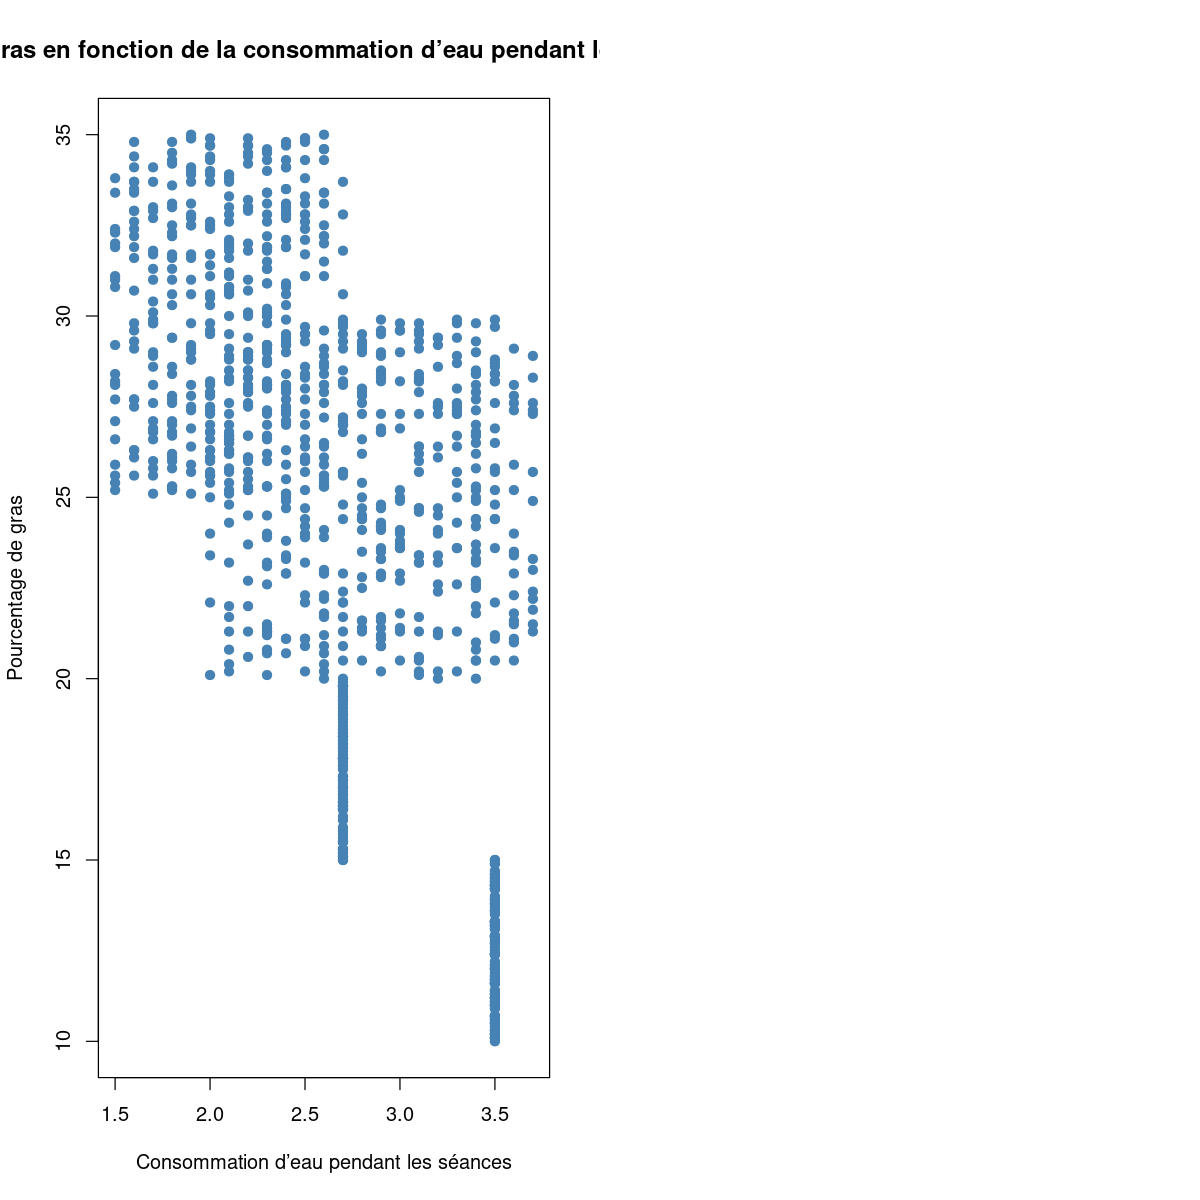

In [18]:
par(mfrow = c(1,2))  # 1 ligne, 2 colonnes

plot(gym$Calories_Burned, gym$Fat_Percentage, 
     main = "% de gras en fonction des Calories brûlées",
     xlab = "Calories brûlées", ylab = "Pourcentage de gras",
     pch = 19, col = "steelblue")

plot(gym$Session_Duration..hours., gym$Fat_Percentage,
     main = "% de gras en fonction de la durée de la session",
     xlab = "Durée de la session", ylab = "Pourcentage de gras",
     pch = 19, col = "steelblue")

plot(gym$Water_Intake..liters., gym$Fat_Percentage,
     main = "% de gras en fonction de la consommation d’eau pendant les séances",
     xlab = "Consommation d’eau pendant les séances", ylab = "Pourcentage de gras",
     pch = 19, col = "steelblue")

On confirme aussi les hypothèses de corrélations négatives moins fortes que les corrélations précédentes.

### 3.2 Comparaison quali / quali 

On effectue tout d'abord quelques mosaic plot pour observer la dépendance entre les variables qualitatives 2 à 2

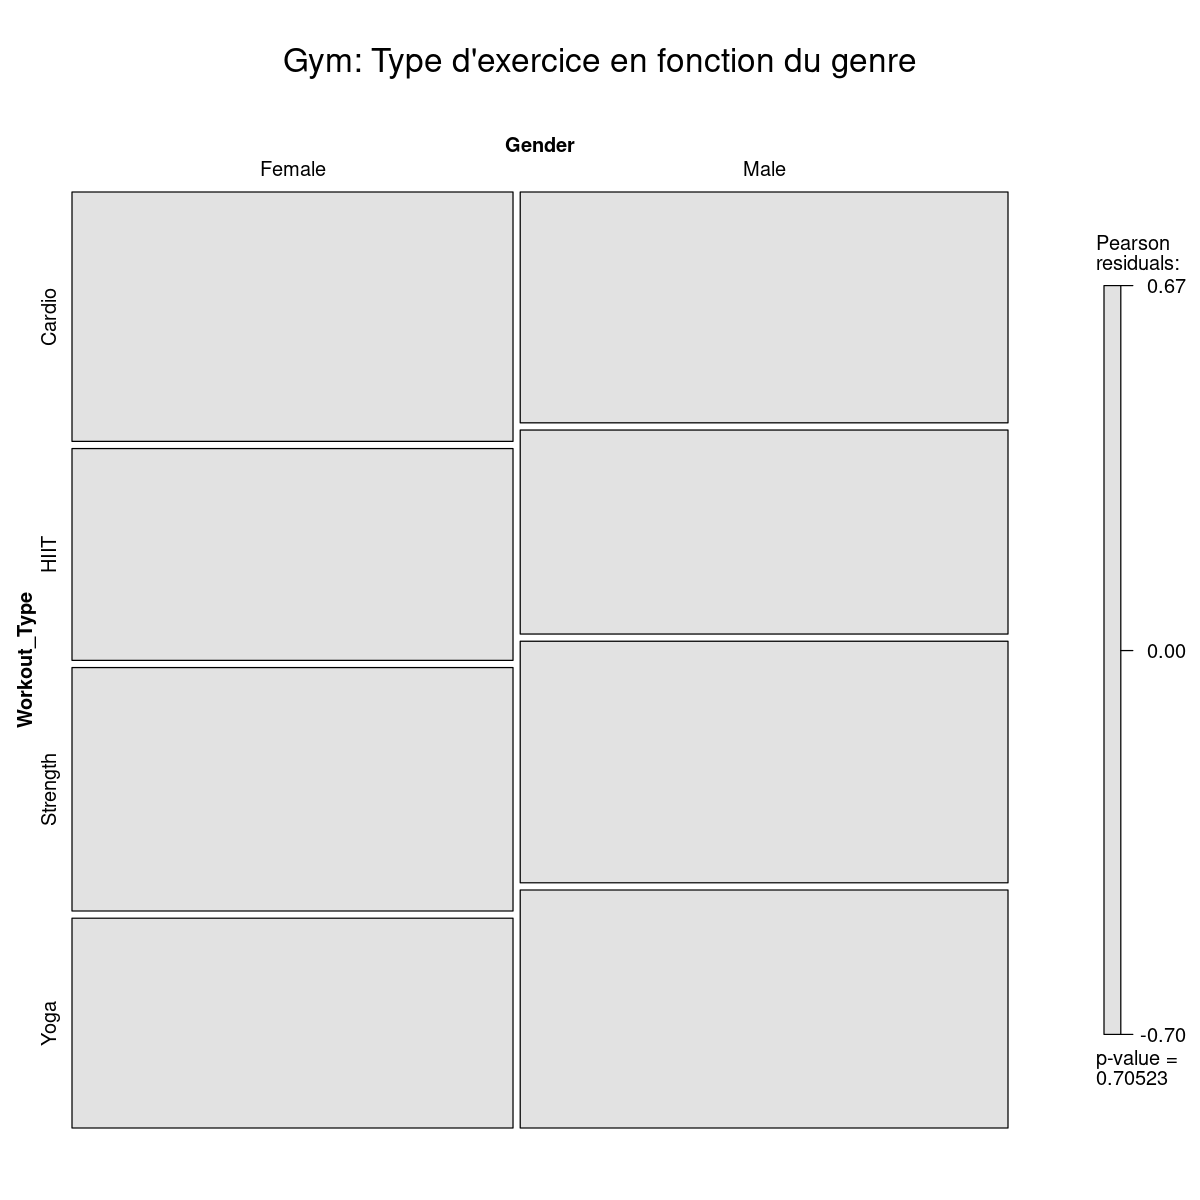

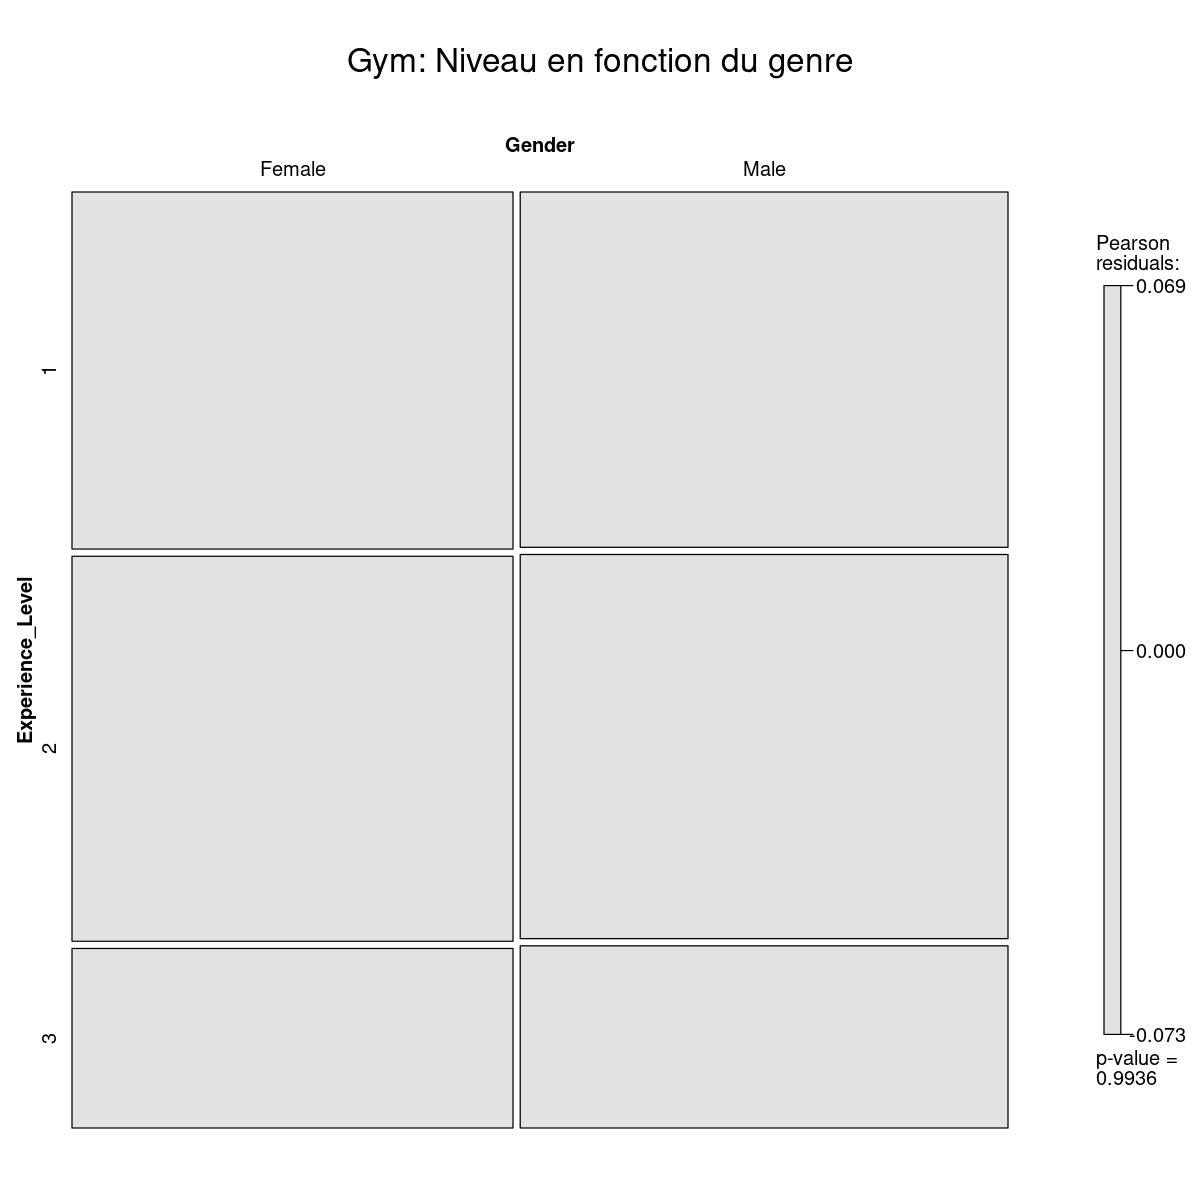

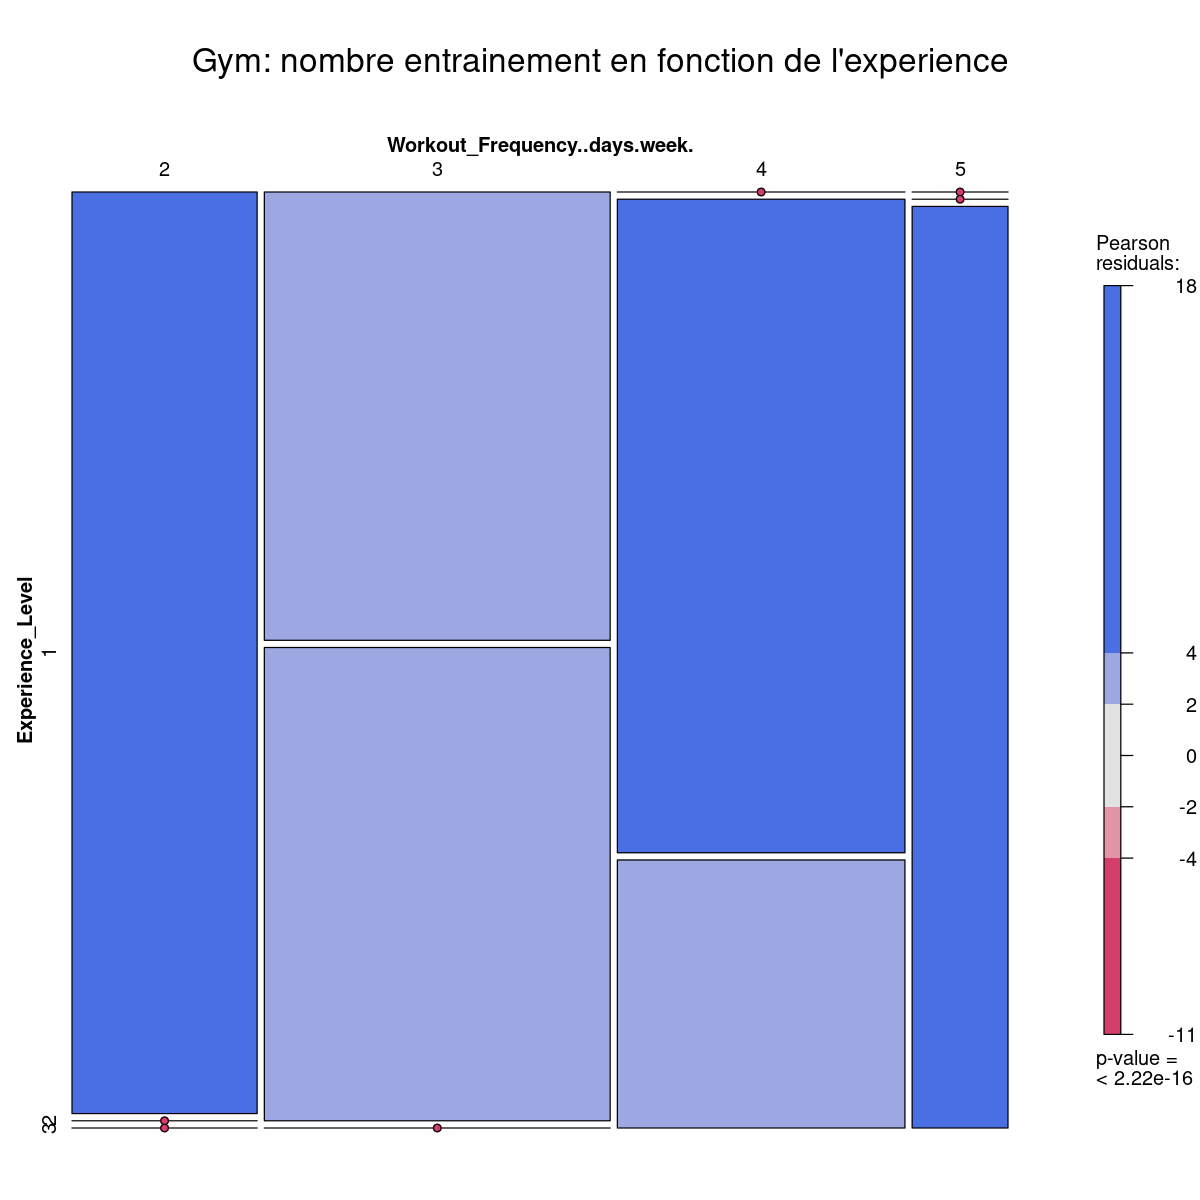

In [19]:

mosaic( xtabs(~Gender + Workout_Type, data = gym), shade = TRUE, ,
            split_vertical = TRUE,
            main="Gym: Type d'exercice en fonction du genre")

mosaic( xtabs(~Gender + Experience_Level, data = gym),  shade = TRUE, ,
            split_vertical = TRUE,
            main="Gym: Niveau en fonction du genre")
mosaic( xtabs(~Workout_Frequency..days.week. + Experience_Level, data = gym),  shade = TRUE, ,
            split_vertical = TRUE,
            main="Gym: nombre entrainement en fonction de l'experience")

Ici, il y a 3 différents cas qui correspondent à 3 niveaux de p-valeurs : 
1) Quand on compare le niveau d'expérience selon le genre, on remarque qu'il n'y a pas du tout de dépendance entre ces 2 variables car il y a quasiment aucune différence selon le genre. On le confirme avec une p-valeur presque égale à 1. 
2) Quand on compare le type de d'entrînement effectué selon le genre, il n'y a toujours pas de dépendance forte mais il y a quand même quelques légères différences. On a donc une p-valeur moins proche de 1
3) Enfin, si on compare le niveau d'expérience selon le nbr d'entrînements par semaine, il y a clairement une dépendance significative entre ces 2 variables. En effet, la p_value<2.22e-16 nous le confirme. Cette p valeur correspond à la p-valeur d'un test de chi deux d'indépendance réalisé entre les deux variables qualitatives que l'on compare dans ce graphique. Donc il y a une forte dépendance entre le nbr d'entraînements par semaine et le niveau d'expérience, ce qui est cohérent.

On confirme notre hypothèse en affichant la table de contingence

In [20]:
tab <- table(gym$Experience_Level, gym$Workout_Frequency..days.week.)
tab

# Appliquer le test du chi carré
test <- chisq.test(tab)
print(test)

   
      2   3   4   5
  1 197 179   0   0
  2   0 189 217   0
  3   0   0  89 102


	Pearson's Chi-squared test

data:  tab
X-squared = 1015, df = 6, p-value < 2.2e-16



Pour éviter d'afficher toutes les mosaics plots, on crée ci-dessous une fonction qui va effectuer un test de chi deux pour chacune de nos variables qualitatives 2 à 2 et qui va retenir uniquement les tests pour lesquels la p-valeurs est inférieur à 0.05 i.e.: les variables pour lesquelles il y a une forte dépendance au risque 5%.

In [21]:
# Sélectionner les variables qualitatives dans le jeu de données
quali_vars <- sapply(gym, is.factor)

# Récupérer les noms des variables qualitatives
quali_var_names <- names(gym)[quali_vars]

# Appliquer le test du chi carré pour chaque paire de variables qualitatives
for (i in 1:(length(quali_var_names)-1)) {
  for (j in (i+1):length(quali_var_names)) {
    # Créer un tableau de contingence entre les deux variables
    contingency_table <- table(gym[[quali_var_names[i]]], gym[[quali_var_names[j]]])
    
    # Appliquer le test du chi carré
    test <- chisq.test(contingency_table)
    
    # Vérifier si la p-valeur est inférieure à 0.05
    if (test$p.value < 0.05) {
      # Afficher le nom des variables et les résultats du test si p-valeur < 0.05
      cat("\n--- Test du Chi² entre", quali_var_names[i], "et", quali_var_names[j], "---\n")
      print(test)
    }
  }
}



--- Test du Chi² entre Workout_Frequency..days.week. et Experience_Level ---

	Pearson's Chi-squared test

data:  contingency_table
X-squared = 1015, df = 6, p-value < 2.2e-16



Le seul test où il y a une forte dépendance est celui que nous avons déjà fait précédemment entre le nbr d'entraînements et le niveau d'expérience.

### 3.3 Comparaison quanti / quali 

On s'intéresse maintenant aux effets d’une catégo sur une variable quantitative. Pour cela on peut commencer par faire des boxplots croisés qui nous permettent de visualiser la distribution d’une variable quantitative pour chaque modalité de la variable qualitative

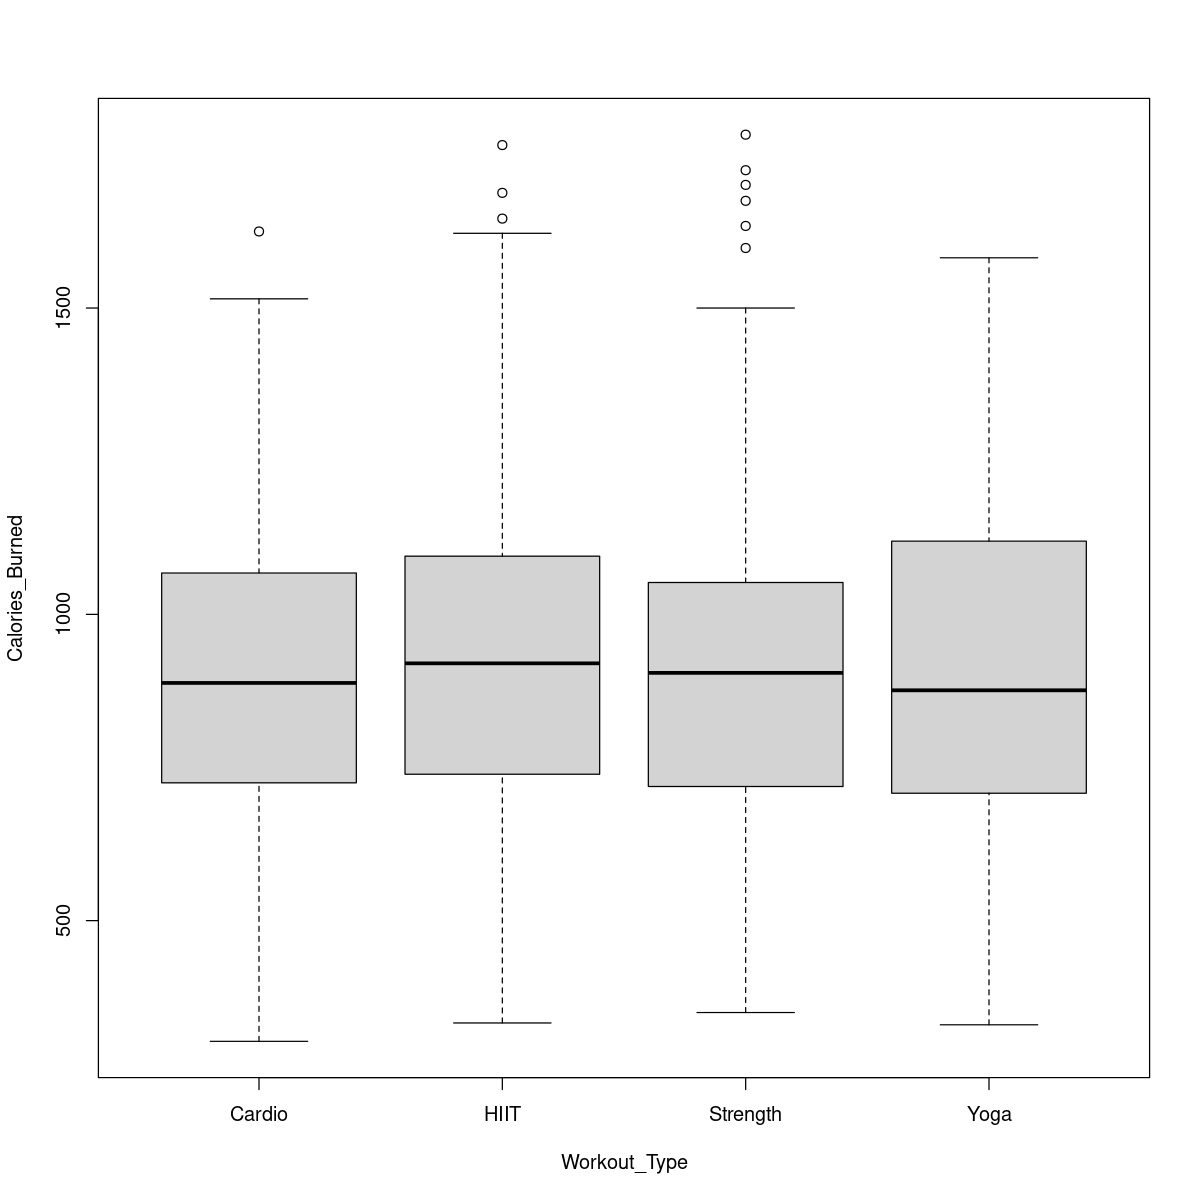

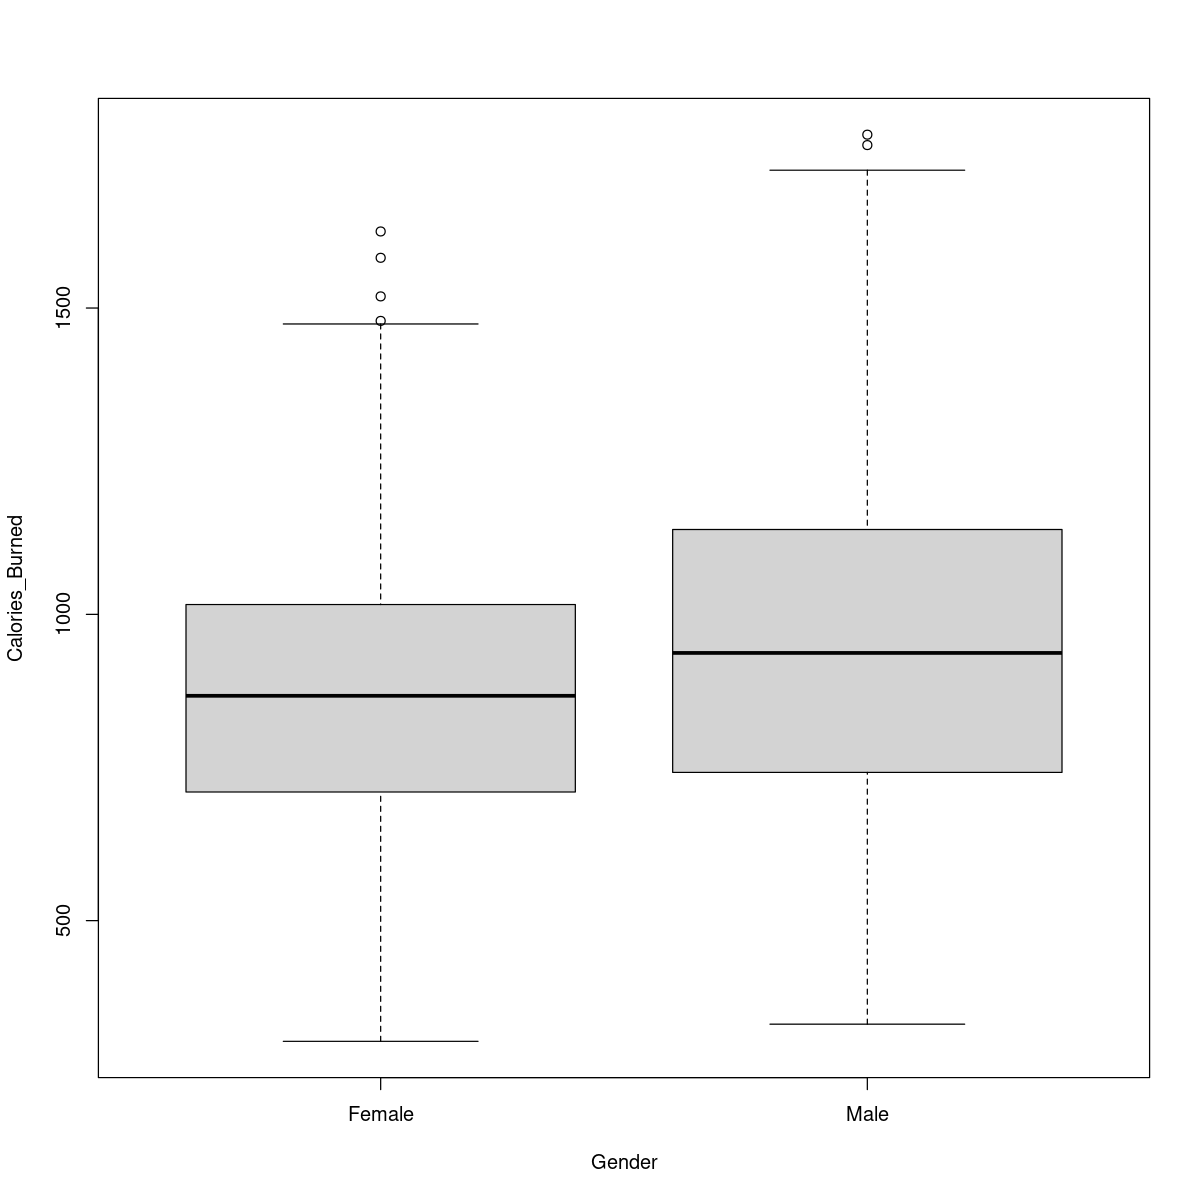

In [22]:
boxplot(Calories_Burned ~ Workout_Type, data = gym)
boxplot(Calories_Burned ~ Gender, data = gym)

Comment l'interpréter : 
- Si les médianes diffèrent beaucoup → possible effet de la quali sur la quanti.
- Si les boîtes sont très différentes en forme ou en taille → distributions différentes (hétérogénéité).

Le type de Workout ne semble pas beaucoup influencer le nombre de calories brulées. Par contre, le nombre de calories brulées semble varier selon le genre.


On peut aussi faire un violin plot qui est une extension du boxplot qui montre aussi la densité des données

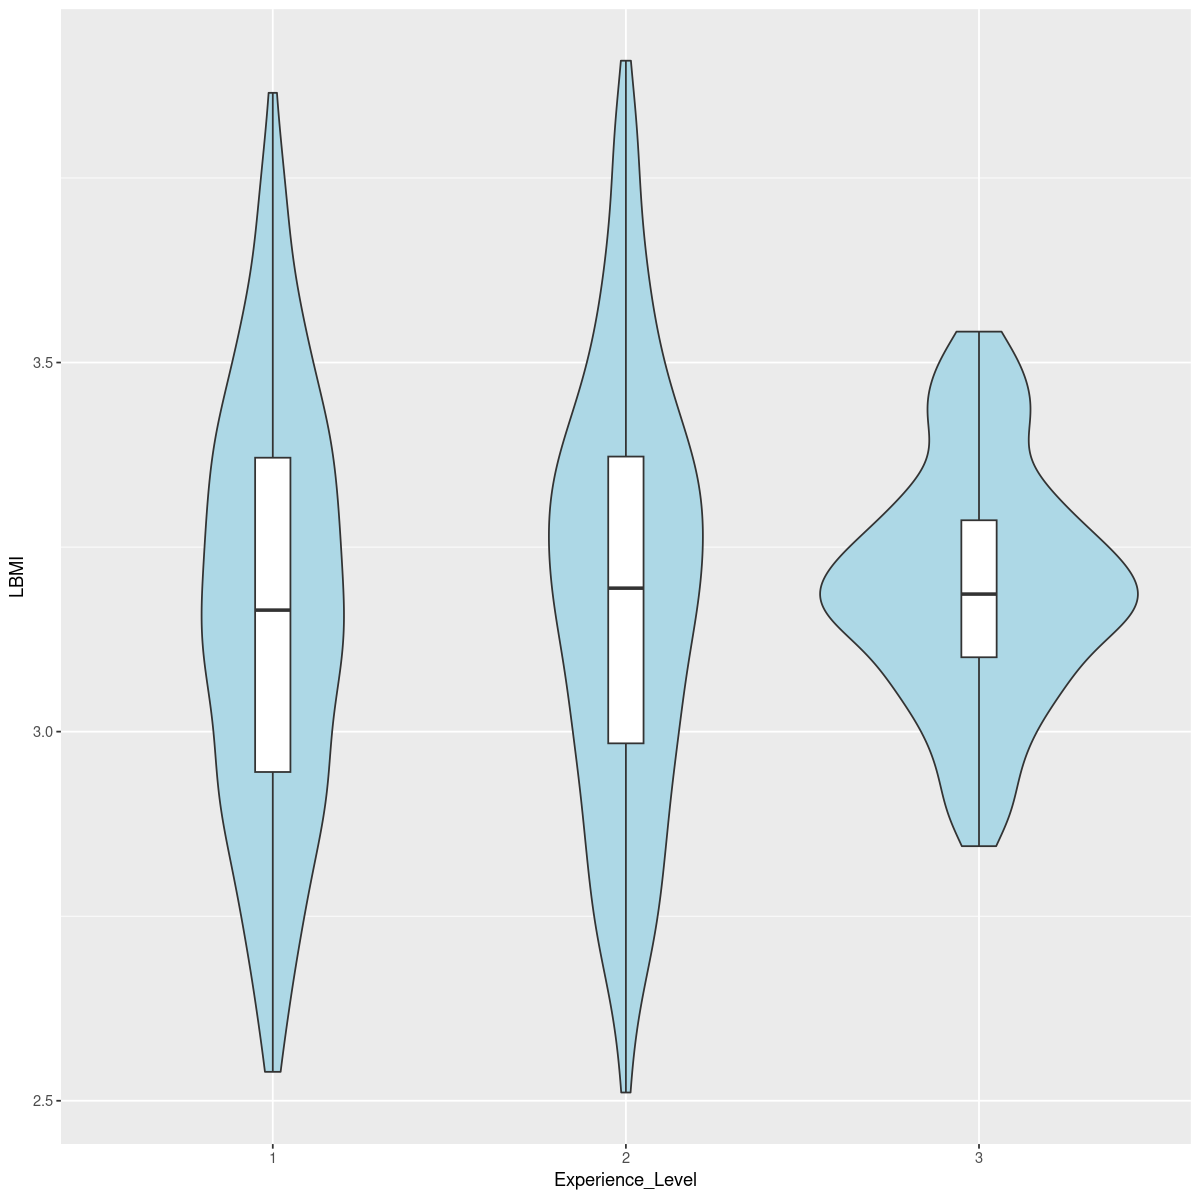

In [23]:
ggplot(gym, aes(x = Experience_Level, y = LBMI)) +
  geom_violin(fill = "lightblue") + geom_boxplot(width = 0.1)

Comment l'interpréter : 
- idem que pour les boxplots 
- Les zones plus larges montrent où les données sont plus concentrées
- on peut voir si les distributions sont symétriques ou biaisées, ou s’il y a des pics multiples

On peut aussi afficher les moyennes et écarts-types par groupe afin de résumer numériquement la distribution de la variable quantitative pour chaque modalité de la variable qualitative.

In [24]:
aggregate(Calories_Burned ~ Experience_Level, data = gym, FUN = function(x) c(mean = mean(x), sd = sd(x)))


Experience_Level Calories_Burned    
1 1                 726.3750, 227.3433
2 2                 901.9187, 152.6454
3 3                1265.3403, 186.8345

Comment l'interpréter : 
- Si les moyennes sont très différentes → effet probable du facteur.
- Si les écarts-types varient → variance inégale entre groupes (important à noter pour choisir les tests).

In [25]:
#Pour la partie quanti / quali j'ai pas eu le temps de tester beaucoup de trucs j'ai juste mis les 3 tests les plus intéressants à faire.
#Par contre pour les autres comparaisons, tous les tests importants ont été faits et toutes les variables ont été passées en revu.

### 4. ACP

#### 4.1 Choix des axes principaux

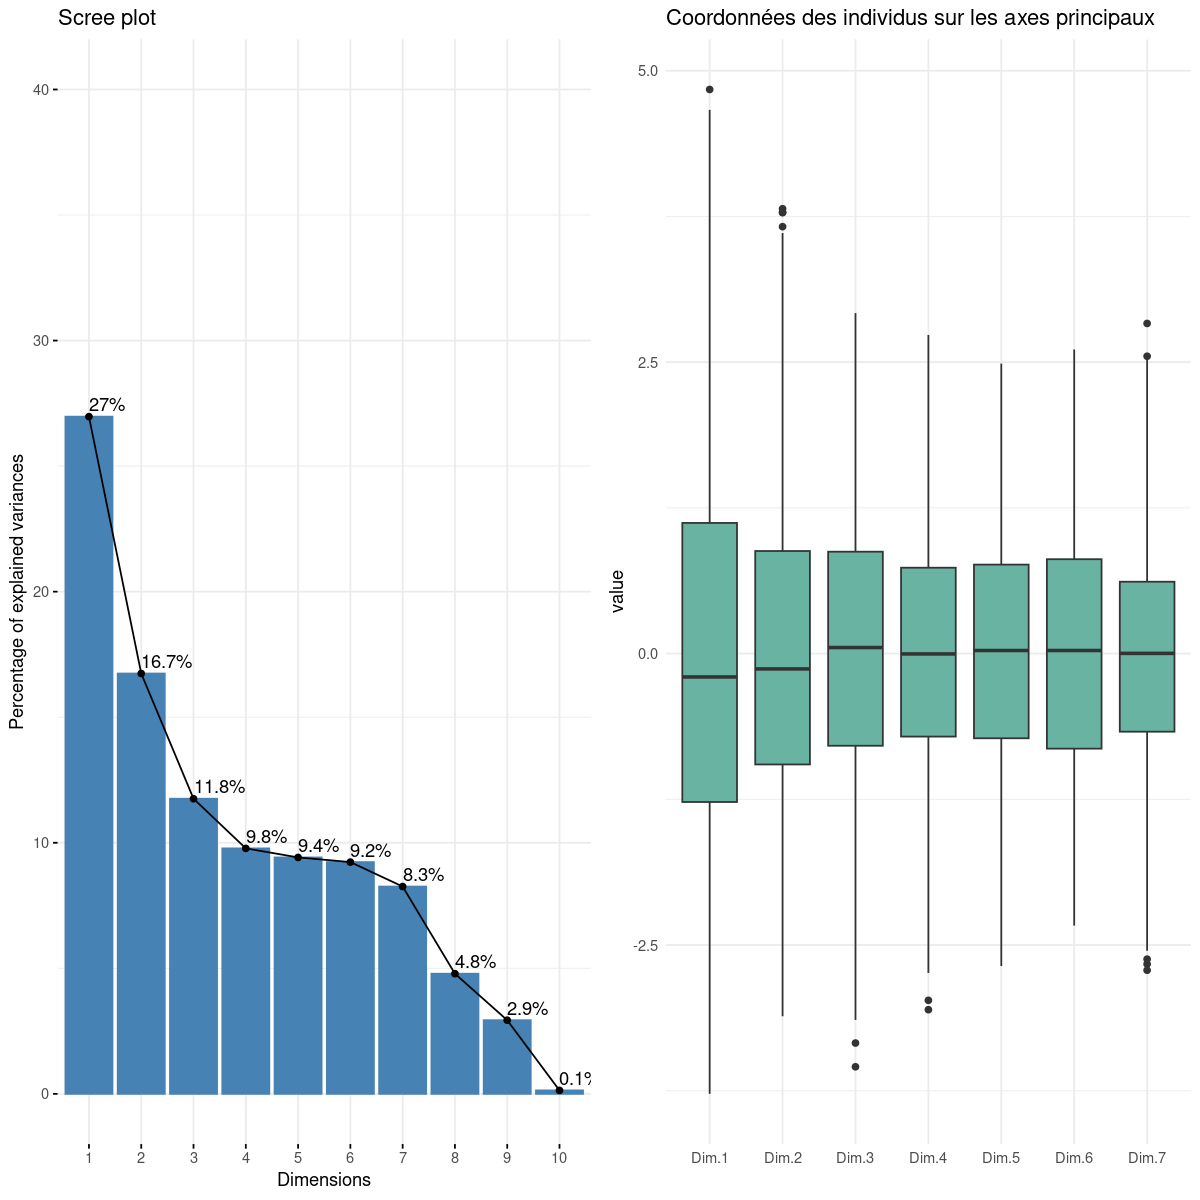

In [26]:
# Variables quantitatives à inclure dans l'ACP

# ACP
acp <- PCA(gym[, c(1,3:8,10,11,14,15)], scale.unit = TRUE, graph = FALSE, ncp = 7)

# Éboulis des valeurs propres
g1 <- fviz_eig(acp, addlabels = TRUE, ylim = c(0, 40))

# Boxplot des coordonnées des individus
g2 <- ggplot(melt(acp$ind$coord), aes(x = Var2, y = value)) +
  geom_boxplot(fill = "#69b3a2") +
  xlab("") +
  theme_minimal() +
  ggtitle("Coordonnées des individus sur les axes principaux")

# Affichage côte à côte
grid.arrange(g1, g2, ncol = 2)


D'après le graphique "Scree plot" nous savons que les 4 premières dimensions de notre ACP définissent 65.3% de la varaince (variance cumulée) ce qui est suffisant pour notre analyse. C’est un bon compromis entre réduction de dimension et information conservée. Nous garderons donc 4 composantes.

#### 4.2 Interprétation des Axes 

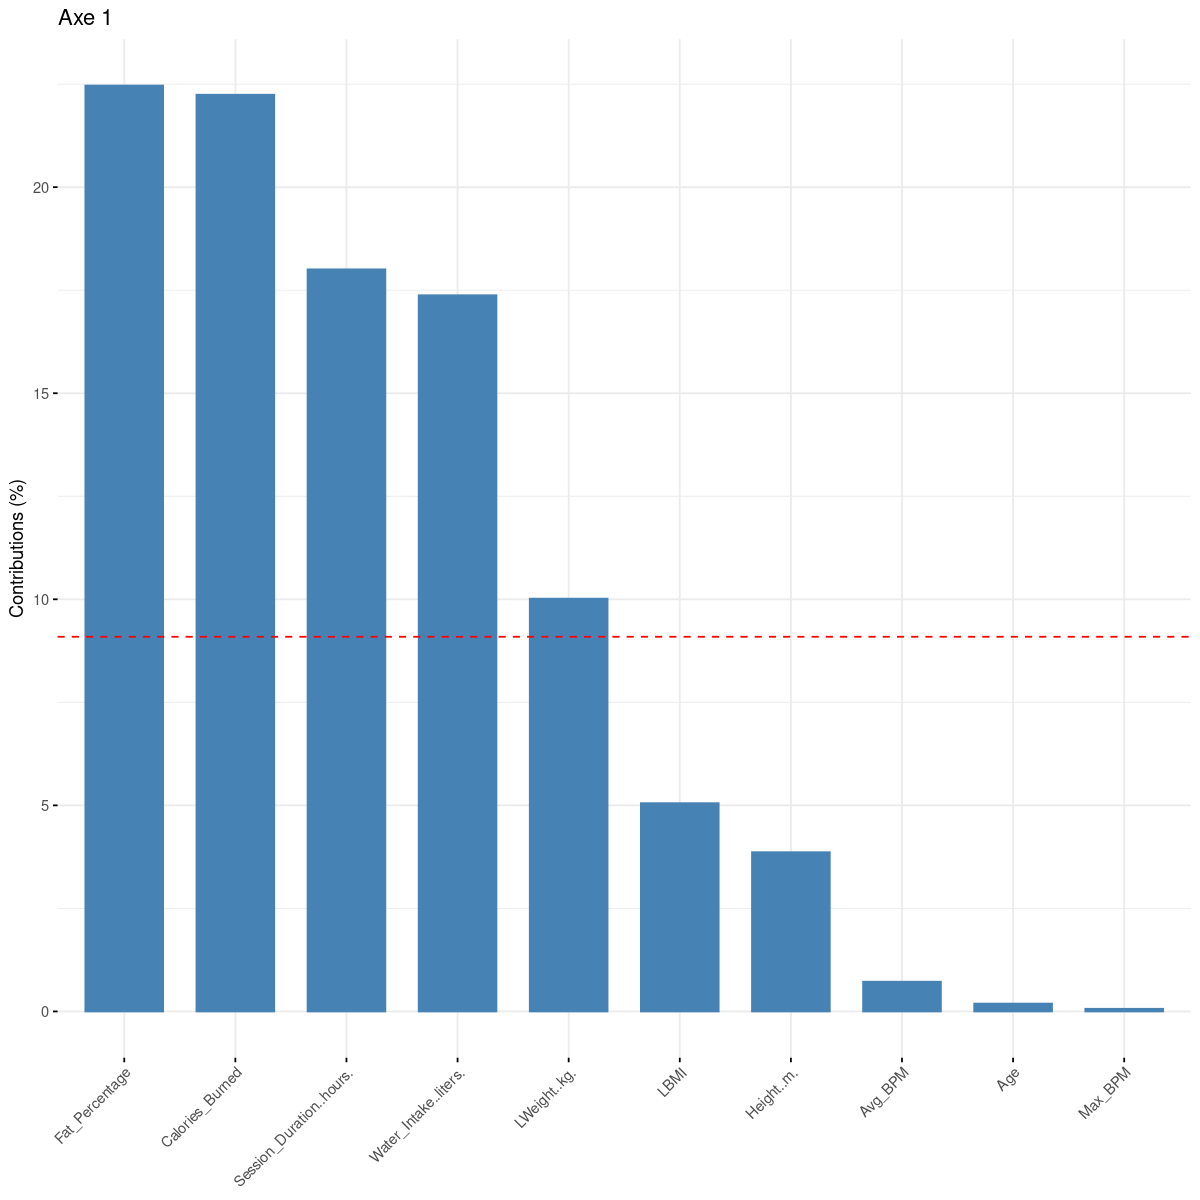

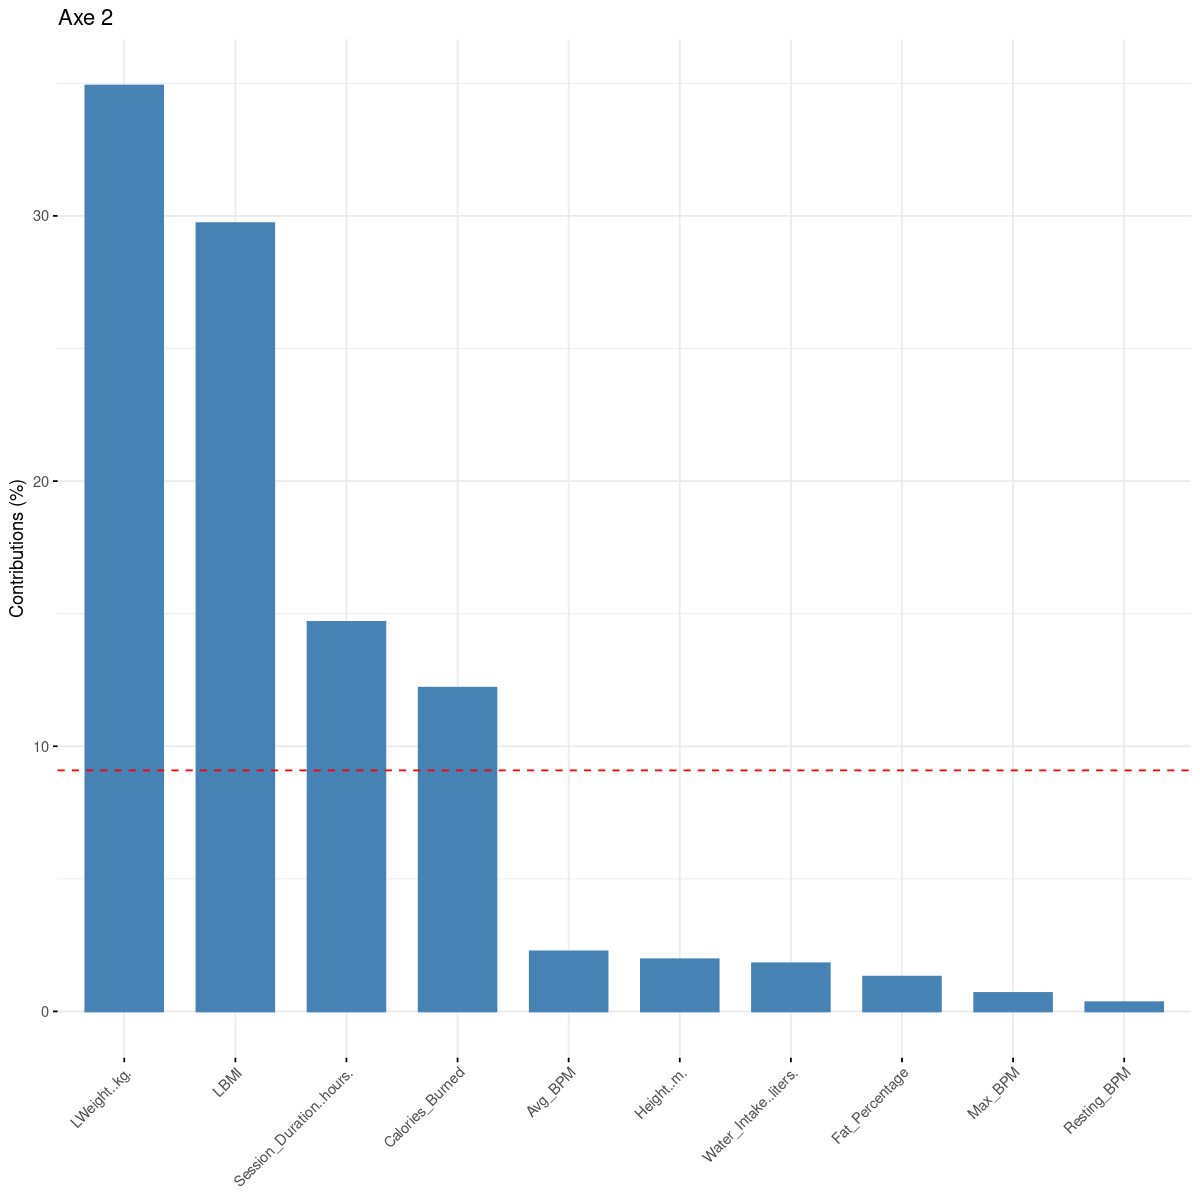

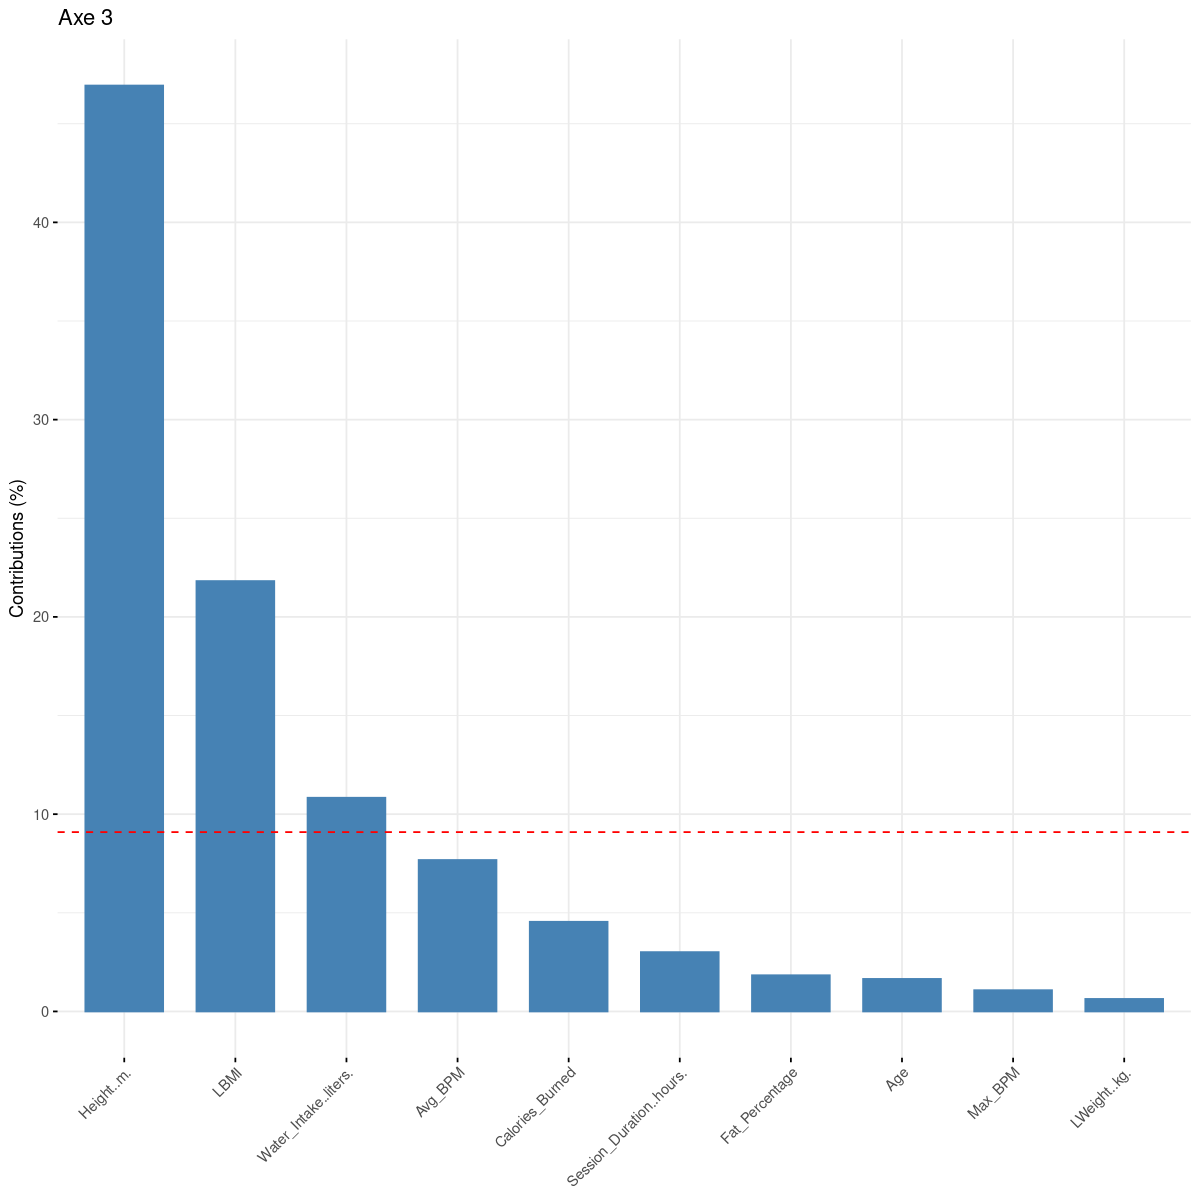

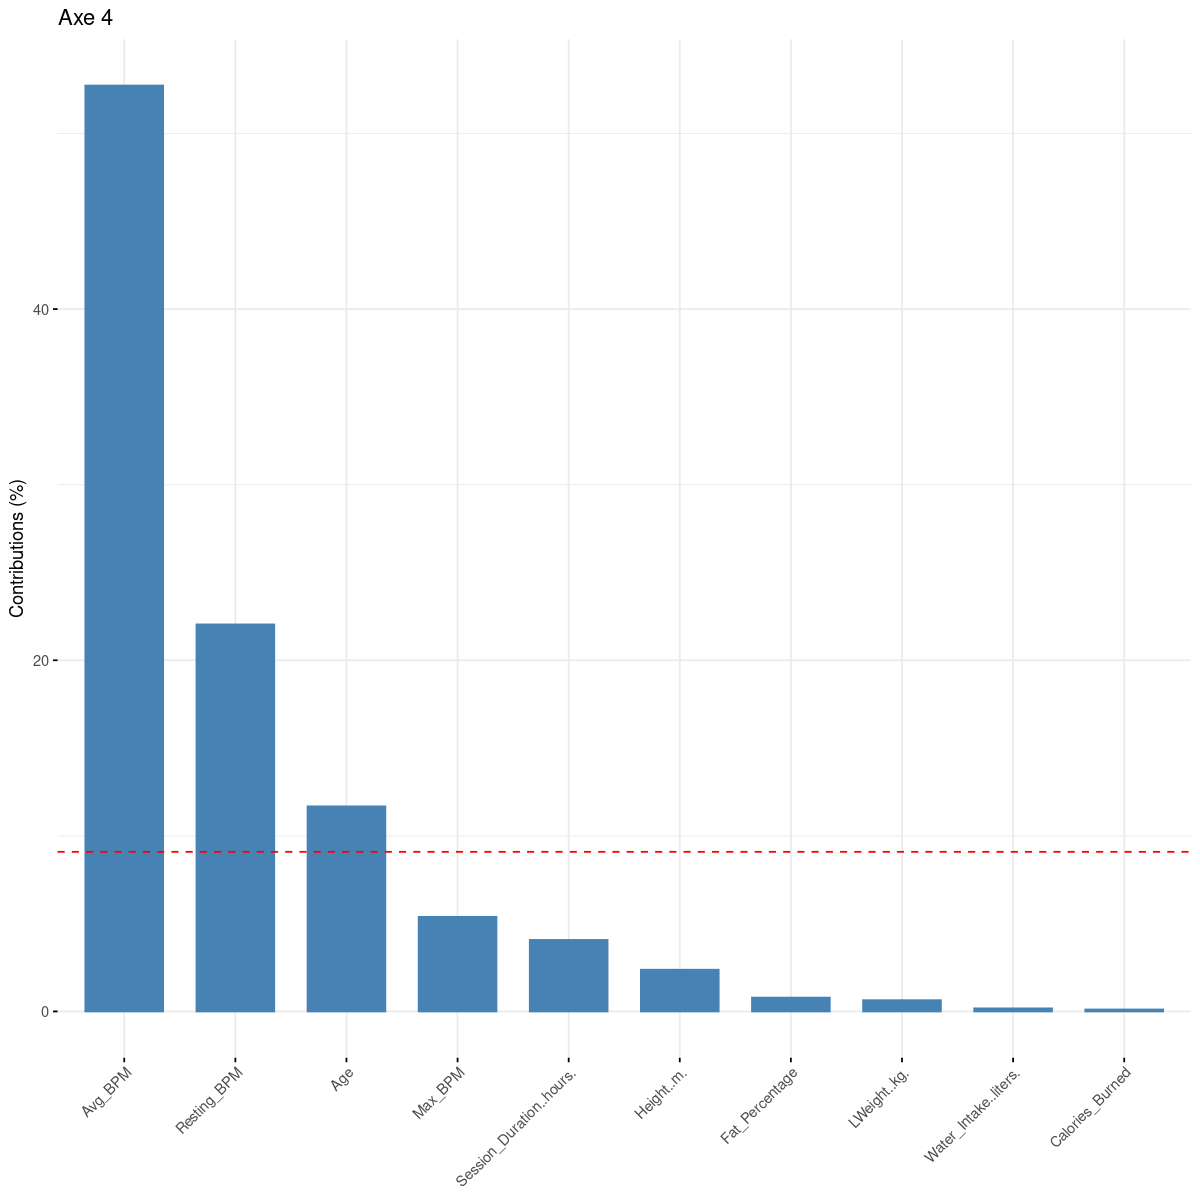

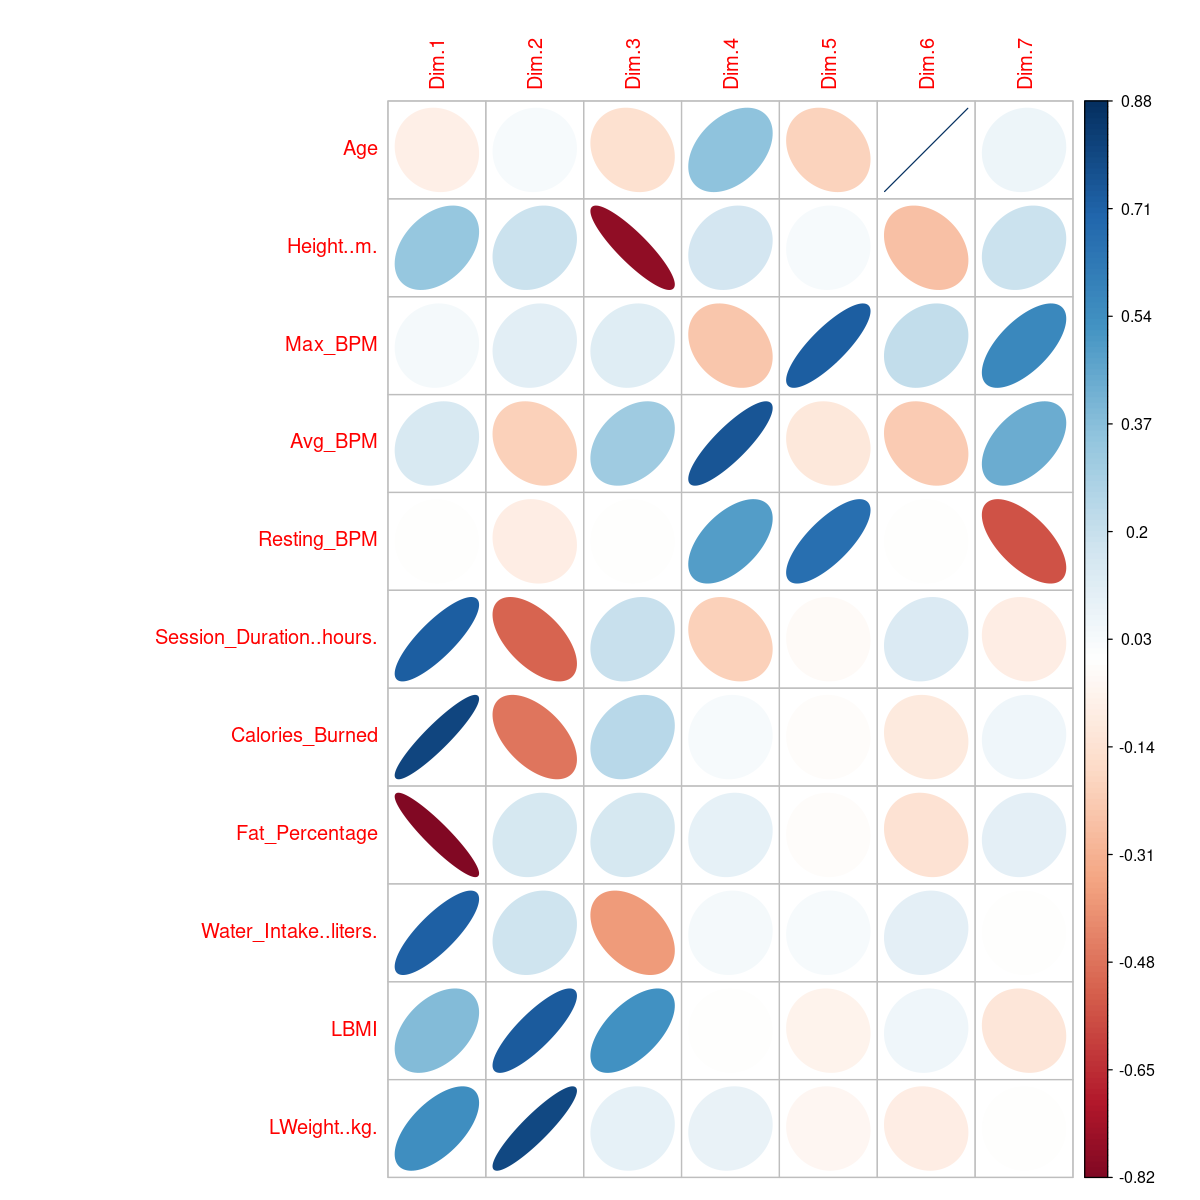

In [27]:
# Contributions des variables à chaque axe
fviz_contrib(acp, choice = "var", axes = 1, top = 10, title = "Axe 1")
fviz_contrib(acp, choice = "var", axes = 2, top = 10, title = "Axe 2")
fviz_contrib(acp, choice= "var", axes = 3, top = 10, title = "Axe 3")
fviz_contrib(acp, choice = "var", axes = 4, top = 10, title = "Axe 4")

# Corrélogramme des contributions des variables
corrplot(acp$var$cor, is.corr = FALSE, method = "ellipse")

Nous observons bien que chaque graphique peut être interpréter de la même facon que la matrice de corrélation :

* Axe 1 : Calories burned , fat pourcentage, session duration, Water intake, LWeight
* Axe 2 : LWeight, LBMI, Session duration, Calories Burned
* Axe 3 : Height, LBMI, WAter INtake
* Axe 4 : Avg BPM, Resting BPM, Age

Les axes 1 et 2 sont très corrélés à Calories Burned

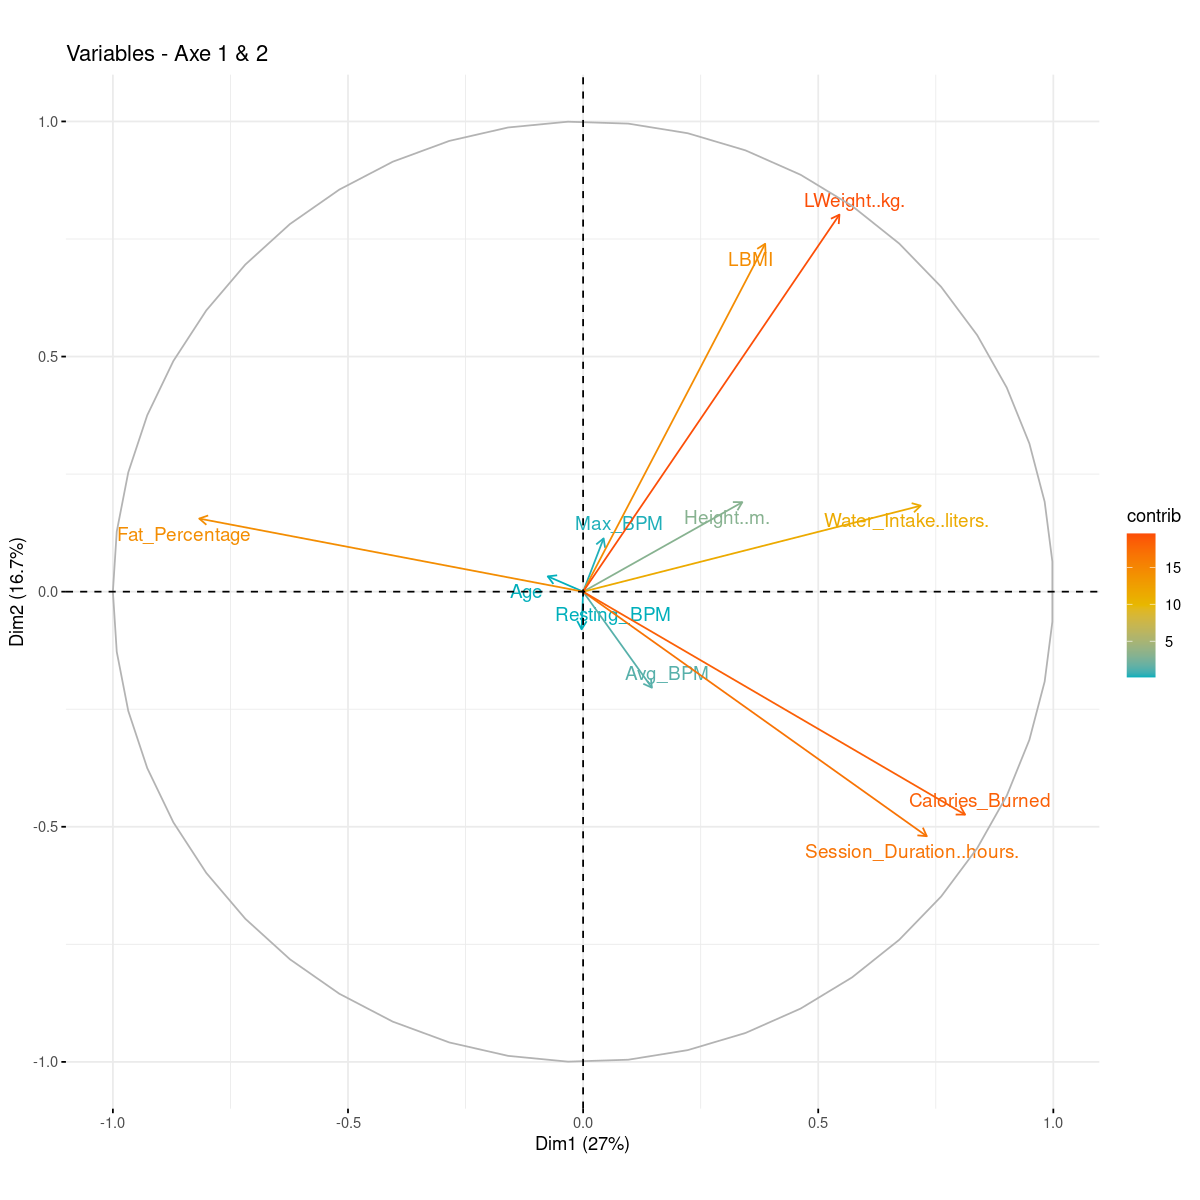

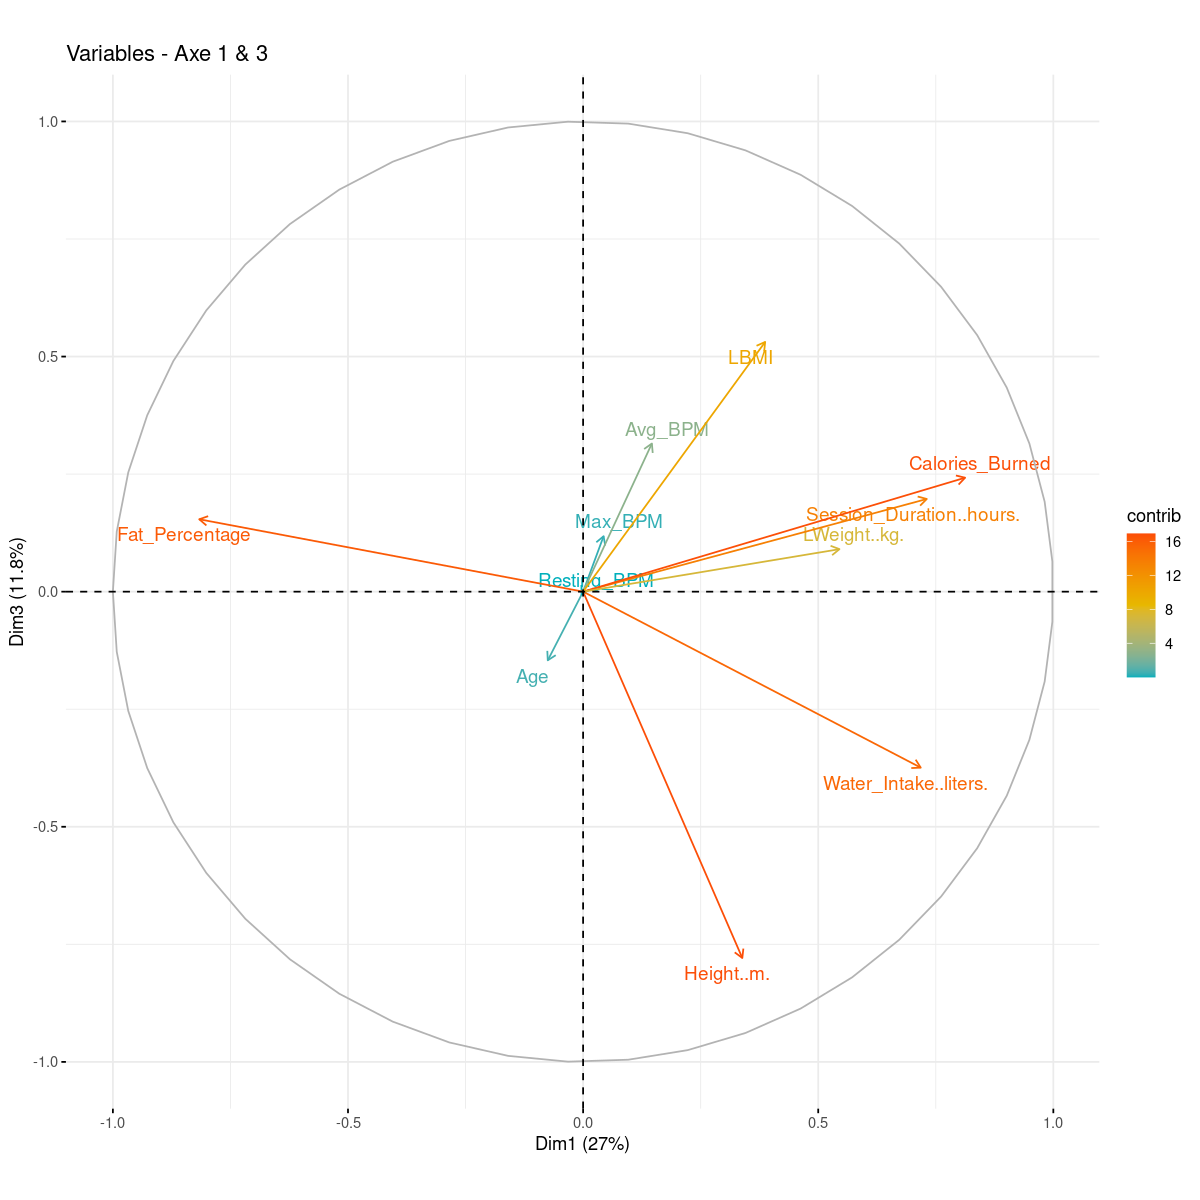

In [28]:
# Variables : plan factoriel 1-2 (par défaut)
fviz_pca_var(acp, col.var = "contrib", 
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE, title = "Variables - Axe 1 & 2")


# Variables sur le plan 1-3
fviz_pca_var(acp, axes = c(1,3), col.var = "contrib", 
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE, title = "Variables - Axe 1 & 3")


Explication :  

Analysons les dépendances éventuelles entre les variables à prédire (calories burned et Experience LEvel) et les variables explicatives : 

* Le nombre de calories brulées est positivement corrélé à la durée de la session et négativement corrélé au pourcentage de gras.Il est intéresant de noter que la taille et le poids ne dépendent pas des calories brulées.

* Pour analyser le niveau d'experience, nous habillons les graphes des individus de l'ACP selon le niveau d'expérience ci dessous.


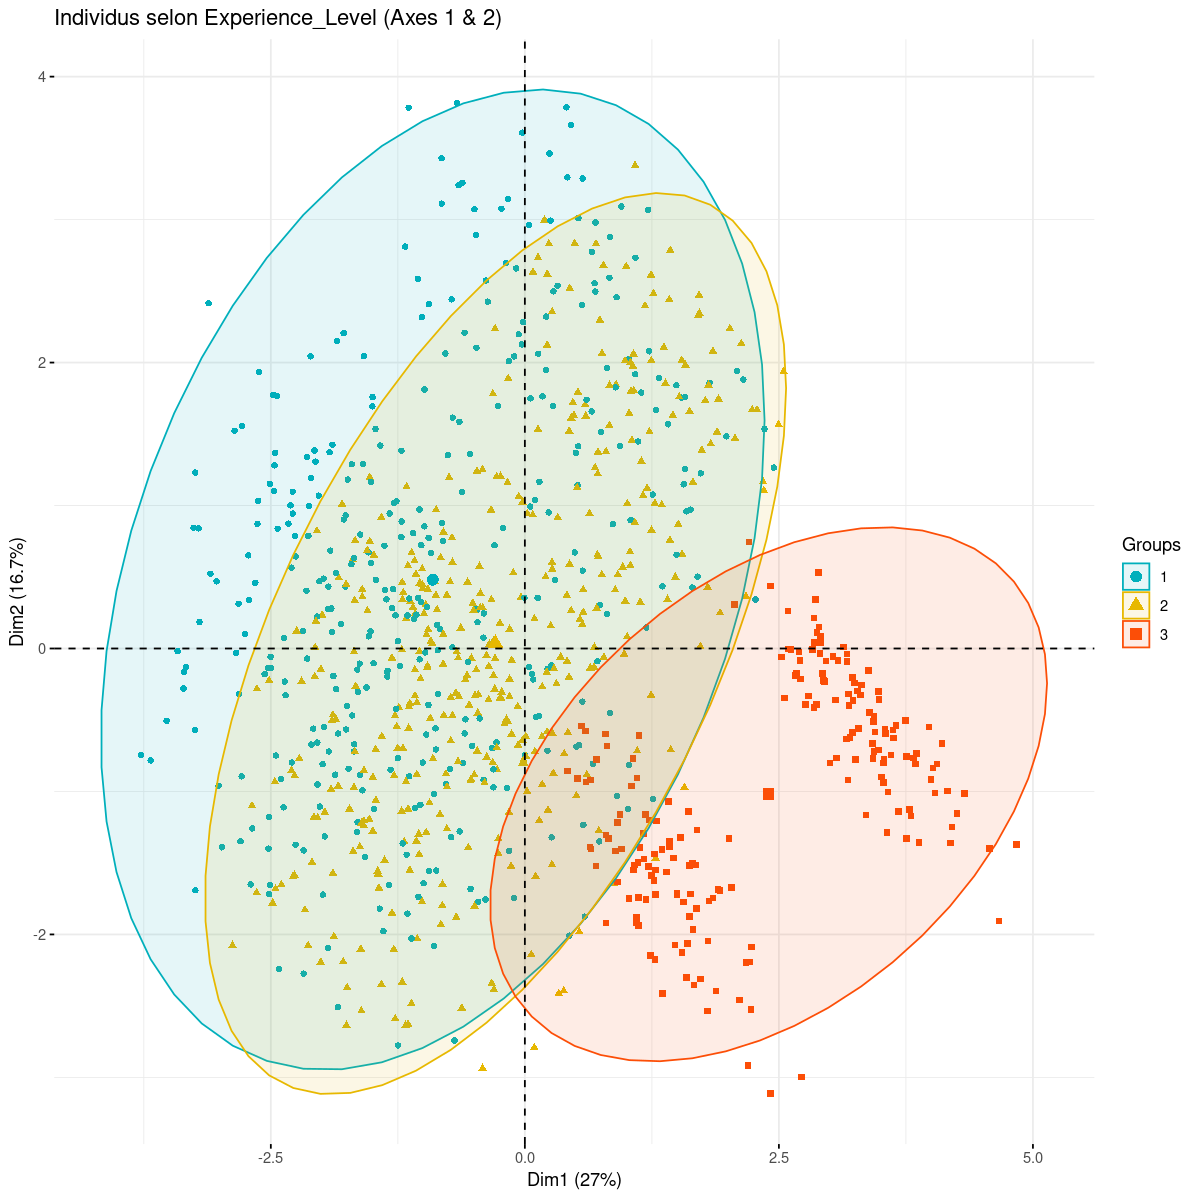

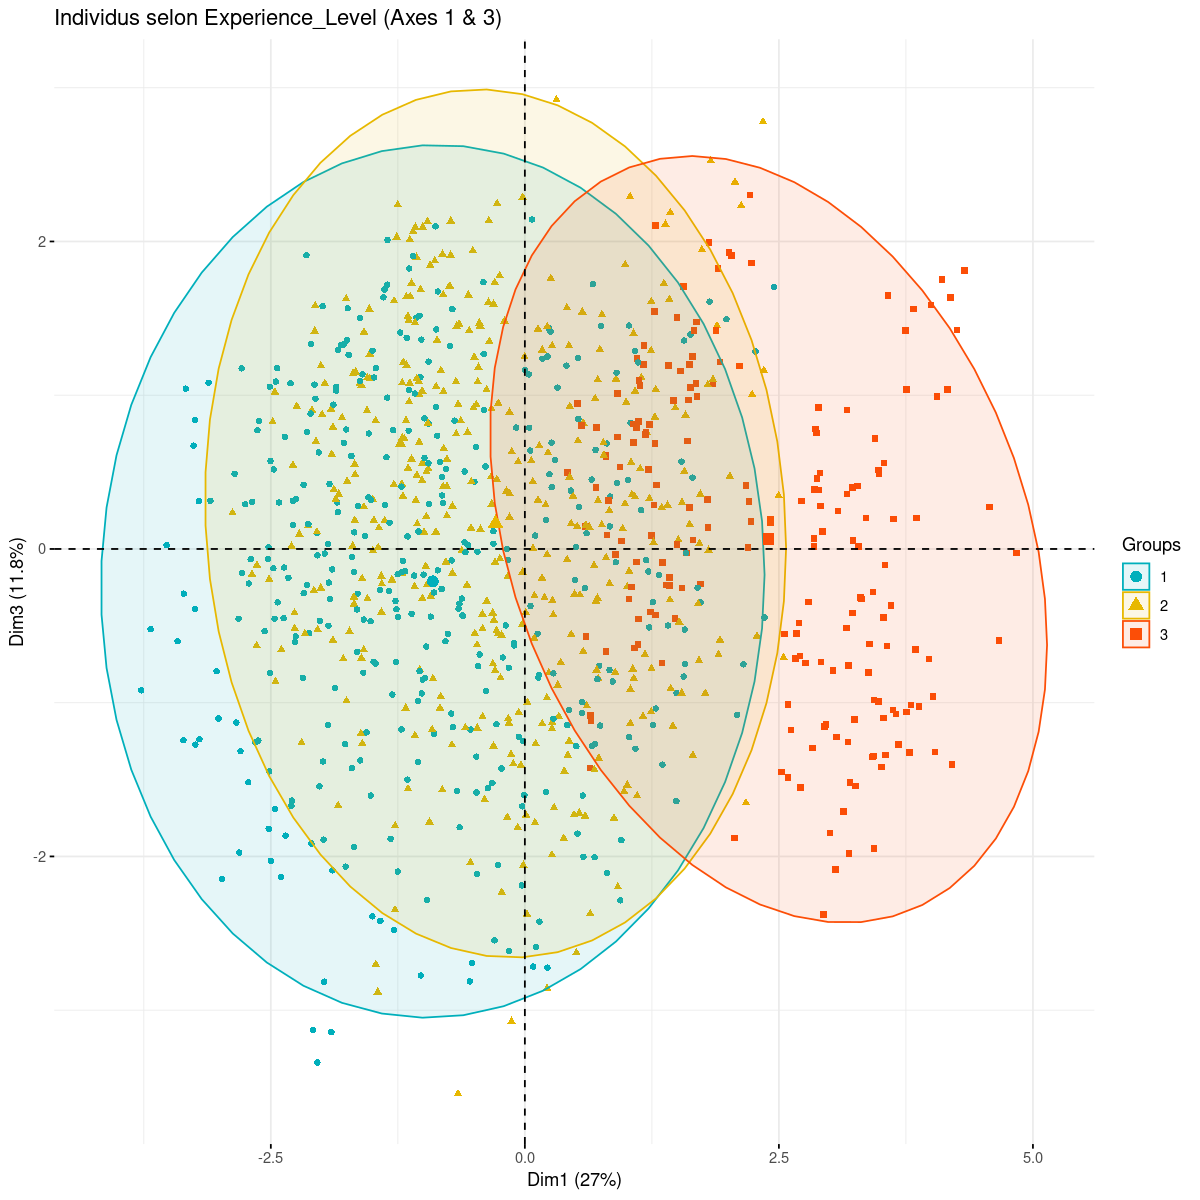

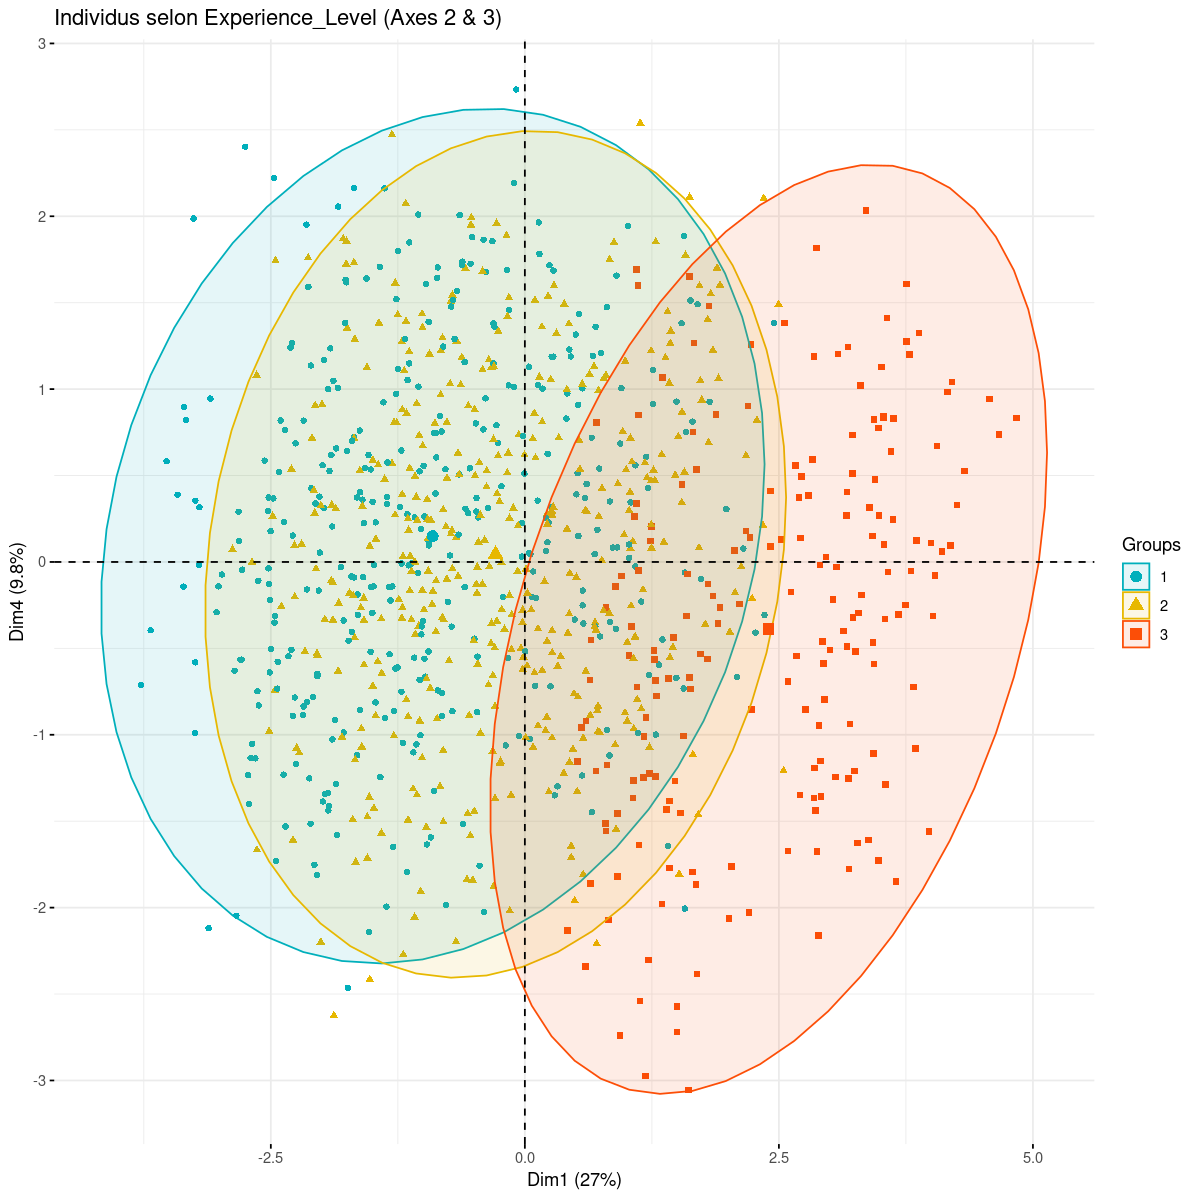

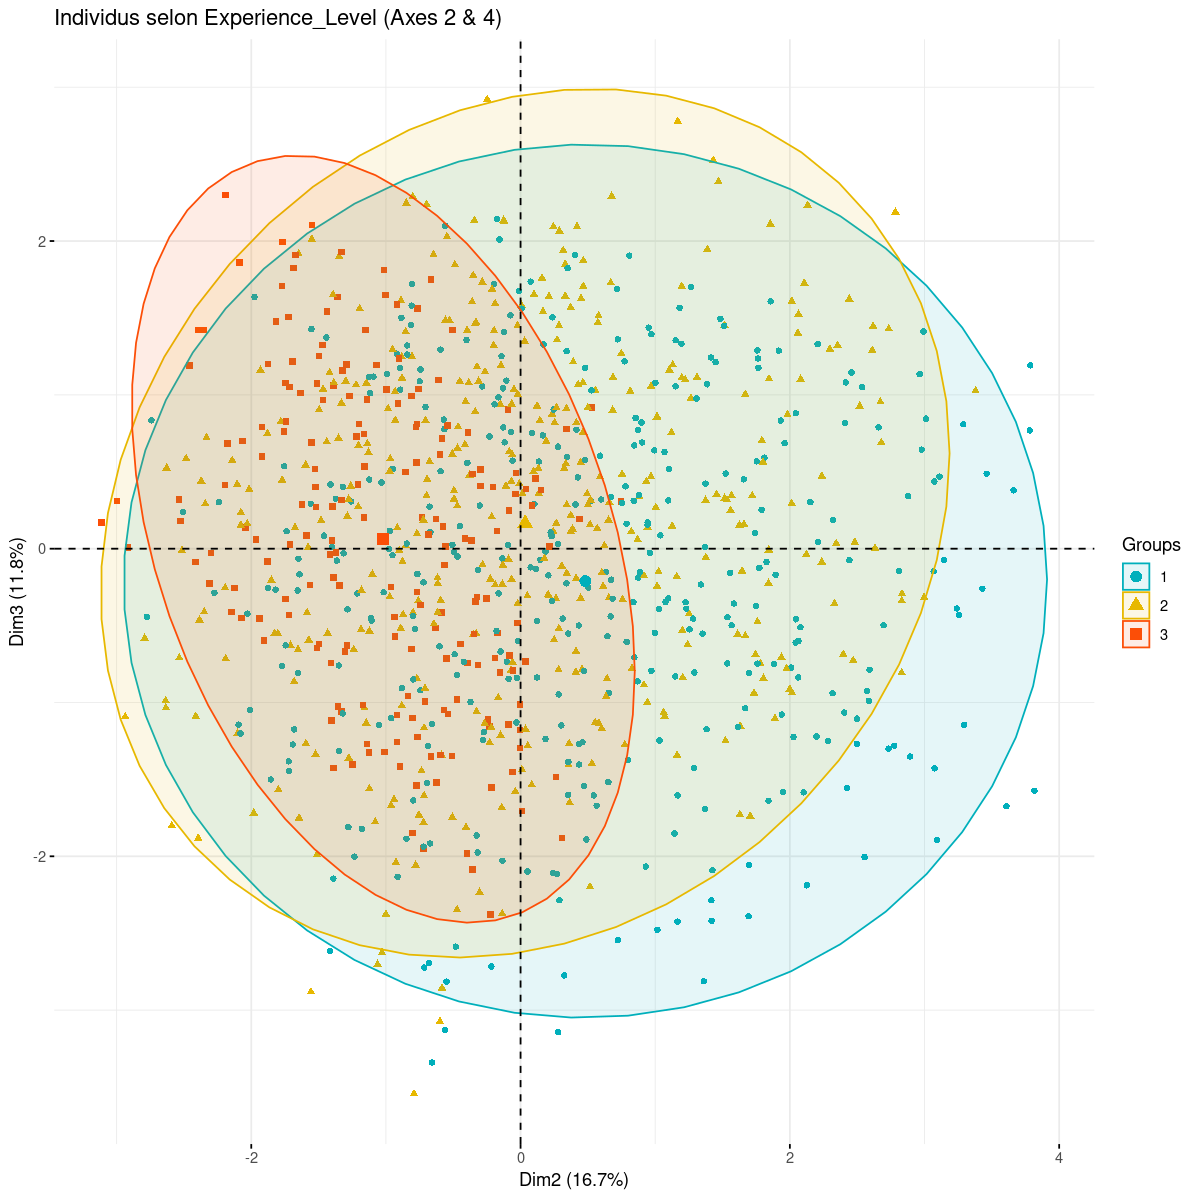

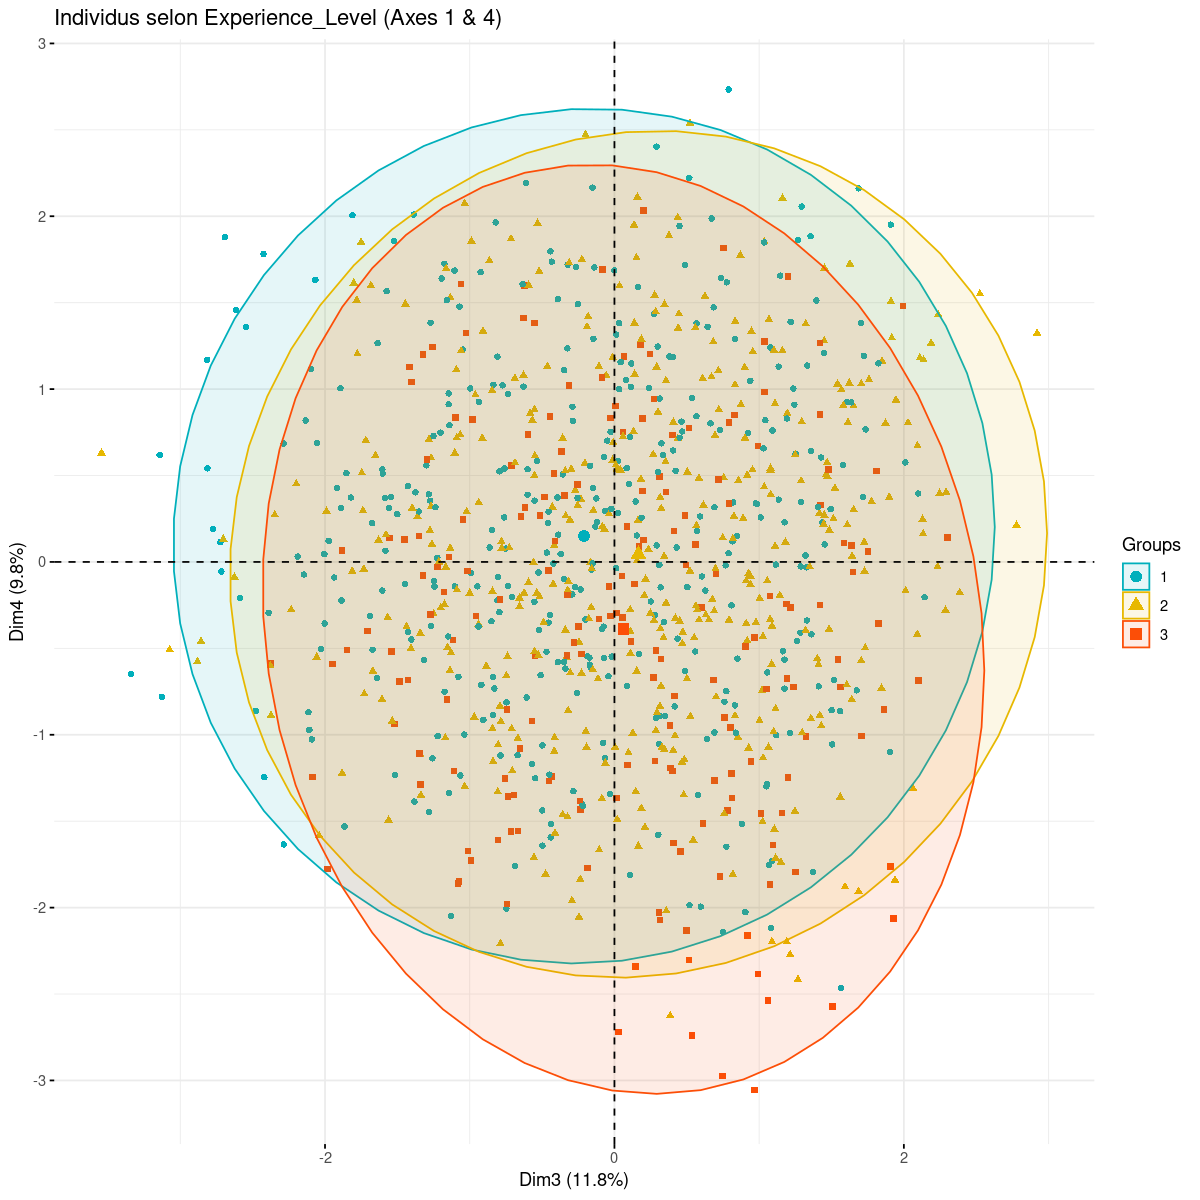

In [29]:
fviz_pca_ind(acp,
             label = "none",
             habillage = as.factor(gym$Experience_Level),
             addEllipses = TRUE,
             axes = c(1,2),
             palette = c("#00AFBB", "#E7B800", "#FC4E07"),
             title = "Individus selon Experience_Level (Axes 1 & 2)")

fviz_pca_ind(acp,
             label = "none",
             habillage = as.factor(gym$Experience_Level),
             addEllipses = TRUE,
             axes = c(1,3),
             palette = c("#00AFBB", "#E7B800", "#FC4E07"),
             title = "Individus selon Experience_Level (Axes 1 & 3)")

fviz_pca_ind(acp,
             label = "none",
             habillage = as.factor(gym$Experience_Level),
             addEllipses = TRUE,
             axes = c(1,4),
             palette = c("#00AFBB", "#E7B800", "#FC4E07"),
             title = "Individus selon Experience_Level (Axes 2 & 3)")

fviz_pca_ind(acp,
             label = "none",
             habillage = as.factor(gym$Experience_Level),
             addEllipses = TRUE,
             axes = c(2,3),
             palette = c("#00AFBB", "#E7B800", "#FC4E07"),
             title = "Individus selon Experience_Level (Axes 2 & 4)")

fviz_pca_ind(acp,
             label = "none",
             habillage = as.factor(gym$Experience_Level),
             addEllipses = TRUE,
             axes = c(3,4),
             palette = c("#00AFBB", "#E7B800", "#FC4E07"),
             title = "Individus selon Experience_Level (Axes 1 & 4)")



Sur les 2 premiers graphes, on peut voir que seule la dimension 1 peut nous permettre de séparer la classe 3 des deux autres classes. On peut donc interpréter que Experience_Level peut dépendre des variables explicatives de la dimension 1.La dimension 1 explique le niveau d'expérience.

<h1 style="color:red">II- Prédiction des Calories Brulées</h1>


Nous considérons maintenant le problème de la prédiction la variable Calories_Burned à partir des autres
variables du point de vue de l’apprentissage automatique, c’est-à-dire en nous concentrant sur les performances
du modèle. L’objectif est de déterminer les meilleures performances que nous pouvons attendre, et les modèles
qui les atteignent. 

## 2.1 Division du jeu de données en un échantillon d'apprentissage et un échantillon test
Nous divisons le jeu de données en un échantillon d’apprentissage et un échantillon test. Nous prenons un 
pourcentage de 20% pour l’échantillon test. Pourquoi cette étape est-elle nécessaire lorsque nous nous
concentrons sur les performances des algorithmes ?


In [30]:
set.seed(235) # initialisation du générateur :  Fixe la graine aléatoire pour assurer la reproductibilité des résultats.
# Extraction des échantillons
test.ratio <- .2   # part de l'échantillon test, ici 20%
npop <- nrow(gym) # nombre de lignes dans les données (nbr d'individus)
nvar <- ncol(gym) # nombre de colonnes (nbr de variables)
# taille de l'échantillon test
ntest <- ceiling(npop * test.ratio) #Calcule le nombre d’individus dans l’échantillon de test. Ceiling() arrondit à l’entier supérieur pour garantir un effectif entier.
# indices de l'échantillon test
testi <- sample(1:npop, ntest) #Tire au hasard ntest indices parmi 1:npop (toutes les lignes du dataset). testi contient donc les indices des individus sélectionnés pour le test. En gros, il tire au hasard 20% des individus
# indices de l'échantillon d'apprentissage
appri <- setdiff(1:npop, testi) #etdiff(1:npop, testi) renvoie toutes les lignes qui ne sont pas dans testi, donc celles pour l'apprentissage.

In [31]:
# construction de l'échantillon d'apprentissage
datappr0 <- gym[appri, ] 
# construction de l'échantillon test
datestr0 <- gym[testi, ] 
# vérification
str(datappr0)
str(datestr0)
#summary(datappr0) 

'data.frame':	778 obs. of  15 variables:
 $ Age                          : int  56 46 32 38 56 36 40 28 28 41 ...
 $ Gender                       : Factor w/ 2 levels "Female","Male": 2 1 1 2 1 2 1 2 2 2 ...
 $ Height..m.                   : num  1.71 1.53 1.66 1.79 1.68 1.72 1.51 1.94 1.84 2 ...
 $ Max_BPM                      : int  180 179 167 188 168 174 189 185 169 179 ...
 $ Avg_BPM                      : int  157 151 122 158 156 169 141 127 136 136 ...
 $ Resting_BPM                  : int  60 66 54 68 74 73 64 52 64 69 ...
 $ Session_Duration..hours.     : num  1.69 1.3 1.11 0.64 1.59 1.49 1.27 1.03 1.08 1.18 ...
 $ Calories_Burned              : num  1313 883 677 556 1116 ...
 $ Workout_Type                 : Factor w/ 4 levels "Cardio","HIIT",..: 4 2 1 3 2 1 1 3 1 2 ...
 $ Fat_Percentage               : num  12.6 33.9 33.4 29.2 15.5 21.3 30.6 28.9 29.7 27.6 ...
 $ Water_Intake..liters.        : num  3.5 2.1 2.3 2.8 2.7 2.3 1.9 2.6 2.7 3.7 ...
 $ Workout_Frequency..days.week.:

On normalise l'échantillon d'apprentissage et de test pour Éviter le déséquilibre entre les variables : Certaines variables comme Height..m. (de l'ordre de 1-2) et Calories_Burned (de l'ordre de centaines ou milliers) ont des échelles très différentes
Cela permet aussi d'améliorer la convergence de certains algorithmes (SVM, réseaux de neurones ou reg logistique par exemple) et d'améliorer les performances.

On ne normalise pas les variables quali donc on va les exclure de la normalisation. On les exclut seulement de la normalisation mais pas des échantillons tests et apprentissages contrairement. Pour cela, on récupère les identifiants des colonnes de toutes les variables quali :



In [32]:
which(sapply(datappr0, is.factor))
cat("Calories_Burned : " ,which(colnames(datappr0) == "Calories_Burned"))

Gender                  Workout_Type 
                            2                             9 
Workout_Frequency..days.week.              Experience_Level 
                           12                            13

Calories_Burned :  8

In [33]:
#échantillon appr
datappr=datappr0

#on ne modifie pas les variables quali + calories brulées
datappr[,-c(2,8,9,12,13)]=scale(datappr0[,-c(2,8,9,12,13)])

# on normalise l'échantillon test 
# à l'aide des caractéristiques de l'échantillon d'apprentissage
datestr=datestr0
datestr[,-c(2,8,9,12,13)]=scale(datestr0[,-c(2,8,9,12,13)],
                            center=sapply(datappr0[,-c(2,8,9,12,13)],mean), # on centre avec les moyennes de l'échantillon d'apprentissage
                            scale=sapply(datappr0[,-c(2,8,9,12,13)],sd)) # on réduit avec les écart-types de l'échantillon d'apprentissage
summary(datappr)
summary(datestr)

      Age              Gender      Height..m.          Max_BPM        
 Min.   :-1.68603   Female:368   Min.   :-1.75705   Min.   :-1.73044  
 1st Qu.:-0.86543   Male  :410   1st Qu.:-0.82012   1st Qu.:-0.87212  
 Median : 0.03723                Median :-0.03934   Median : 0.07204  
 Mean   : 0.00000                Mean   : 0.00000   Mean   : 0.00000  
 3rd Qu.: 0.85783                3rd Qu.: 0.58528   3rd Qu.: 0.84454  
 Max.   : 1.67844                Max.   : 2.14683   Max.   : 1.61703  
    Avg_BPM          Resting_BPM       Session_Duration..hours.
 Min.   :-1.64966   Min.   :-1.64729   Min.   :-2.20804        
 1st Qu.:-0.87874   1st Qu.:-0.83521   1st Qu.:-0.60730        
 Median :-0.03774   Median :-0.02314   Median : 0.03299        
 Mean   : 0.00000   Mean   : 0.00000   Mean   : 0.00000        
 3rd Qu.: 0.87334   3rd Qu.: 0.78894   3rd Qu.: 0.55687        
 Max.   : 1.78442   Max.   : 1.60101   Max.   : 2.15761        
 Calories_Burned    Workout_Type Fat_Percentage    Wate

      Age              Gender      Height..m.         Max_BPM        
 Min.   :-1.68603   Female: 94   Min.   :-1.7570   Min.   :-1.73044  
 1st Qu.:-0.86543   Male  :101   1st Qu.:-0.8982   1st Qu.:-0.87212  
 Median : 0.20135                Median :-0.3517   Median :-0.09962  
 Mean   : 0.05617                Mean   :-0.0958   Mean   :-0.11855  
 3rd Qu.: 0.93989                3rd Qu.: 0.5072   3rd Qu.: 0.67287  
 Max.   : 1.67844                Max.   : 2.1468   Max.   : 1.61703  
    Avg_BPM          Resting_BPM       Session_Duration..hours.
 Min.   :-1.64966   Min.   :-1.64729   Min.   :-2.178932       
 1st Qu.:-0.87874   1st Qu.:-0.69987   1st Qu.:-0.665508       
 Median : 0.03234   Median : 0.11221   Median : 0.003891       
 Mean   : 0.07978   Mean   : 0.03517   Mean   :-0.032527       
 3rd Qu.: 1.01350   3rd Qu.: 0.78894   3rd Qu.: 0.585977       
 Max.   : 1.78442   Max.   : 1.60101   Max.   : 2.070296       
 Calories_Burned    Workout_Type Fat_Percentage     Water_Inta

On ajoute center et scale pour garantir que l’échantillon de test (datestr) est normalisé avec les mêmes moyennes et écarts-types que l’échantillon d’apprentissage (datappr0). Pourquoi ne pas utiliser les moyennes/écarts-types du test ? Parce que l’échantillon de test est censé être inconnu pendant l’apprentissage. Si on normalisait datestr avec ses propres moyennes et écarts-types, on introduirait une fuite de données qui fausserait la prédiction.

Avant de passer aux différents algorithmes, on définit une fonction tracant le graphe des résidus avec des couleurs et des échelles fixes sur les axes.

In [34]:
gplot.res <- function(x, y, titre = "titre") {
  ggplot(data.frame(x = x, y = y), aes(x, y)) +
    geom_point(col = "blue") +
    coord_cartesian(xlim = c(250, 1700), ylim = c(-155, 155)) +
    ylab("Résidus") +
    xlab("Valeurs prédites") +
    ggtitle(titre) +
    geom_hline(yintercept = 0, col = "red")}

##  2.2 Modèle linéaire (généralisé) avec/sans sélection de variables, avec/sans pénalisation


travail ensuite : Comparez les performances d’un modèle linéaire (éventuellement généralisé) avec/sans sélection de variables, avec/sans pénalisation, d’un SVR/SVM, d’un arbre optimal, d’une forêt aléatoire, du boosting,
et de réseaux de neurones. Justifiez vos choix (par exemple le noyau pour le SVR/SVM), et ajustez
soigneusement les hyperparamètres de chaque modèle (par validation croisée). Interprétez les résultats et
quantifiez l’amélioration éventuelle apportée par les modèles non linéaires.

### 2.2.1 sans sélection de variable

                               Df   Sum Sq  Mean Sq   F value   Pr(>F)    
Age                             1  1276747  1276747   868.731  < 2e-16 ***
Gender                          1  1396801  1396801   950.419  < 2e-16 ***
Height..m.                      1      130      130     0.088 0.766257    
Max_BPM                         1      321      321     0.219 0.640127    
Avg_BPM                         1  6885236  6885236  4684.891  < 2e-16 ***
Resting_BPM                     1    18071    18071    12.296 0.000481 ***
Session_Duration..hours.        1 47122528 47122528 32063.377  < 2e-16 ***
Workout_Type                    3     5711     1904     1.295 0.274876    
Fat_Percentage                  1     1552     1552     1.056 0.304412    
Water_Intake..liters.           1       37       37     0.025 0.873810    
Workout_Frequency..days.week.   3     2393      798     0.543 0.653113    
Experience_Level                2     3426     1713     1.166 0.312313    
LBMI                     

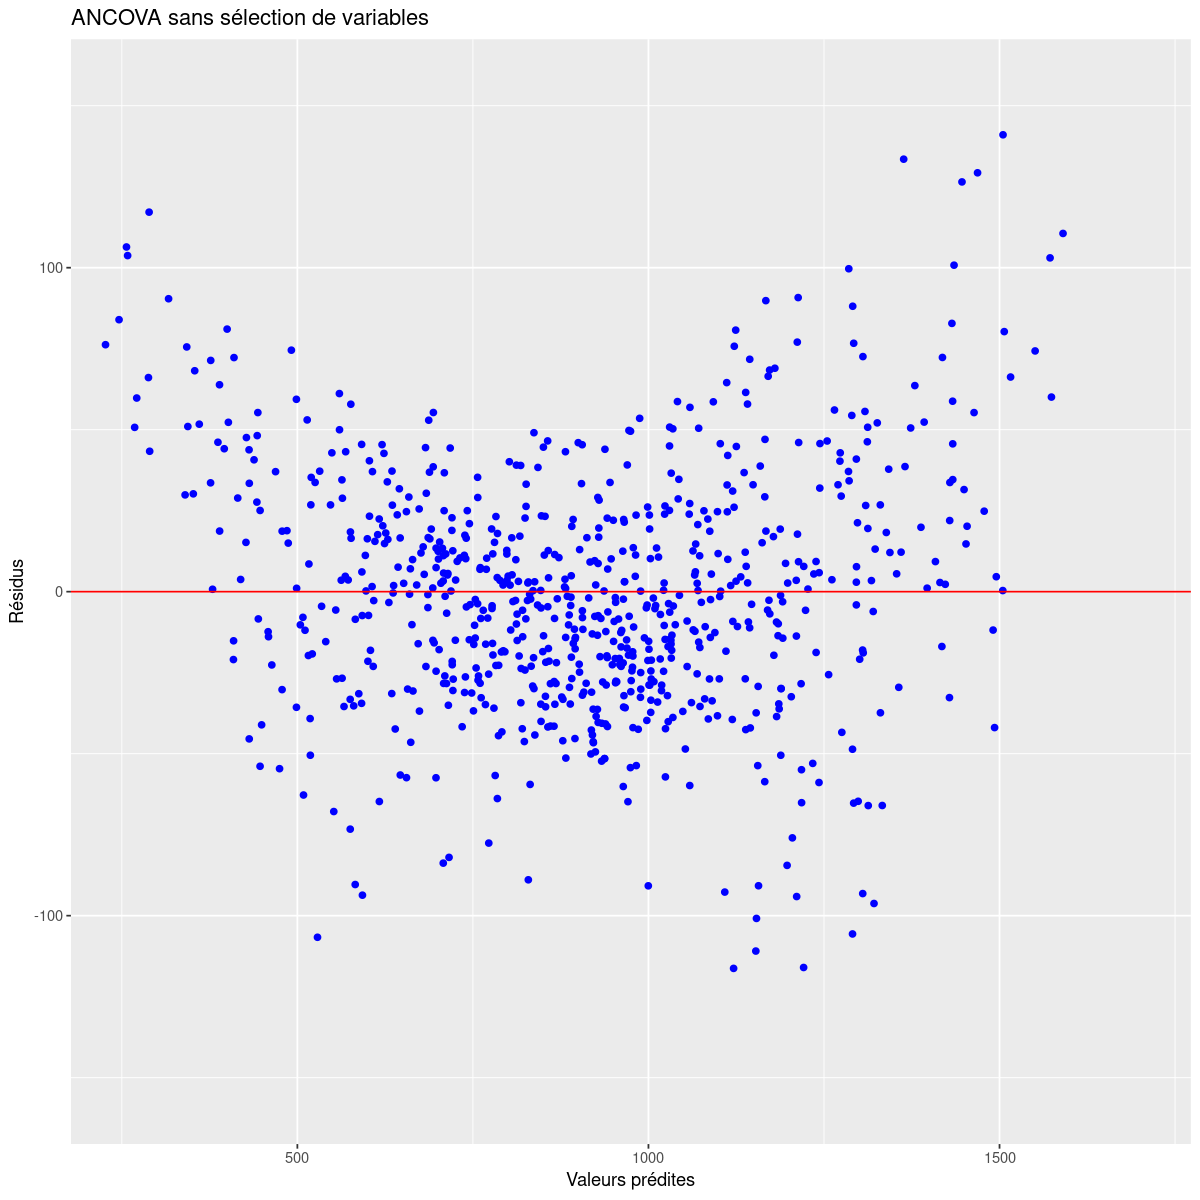

In [35]:
# estimation du modèle sans interaction
reg.lm <-aov(Calories_Burned ~ . , data = datappr)
# Extraction des résidus et des valeurs ajustées de ce modèle
res.lm <- reg.lm$residuals
fit.lm <- reg.lm$fitted.values
# Graphe des résidus.
gplot.res(fit.lm,res.lm,"ANCOVA sans sélection de variables")

summary(reg.lm)

Les résidus ne sont pas indépendants, car on observe une parabole.

Voyons si un critère de pénalité Ridge améliore notre modèle

#### Ridge

In [36]:
x.mat <- model.matrix(Calories_Burned ~ . - 1, data = datappr)
y <- datappr$Calories_Burned

In [37]:
reg.ridge <- glmnet(y = y, x = x.mat, alpha = 0)

Determinons le lambda optimal par validation croisée

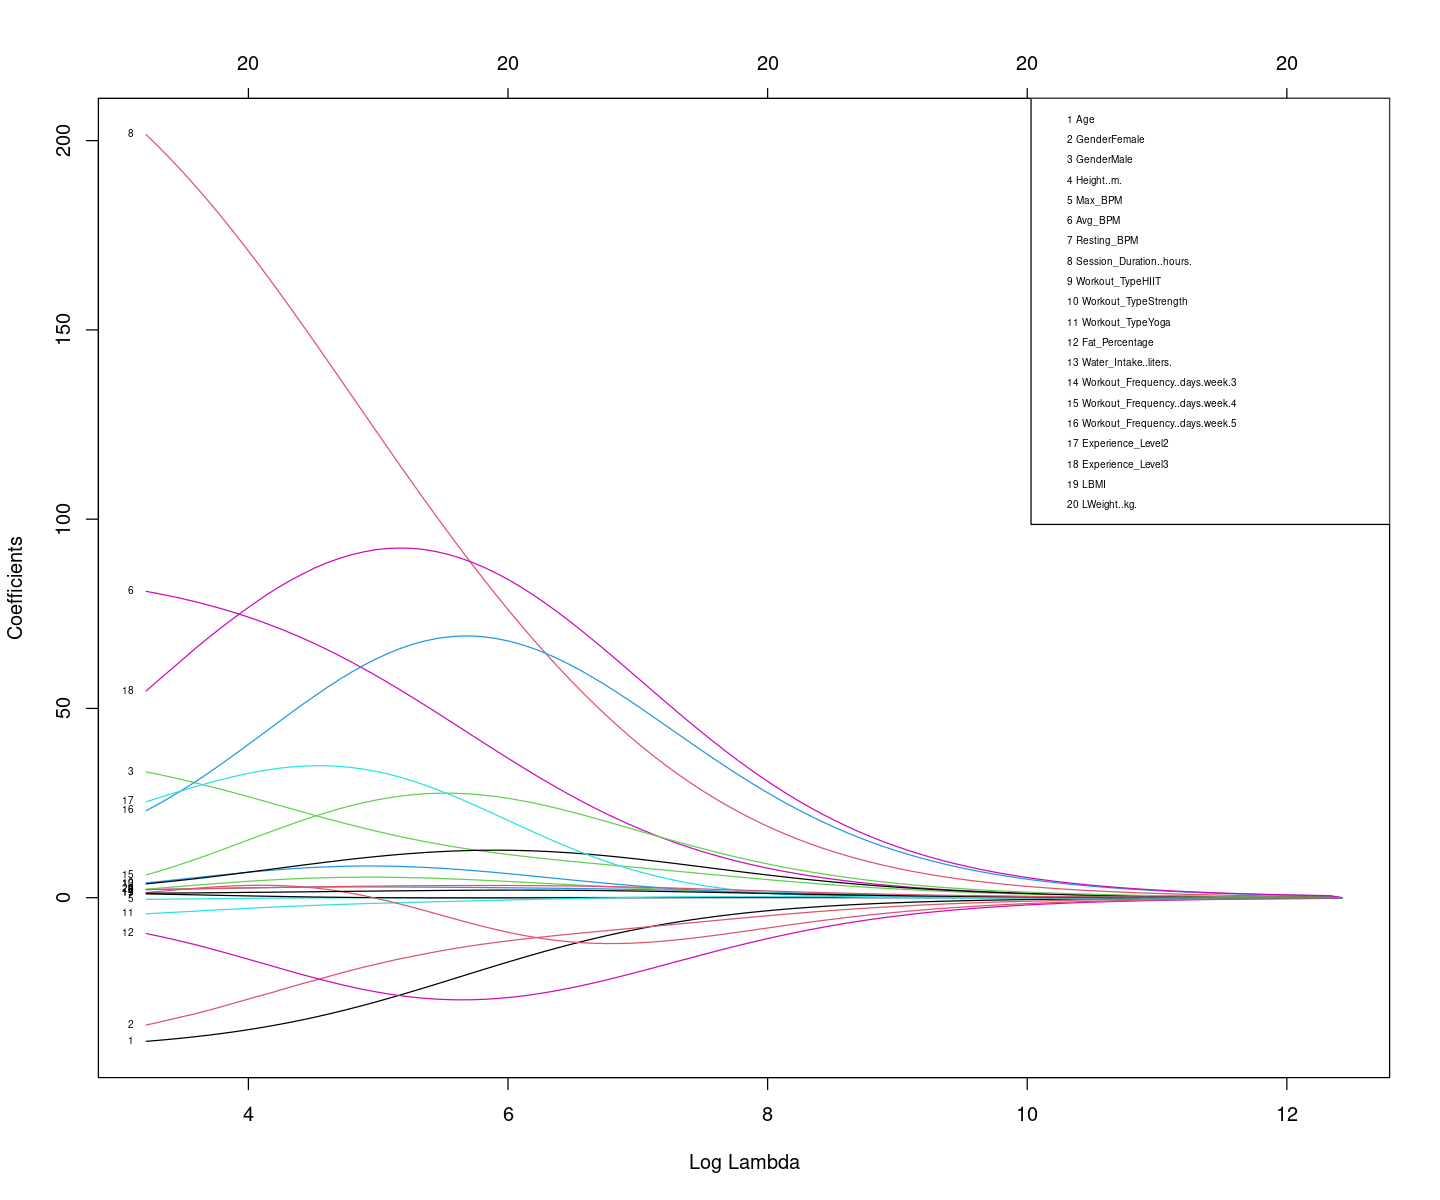

In [38]:
reg.ridge.cv <- cv.glmnet(y = y, x = x.mat, alpha = 0)
options(repr.plot.width = 12, repr.plot.height = 10)

plot(reg.ridge, xvar = "lambda", label = TRUE)
legend("topright", legend = paste(1:ncol(x.mat), colnames(x.mat)), cex = 0.5)

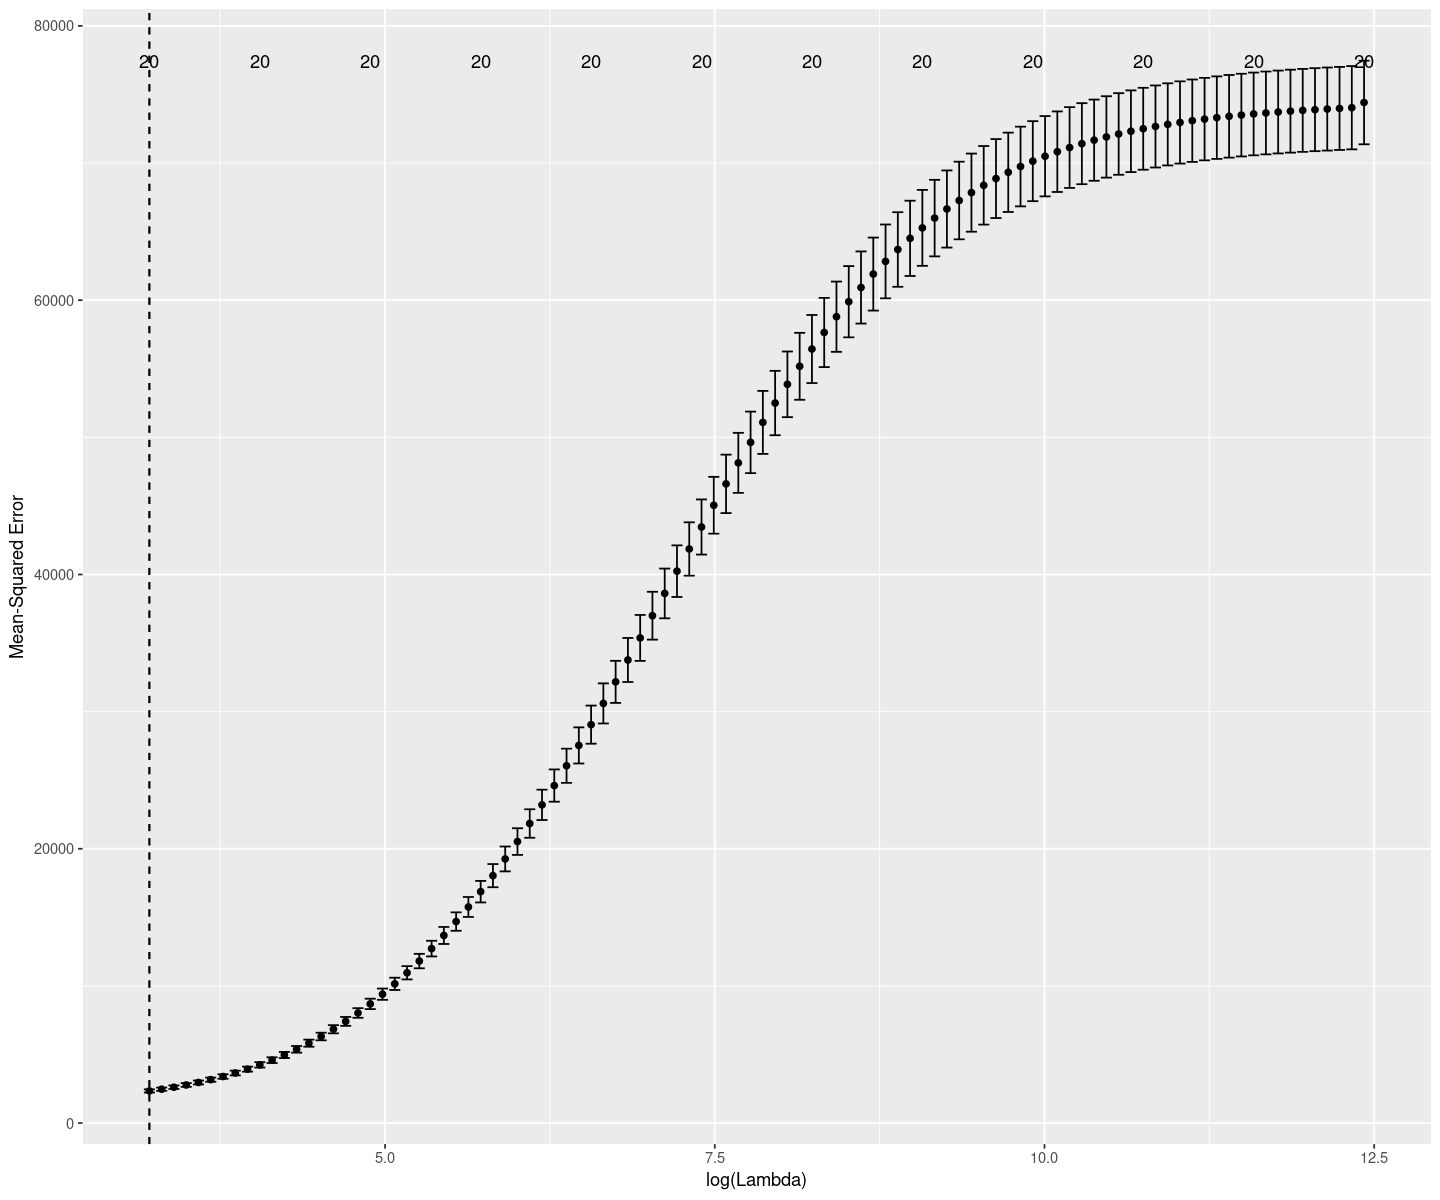

In [39]:
autoplot(reg.ridge.cv)
#abline(v = log(reg.ridge.cv$lambda.1se))
#abline(v = log(reg.ridge.cv$lambda.min))

In [40]:
paste("CV estimée de lambda :", round(reg.ridge.cv$lambda.1se, 3))
coef(reg.ridge.cv, s = "lambda.1se")
paste("CV estimée de lambda :", round(reg.ridge.cv$lambda.min, 3))
coef(reg.ridge.cv, s = "lambda.min")


[1] "CV estimée de lambda : 24.849"

21 x 1 sparse Matrix of class "dgCMatrix"
                                        s1
(Intercept)                    877.9097862
Age                            -37.9510513
GenderFemale                   -33.6340102
GenderMale                      33.2290698
Height..m.                       2.1072753
Max_BPM                         -0.4438016
Avg_BPM                         80.9255143
Resting_BPM                      1.0074396
Session_Duration..hours.       201.5761448
Workout_TypeHIIT                 2.2379594
Workout_TypeStrength             3.8840313
Workout_TypeYoga                -4.2590289
Fat_Percentage                  -9.4717327
Water_Intake..liters.            3.6574889
Workout_Frequency..days.week.3   1.3136102
Workout_Frequency..days.week.4   6.0065459
Workout_Frequency..days.week.5  22.9828108
Experience_Level2               25.3451709
Experience_Level3               54.6257274
LBMI                             1.1767832
LWeight..kg.                     2.1543309

[1] "CV estimée de lambda : 24.849"

21 x 1 sparse Matrix of class "dgCMatrix"
                                        s1
(Intercept)                    877.9097862
Age                            -37.9510513
GenderFemale                   -33.6340102
GenderMale                      33.2290698
Height..m.                       2.1072753
Max_BPM                         -0.4438016
Avg_BPM                         80.9255143
Resting_BPM                      1.0074396
Session_Duration..hours.       201.5761448
Workout_TypeHIIT                 2.2379594
Workout_TypeStrength             3.8840313
Workout_TypeYoga                -4.2590289
Fat_Percentage                  -9.4717327
Water_Intake..liters.            3.6574889
Workout_Frequency..days.week.3   1.3136102
Workout_Frequency..days.week.4   6.0065459
Workout_Frequency..days.week.5  22.9828108
Experience_Level2               25.3451709
Experience_Level3               54.6257274
LBMI                             1.1767832
LWeight..kg.                     2.1543309

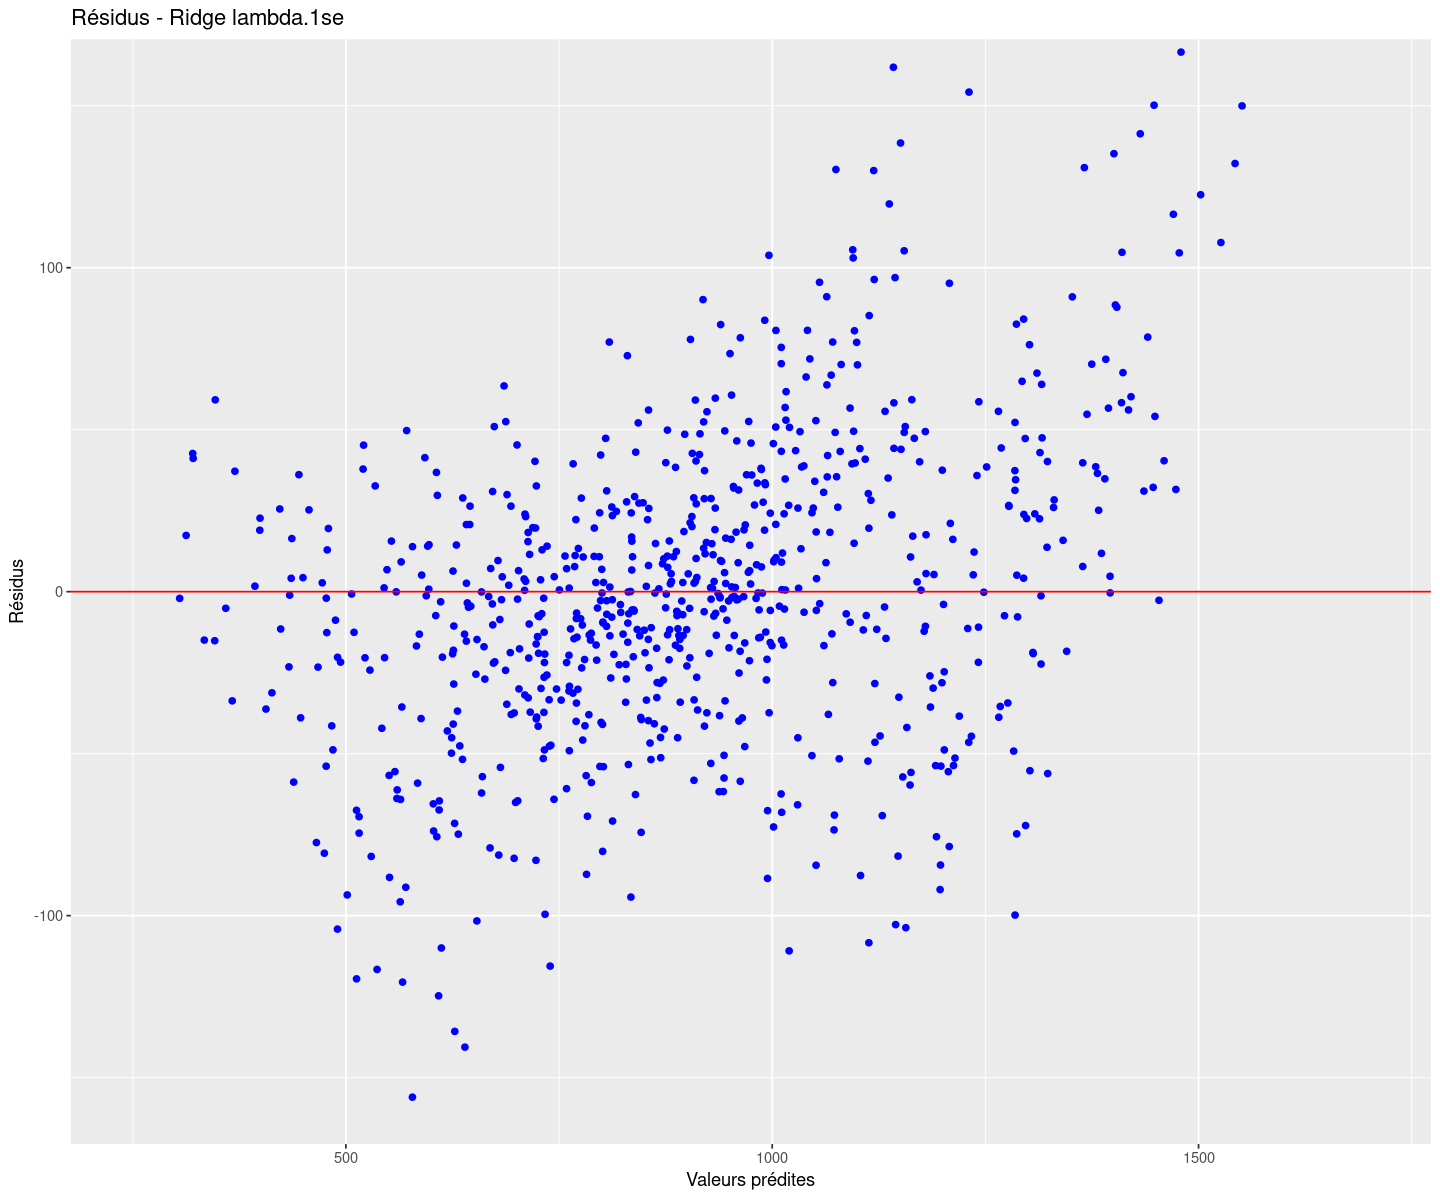

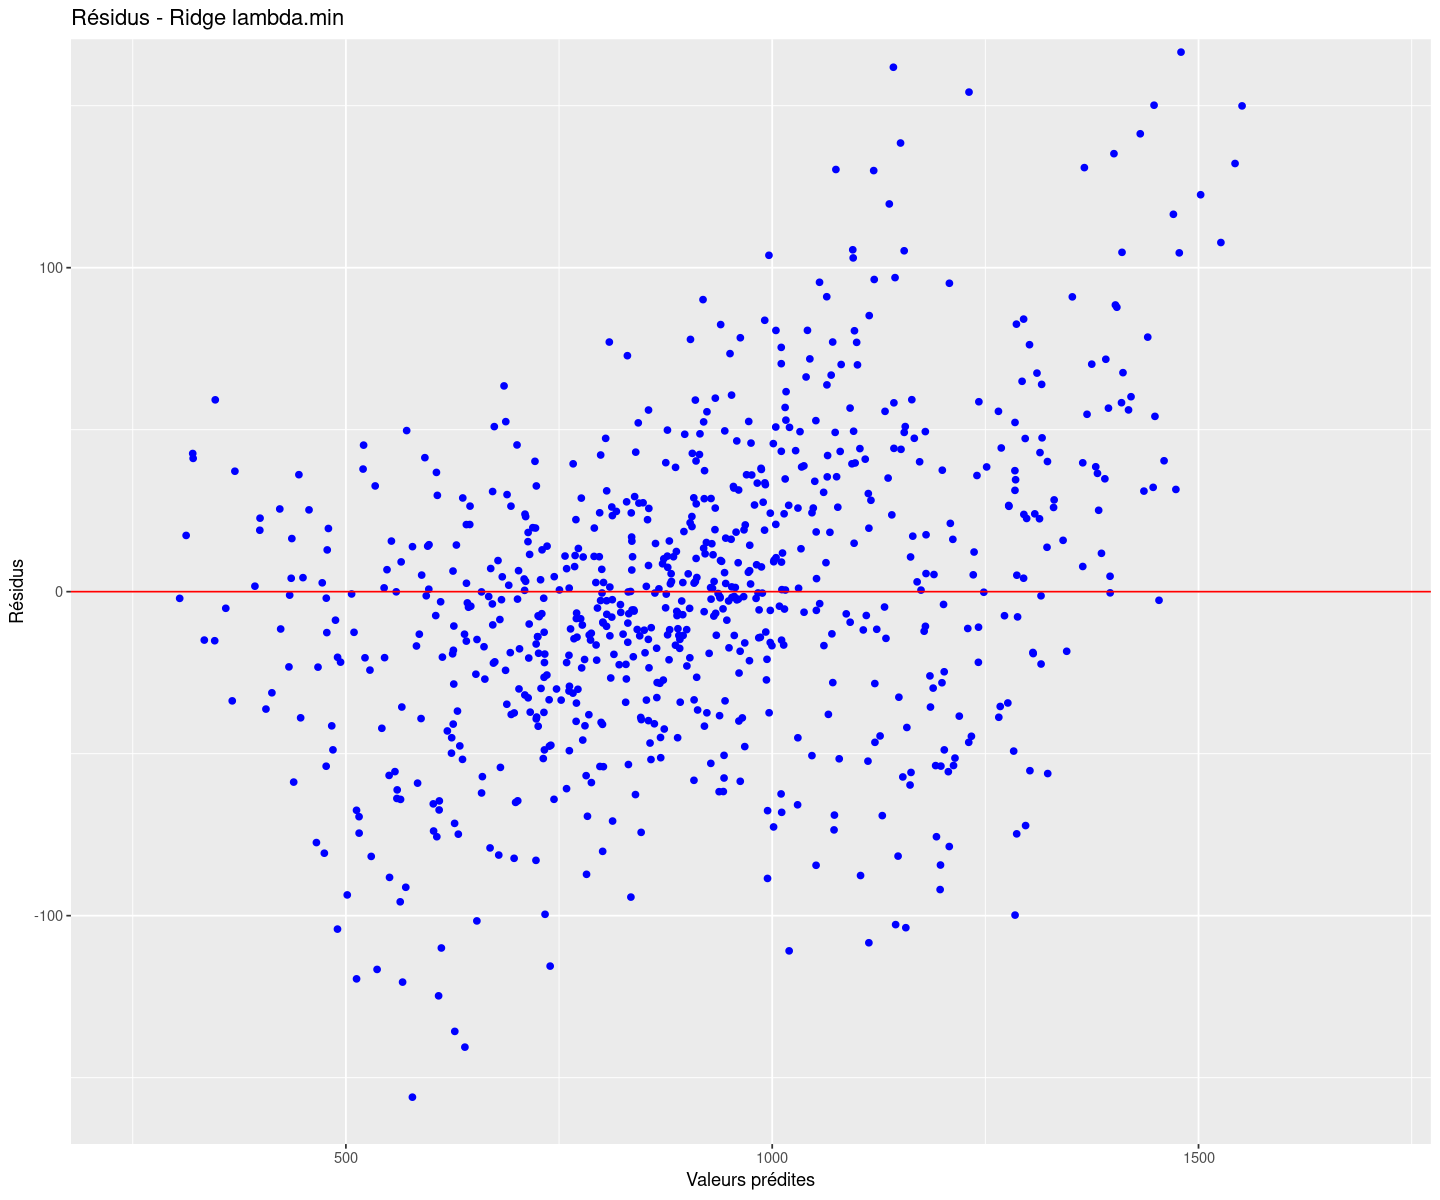

In [41]:
# lambda.1se
fit.ridge.1se <- predict(reg.ridge.cv, s = "lambda.1se", newx = x.mat)
res.ridge.1se <- y - fit.ridge.1se
gplot.res(fit.ridge.1se, res.ridge.1se, "Résidus - Ridge lambda.1se")

# lambda.min
fit.ridge.min <- predict(reg.ridge.cv, s = "lambda.min", newx = x.mat)
res.ridge.min <- y - fit.ridge.min
gplot.res(fit.ridge.min, res.ridge.min, "Résidus - Ridge lambda.min")


#### Prevision sur l'echantillon test

In [42]:

x.mattest <- model.matrix(Calories_Burned ~ . - 1, data = datestr)
pred.ridge.1se <- predict(reg.ridge.cv, newx = x.mattest, s = "lambda.1se")
mse.ridge.1se <- mean((pred.ridge.1se - datestr[, "Calories_Burned"])^2)
cat("Erreur quadratique moyenne (MSE) pour Ridge avec lambda.1se :", mse.ridge.1se, "\n")

pred.ridge.min <- predict(reg.ridge.cv, newx = x.mattest, s = "lambda.min")
mse.ridge.min <- mean((pred.ridge.min - datestr[, "Calories_Burned"])^2)
cat("Erreur quadratique moyenne (MSE) pour Ridge avec lambda.min :", mse.ridge.min, "\n")


Erreur quadratique moyenne (MSE) pour Ridge avec lambda.1se : 2950 
Erreur quadratique moyenne (MSE) pour Ridge avec lambda.min : 2950 


Ridge est moins performant que le modèle linéaire.

### 2.2.2 Sélection de variable par régularisation L1 (LASSO)

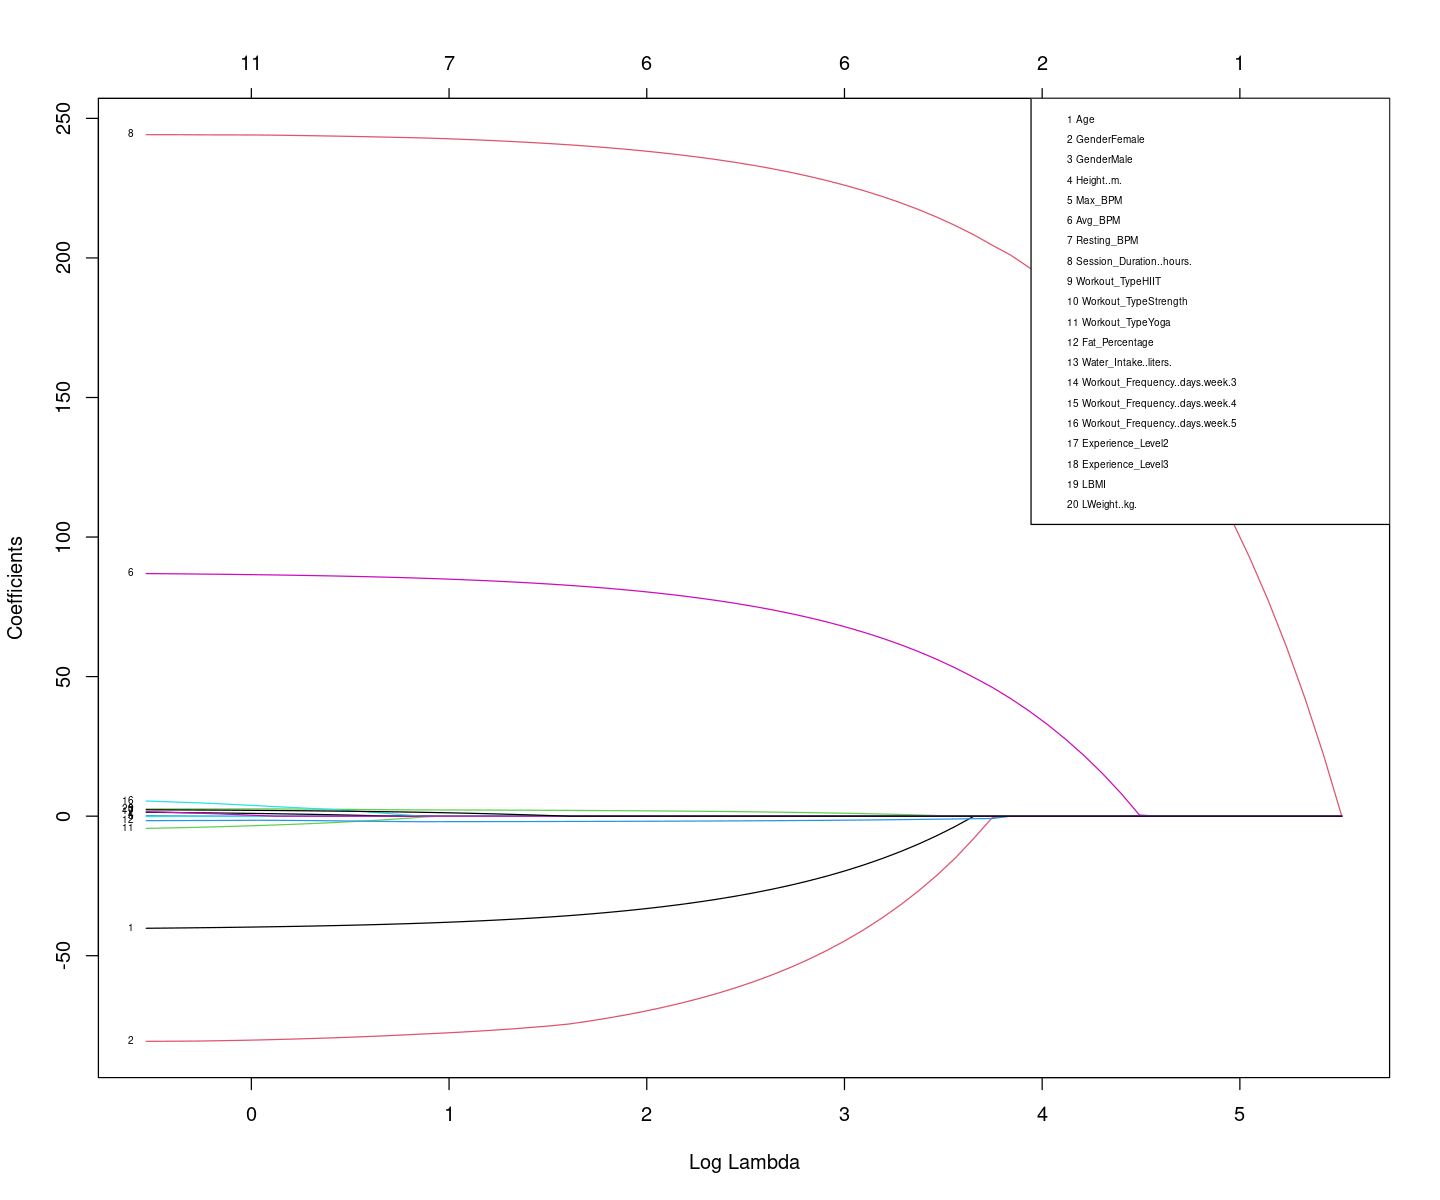

In [43]:
library(glmnet)
# avec des variables quantitatives seulement
reg.lasso.quanti <- glmnet(y = datappr[, 8],
                           x = as.matrix(datappr[, -c(2,8,9,12,13)]))


# avec toutes les variables, créer d'abord la matrice d'expériences
# avec 'model.matrix' (penser à retirer l'intercept du modèle en faisant -1)
x.mat <- model.matrix(Calories_Burned ~ . - 1, data = datappr)
reg.lasso <- glmnet(y = datappr$Calories_Burned, x = x.mat)
options(repr.plot.width = 12, repr.plot.height = 10)


plot(reg.lasso, xvar = "lambda", label = TRUE)
legend("topright",legend = paste(1:ncol(x.mat), colnames(x.mat)),cex = 0.5) 


Chaque ligne du graphique représente le coefficient estimé d’une variable dans le modèle.
Lambda est le paramètre de pénalisation (plus il est grand, plus les coefficients sont poussés vers zéro).

À gauche (lambda grand), beaucoup de coefficients sont nuls car pénalisation forte ➜ le modèle est simple 

À droite (lambda petit), plus de variables entrent dans le modèle car pénalisation faible (coefficients ≠ 0) ➜ modèles plus complexes.

Pour choisir le lambda optimal nous allons effectuer une validation croisée.

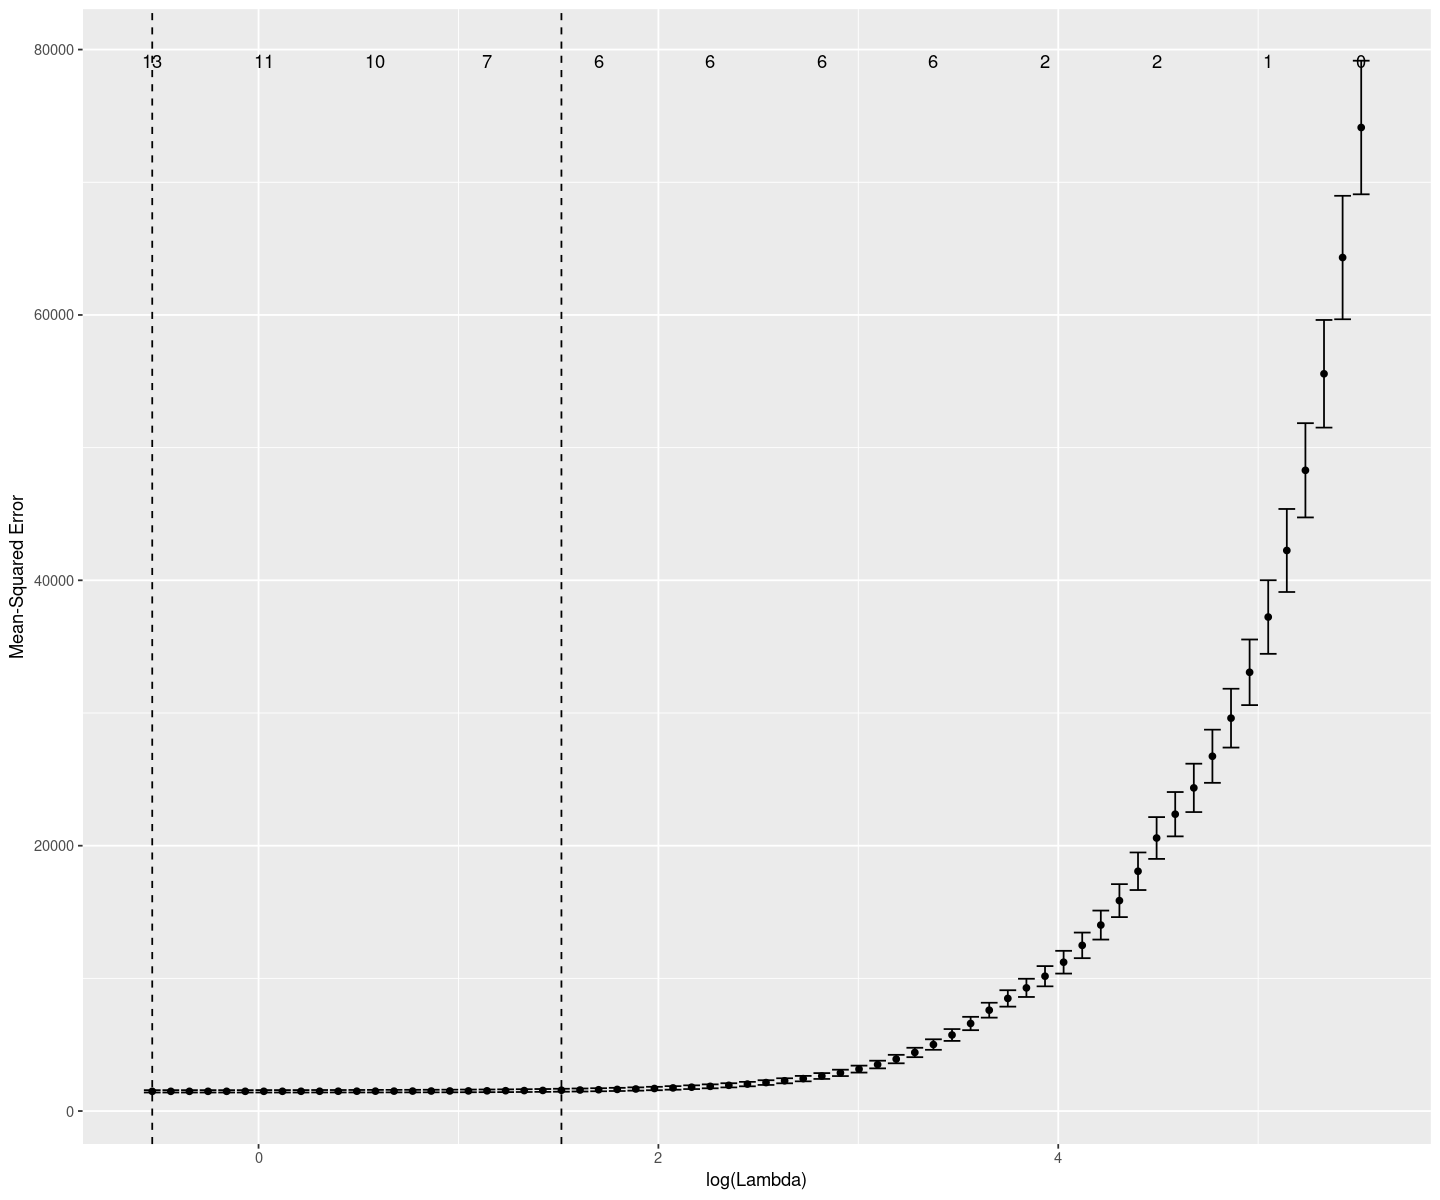

In [44]:
reg.lasso.cv<-cv.glmnet(y=datappr[,8],x=x.mat)
autoplot(reg.lasso.cv)

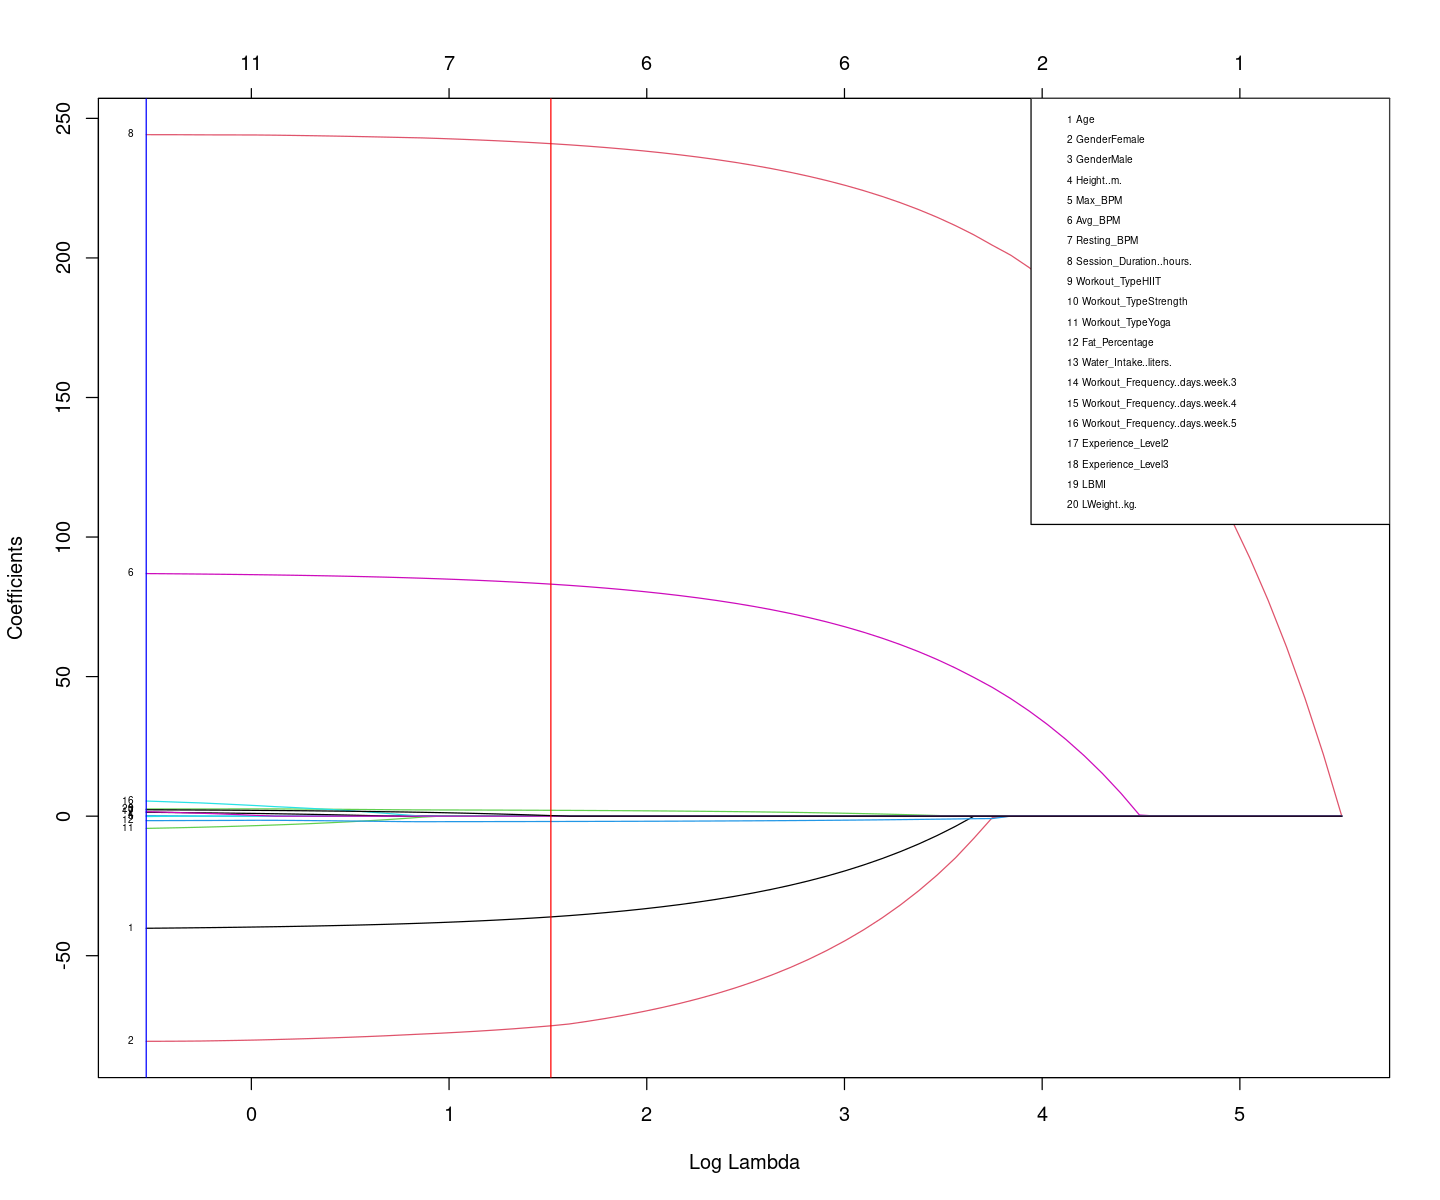

In [45]:
plot(reg.lasso, xvar = "lambda", label = TRUE)
legend("topright",
       legend = paste(1:ncol(x.mat), colnames(x.mat)),
       cex = 0.5) 
abline(v=log(reg.lasso.cv$lambda.1se),col="red")
abline(v=log(reg.lasso.cv$lambda.min),col="blue")

In [46]:
#LAMBDA LSE

#valeur estimée
paste("CV estimée de lambda :", round (reg.lasso.cv$lambda.1se, 3))
#modèle correspondant
coef(reg.lasso.cv,s="lambda.1se")

[1] "CV estimée de lambda : 4.549"

21 x 1 sparse Matrix of class "dgCMatrix"
                                        s1
(Intercept)                    941.0156318
Age                            -36.1029967
GenderFemale                   -75.1227345
GenderMale                       2.0926945
Height..m.                       .        
Max_BPM                          .        
Avg_BPM                         83.1252417
Resting_BPM                      .        
Session_Duration..hours.       240.9462302
Workout_TypeHIIT                 .        
Workout_TypeStrength             .        
Workout_TypeYoga                 .        
Fat_Percentage                  -1.9172374
Water_Intake..liters.            .        
Workout_Frequency..days.week.3   .        
Workout_Frequency..days.week.4   .        
Workout_Frequency..days.week.5   .        
Experience_Level2                .        
Experience_Level3                .        
LBMI                             .        
LWeight..kg.                     0.2015866

Le lambda LSE est celui qui sélectionne le moins de variables. Dans les variables seléctionnées nous retrouvons bien celles que nous avions analysées comme "corrélées" au nombre de calories brulées lors de la première partie exploratoire, ce qui confirme notre travail.

In [47]:
#LAMBDA MIN
#valeur estimée
paste("CV estimée de lambda :", round (reg.lasso.cv$lambda.min, 3))
#modèle correspondant
coef(reg.lasso.cv,s="lambda.min")

[1] "CV estimée de lambda : 0.588"

21 x 1 sparse Matrix of class "dgCMatrix"
                                        s1
(Intercept)                    943.2373820
Age                            -40.1729257
GenderFemale                   -80.6832933
GenderMale                       2.5778258
Height..m.                       0.1469639
Max_BPM                         -0.1392047
Avg_BPM                         86.9101071
Resting_BPM                      1.3860026
Session_Duration..hours.       244.1688911
Workout_TypeHIIT                 .        
Workout_TypeStrength             .        
Workout_TypeYoga                -4.3882506
Fat_Percentage                  -1.6157608
Water_Intake..liters.            .        
Workout_Frequency..days.week.3   .        
Workout_Frequency..days.week.4   .        
Workout_Frequency..days.week.5   5.4163065
Experience_Level2                1.5915558
Experience_Level3                .        
LBMI                             .        
LWeight..kg.                     2.2828159

On trace ensuite les résidus en fonction des valeurs prédites. 

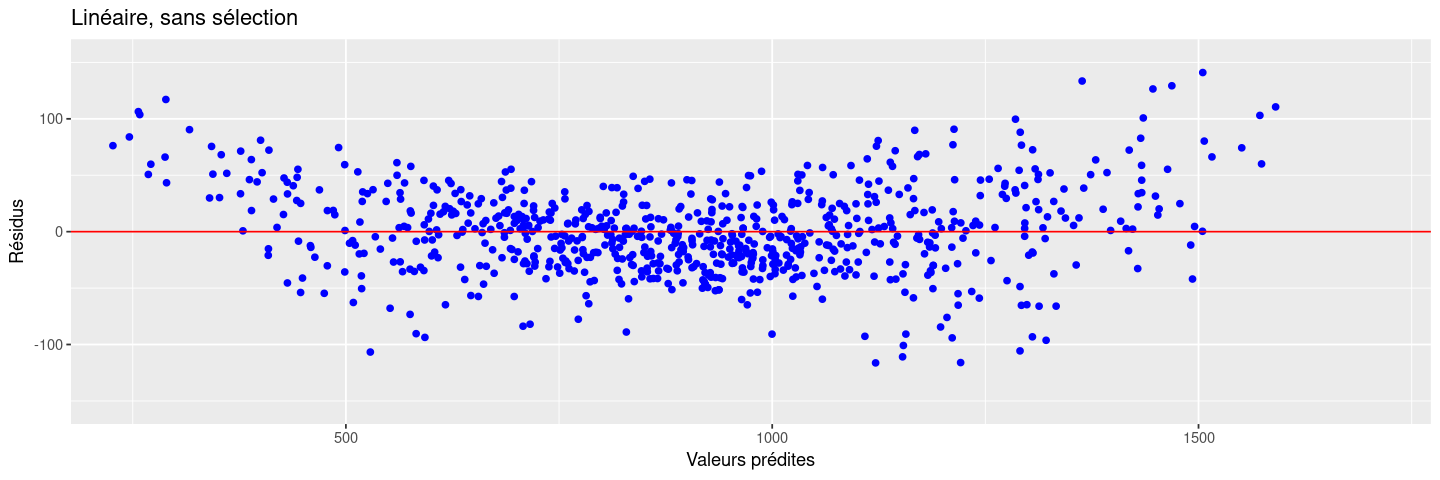

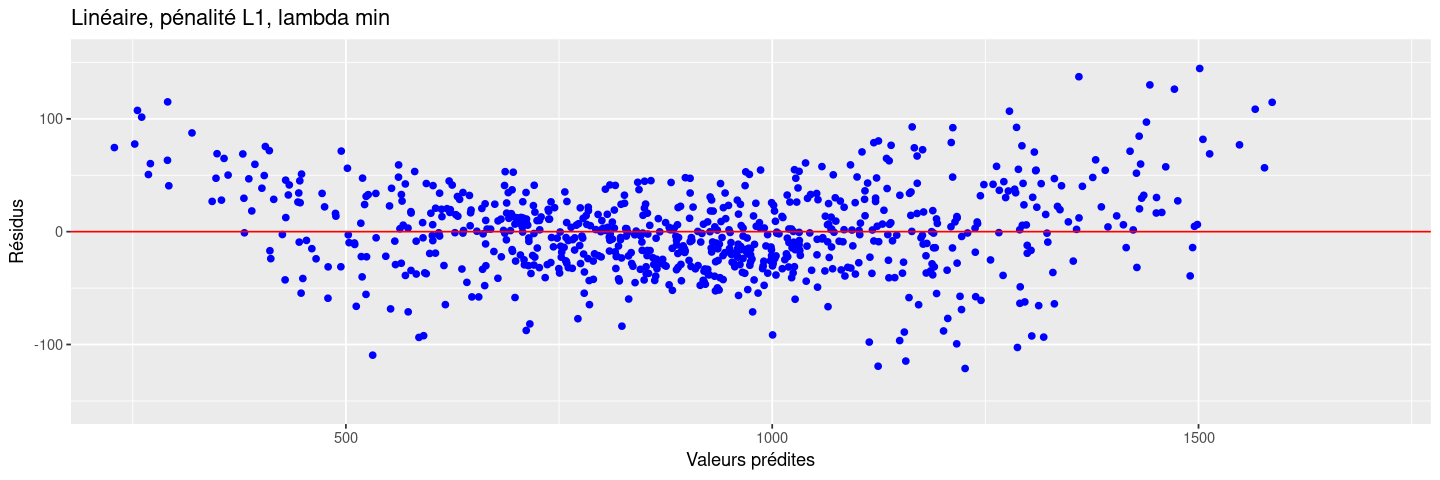

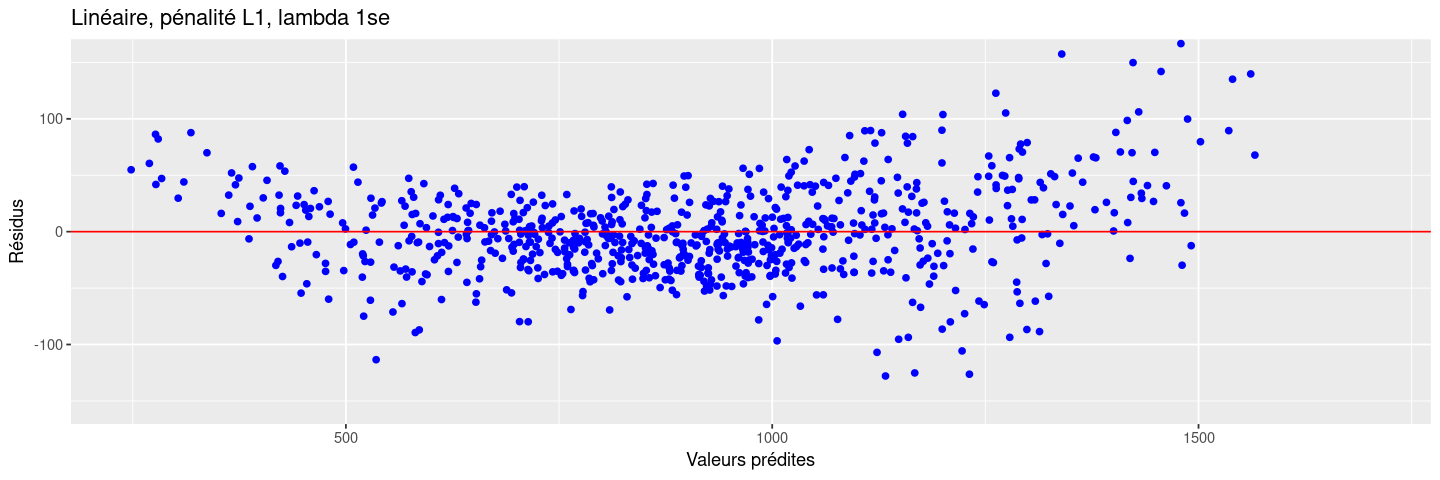

In [48]:
# Extraction des valeurs ajustées et des résidus

fit.lasso <- predict(reg.lasso.cv, s = "lambda.min", newx = x.mat)
res.lasso <- datappr$Calories_Burned - fit.lasso

fit.lasso.1se <- predict(reg.lasso.cv, s = "lambda.1se", newx = x.mat)
res.lasso.1se <- datappr$Calories_Burned - fit.lasso.1se 

# Graphe des résidus
options(repr.plot.width = 12, repr.plot.height = 4)
par(mfrow = c(1, 3))
gplot.res(fit.lm, res.lm, "Linéaire, sans sélection")
gplot.res(fit.lasso, res.lasso, "Linéaire, pénalité L1, lambda min")
gplot.res(fit.lasso.1se, res.lasso.1se, "Linéaire, pénalité L1, lambda 1se") 

Quelque soit le modèle linéaire, les résidus ne sont pas indépendants des valeurs prédites.
Regardons l'erreur de prévision par validation croisée.

In [49]:
V=10 ; nV=floor(nrow(datappr)/V)
S=sample(1:nrow(datappr),replace=FALSE)
error.CV = c()
for(v in 1:V)
{ # Rq : les deux dernières obs sont tjs dans l'échantillon d'apprentissage...
    datappr.learn=datappr[-c(S[(nV*(v-1)):(nV*v)]),] 
    datappr.valid=datappr[c(S[(nV*(v-1)):(nV*v)]),]
    error.CV=c(error.CV,mean((datappr.valid$Calories_Burned-predict(aov(Calories_Burned ~ ., data=datappr.learn),newdata=datappr.valid))^2))
}
mean(error.CV)

print(reg.lasso.cv)

[1] 1540.445


Call:  cv.glmnet(x = x.mat, y = datappr[, 8]) 

Measure: Mean-Squared Error 

    Lambda Index Measure     SE Nonzero
min  0.588    66    1486  86.63      13
1se  4.549    44    1568 109.76       7


On voit que le modele sans sélection de variable n'est pas intéressant car l'erreur est proche de celle avec LASSO et lambda lse (qui garde beaucoup moins de variables).
Par validation croisée, LASSO avec lamda min est le plus précis mais garde 13 variables contre 7 variables conservées par LASSO avec lambda lse.


### 2.2.3 Prévsion de l'échantillon test : Erreur de regréssion

In [50]:
# Préparations des données test 
x.mattest <- model.matrix(Calories_Burned ~ . - 1, data = datestr)

# Prédictions et MSE pour lambda.1se
pred.lasso.1se <- predict(reg.lasso.cv, newx = x.mattest, s = "lambda.1se")
mse.lasso.1se <- mean((pred.lasso.1se - datestr[, "Calories_Burned"])^2)
cat("Erreur quadratique moyenne (MSE) pour Lasso avec lambda.1se :", mse.lasso.1se, "\n")

# Prédictions et MSE pour lambda.min
pred.lasso.min <- predict(reg.lasso.cv, newx = x.mattest, s = "lambda.min")
mse.lasso.min <- mean((pred.lasso.min - datestr[, "Calories_Burned"])^2)
cat("Erreur quadratique moyenne (MSE) pour Lasso avec lambda.min :", mse.lasso.min, "\n")

# Prédictions et MSE pour le modèle sans sélection
pred.lm <- predict(reg.lm, newdata = datestr)
mse.lm <- mean((pred.lm - datestr[, "Calories_Burned"])^2)
cat("Erreur quadratique moyenne modèle linéaire sans sélection de variable :", mse.lm, "\n")

Erreur quadratique moyenne (MSE) pour Lasso avec lambda.1se : 2192.442 
Erreur quadratique moyenne (MSE) pour Lasso avec lambda.min : 1999.312 
Erreur quadratique moyenne modèle linéaire sans sélection de variable : 1993.801 


ON fait le modèle quadratique ?? c'est pas implémenté en python donc perso je pense pas, à voir

## 2.3 Support Vector Regression (SVR)


### 2.3.1 Régression sur l'échantillon d'apprentissage

In [51]:
library(e1071)

In [52]:
svm.reg0 = svm(Calories_Burned ~ ., data = datappr)
summary(svm.reg0)


Call:
svm(formula = Calories_Burned ~ ., data = datappr)


Parameters:
   SVM-Type:  eps-regression 
 SVM-Kernel:  radial 
       cost:  1 
      gamma:  0.05 
    epsilon:  0.1 


Number of Support Vectors:  325






Nous allons estimer les meilleurs paramètres pour le SVR avec noyau linéaire, radial et polynomial. Ensuite nous allons prédires les calories brulées puis observer les résidus.

In [53]:
set.seed(2025)
svm.reg.tune.rdl = tune.svm(Calories_Burned ~ ., data = datappr, kernel="radial", cost = c(0.5,1, 1.5, 2, 2.5, 3, 3.5,5,8,10), 
    gamma = seq(0.01, 0.1, by = 0.02))

svm.reg.tune.linear = tune.svm(Calories_Burned ~ ., data = datappr, kernel="linear", cost = c(0.5,1, 1.5, 2, 2.5, 3, 3.5,5,8,10), 
    gamma = seq(0.01, 0.1, by = 0.02))

svm.reg.tune.polynomial = tune.svm(Calories_Burned ~ ., data = datappr, kernel="polynomial", cost = c(0.5,1, 1.5, 2, 2.5, 3, 3.55,8,10), 
    gamma = seq(0.01, 0.1, by = 0.02))

In [54]:
svm.reg.rdl = svm(Calories_Burned ~ ., data = datappr, cost = svm.reg.tune.rdl$best.parameters$cost, 
    gamma = svm.reg.tune.rdl$best.parameters$gamma, kernel="radial")
summary(svm.reg.rdl)

svm.reg.linear = svm(Calories_Burned ~ ., data = datappr, cost = svm.reg.tune.linear$best.parameters$cost, 
    gamma = svm.reg.tune.linear$best.parameters$gamma, kernel="linear")
summary(svm.reg.linear)

svm.reg.poly = svm(Calories_Burned ~ ., data = datappr, cost = svm.reg.tune.polynomial$best.parameters$cost, 
    gamma = svm.reg.tune.polynomial$best.parameters$gamma, kernel="polynomial")
summary(svm.reg.poly)


Call:
svm(formula = Calories_Burned ~ ., data = datappr, cost = svm.reg.tune.rdl$best.parameters$cost, 
    gamma = svm.reg.tune.rdl$best.parameters$gamma, kernel = "radial")


Parameters:
   SVM-Type:  eps-regression 
 SVM-Kernel:  radial 
       cost:  10 
      gamma:  0.01 
    epsilon:  0.1 


Number of Support Vectors:  244







Call:
svm(formula = Calories_Burned ~ ., data = datappr, cost = svm.reg.tune.linear$best.parameters$cost, 
    gamma = svm.reg.tune.linear$best.parameters$gamma, kernel = "linear")


Parameters:
   SVM-Type:  eps-regression 
 SVM-Kernel:  linear 
       cost:  0.5 
      gamma:  0.01 
    epsilon:  0.1 


Number of Support Vectors:  348







Call:
svm(formula = Calories_Burned ~ ., data = datappr, cost = svm.reg.tune.polynomial$best.parameters$cost, 
    gamma = svm.reg.tune.polynomial$best.parameters$gamma, kernel = "polynomial")


Parameters:
   SVM-Type:  eps-regression 
 SVM-Kernel:  polynomial 
       cost:  3 
     degree:  3 
      gamma:  0.09 
     coef.0:  0 
    epsilon:  0.1 


Number of Support Vectors:  491






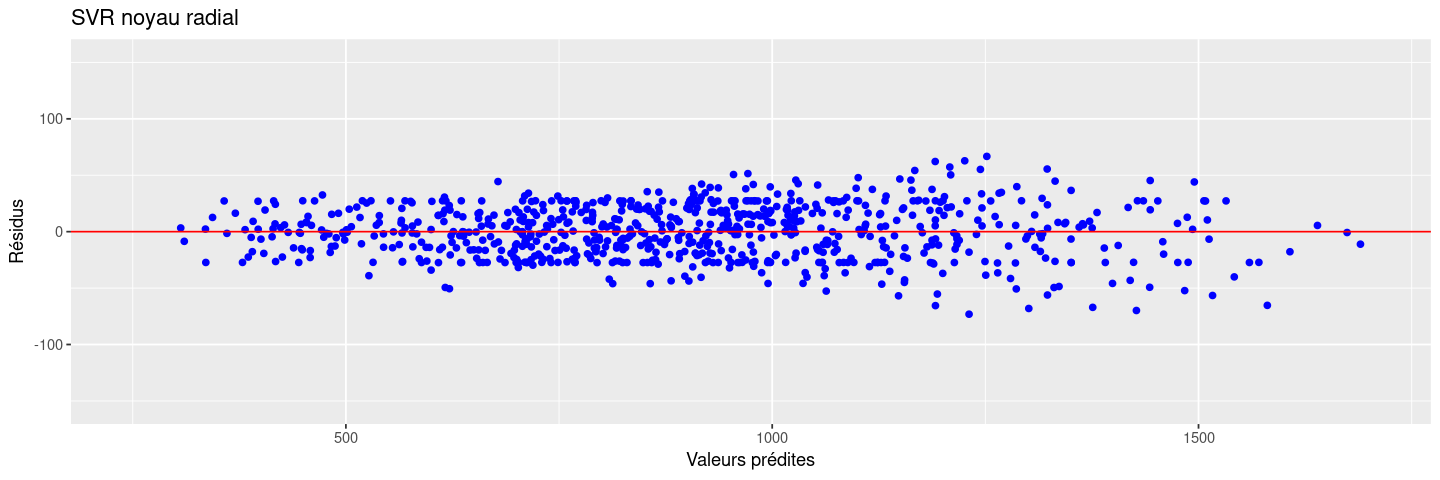

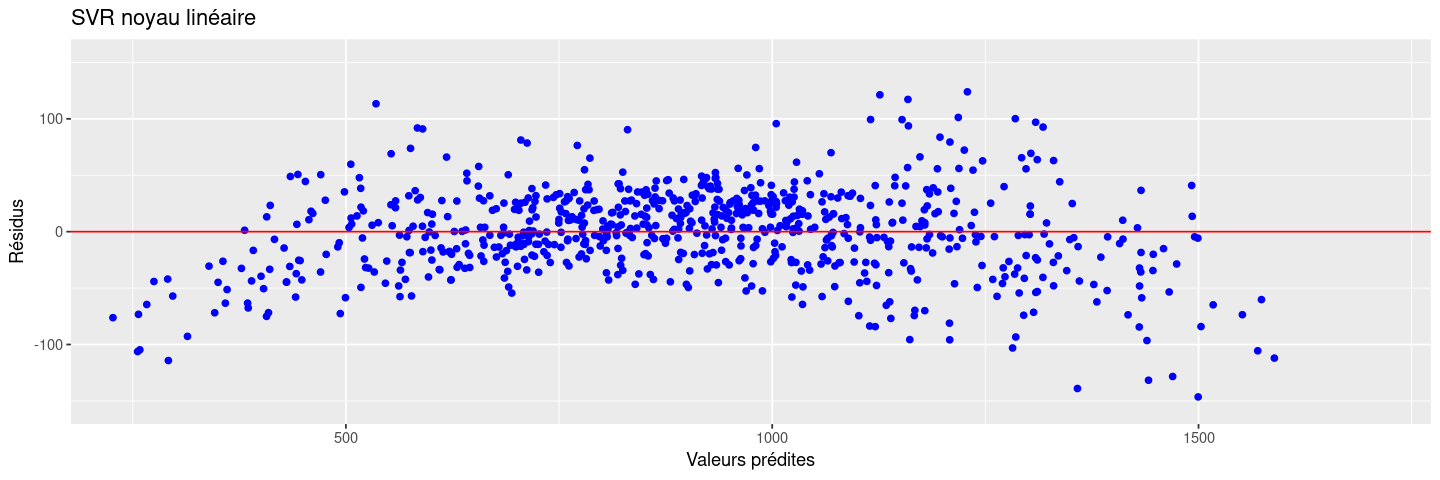

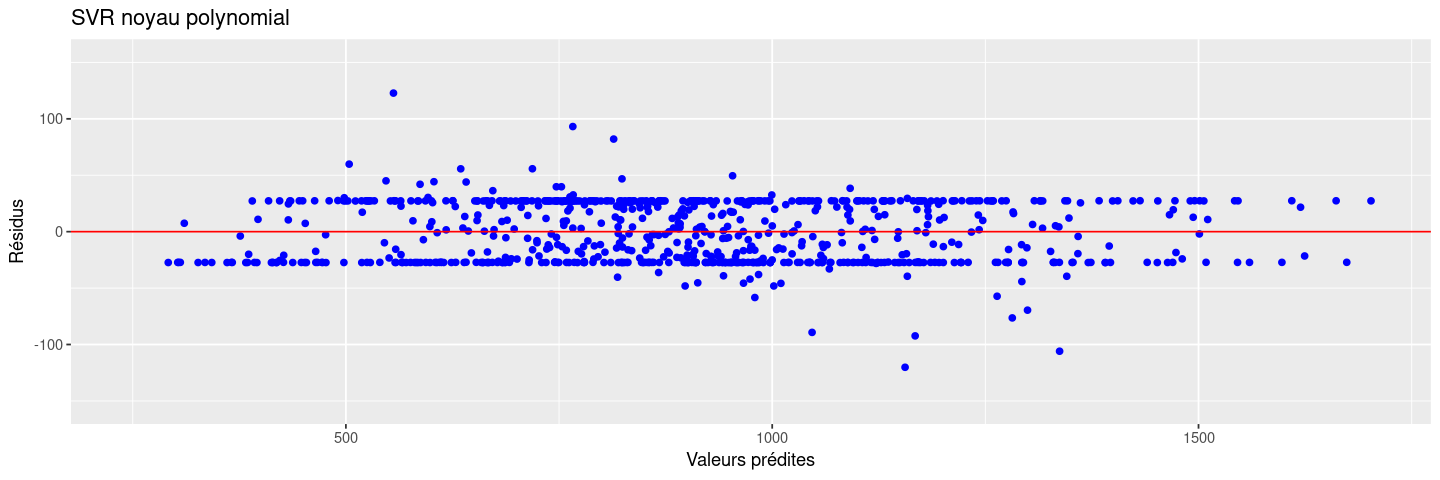

In [55]:
# calcul et graphe des résidus
fit.svmr.rdl=svm.reg.rdl$fitted
res.svmr.rdl=fit.svmr.rdl-datappr[,"Calories_Burned"]
gplot.res(fit.svmr.rdl,res.svmr.rdl,titre="SVR noyau radial")

fit.svmr.linear=svm.reg.linear$fitted
res.svmr.linear=fit.svmr.linear-datappr[,"Calories_Burned"]
gplot.res(fit.svmr.linear,res.svmr.linear,titre="SVR noyau linéaire")

fit.svmr.polynomial=svm.reg.poly$fitted
res.svmr.polynomial=fit.svmr.polynomial-datappr[,"Calories_Burned"]
gplot.res(fit.svmr.polynomial,res.svmr.polynomial,titre="SVR noyau polynomial")

Les résidus des SVR avec noyau linéaire et noyau polynomial ne sont pas indépendants. On observe pour le premier une "parabole" et pour le second un effet couloir. Nous choisissons donc de continuer avec le noyau gaussien, RBF (radial).

### 2.3.2 Erreur de regression sur l'échantillon test

Regardons l'erreur de regression sur l'échantillon test.

In [56]:
pred.svmr.rdl=predict(svm.reg.rdl,newdata=datestr)
# Erreur quadratique moyenne de prévision
erreur_SVR =sum((pred.svmr.rdl-datestr[,"Calories_Burned"])^2)/nrow(datestr)
cat("Erreur quadratique moyenne pour un SVR avec noyau radial :",erreur_SVR , "\n")

Erreur quadratique moyenne pour un SVR avec noyau radial : 854.51 


Le modèle SVR avec un noyau radial est bien plus performant que les modèles linéaires. En effet, l'erreur de prevision est d'environ 900 pour le SVR alors qu'elle est autour de 2000 pour les modèles linéaires. Ainsi, SVR est plus précis.

## 2.4 Arbre optimal

### 2.4.1 Estimation et élagage de l'arbre de régression

In [57]:
library(rpart) 
library(rpart.plot)
options(repr.plot.width = 15, repr.plot.height = 10)
library(partykit)

Le chargement a nécessité le package : libcoin

Le chargement a nécessité le package : mvtnorm



##### Recherche du cp optimal

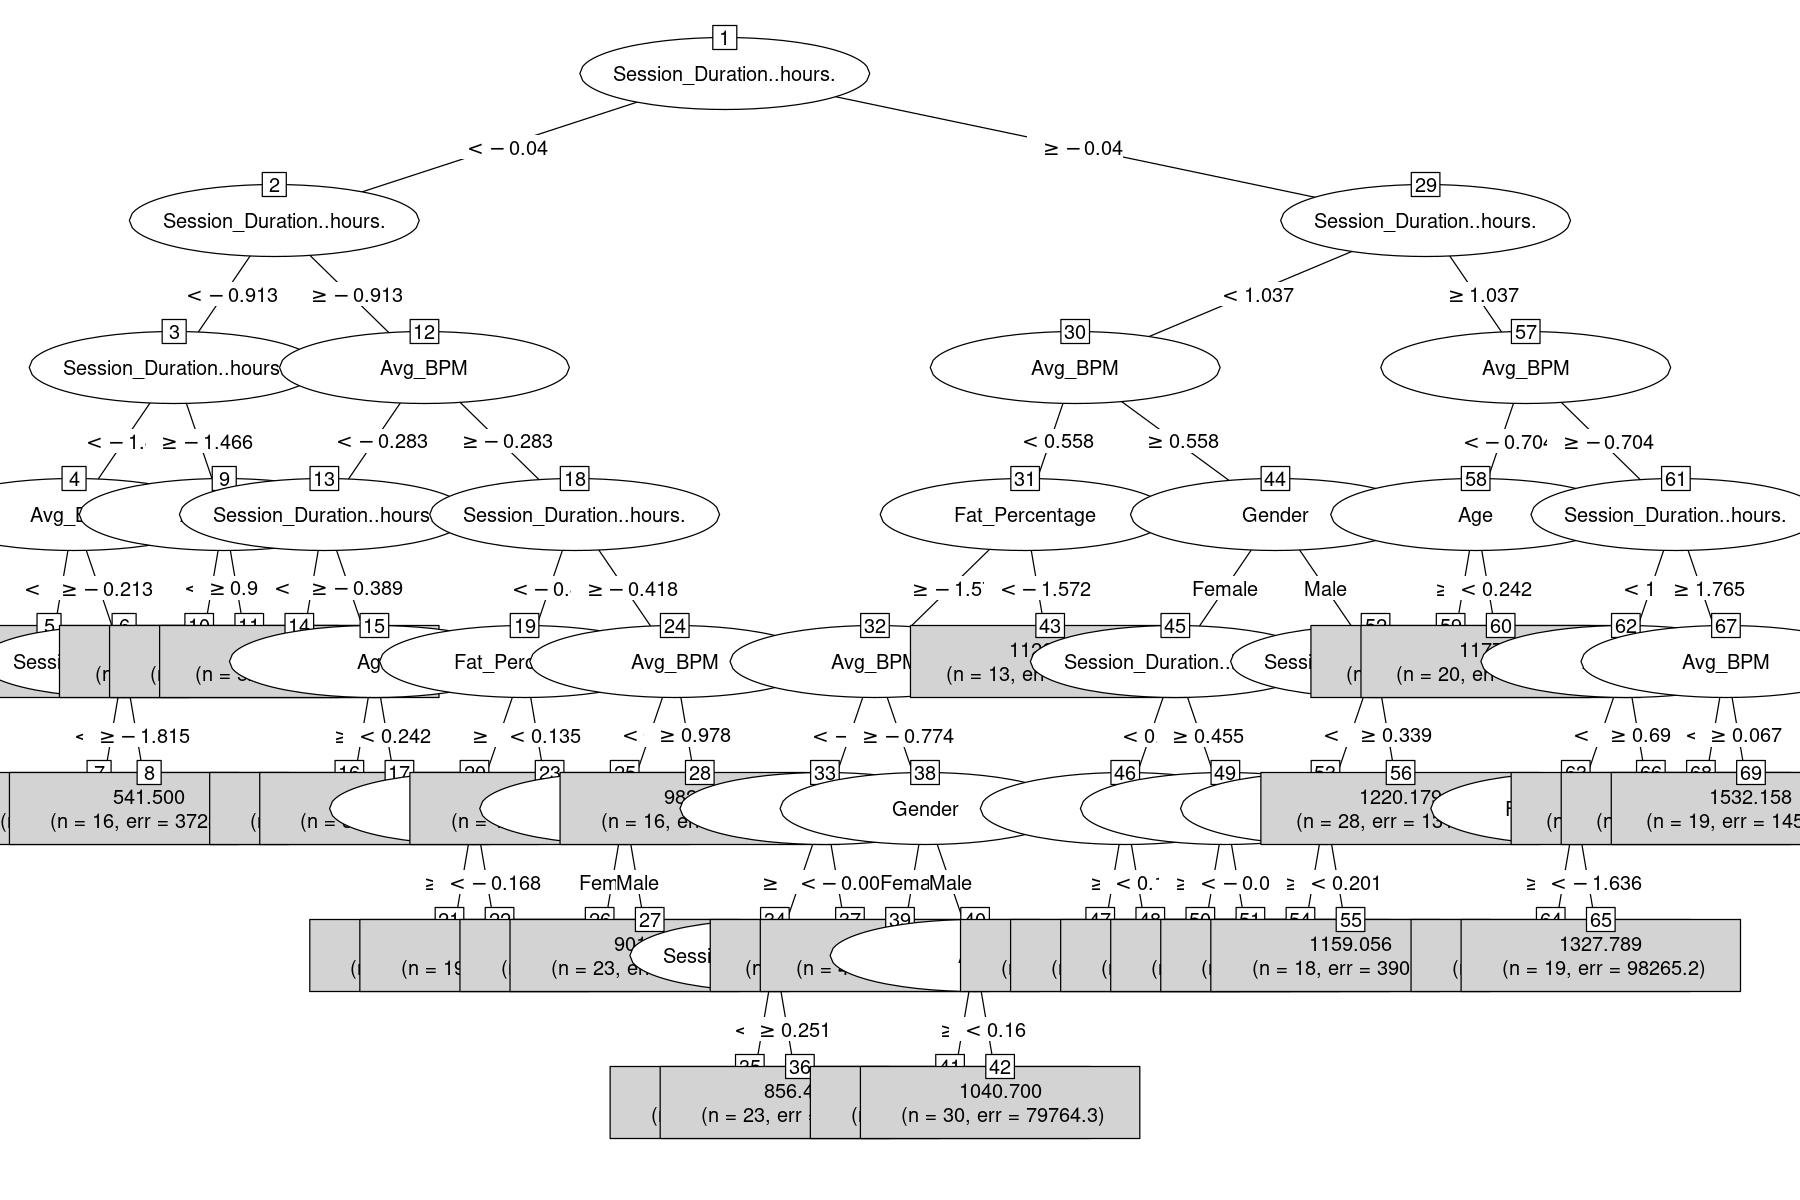

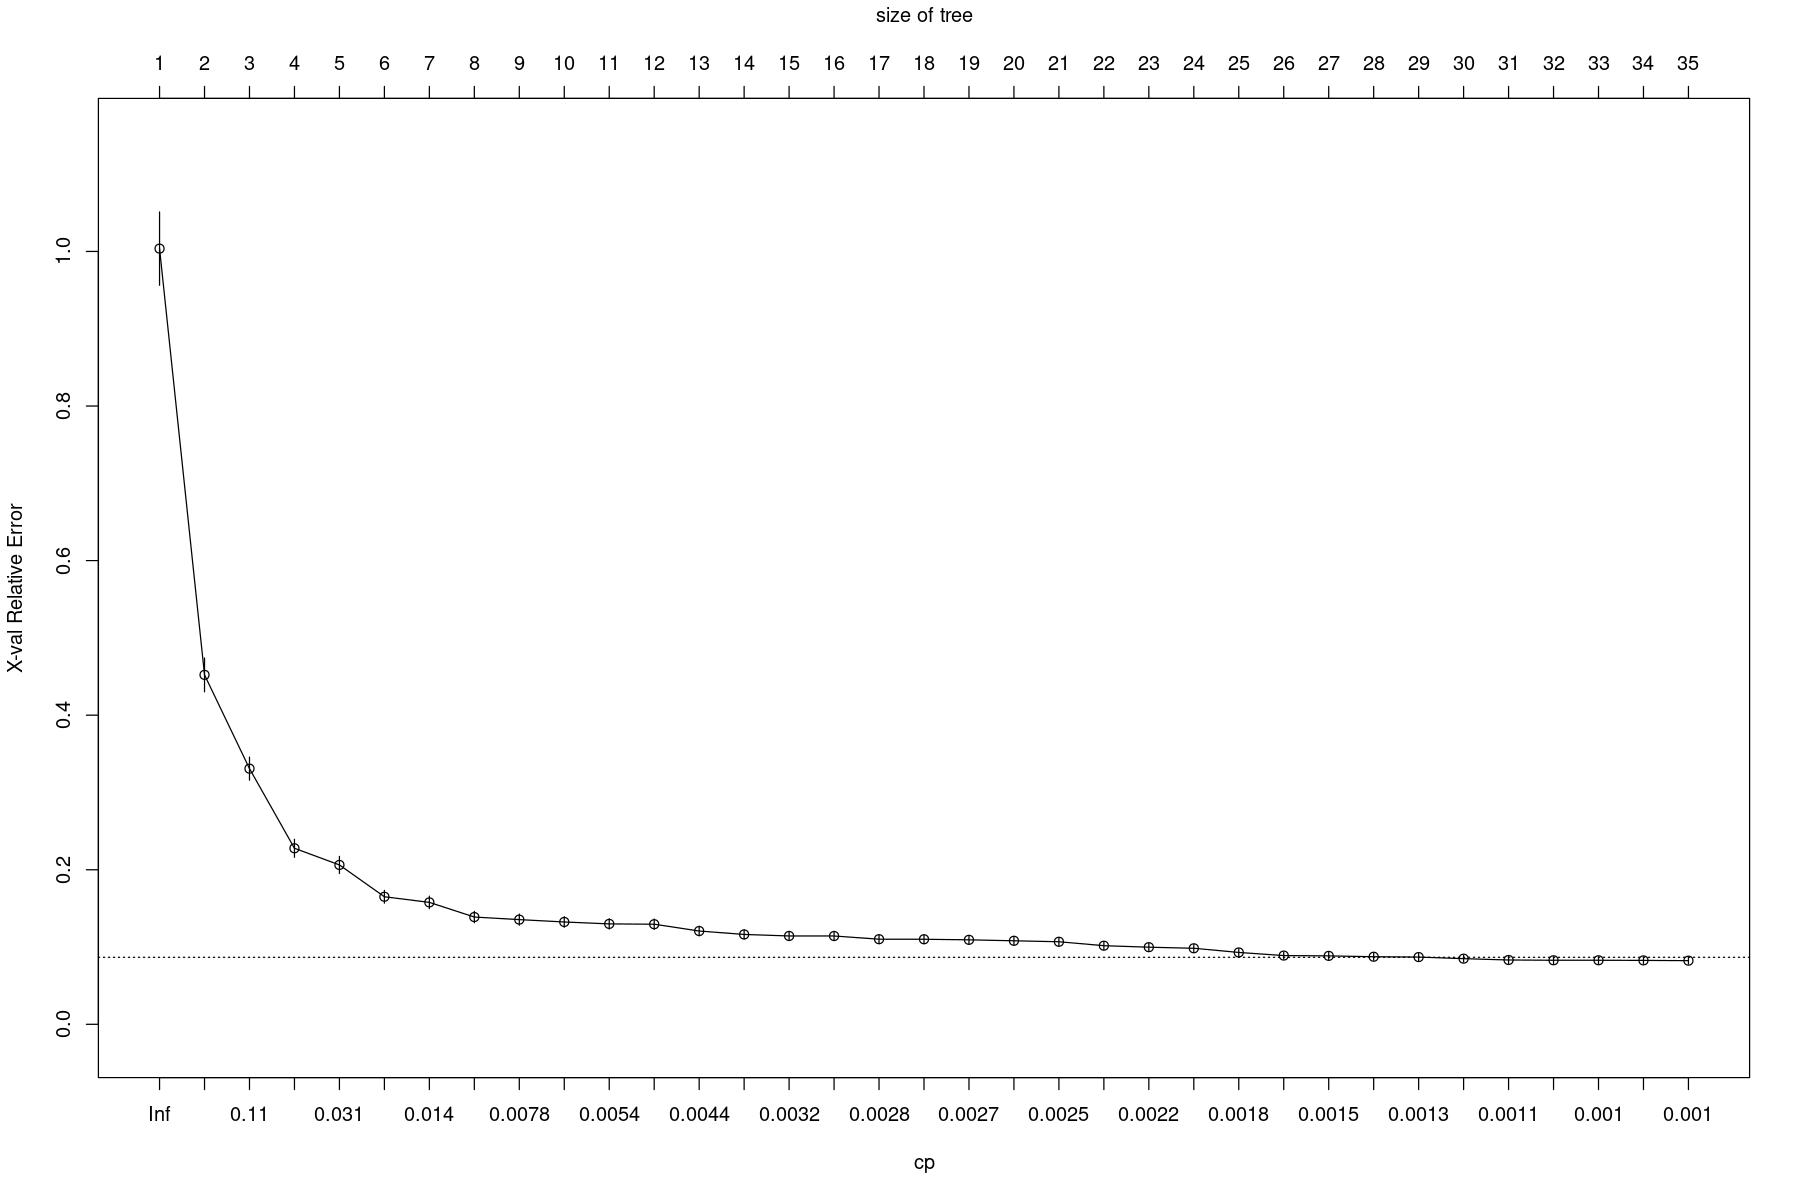

In [58]:
tree.reg=rpart(Calories_Burned~.,data=datappr,control=rpart.control(cp=0.001)) #Création de l’arbre de régression avec un cp très petit 
plot(as.party(tree.reg), type="simple")
#identifier le cp optimal via validation croisée
xmat<-xpred.rpart(tree.reg,xval=10) 

# Cross-validation error par valeur de CP
CVerr<-apply((xmat-datappr[,"Calories_Burned"])^2,2,sum)

plotcp(tree.reg)

Sur le graphe on voit que la valeur de cp optimale est la valeur la plus basse.

##### Arbre Optimal

[1] 0.001026434

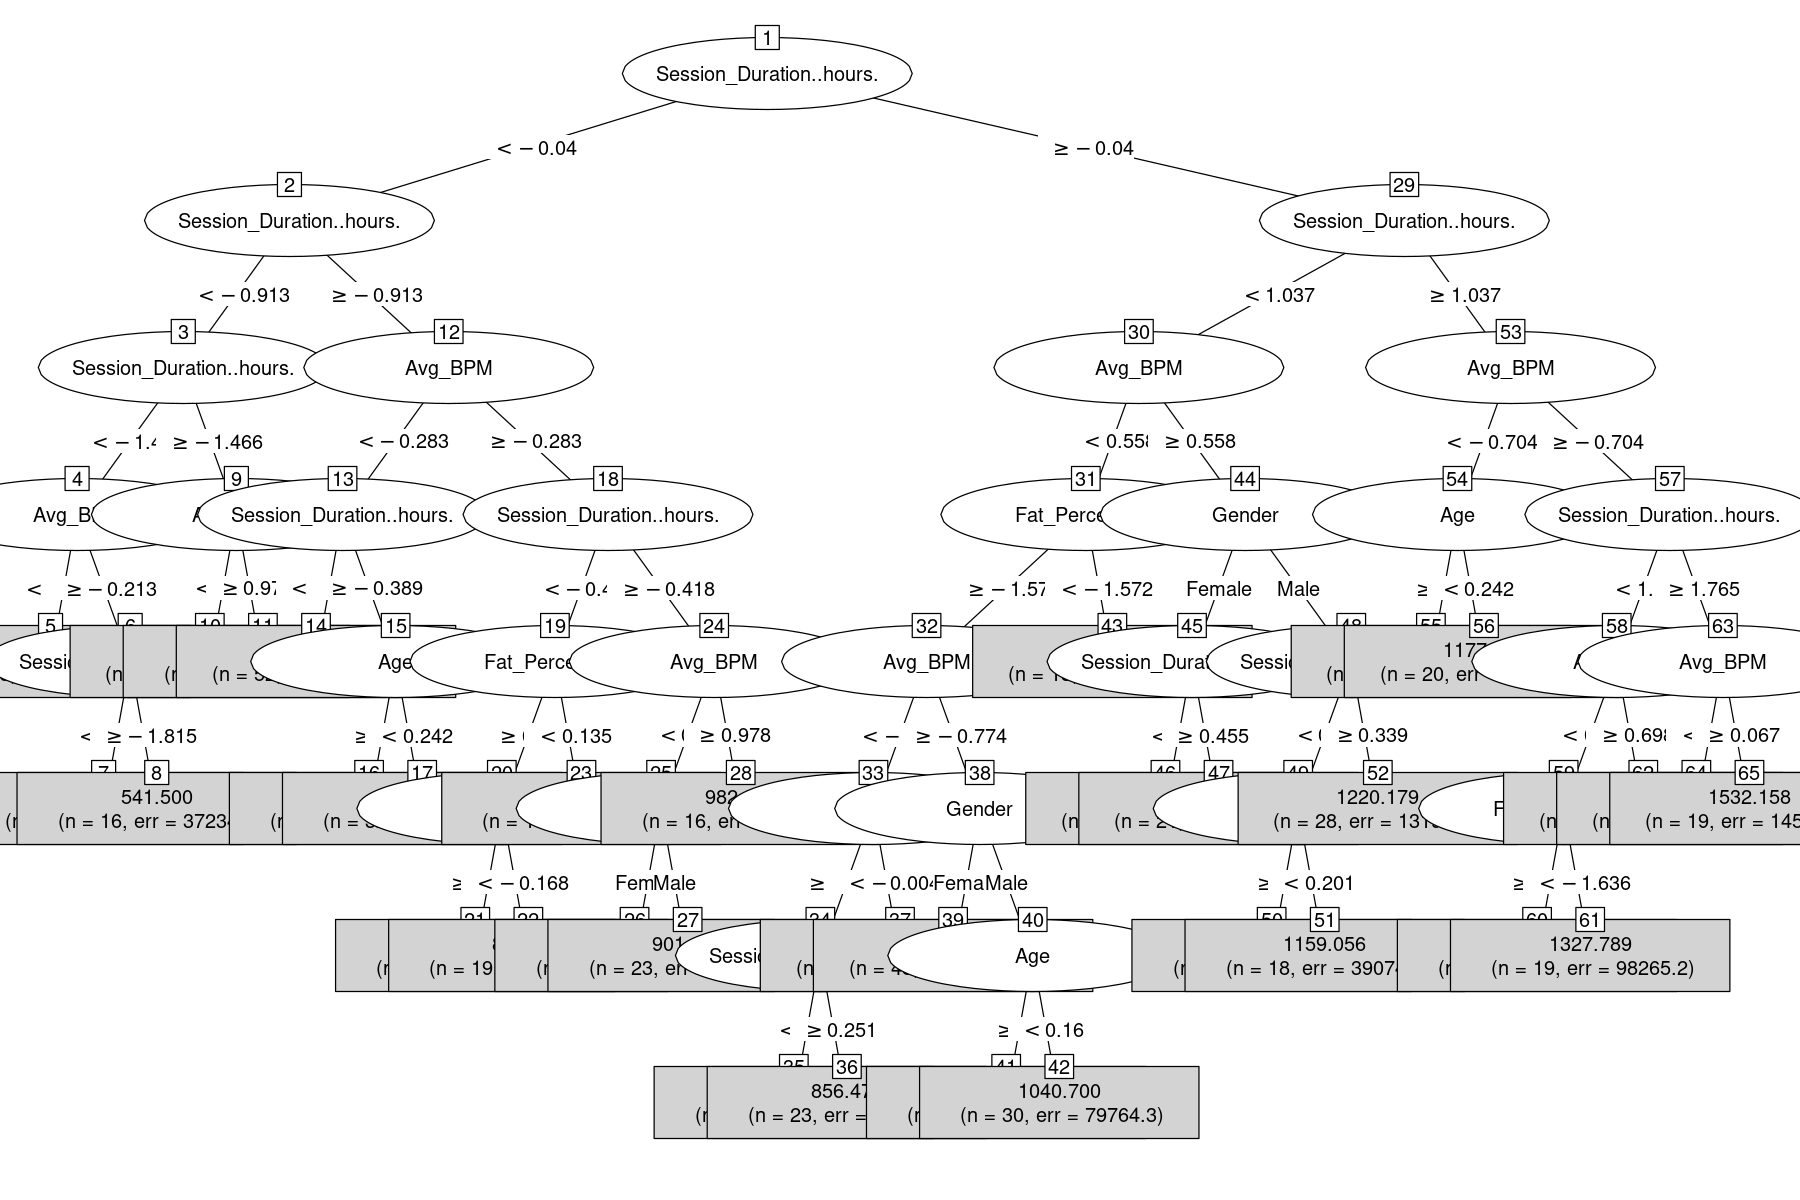

In [59]:
as.numeric(attributes(which.min(CVerr))$names)
tree.reg=rpart(Calories_Burned~.,data=datappr,control=rpart.control(cp=as.numeric(attributes(which.min(CVerr))$names)))
plot(as.party(tree.reg), type="simple")

Cet arbre montre clairement que la durée de la session est la variable qui contribue le plus au nombre de calories brulées ce qui correspond bien aux analyses faites dans la partie 1.

##### Graphe des résidus

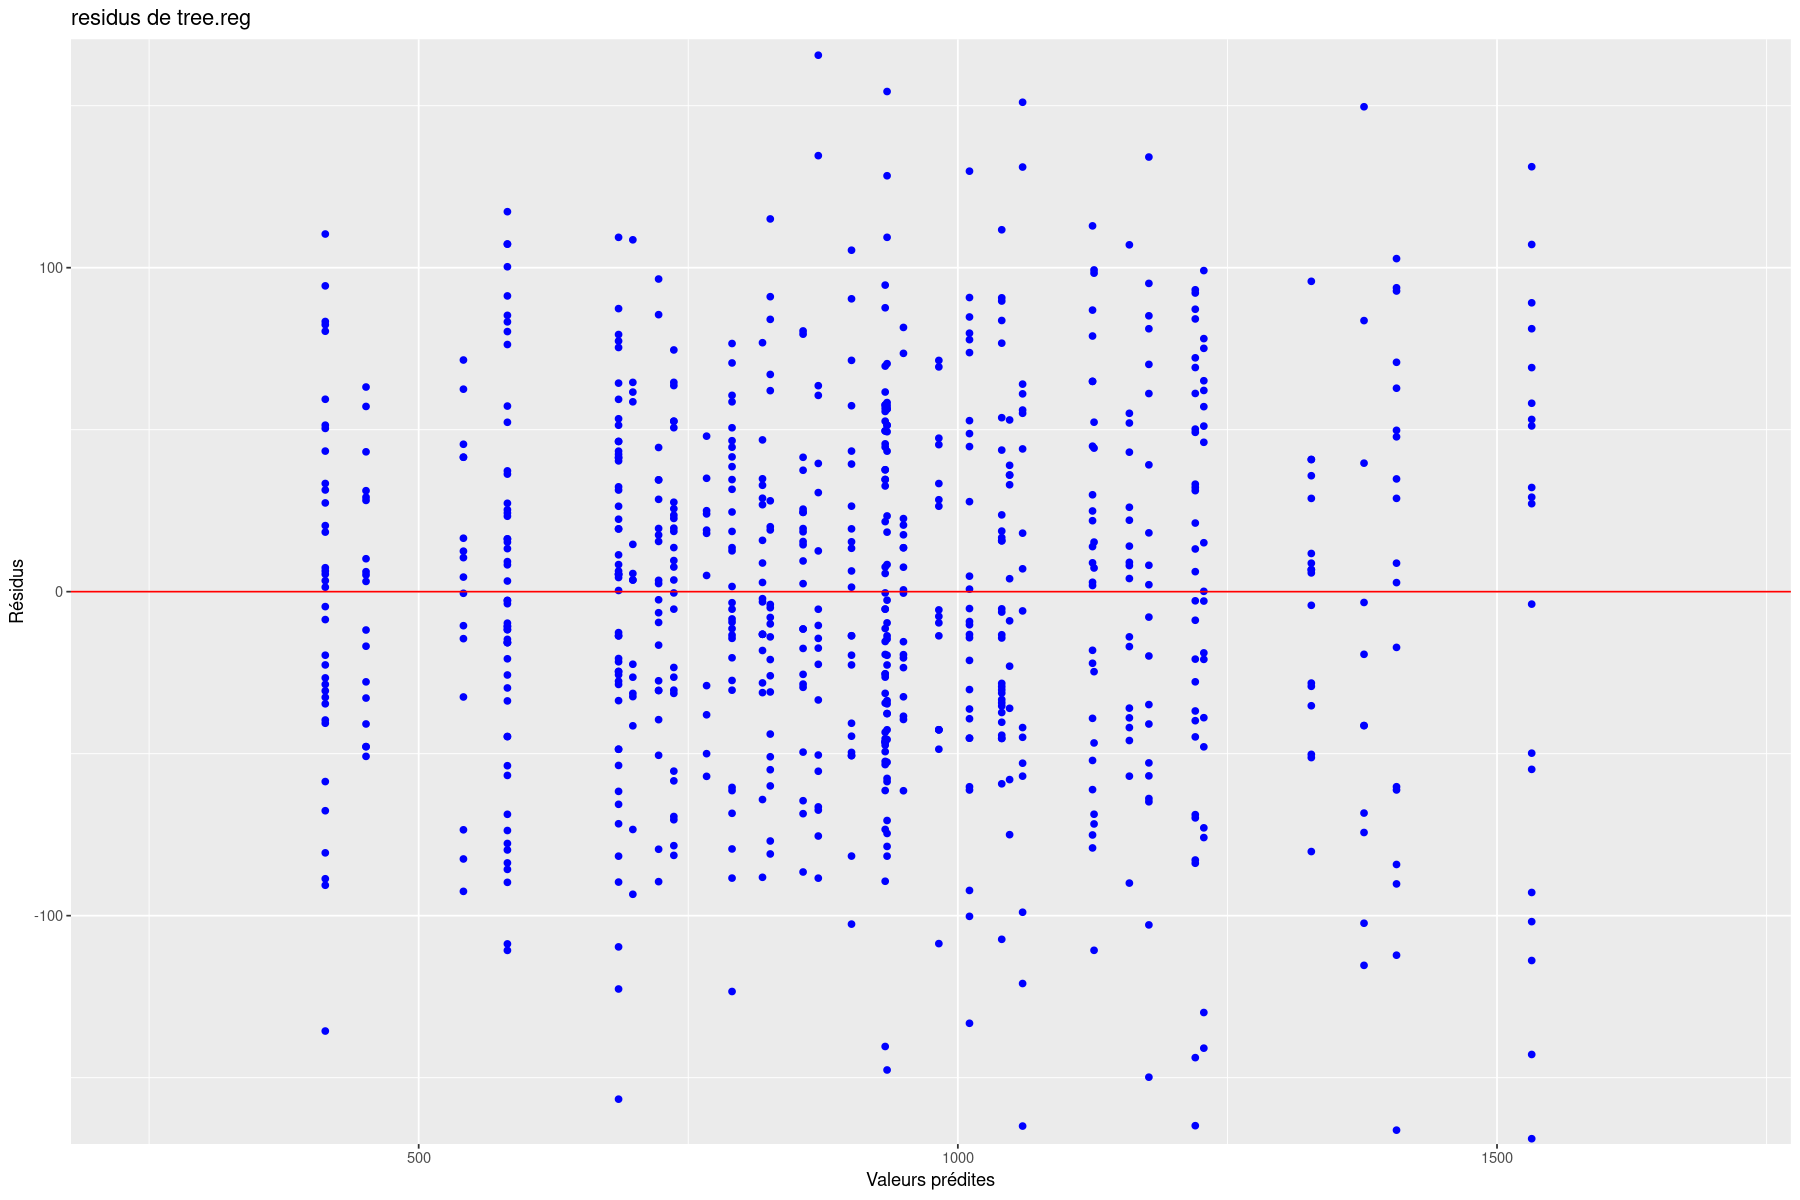

In [60]:
fit.tree=predict(tree.reg)
res.tree=fit.tree-datappr[,"Calories_Burned"]
gplot.res(fit.tree,res.tree,"residus de tree.reg")

### 2.4.2 Erreur de régression

In [61]:
# Calcul des prévisions
pred.treer=predict(tree.reg,newdata=datestr)
# Erreur quadratique moyenne de prévision en régression
erreur_arbreoptimal=sum((pred.treer-datestr[,"Calories_Burned"])^2)/nrow(datestr)
cat("Erreur quadratique moyenne Arbre optimal :",erreur_arbreoptimal , "\n")

Erreur quadratique moyenne Arbre optimal : 6600.937 


Avec une erreur de prévision sur l'échantillon test de 6325, l'arbre optimal est moins précis que le SVR et les modèles linéaires.

## 2.5 Forêt aléatoire

In [62]:
library(randomForest)
library(caret)
library(e1071)

randomForest 4.7-1.2

Type rfNews() to see new features/changes/bug fixes.


Attachement du package : ‘randomForest’


L'objet suivant est masqué depuis ‘package:gridExtra’:

    combine


L'objet suivant est masqué depuis ‘package:dplyr’:

    combine


L'objet suivant est masqué depuis ‘package:ggplot2’:

    margin




### 2.5.1 Regression

In [63]:
rf.reg=randomForest(Calories_Burned~., data=datappr,xtest=datestr[,-8],ytest=datestr[,"Calories_Burned"],
   ntree=600,do.trace=50,importance=TRUE)

     |      Out-of-bag   |       Test set    |
Tree |      MSE  %Var(y) |      MSE  %Var(y) |
  50 |     4999     6.73 |     5093     6.89 |
 100 |     4564     6.14 |     4978     6.73 |
 150 |     4311     5.80 |     4862     6.58 |
 200 |     4158     5.59 |     4776     6.46 |
 250 |     4088     5.50 |     4746     6.42 |
 300 |     3990     5.37 |     4739     6.41 |
 350 |     3967     5.34 |     4731     6.40 |
 400 |     3939     5.30 |     4700     6.36 |
 450 |     3918     5.27 |     4724     6.39 |
 500 |     3916     5.27 |     4731     6.40 |
 550 |     3933     5.29 |     4805     6.50 |
 600 |     3936     5.30 |     4820     6.52 |


Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


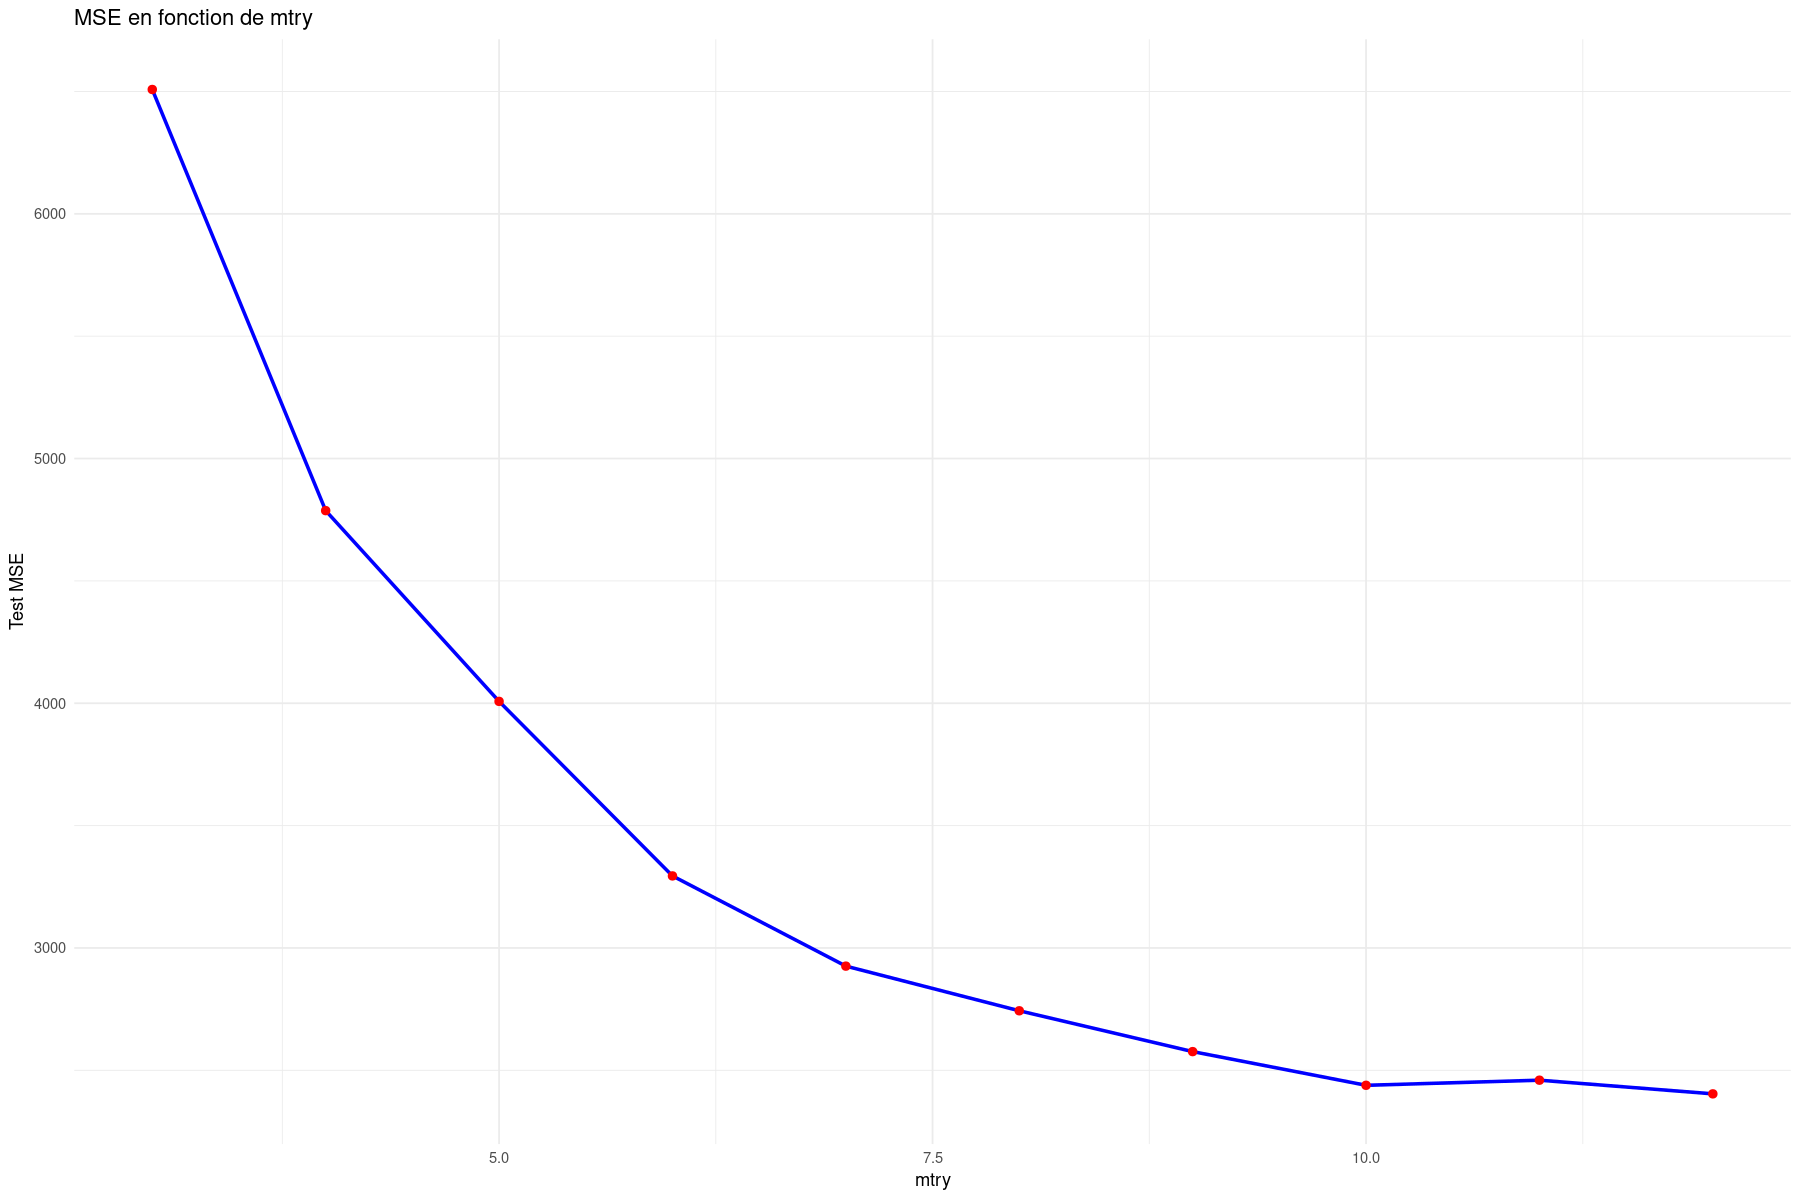

In [64]:
mtry_vals <- 3:12
test_mse <- numeric(length(mtry_vals))

for (i in seq_along(mtry_vals)) {
  set.seed(123)
  rf <- randomForest(Calories_Burned ~ ., data = datappr,
                     xtest = datestr[, -8],
                     ytest = datestr[, "Calories_Burned"],
                     mtry = mtry_vals[i],
                     ntree = 500)

  test_mse[i] <- rf$test$mse[500]  # Erreur après 500 arbres
}
# Mettre les résultats dans un data frame
df_mse <- data.frame(
  mtry = mtry_vals,
  MSE = test_mse
)

# Tracer avec ggplot2
ggplot(df_mse, aes(x = mtry, y = MSE)) +
  geom_line(color = "blue", size = 1) +
  geom_point(color = "red", size = 2) +
  ggtitle("MSE en fonction de mtry") +
  xlab("mtry") +
  ylab("Test MSE") +
  theme_minimal()


Le mrty optimal est 10.

Le code au dessus ne faitpas de validation croisée.

Déterminons le mtry optimal par validation croisée.

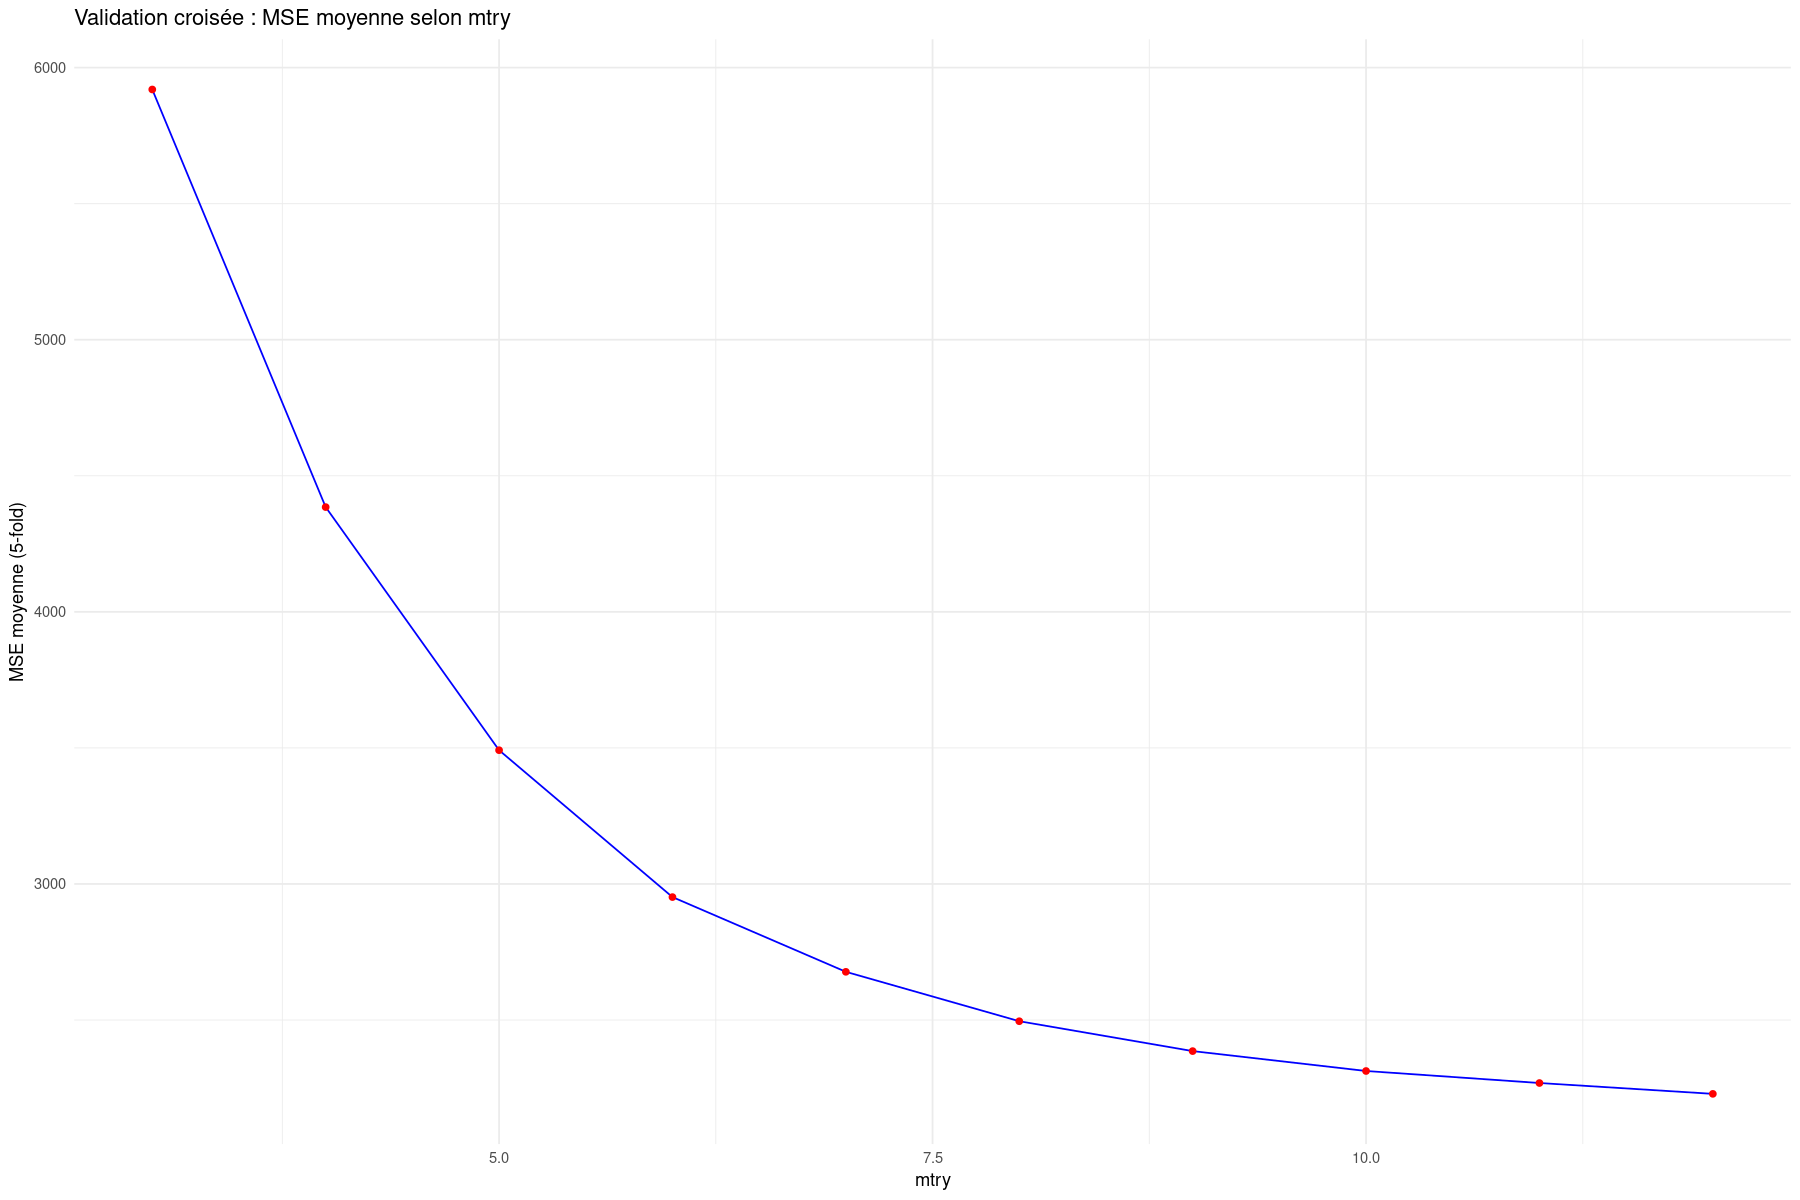

In [65]:

set.seed(123)

# Paramètres
k <- 5
mtry_vals <- 3:12
folds <- sample(rep(1:k, length.out = nrow(datappr)))
cv_mse <- numeric(length(mtry_vals))

# Boucle sur les valeurs de mtry
for (j in seq_along(mtry_vals)) {
  mse_folds <- numeric(k)
  
  for (i in 1:k) {
    # Séparer les données : test = fold i, train = tous les autres
    test_idx <- which(folds == i)
    train_data <- datappr[-test_idx, ]
    test_data  <- datappr[test_idx, ]
    
    # Entraîner le modèle
    rf <- randomForest(Calories_Burned ~ ., data = train_data,
                       mtry = mtry_vals[j], ntree = 500)
    
    # Prédire sur le fold de test
    preds <- predict(rf, newdata = test_data)
    
    # Calculer la MSE pour ce fold
    mse_folds[i] <- mean((test_data$Calories_Burned - preds)^2)
  }
  
  # Moyenne des MSE sur les folds
  cv_mse[j] <- mean(mse_folds)
}

# Résultats sous forme de data frame
df_cv <- data.frame(
  mtry = mtry_vals,
  MSE = cv_mse
)

# Tracer la courbe
library(ggplot2)
ggplot(df_cv, aes(x = mtry, y = MSE)) +
  geom_line(color = "blue") +
  geom_point(color = "red") +
  ggtitle("Validation croisée : MSE moyenne selon mtry") +
  xlab("mtry") +
  ylab("MSE moyenne (5-fold)") +
  theme_minimal()


In [66]:
#modèle optimal
rf.reg=randomForest(Calories_Burned~., data=datappr,xtest=datestr[,-8],ytest=datestr[,"Calories_Burned"],
   ntree=600,do.trace=50,mtry=10,importance=TRUE)

     |      Out-of-bag   |       Test set    |
Tree |      MSE  %Var(y) |      MSE  %Var(y) |
  50 |     2358     3.17 |     2764     3.74 |
 100 |     2226     2.99 |     2569     3.48 |
 150 |     2106     2.83 |     2545     3.44 |
 200 |     2080     2.80 |     2493     3.37 |
 250 |     2078     2.80 |     2490     3.37 |
 300 |     2058     2.77 |     2502     3.38 |
 350 |     2056     2.77 |     2467     3.34 |
 400 |     2042     2.75 |     2462     3.33 |
 450 |     2042     2.75 |     2466     3.34 |
 500 |     2053     2.76 |     2459     3.33 |
 550 |     2047     2.75 |     2472     3.34 |
 600 |     2044     2.75 |     2472     3.34 |


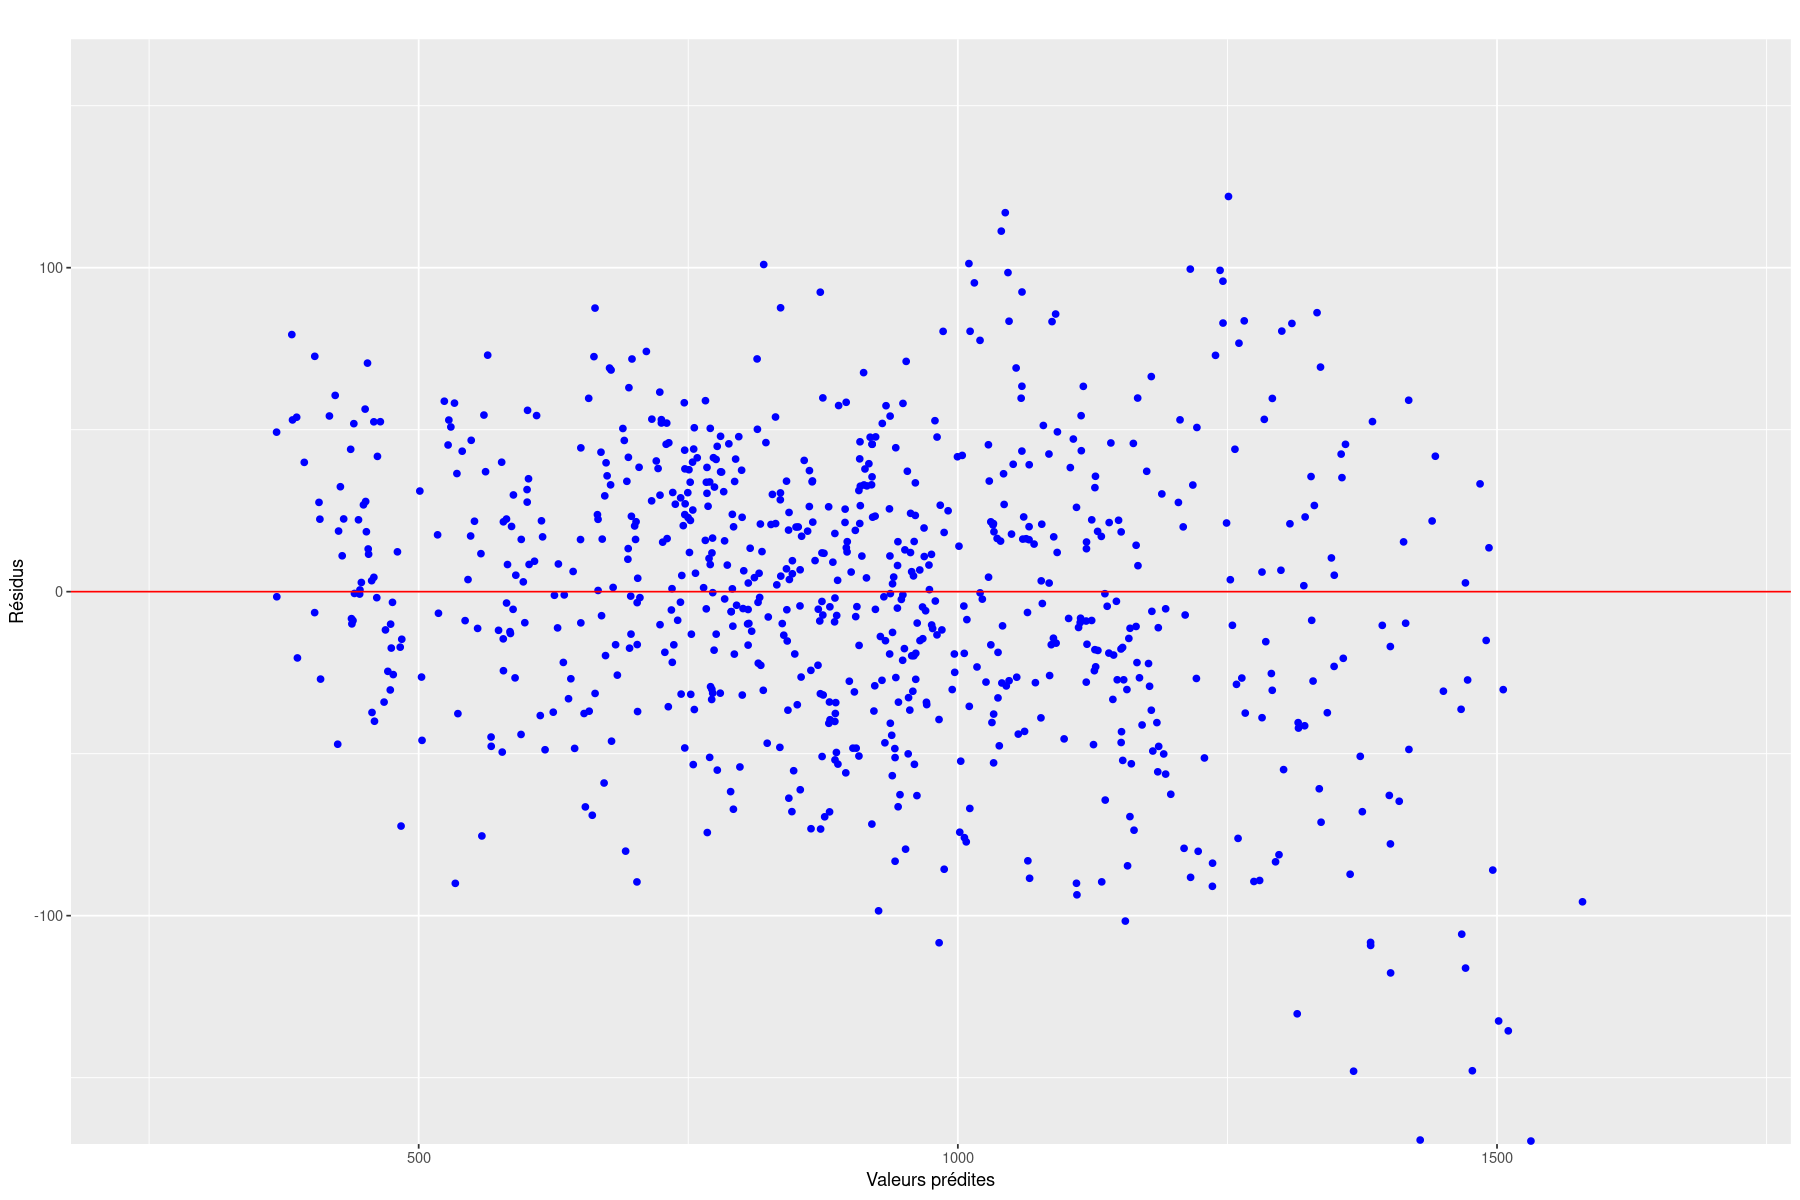

In [67]:
fit.rfr=rf.reg$predicted
res.rfr=fit.rfr-datappr[,"Calories_Burned"]
gplot.res(fit.rfr,res.rfr,titre="")

### 2.5.2 Prévision de l'échantillon test

In [68]:
# Forêts aléatoires
pred.rfr=rf.reg$test$predicted
# Erreur quadratique moyenne de prévision
erreur_randomforest=sum((pred.rfr-datestr[,"Calories_Burned"])^2)/nrow(datestr)
cat("Erreur quadratique moyenne Foret aléatoire :" ,erreur_randomforest)

Erreur quadratique moyenne Foret aléatoire : 2471.897

Ainsi les forêts aléatoires proposent un meilleur résultat que l'arbre optimal avec une MSE à 2508. C’est une amélioration logique, car les forêts aléatoires réduisent la variance du modèle grâce à l’agrégation de plusieurs arbres construits sur des sous-échantillons, ce qui améliore la précision par rapport à un arbre unique.

#### 2.5.3 Importance des variables

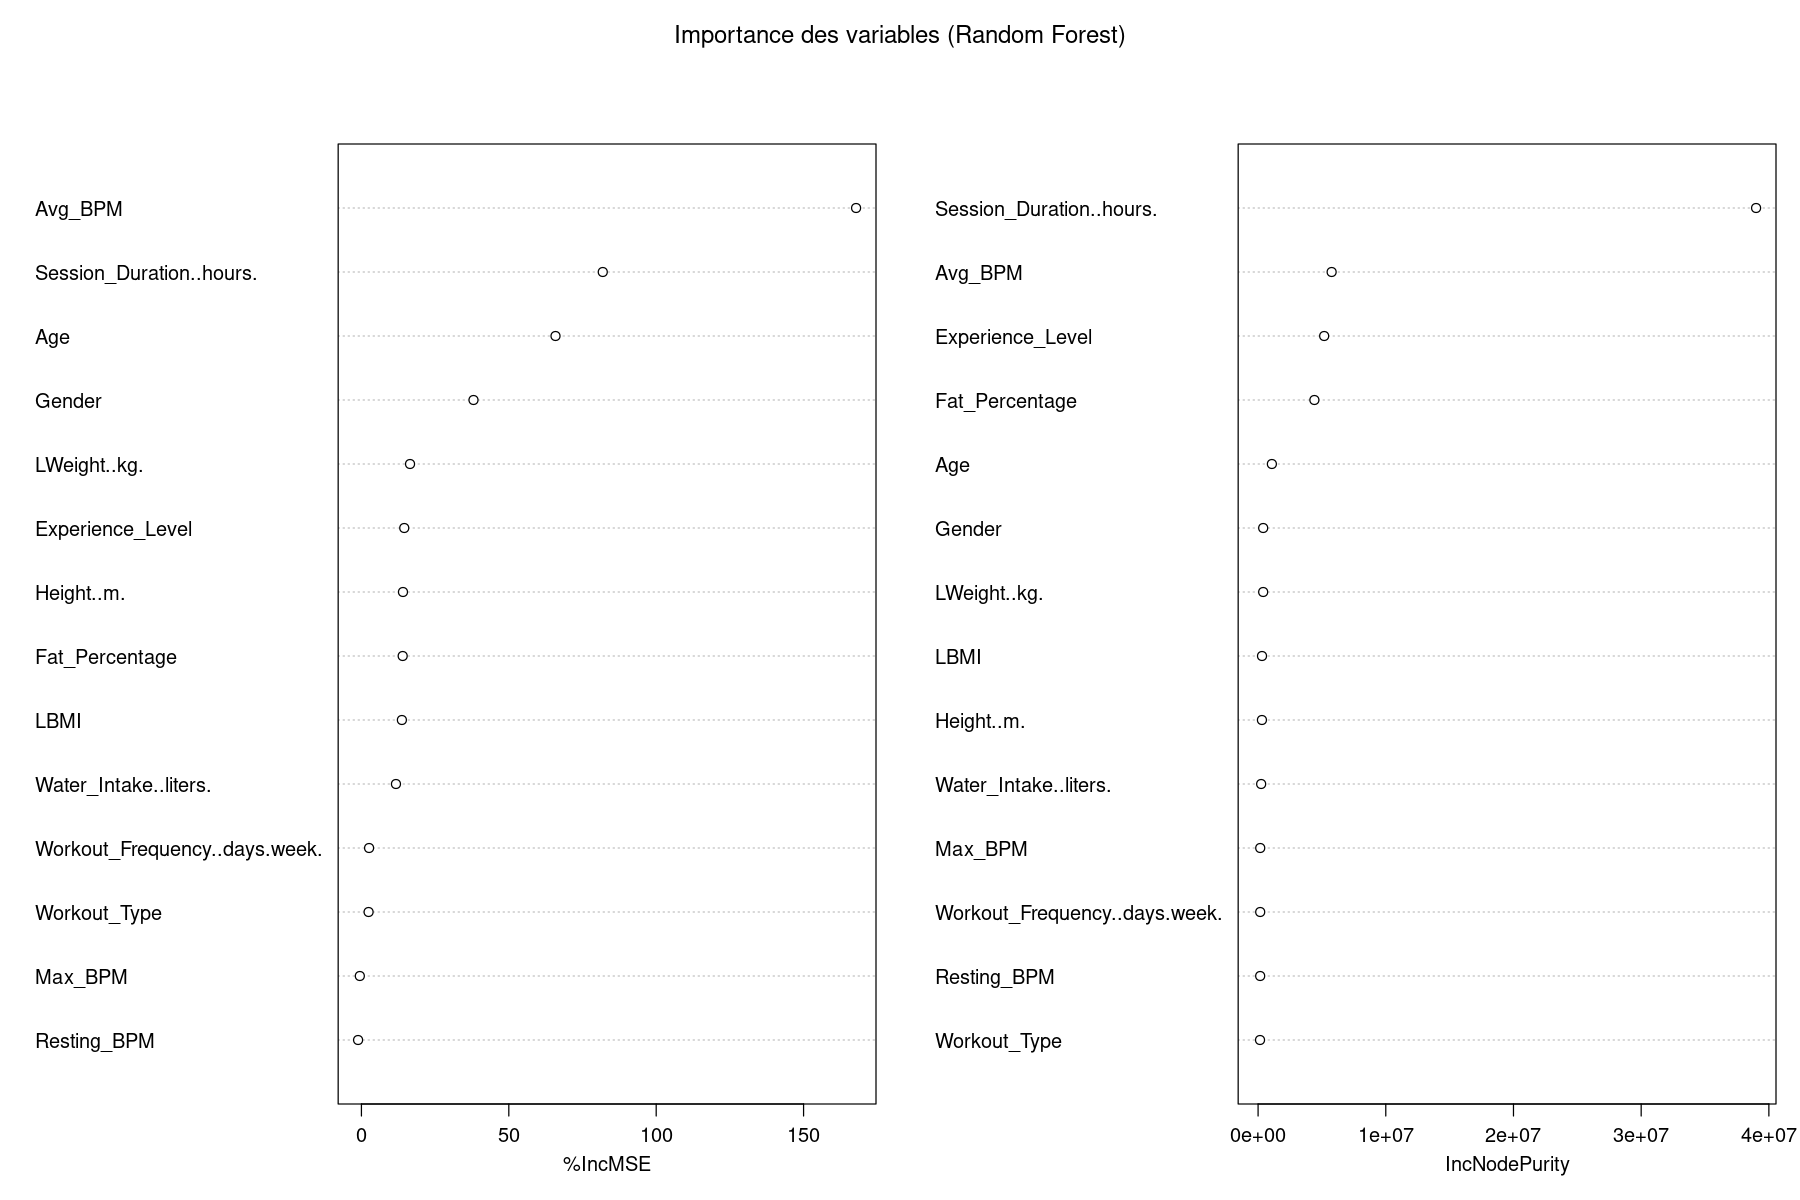

In [69]:
varImpPlot(rf.reg, main = "Importance des variables (Random Forest)")

Commenter l'importance des variables .


## 2.6 Boosting

### 2.6.1 Régression

Loaded gbm 2.2.2

This version of gbm is no longer under development. Consider transitioning to gbm3, https://github.com/gbm-developers/gbm3



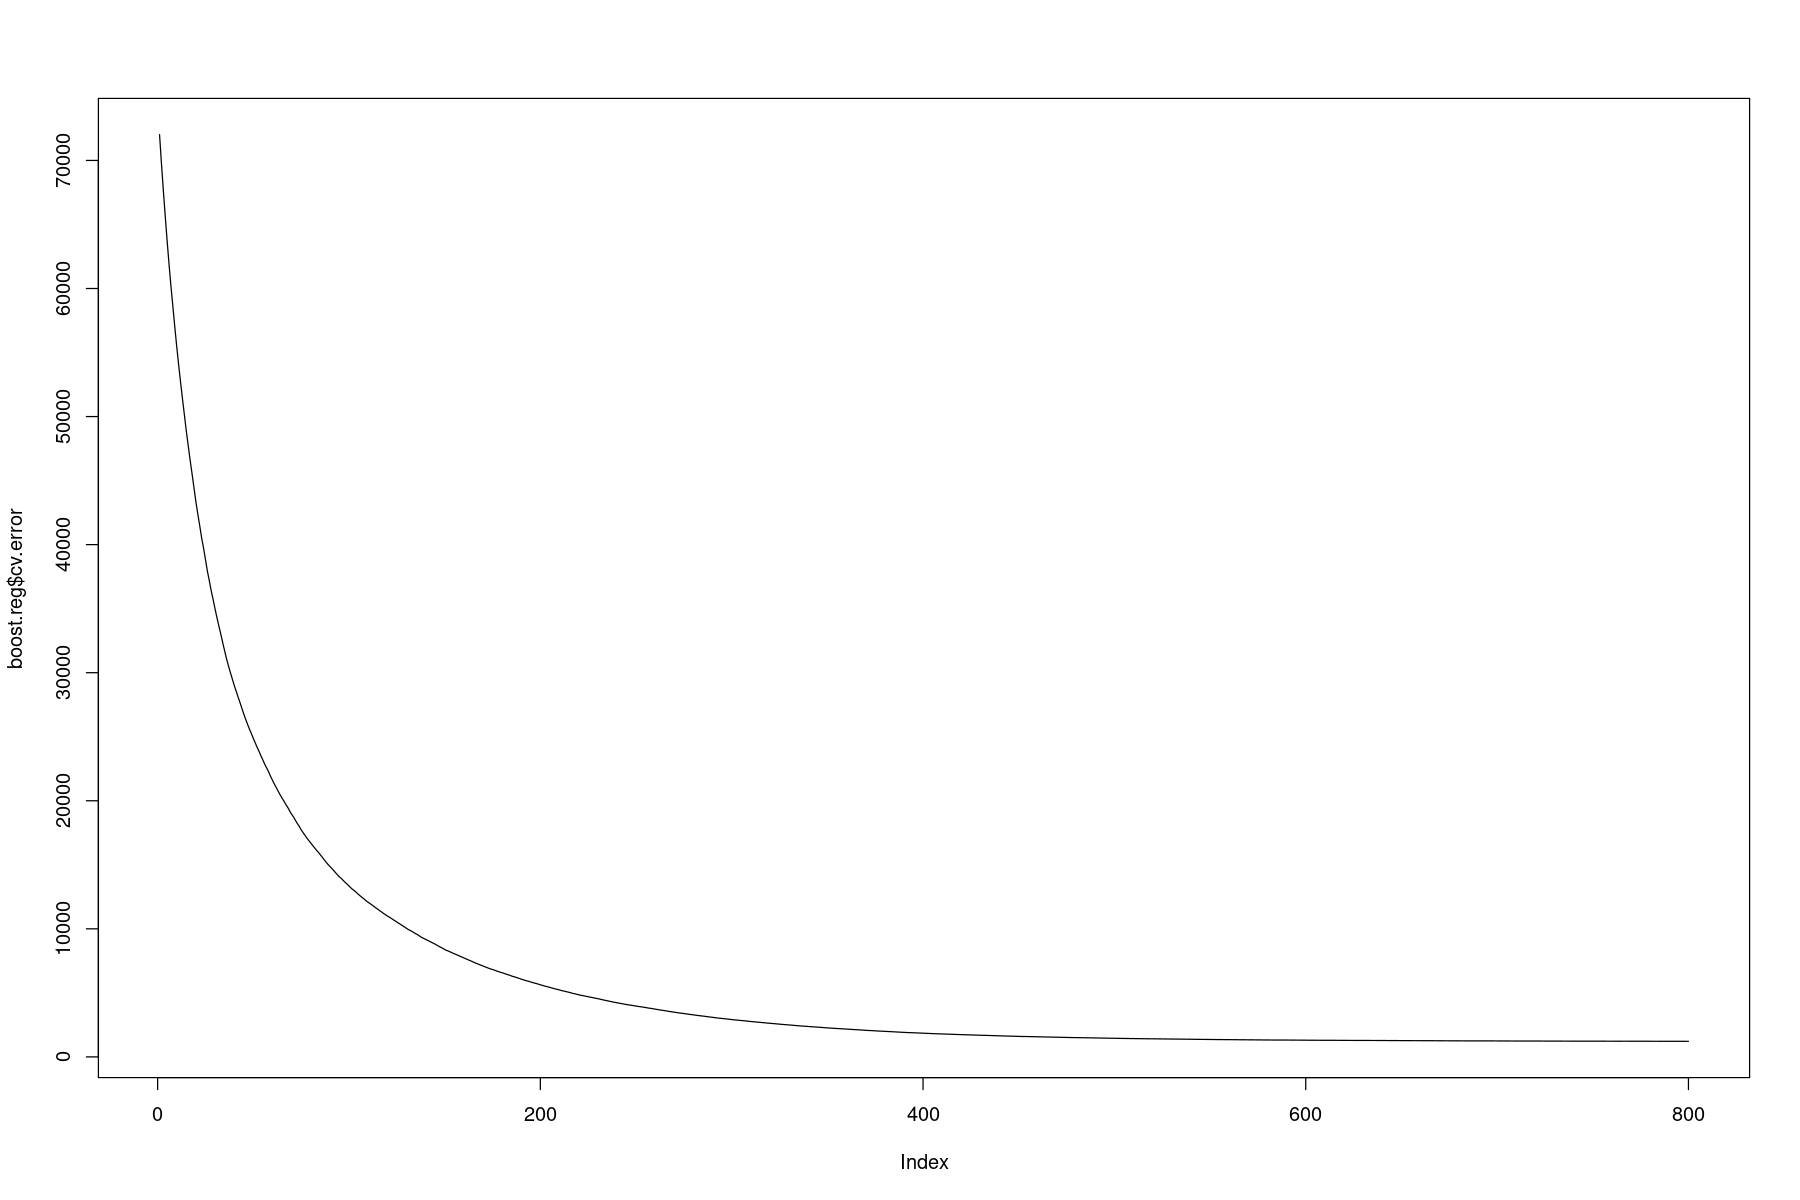

In [70]:
library(gbm)

boost.reg = gbm(Calories_Burned ~ ., data = datappr, distribution = "gaussian", n.trees = 800, 
    cv.folds = 10, n.minobsinnode = 5, shrinkage = 0.03, verbose = FALSE)

# on fixe verbose à FALSE pour éviter trop de sorties
plot(boost.reg$cv.error, type = "l")

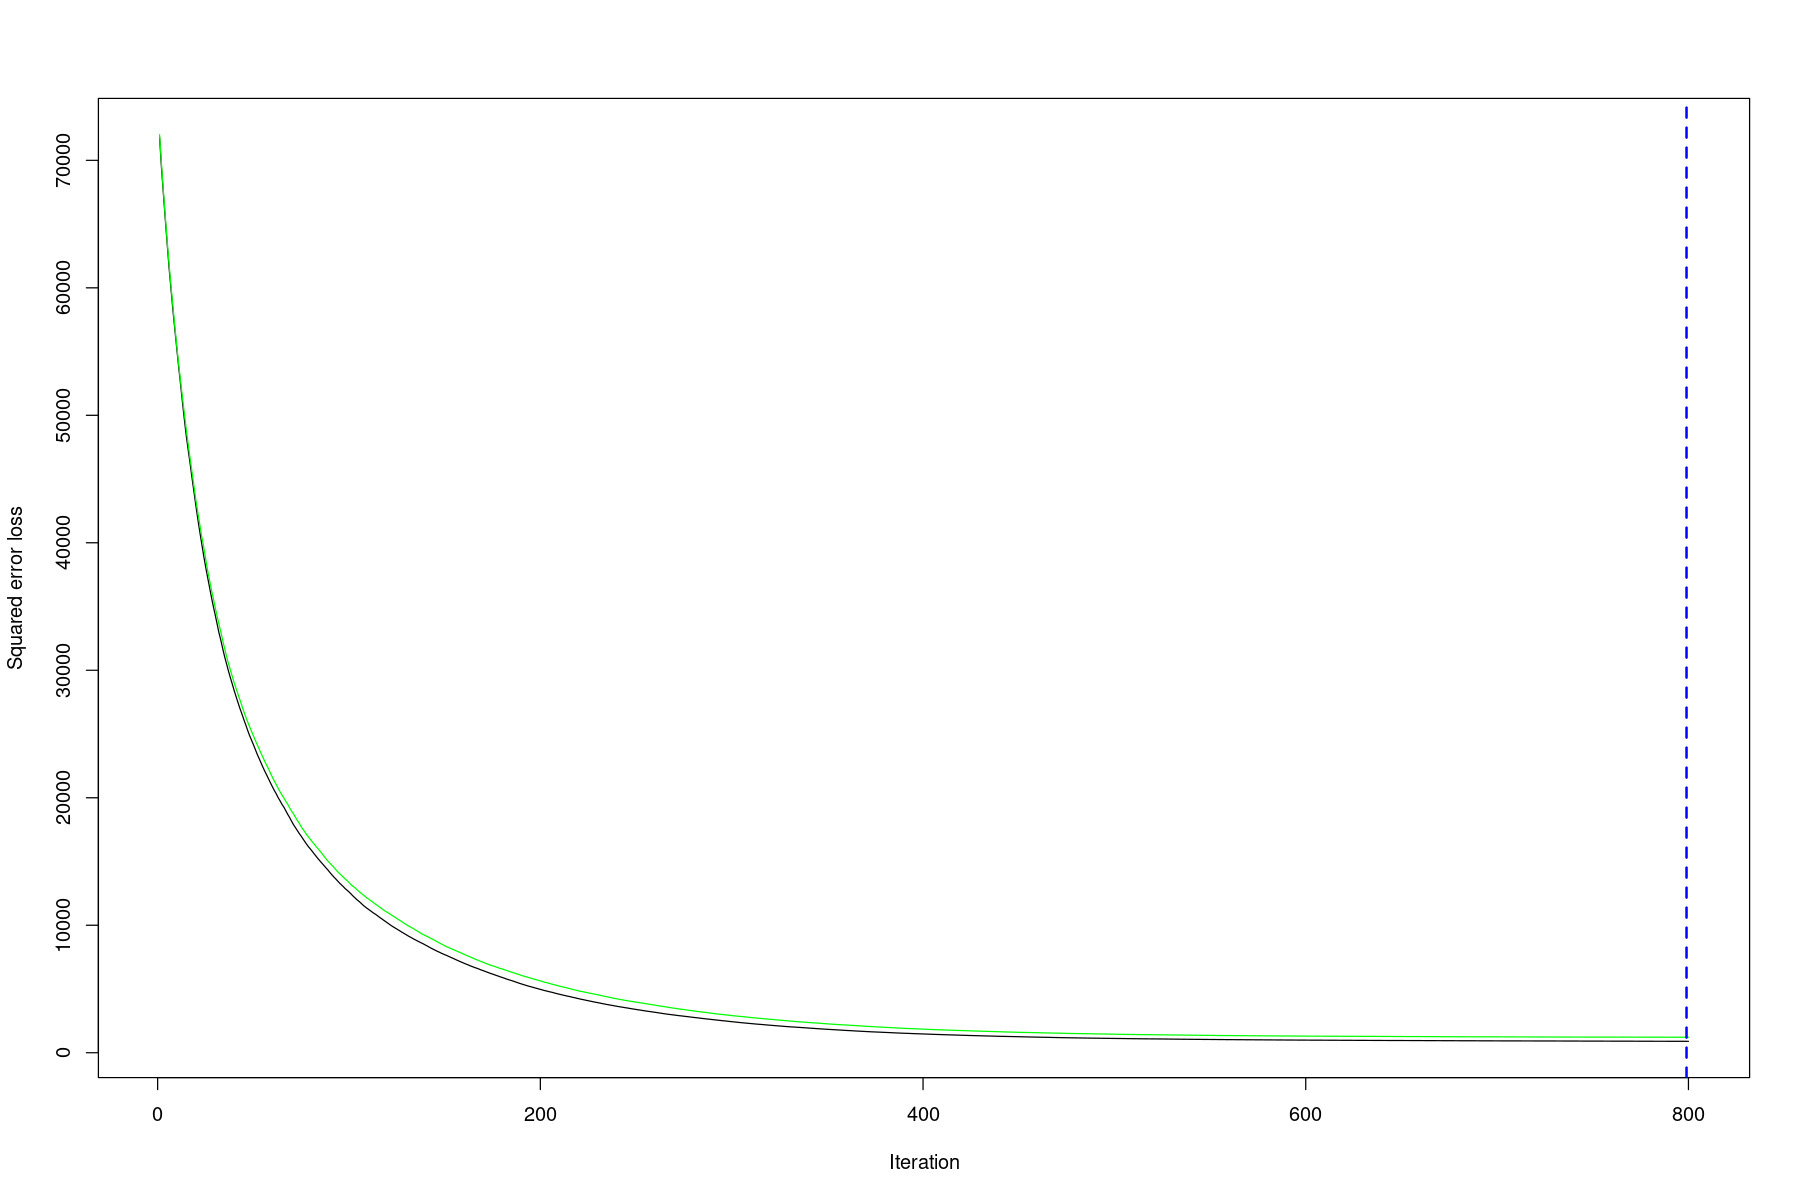

In [71]:
# nombre optimal d'itérations par validation croisée
best.iter=gbm.perf(boost.reg,method="cv")

Le nombre d'arbre optimal est le plus grand soit 800 arbres. 

In [72]:
set.seed(123)
boost.reg = gbm(Calories_Burned ~ ., data = datappr, distribution = "gaussian", n.trees = 800, 
    cv.folds = 10, n.minobsinnode = 5, shrinkage = 0.03, verbose = FALSE)


##### Calcul des résidus

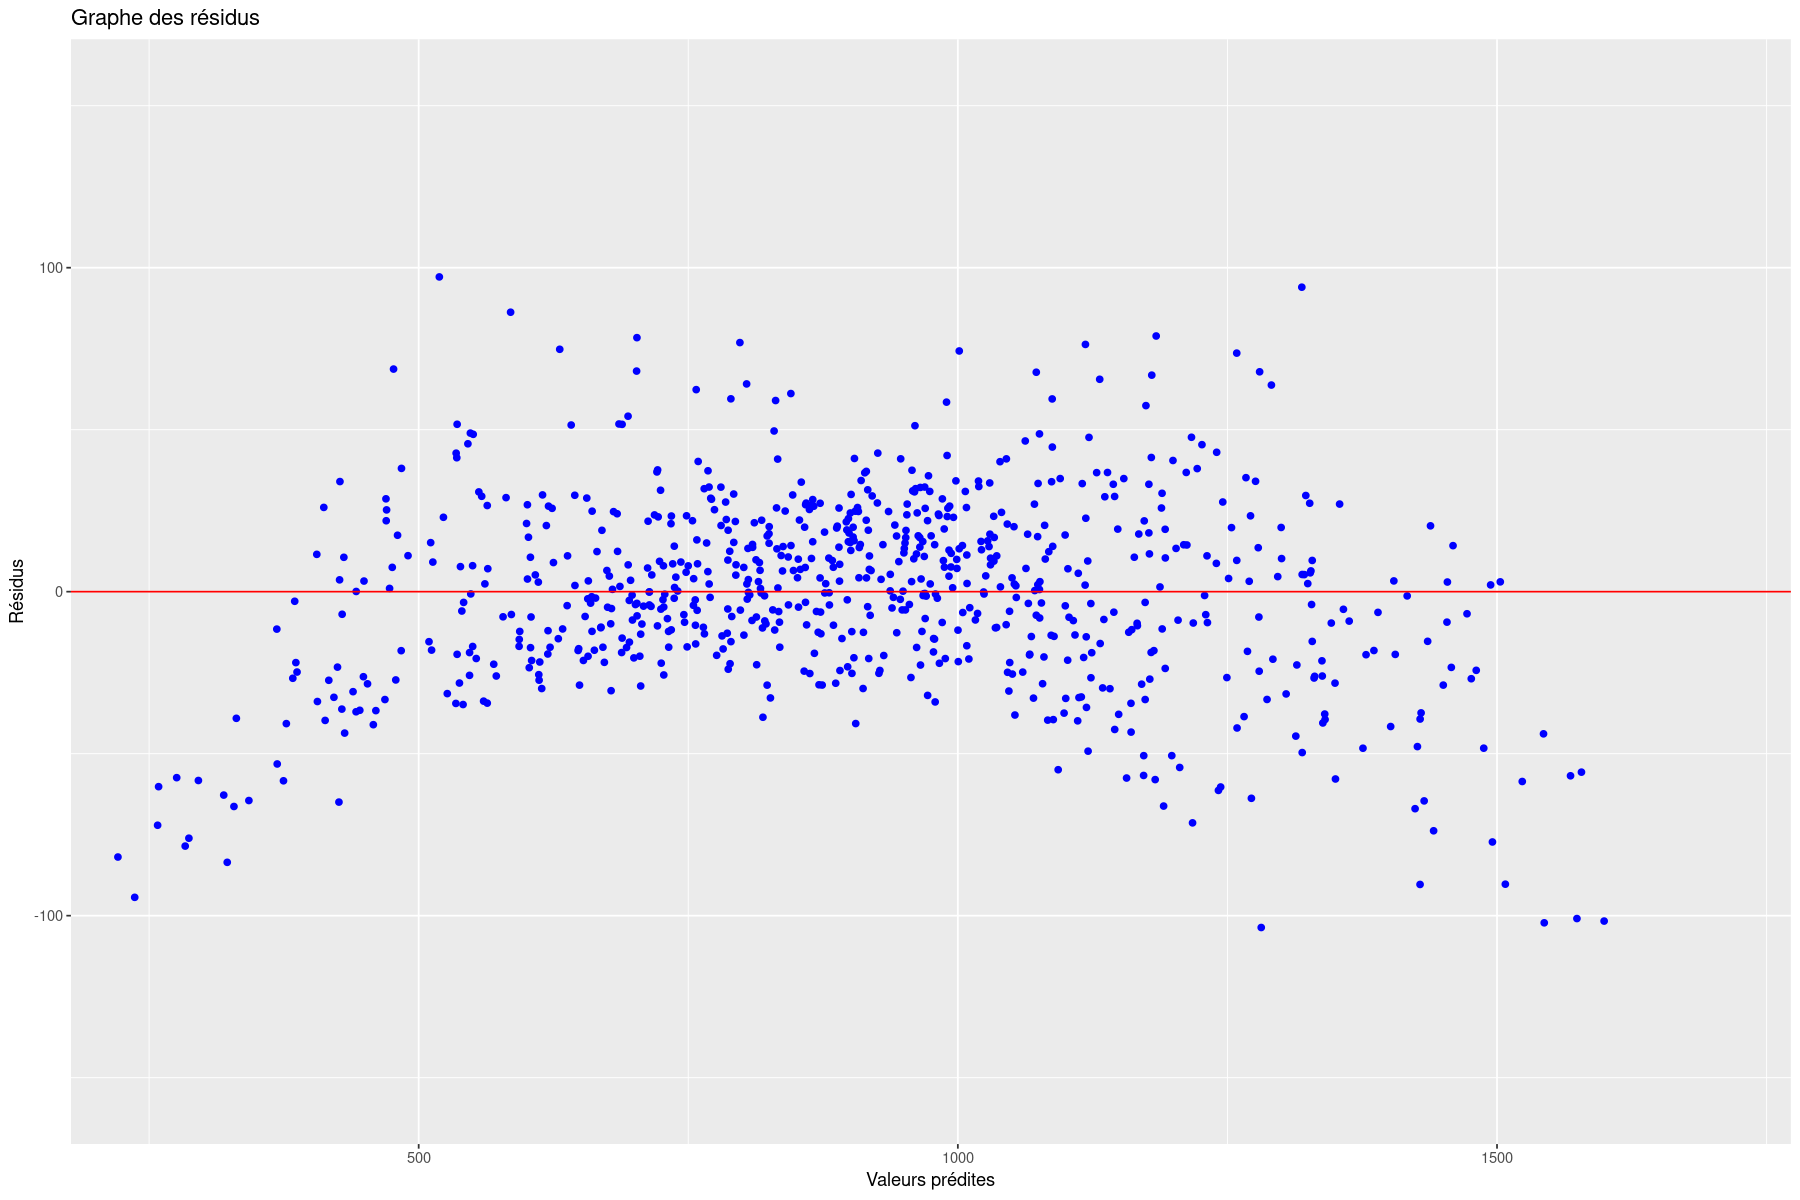

In [73]:
fit.boostr=boost.reg$fit
res.boostr=fit.boostr-datappr[,"Calories_Burned"]
gplot.res(fit.boostr,res.boostr,titre="Graphe des résidus")

### 2.6.2 Prévision de l'échantillon test, erreur de régression

In [74]:
pred.boostr=predict(boost.reg,newdata=datestr,n.trees=800)
# Erreur quadratique moyenne de prévision
erreur_boosting=sum((pred.boostr-datestr[,"Calories_Burned"])^2)/nrow(datestr)
cat("Erreur quadratique moyenne Boosting :",erreur_boosting)

Erreur quadratique moyenne Boosting : 1522.04

Le boosting a de bonnes performances. L'erreur de prévision est similaire à celle des modèles linéaires. Toutefois, son temps de calcul est plus long et son interprétabilité plus faible.

## 2.7 Réseau de neurones

### 2.7.1 Régression

In [75]:
library(nnet)
# apprentissage

# attention au paramètre linout dans le cas de la régression
nnet.reg=nnet(Calories_Burned~.,data=datappr,size=5,decay=1,linout=TRUE,maxit=2000) 

# weights:  106
initial  value 696614301.204971 
iter  10 value 11815488.806902
iter  20 value 9907992.935649
iter  30 value 9239569.297350
iter  40 value 8893252.526438
iter  50 value 8279860.444678
iter  60 value 7823505.581417
iter  70 value 7496233.585802
iter  80 value 7328098.849022
iter  90 value 7183612.038981
iter 100 value 7022005.021008
iter 110 value 6961450.763896
iter 120 value 6927927.812937
iter 130 value 6873960.469433
iter 140 value 6835394.118427
iter 150 value 6778453.455402
iter 160 value 6458490.285151
iter 170 value 5707309.142937
iter 180 value 5505328.310736
iter 190 value 5280869.550518
iter 200 value 5214856.226909
iter 210 value 4944067.162798
iter 220 value 4801973.635761
iter 230 value 4764360.572225
iter 240 value 4696028.822501
iter 250 value 4425686.362202
iter 260 value 3301076.383796
iter 270 value 2258556.561408
iter 280 value 1596727.804780
iter 290 value 1382527.671272
iter 300 value 1291937.213776
iter 310 value 1243275.592187
iter 320 value 11964

Size définit le nombre de neurones dans la couche cachée. Plus size est grand, plus le réseau a de capacité à apprendre des relations complexes (modèle plus puissant). Decay est le coefficient de régularisation L2 (penalisation des poids). Nous cherchons les paramètres optimaux grâce à la fonction Tune.nnet.

In [76]:
set.seed(123) 
#il faut le paramètre linout=true dans le cas de la régression
plot(tune.nnet(Calories_Burned~.,data=datappr,size=c(3,4,5,6,7,8),decay=c(1,2,3,4,5,6,7),maxit=1000,linout=TRUE))
system.time(tune.nnet(Calories_Burned~.,data=datappr,size=c(3,4,5,6,7,8),decay=c(1,2,3,4,5,6,7),maxit=1000,linout=TRUE))

D'après les graphiques, des paramètres optimaux pour size et decay sont respectivement 7 et 2.

In [ ]:
set.seed(12) 
#apprentissage avec les paramètres optimaux
nnet.reg=nnet(Calories_Burned~.,data=datappr,size=7,decay=2,linout=TRUE,maxit=2000)
summary(nnet.reg)

In [ ]:
# calcul et graphe des résidus
fit.nnetr=predict(nnet.reg,data=datappr)
res.nnetr=fit.nnetr-datappr[,"Calories_Burned"]
gplot.res(fit.nnetr,res.nnetr,titre="")

Les résidus sont bien aléatoires et independants.

### 2.7.2 Prévision de l'échantillon test, erreur de régression

In [ ]:
# Calcul des prévisions
pred.nnetr=predict(nnet.reg,newdata=datestr)
#pred.nnetq=predict(nnet.dis,newdata=datestq) 
# Erreur quadratique moyenne de prévision
erreur_RDN = sum((pred.nnetr-datestr[,"Calories_Burned"])^2)/nrow(datestr)
cat("Erreur quadratique moyenne RdN :",erreur_RDN)

La MSE du réseaux de neurones est similaire à celle des modèles linéaires (environ 1500). Il est important de noter que le tuning des paramètres pour le réseau de neurones est assez long et très couteux. De plus, nous observons une certaine variabilité des résultats due à l'initialisation àléatoire. Ici d'autres paramètres sont peut-être plus optimaux mais le coût de calcul pour leur recherche est conséquent et les résultats sont variables. 

## 2.8 Comparaison finale des différents modèles

Finalement, voici les résultats des différents modèles sur l'échantillon test. Pour des raisons d'explicabilité et d'interprétation des résultats nous affichons la RMSE et non la MSE car la RMSE est dans la même unité que "Calories_Burned", soit en calories.

In [ ]:
cat("RMSE RdN :",sqrt(erreur_RDN),"\n")
cat("RMSE Boosting :",sqrt(erreur_boosting),"\n")
cat("RMSE Foret aléatoire :" ,sqrt(erreur_randomforest),"\n")
cat("RMSE Arbre optimal :",sqrt(erreur_arbreoptimal) ,"\n")
cat("RMSE pour un SVR avec noyau radial :",sqrt(erreur_SVR) , "\n")
cat("RMSE Modèle linéaire Lasso avec lambda.min :", sqrt(mse.lasso.min), "\n")
cat("RMSE Modèle linéaire  Lasso avec lambda.1se :", sqrt(mse.lasso.1se), "\n")
cat("RMSE modèle linéaire sans sélection de variable :", sqrt(mse.lm), "\n")


##### Quels sont les modèles les plus performants ? Quel est le niveau de précision obtenu ? Quels modèles retenir si l’on ajoute une contrainte d’interprétabilité ?

SVR avec un noyau radial est le modèle le plus performant avec une RMSE égale à 30. Ainsi, lors de la prédiction du nombre Il est suivi par le modèle par boosting avec une RMSE égale à 39.

Or, SVR, Boosting, Réseaux de neurones ont un niveau d'interprétabilité très faible.

Donc si on rajoute une contrainte d'interprétabilité, les modèles linéaires sont les plus pertinents. Le modèle avec sélection de variables LASSO avec lambda.min semble être le meilleur compromis avec une MSE égale à 2007.

##### Retour sur l'analyse de données

vos résultats sont-ils cohérents avec l’analyse exploratoire des données, par exemple en ce qui concerne l’importance des variables ?

Les résultats obtenus sont cohérents avec l'analyse exploratoire des données. En effet, les modèles linéaires avec sélection de variable et l'arbre optimal ont confirmé nos analyses sur la grande importance de la variable "Durée de la session". Nous avons également retrouvé l'importance du genre dans la sélection des variables des modèles linéaires. Toutefois, nous n'avions pas trouvé grande importance à la variable "Avg_BPM" dans notre analyse exploratoire alors que les modèles de prédiction ont mis en avant cette variable.

Ne pas oublier de calculer le R carré

<h1 style="color:red">III- Prédiction du niveau d'expérience </h1>

# Construction des échantillons pour: Experience_Level.

In [77]:
# construction de l'échantillon d'apprentissage
datappq0 <- gym[appri, ]
# construction de l'échantillon test 
datestq0 <- gym[testi, ] 

# vérification
str(datappq0)
str(datestq0)
#summary(datappq)

'data.frame':	778 obs. of  15 variables:
 $ Age                          : int  56 46 32 38 56 36 40 28 28 41 ...
 $ Gender                       : Factor w/ 2 levels "Female","Male": 2 1 1 2 1 2 1 2 2 2 ...
 $ Height..m.                   : num  1.71 1.53 1.66 1.79 1.68 1.72 1.51 1.94 1.84 2 ...
 $ Max_BPM                      : int  180 179 167 188 168 174 189 185 169 179 ...
 $ Avg_BPM                      : int  157 151 122 158 156 169 141 127 136 136 ...
 $ Resting_BPM                  : int  60 66 54 68 74 73 64 52 64 69 ...
 $ Session_Duration..hours.     : num  1.69 1.3 1.11 0.64 1.59 1.49 1.27 1.03 1.08 1.18 ...
 $ Calories_Burned              : num  1313 883 677 556 1116 ...
 $ Workout_Type                 : Factor w/ 4 levels "Cardio","HIIT",..: 4 2 1 3 2 1 1 3 1 2 ...
 $ Fat_Percentage               : num  12.6 33.9 33.4 29.2 15.5 21.3 30.6 28.9 29.7 27.6 ...
 $ Water_Intake..liters.        : num  3.5 2.1 2.3 2.8 2.7 2.3 1.9 2.6 2.7 3.7 ...
 $ Workout_Frequency..days.week.:

In [78]:
#on recup les quali
which(sapply(datappq0, is.factor))

Gender                  Workout_Type 
                            2                             9 
Workout_Frequency..days.week.              Experience_Level 
                           12                            13

In [79]:
# on normalise l'échantillon d'apprentissage
datappq=datappq0
datappq[,-c(2,9,12,13)]=scale(datappq0[,-c(2,9,12,13)])

# on normalise l'échantillon test 
# à l'aide des caractéristiques de l'échantillon d'apprentissage
datestq=datestq0
datestq[,-c(2,9,12,13)]=scale(datestq0[,-c(2,9,12,13)],
                            center=sapply(datappq0[,-c(2,9,12,13)],mean), # on centre avec les moyennes de l'échantillon d'apprentissage
                            scale=sapply(datappq0[,-c(2,9,12,13)],sd)) # on réduit avec les écart-types de l'échantillon d'apprentissage
summary(datappq)
summary(datestq)

      Age              Gender      Height..m.          Max_BPM        
 Min.   :-1.68603   Female:368   Min.   :-1.75705   Min.   :-1.73044  
 1st Qu.:-0.86543   Male  :410   1st Qu.:-0.82012   1st Qu.:-0.87212  
 Median : 0.03723                Median :-0.03934   Median : 0.07204  
 Mean   : 0.00000                Mean   : 0.00000   Mean   : 0.00000  
 3rd Qu.: 0.85783                3rd Qu.: 0.58528   3rd Qu.: 0.84454  
 Max.   : 1.67844                Max.   : 2.14683   Max.   : 1.61703  
    Avg_BPM          Resting_BPM       Session_Duration..hours.
 Min.   :-1.64966   Min.   :-1.64729   Min.   :-2.20804        
 1st Qu.:-0.87874   1st Qu.:-0.83521   1st Qu.:-0.60730        
 Median :-0.03774   Median :-0.02314   Median : 0.03299        
 Mean   : 0.00000   Mean   : 0.00000   Mean   : 0.00000        
 3rd Qu.: 0.87334   3rd Qu.: 0.78894   3rd Qu.: 0.55687        
 Max.   : 1.78442   Max.   : 1.60101   Max.   : 2.15761        
 Calories_Burned      Workout_Type Fat_Percentage    Wa

      Age              Gender      Height..m.         Max_BPM        
 Min.   :-1.68603   Female: 94   Min.   :-1.7570   Min.   :-1.73044  
 1st Qu.:-0.86543   Male  :101   1st Qu.:-0.8982   1st Qu.:-0.87212  
 Median : 0.20135                Median :-0.3517   Median :-0.09962  
 Mean   : 0.05617                Mean   :-0.0958   Mean   :-0.11855  
 3rd Qu.: 0.93989                3rd Qu.: 0.5072   3rd Qu.: 0.67287  
 Max.   : 1.67844                Max.   : 2.1468   Max.   : 1.61703  
    Avg_BPM          Resting_BPM       Session_Duration..hours.
 Min.   :-1.64966   Min.   :-1.64729   Min.   :-2.178932       
 1st Qu.:-0.87874   1st Qu.:-0.69987   1st Qu.:-0.665508       
 Median : 0.03234   Median : 0.11221   Median : 0.003891       
 Mean   : 0.07978   Mean   : 0.03517   Mean   :-0.032527       
 3rd Qu.: 1.01350   3rd Qu.: 0.78894   3rd Qu.: 0.585977       
 Max.   : 1.78442   Max.   : 1.60101   Max.   : 2.070296       
 Calories_Burned      Workout_Type Fat_Percentage     Water_In

**Remarque** : Nous avons ici "manuellement" fait la construction des échantillons à des fins pédagogiques. En pratique, on peut utiliser des fonctions de R qui font ce travail, en particulier la fonction `createDataPartition` de la librairie `caret`. 

On va tester cela pour la partie Experience_Level comme ça on aura un échantillon construit manuellement et un échantillon avec cette méthode.

In [80]:
# On peut spécifier la variable cible ici (ici : 'Experience_Level' )

# Crée un partitionnement de 80% apprentissage et 20% test
partition <- createDataPartition(gym$Experience_Level, p = 0.8, list = FALSE)

# Échantillon d'apprentissage
datappq0 <- gym[partition, ]

# Échantillon de test
datestq0 <- gym[-partition, ]   # -partition indique que tu veux exclure les lignes correspondant aux indices dans partition

#L'indice avant la virgule (partition) désigne les lignes du jeu de données que tu veux conserver.

    #Cela signifie que les lignes de gym correspondant aux indices dans partition seront extraites pour l'échantillon d'apprentissage (datappr0).

#L'espace après la virgule, sans rien, signifie qu'on garde toutes les colonnes.

    #Si tu mettais un chiffre à la place de l'espace (par exemple gym[partition, 1]), cela voudrait dire que tu ne garderais que la première colonne de ces lignes sélectionnées.


Il faut tout de même le normaliser (cf code ci-dessus)


In [106]:
#Enfin, avant de passer aux différents algorithmes, définissons une fonction traçant plusieurs ROC curves

plot_multiclass_roc <- function(true_labels, prob_matrix, title = "Courbes ROC Multiclasse (One-vs-All)") {
  library(ROCR)
  
  classes <- colnames(prob_matrix)
  colors <- rainbow(length(classes))
  aucs <- numeric(length(classes))  # Stocker les AUC
  
  # Initialiser le graphique
  plot(NULL, xlim = c(0, 1), ylim = c(0, 1),
       xlab = "FPR (1 - Spécificité)", ylab = "TPR (Sensibilité)",
       main = title)
  
  for (i in seq_along(classes)) {
    cls <- classes[i]
    bin_labels <- as.numeric(true_labels == cls)
    
    pred <- prediction(prob_matrix[, cls], bin_labels)
    perf <- performance(pred, "tpr", "fpr")
    auc <- performance(pred, "auc")@y.values[[1]]
    aucs[i] <- auc
    
    plot(perf, col = colors[i], add = TRUE, lwd = 2)
  }
  
  abline(a = 0, b = 1, lty = 2, col = "gray")
  
  # Légende avec AUC
  legend_labels <- paste0(classes, " (AUC = ", round(aucs, 3), ")")
  legend("bottomright", legend = legend_labels, col = colors, lwd = 2)
}

In [82]:
#Charger le package 
library(nnet)

## 3.2 Regression logitisque binaire 

La classification multi classes ne marche pas bien lorsqu'il faut sélectionner le meilleur modèle par BIC ou AIC, il faut créer 3 différents modèles binaire : 
- Modèle 1 : prédire Experience_Level == 1 vs Experience_Level ≠ 1
- Modèle 2 : prédire Experience_Level == 2 vs Experience_Level ≠ 2
- Modèle 3 : prédire Experience_Level == 3 vs Experience_Level ≠ 3

In [83]:
# === Pour le niveau 1 vs les autres ===
datappq1 <- datappq0
datappq1$Y_bin <- ifelse(datappq1$Experience_Level == 1, 1, 0) #On crée une nouvelle variable binaire Y_bin qui vaut : 1 si Experience_Level vaut 1 (le niveau qu’on veut prédire ici), 0 sinon (c’est-à-dire niveaux 2 ou 3) => c'est la cible du modèle binaire
datappq1$Experience_Level <- NULL  # suppression variable multiclass pour éviter de biaiser le modèle.

datestq1 <- datestq0
datestq1$Y_bin <- ifelse(datestq1$Experience_Level == 1, 1, 0)
datestq1$Experience_Level <- NULL

# Normalisation (en conservant la nouvelle colonne Y_bin)
quanti_cols <- setdiff(1:ncol(datappq1), c(2, 9, 12, 13, ncol(datappq1)))  # indices sans Y_bin
datappq1[, quanti_cols] <- scale(datappq0[, quanti_cols])
datestq1[, quanti_cols] <- scale(datestq0[, quanti_cols],
                                 center = sapply(datappq0[, quanti_cols], mean),
                                 scale  = sapply(datappq0[, quanti_cols], sd))

# === Pour le niveau 2 vs les autres ===
datappq2 <- datappq0
datappq2$Y_bin <- ifelse(datappq2$Experience_Level == 2, 1, 0)
datappq2$Experience_Level <- NULL

datestq2 <- datestq0
datestq2$Y_bin <- ifelse(datestq2$Experience_Level == 2, 1, 0)
datestq2$Experience_Level <- NULL

datappq2[, quanti_cols] <- scale(datappq0[, quanti_cols])
datestq2[, quanti_cols] <- scale(datestq0[, quanti_cols],
                                 center = sapply(datappq0[, quanti_cols], mean),
                                 scale  = sapply(datappq0[, quanti_cols], sd))

# === Pour le niveau 3 vs les autres ===
datappq3 <- datappq0
datappq3$Y_bin <- ifelse(datappq3$Experience_Level == 3, 1, 0)
datappq3$Experience_Level <- NULL

datestq3 <- datestq0
datestq3$Y_bin <- ifelse(datestq3$Experience_Level == 3, 1, 0)
datestq3$Experience_Level <- NULL

datappq3[, quanti_cols] <- scale(datappq0[, quanti_cols])
datestq3[, quanti_cols] <- scale(datestq0[, quanti_cols],
                                 center = sapply(datappq0[, quanti_cols], mean),
                                 scale  = sapply(datappq0[, quanti_cols], sd))


### Modèle 1 :

Avec interaction car (Avec autant de variables et d'interactions donc de paramètres, l'estimation du modèle complet de régression logistique rencontre des soucis et affiche des warnings car certaines probabilité trop bien ajustés (0 ou 1) provoquent des divisions par 0. Ici une procédure forward ou mieux stepwise de sélection des variables et interactions conduit à des résultats raisonnables. Une méthode avec pénalisation L1 peut aussi être utilisée.) :

In [84]:
# Modèle minimal (intercept seul)
log.qm1 <- glm(Y_bin ~ 1, data = datappq1, family = binomial)

# Création du Scope pour le plus grand modèle possible
vars_explicatives <- setdiff(names(datappq1), "Y_bin") #je recup mes variable explicatives sauf Y_Bin car c'est la variable que l'on veut prédire 
scope_vars <- as.formula(
  paste("~ (", paste(vars_explicatives, collapse = " + "), ")^2")
) 

# algorithme stepwise en précisant le plus grand modèle possible avec interaction
log.qm1.step <- step(log.qm1, direction = "both",
                     scope = list(lower = ~1, upper = scope_vars),
                     family = binomial)

# Résumé du modèle avec interactions
summary(log.qm1.step)
anova(log.qm1.step, test = "Chisq")

# Prédiction sur l’échantillon test
pred1_inter <- predict(log.qm1.step, newdata = datestq1, type = "response")

# Matrice de confusion
table(pred1_inter > 0.5, datestq1$Y_bin)

Start:  AIC=1041.35
Y_bin ~ 1

                                Df Deviance     AIC
+ Workout_Frequency..days.week.  3   408.55  416.55
+ Session_Duration..hours.       1   735.55  739.55
+ Calories_Burned                1   790.36  794.36
+ Fat_Percentage                 1   940.11  944.11
+ Water_Intake..liters.          1  1027.93 1031.93
<none>                              1039.35 1041.35
+ Workout_Type                   3  1033.65 1041.65
+ Max_BPM                        1  1038.81 1042.81
+ LBMI                           1  1038.86 1042.86
+ LWeight..kg.                   1  1038.86 1042.86
+ Height..m.                     1  1039.04 1043.04
+ Resting_BPM                    1  1039.15 1043.15
+ Avg_BPM                        1  1039.19 1043.19
+ Age                            1  1039.31 1043.31
+ Gender                         1  1039.35 1043.35

Step:  AIC=416.55
Y_bin ~ Workout_Frequency..days.week.

                                Df Deviance     AIC
+ Session_Duration..hours. 


Call:
glm(formula = Y_bin ~ Workout_Frequency..days.week. + Session_Duration..hours. + 
    Gender + Water_Intake..liters., family = binomial, data = datappq1)

Coefficients:
                                Estimate Std. Error z value Pr(>|z|)    
(Intercept)                      20.4890  1271.4967   0.016   0.9871    
Workout_Frequency..days.week.3  -20.6352  1271.4967  -0.016   0.9871    
Workout_Frequency..days.week.4  -40.5016  1656.3396  -0.024   0.9805    
Workout_Frequency..days.week.5  -38.5720  2277.9461  -0.017   0.9865    
Session_Duration..hours.         -1.6651     0.2307  -7.216 5.34e-13 ***
GenderMale                       -0.7677     0.3781  -2.031   0.0423 *  
Water_Intake..liters.             0.2751     0.1925   1.429   0.1529    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1039.4  on 778  degrees of freedom
Residual deviance:  330.5  on 772  degrees of freedom
AIC: 3

Df Deviance   Resid. Df Resid. Dev Pr(>Chi)     
NULL                          NA         NA 778       1039.3530             NA
Workout_Frequency..days.week.  3 630.806397 775        408.5466  2.112060e-136
Session_Duration..hours.       1  73.821714 774        334.7249   8.550086e-18
Gender                         1   2.172696 773        332.5522   1.404797e-01
Water_Intake..liters.          1   2.056776 772        330.4954   1.515305e-01

       
          0   1
  FALSE 110  14
  TRUE    9  61

#### Modèle 2 :

In [85]:
# Modèle minimal
log.qm2 <- glm(Y_bin ~ 1, data = datappq2, family = binomial)

# Variables explicatives
vars_explicatives2 <- setdiff(names(datappq2), "Y_bin")
scope_vars2 <- as.formula(
  paste("~ (", paste(vars_explicatives2, collapse = " + "), ")^2")
)

# Stepwise avec interactions
log.qm2.step <- step(log.qm2, direction = "both",
                     scope = list(lower = ~1, upper = scope_vars2),
                     family = binomial)

# Résumé et test de significativité
summary(log.qm2.step)
anova(log.qm2.step, test = "Chisq")

# Prédiction
pred2_inter <- predict(log.qm2.step, newdata = datestq2, type = "response")

# Matrice de confusion
table(pred2_inter > 0.5, datestq2$Y_bin)


Start:  AIC=1060.46
Y_bin ~ 1

                                Df Deviance     AIC
+ Workout_Frequency..days.week.  3   699.66  707.66
+ Fat_Percentage                 1   979.43  983.43
+ Water_Intake..liters.          1  1025.57 1029.57
<none>                              1058.46 1060.46
+ Max_BPM                        1  1057.07 1061.07
+ Avg_BPM                        1  1057.81 1061.81
+ Session_Duration..hours.       1  1057.91 1061.91
+ Age                            1  1058.17 1062.17
+ Calories_Burned                1  1058.26 1062.26
+ Gender                         1  1058.26 1062.26
+ Resting_BPM                    1  1058.37 1062.37
+ Height..m.                     1  1058.40 1062.40
+ LBMI                           1  1058.42 1062.42
+ LWeight..kg.                   1  1058.42 1062.42
+ Workout_Type                   3  1056.42 1064.42

Step:  AIC=707.66
Y_bin ~ Workout_Frequency..days.week.

                                Df Deviance     AIC
+ Fat_Percentage           

Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”


                                               Df Deviance    AIC
+ Fat_Percentage:Workout_Frequency..days.week.  3   410.13 426.13
+ Gender                                        1   546.55 558.55
+ Height..m.                                    1   587.44 599.44
+ Calories_Burned                               1   588.57 600.57
+ LBMI                                          1   595.69 607.69
+ LWeight..kg.                                  1   595.69 607.69
<none>                                              598.05 608.05
+ Session_Duration..hours.                      1   596.29 608.29
+ Resting_BPM                                   1   596.45 608.45
+ Avg_BPM                                       1   597.02 609.02
+ Age                                           1   597.99 609.99
+ Max_BPM                                       1   598.01 610.01
+ Water_Intake..liters.                         1   598.03 610.03
+ Workout_Type                                  3   594.71 610.71
- Fat_Perc

Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”



Step:  AIC=426.13
Y_bin ~ Workout_Frequency..days.week. + Fat_Percentage + Workout_Frequency..days.week.:Fat_Percentage



Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit: des probabilités ont été ajustées numé

                                               Df Deviance    AIC
+ Session_Duration..hours.                      1   342.80 360.80
+ Calories_Burned                               1   345.73 363.73
<none>                                              410.13 426.13
+ Avg_BPM                                       1   408.33 426.33
+ Water_Intake..liters.                         1   409.17 427.17
+ Age                                           1   409.48 427.48
+ Max_BPM                                       1   409.50 427.50
+ Gender                                        1   409.71 427.71
+ LWeight..kg.                                  1   409.73 427.73
+ LBMI                                          1   409.73 427.73
+ Height..m.                                    1   410.07 428.07
+ Resting_BPM                                   1   410.07 428.07
+ Workout_Type                                  3   406.17 428.17
- Workout_Frequency..days.week.:Fat_Percentage  3   598.05 608.05


Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”



Step:  AIC=360.8
Y_bin ~ Workout_Frequency..days.week. + Fat_Percentage + Session_Duration..hours. + 
    Workout_Frequency..days.week.:Fat_Percentage



Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit: des probabilités ont été ajustées numé

                                                         Df Deviance    AIC
+ Session_Duration..hours.:Workout_Frequency..days.week.  3   333.62 357.62
+ Calories_Burned                                         1   339.97 359.97
<none>                                                        342.80 360.80
+ Gender                                                  1   341.08 361.08
+ Age                                                     1   342.00 362.00
+ Avg_BPM                                                 1   342.12 362.12
+ Resting_BPM                                             1   342.12 362.12
+ Session_Duration..hours.:Fat_Percentage                 1   342.32 362.32
+ Max_BPM                                                 1   342.45 362.45
+ Water_Intake..liters.                                   1   342.54 362.54
+ LWeight..kg.                                            1   342.76 362.76
+ LBMI                                                    1   342.76 362.76
+ Height..m.

Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”



Step:  AIC=357.62
Y_bin ~ Workout_Frequency..days.week. + Fat_Percentage + Session_Duration..hours. + 
    Workout_Frequency..days.week.:Fat_Percentage + Workout_Frequency..days.week.:Session_Duration..hours.



Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit: des probabilités ont été ajustées numé

                                                         Df Deviance    AIC
- Workout_Frequency..days.week.:Fat_Percentage            3   333.62 351.62
+ Session_Duration..hours.:Fat_Percentage                 1   330.11 356.11
<none>                                                        333.62 357.62
+ Gender                                                  1   332.55 358.55
+ Calories_Burned                                         1   332.57 358.57
+ Resting_BPM                                             1   332.67 358.67
+ Age                                                     1   332.96 358.96
+ Max_BPM                                                 1   333.34 359.34
+ Water_Intake..liters.                                   1   333.40 359.40
+ Avg_BPM                                                 1   333.43 359.43
+ LBMI                                                    1   333.47 359.47
+ LWeight..kg.                                            1   333.47 359.47
+ Height..m.

Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”



Step:  AIC=351.62
Y_bin ~ Workout_Frequency..days.week. + Fat_Percentage + Session_Duration..hours. + 
    Workout_Frequency..days.week.:Session_Duration..hours.



Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit: des probabilités ont été ajustées numé

                                                         Df Deviance    AIC
+ Session_Duration..hours.:Fat_Percentage                 1   330.11 350.11
- Fat_Percentage                                          1   334.72 350.72
<none>                                                        333.62 351.62
+ Gender                                                  1   332.55 352.55
+ Calories_Burned                                         1   332.57 352.57
+ Resting_BPM                                             1   332.67 352.67
+ Age                                                     1   332.96 352.96
+ Max_BPM                                                 1   333.34 353.34
+ Water_Intake..liters.                                   1   333.40 353.40
+ Avg_BPM                                                 1   333.43 353.43
+ LBMI                                                    1   333.47 353.47
+ LWeight..kg.                                            1   333.47 353.47
+ Height..m.

Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”



Step:  AIC=350.11
Y_bin ~ Workout_Frequency..days.week. + Fat_Percentage + Session_Duration..hours. + 
    Workout_Frequency..days.week.:Session_Duration..hours. + 
    Fat_Percentage:Session_Duration..hours.



Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit: des probabilités ont été ajustées numé

                                                         Df Deviance    AIC
<none>                                                        330.11 350.11
+ Gender                                                  1   328.90 350.90
+ Calories_Burned                                         1   329.17 351.17
+ Resting_BPM                                             1   329.21 351.21
+ Age                                                     1   329.40 351.40
- Fat_Percentage:Session_Duration..hours.                 1   333.62 351.62
+ Water_Intake..liters.                                   1   329.86 351.86
+ Avg_BPM                                                 1   329.93 351.93
+ Max_BPM                                                 1   329.94 351.94
+ LBMI                                                    1   330.03 352.03
+ LWeight..kg.                                            1   330.03 352.03
+ Height..m.                                              1   330.09 352.09
+ Workout_Ty


Call:
glm(formula = Y_bin ~ Workout_Frequency..days.week. + Fat_Percentage + 
    Session_Duration..hours. + Workout_Frequency..days.week.:Session_Duration..hours. + 
    Fat_Percentage:Session_Duration..hours., family = binomial, 
    data = datappq2)

Coefficients:
                                                          Estimate Std. Error
(Intercept)                                             -2.642e+01  3.606e+04
Workout_Frequency..days.week.3                           2.721e+01  3.606e+04
Workout_Frequency..days.week.4                           8.710e+02  6.096e+04
Workout_Frequency..days.week.5                          -9.210e-01  1.437e+05
Fat_Percentage                                          -4.089e-01  2.358e-01
Session_Duration..hours.                                 2.933e-01  3.163e+04
Workout_Frequency..days.week.3:Session_Duration..hours.  1.706e+00  3.163e+04
Workout_Frequency..days.week.4:Session_Duration..hours. -1.182e+03  7.576e+04
Workout_Frequency..days.week.

Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”


Df Deviance   Resid. Df
NULL                                                   NA         NA 778      
Workout_Frequency..days.week.                           3 358.797586 775      
Fat_Percentage                                          1 101.617190 774      
Session_Duration..hours.                                1   1.761746 773      
Workout_Frequency..days.week.:Session_Duration..hours.  3 262.670616 770      
Fat_Percentage:Session_Duration..hours.                 1   3.508592 769      
                                                       Resid. Dev Pr(>Chi)    
NULL                                                   1058.4626            NA
Workout_Frequency..days.week.                           699.6650  1.856369e-77
Fat_Percentage                                          598.0478  6.735821e-24
Session_Duration..hours.                                596.2861  1.844069e-01
Workout_Frequency..days.week.:Session_Duration..hours.  333.6154  1.188749e-56
Fat_Percentage:Session_Duration..hours.                 330.1069  6.105134e-02

       
         0  1
  FALSE 99 12
  TRUE  14 69

#### Modèle 3 :

In [86]:
# Modèle minimal
log.qm3 <- glm(Y_bin ~ 1, data = datappq3, family = binomial)

# Variables explicatives
vars_explicatives3 <- setdiff(names(datappq3), "Y_bin")
scope_vars3 <- as.formula(
  paste("~ (", paste(vars_explicatives3, collapse = " + "), ")^2")
)

# Stepwise avec interactions
log.qm3.step <- step(log.qm3, direction = "both",
                     scope = list(lower = ~1, upper = scope_vars3),
                     family = binomial)

# Résumé et test de significativité
summary(log.qm3.step)
anova(log.qm3.step, test = "Chisq")

# Prédiction
pred3_inter <- predict(log.qm3.step, newdata = datestq3, type = "response")

# Matrice de confusion
table(pred3_inter > 0.5, datestq3$Y_bin)


Start:  AIC=773.8
Y_bin ~ 1



Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”


                                Df Deviance    AIC
+ Session_Duration..hours.       1     0.00   4.00
+ Fat_Percentage                 1     4.50   8.50
+ Workout_Frequency..days.week.  3   291.12 299.12
+ Calories_Burned                1   335.26 339.26
+ Water_Intake..liters.          1   636.84 640.84
<none>                               771.80 773.80
+ LBMI                           1   771.44 775.44
+ LWeight..kg.                   1   771.44 775.44
+ Max_BPM                        1   771.48 775.48
+ Gender                         1   771.52 775.52
+ Avg_BPM                        1   771.55 775.55
+ Age                            1   771.64 775.64
+ Height..m.                     1   771.66 775.66
+ Resting_BPM                    1   771.77 775.77
+ Workout_Type                   3   768.12 776.12


Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”



Step:  AIC=4
Y_bin ~ Session_Duration..hours.



Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 0 ou 1”
Warning message:
“glm.fit : l'algorithme n'a pas convergé”
Warning message:
“glm.fit: des probabilités ont été ajustées numériquement à 

                                Df Deviance   AIC
<none>                                  0.0   4.0
+ Fat_Percentage                 1      0.0   6.0
+ Height..m.                     1      0.0   6.0
+ Calories_Burned                1      0.0   6.0
+ Avg_BPM                        1      0.0   6.0
+ LBMI                           1      0.0   6.0
+ LWeight..kg.                   1      0.0   6.0
+ Max_BPM                        1      0.0   6.0
+ Water_Intake..liters.          1      0.0   6.0
+ Gender                         1      0.0   6.0
+ Age                            1      0.0   6.0
+ Resting_BPM                    1      0.0   6.0
+ Workout_Frequency..days.week.  3      0.0  10.0
+ Workout_Type                   3      0.0  10.0
- Session_Duration..hours.       1    771.8 773.8



Call:
glm(formula = Y_bin ~ Session_Duration..hours., family = binomial, 
    data = datappq3)

Coefficients:
                         Estimate Std. Error z value Pr(>|z|)
(Intercept)                -753.7    22892.7  -0.033    0.974
Session_Duration..hours.   1053.9    32061.2   0.033    0.974

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 7.7180e+02  on 778  degrees of freedom
Residual deviance: 3.4008e-06  on 777  degrees of freedom
AIC: 4

Number of Fisher Scoring iterations: 25


Df Deviance Resid. Df Resid. Dev   Pr(>Chi)     
NULL                     NA       NA 778       7.718005e+02            NA
Session_Duration..hours.  1 771.8005 777       3.400834e-06 7.299101e-170

       
          0   1
  FALSE 156   0
  TRUE    0  38

Courbes ROC pour comparer les modèles : 

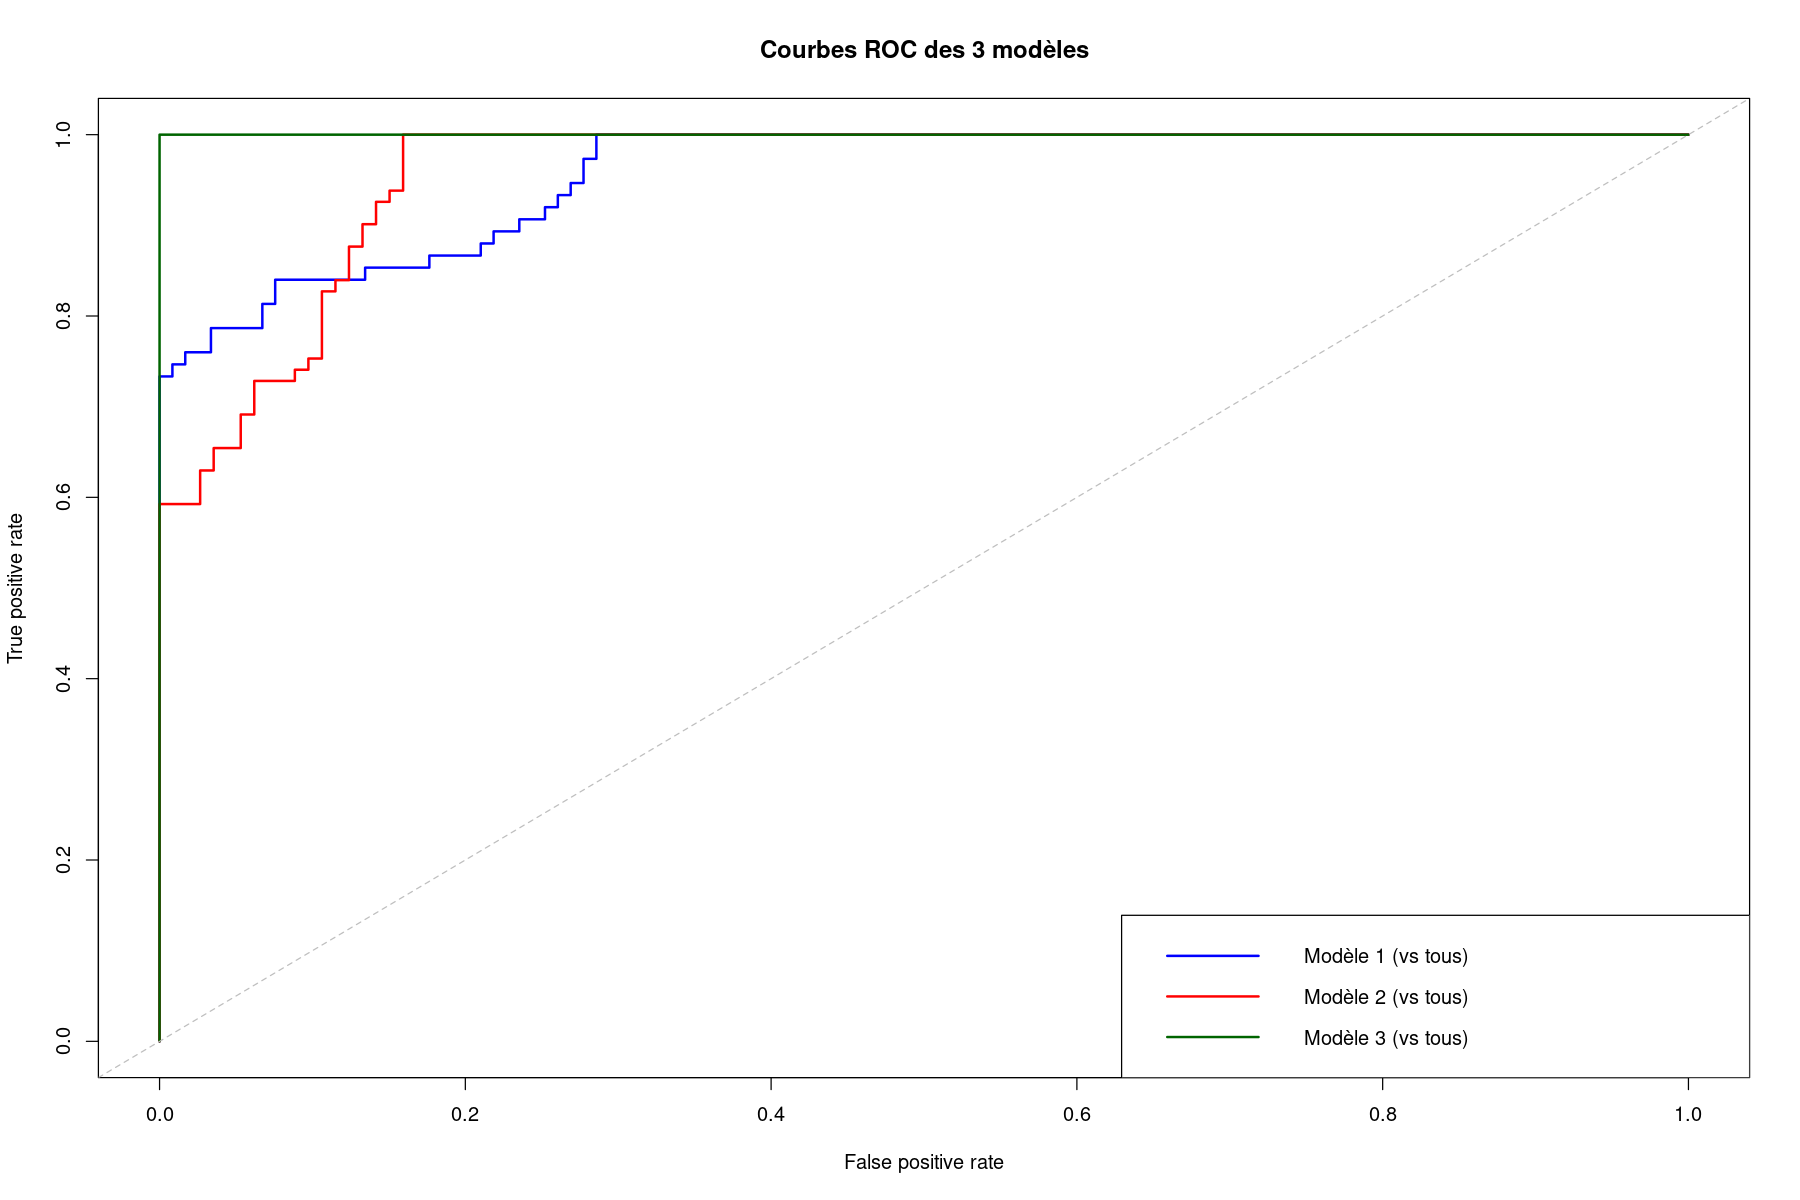

In [87]:
library(ROCR)

# Prédictions formatées
pred1 <- prediction(pred1_inter, datestq1$Y_bin)
perf1 <- performance(pred1, "tpr", "fpr")

pred2 <- prediction(pred2_inter, datestq2$Y_bin)
perf2 <- performance(pred2, "tpr", "fpr")

pred3 <- prediction(pred3_inter, datestq3$Y_bin)
perf3 <- performance(pred3, "tpr", "fpr")

# Affichage
plot(perf1, col = "blue", lwd = 2, main = "Courbes ROC des 3 modèles")
plot(perf2, col = "red", lwd = 2, add = TRUE)
plot(perf3, col = "darkgreen", lwd = 2, add = TRUE)
abline(0, 1, col = "grey", lty = 2)

legend("bottomright",
       legend = c("Modèle 1 (vs tous)", "Modèle 2 (vs tous)", "Modèle 3 (vs tous)"),
       col = c("blue", "red", "darkgreen"), lwd = 2)


In [ ]:
#Critère AUC pour comparer numériquement : Plus l'AUC est proche de 1, meilleur est le modèle.

performance(pred1, "auc")@y.values[[1]]
performance(pred2, "auc")@y.values[[1]]
performance(pred3, "auc")@y.values[[1]]

Parmis les trois modèles binaires, celui prédisant Experience_Level == 3 présente la meilleure performance. Cela suggère que les individus ayant le niveau d’expérience le plus élevé sont plus facilement distinguables par le modèle.

In [ ]:
summary(log.qm3.step)


In [ ]:
# Construction de la matrice de variables explicatives (sans l'intercept)
Xb1_train_mat <- model.matrix(Y_bin ~ . , data = datappq1)[, -1]

# Variable réponse
Y1_train_vec <- datappq1$Y_bin

# Régression Lasso avec validation croisée
library(glmnet)
cv_lasso <- cv.glmnet(Xb1_train_mat, Y1_train_vec, family = "binomial", alpha = 1)

# Récupération des coefficients pour la valeur de lambda optimale
coef_lasso <- coef(cv_lasso, s = "lambda.min")

# Conversion en data.frame
df_coef <- as.data.frame(as.matrix(coef_lasso))
df_coef$Variable <- rownames(df_coef)
colnames(df_coef)[1] <- "Coefficient"

# Filtrage des coefficients non nuls
df_coef <- subset(df_coef, Coefficient != 0)

# Affichage avec ggplot2
library(ggplot2)
ggplot(df_coef, aes(x = reorder(Variable, Coefficient), y = Coefficient)) +
  geom_bar(stat = "identity") +
  coord_flip() +
  labs(
    title = "Coefficients du modèle Lasso (niveau 1)",
    x = "Variables",
    y = "Coefficient"
  ) +
  theme_minimal()



#Modèle 2

# Construction de la matrice de variables explicatives (sans l'intercept)
Xb1_train_mat <- model.matrix(Y_bin ~ . , data = datappq2)[, -1]

# Variable réponse
Y1_train_vec <- datappq2$Y_bin

# Régression Lasso avec validation croisée
library(glmnet)
cv_lasso <- cv.glmnet(Xb1_train_mat, Y1_train_vec, family = "binomial", alpha = 1)

# Récupération des coefficients pour la valeur de lambda optimale
coef_lasso <- coef(cv_lasso, s = "lambda.min")

# Conversion en data.frame
df_coef <- as.data.frame(as.matrix(coef_lasso))
df_coef$Variable <- rownames(df_coef)
colnames(df_coef)[1] <- "Coefficient"

# Filtrage des coefficients non nuls
df_coef <- subset(df_coef, Coefficient != 0)

# Affichage avec ggplot2
library(ggplot2)
ggplot(df_coef, aes(x = reorder(Variable, Coefficient), y = Coefficient)) +
  geom_bar(stat = "identity") +
  coord_flip() +
  labs(
    title = "Coefficients du modèle Lasso (niveau 1)",
    x = "Variables",
    y = "Coefficient"
  ) +
  theme_minimal()



#Modèle 3


# Construction de la matrice de variables explicatives (sans l'intercept)
Xb1_train_mat <- model.matrix(Y_bin ~ . , data = datappq3)[, -1]

# Variable réponse
Y1_train_vec <- datappq3$Y_bin

# Régression Lasso avec validation croisée
library(glmnet)
cv_lasso <- cv.glmnet(Xb1_train_mat, Y1_train_vec, family = "binomial", alpha = 1)

# Récupération des coefficients pour la valeur de lambda optimale
coef_lasso <- coef(cv_lasso, s = "lambda.min")

# Conversion en data.frame
df_coef <- as.data.frame(as.matrix(coef_lasso))
df_coef$Variable <- rownames(df_coef)
colnames(df_coef)[1] <- "Coefficient"

# Filtrage des coefficients non nuls
df_coef <- subset(df_coef, Coefficient != 0)

# Affichage avec ggplot2
library(ggplot2)
ggplot(df_coef, aes(x = reorder(Variable, Coefficient), y = Coefficient)) +
  geom_bar(stat = "identity") +
  coord_flip() +
  labs(
    title = "Coefficients du modèle Lasso (niveau 1)",
    x = "Variables",
    y = "Coefficient"
  ) +
  theme_minimal()


Ce code Lasso sert à identifier quelles variables explicatives ont le plus d’influence pour prédire si un individu appartient (ou non) au niveau d’expérience 1, 2 ou 3 (pour le modèle 1, 2 ou3). En effet, Le Lasso réalise une sélection automatique des variables importantes en mettant certains coefficients à zéro. Il retire donc les variables non pertinentes, et conserve seulement celles qui ont un impact fort sur la prédiction.

In [88]:
conf1 <- table(pred1_inter > 0.5, datestq1$Y_bin)

TP1 <- conf1["TRUE", "1"]
TN1 <- conf1["FALSE", "0"]
FP1 <- conf1["TRUE", "0"]
FN1 <- conf1["FALSE", "1"]

accuracy1 <- (TP1 + TN1) / sum(conf1)
error1 <- 1 - accuracy1
recall1 <- TP1 / (TP1 + FN1)
specificity1 <- TN1 / (TN1 + FP1)

conf2 <- table(pred2_inter > 0.5, datestq2$Y_bin)

TP2 <- conf2["TRUE", "1"]
TN2 <- conf2["FALSE", "0"]
FP2 <- conf2["TRUE", "0"]
FN2 <- conf2["FALSE", "1"]

accuracy2 <- (TP2 + TN2) / sum(conf2)
error2 <- 1 - accuracy2
recall2 <- TP2 / (TP2 + FN2)
specificity2 <- TN2 / (TN2 + FP2)

conf3 <- table(pred3_inter > 0.5, datestq3$Y_bin)

TP3 <- conf3["TRUE", "1"]
TN3 <- conf3["FALSE", "0"]
FP3 <- conf3["TRUE", "0"]
FN3 <- conf3["FALSE", "1"]

accuracy3 <- (TP3 + TN3) / sum(conf3)
error3 <- 1 - accuracy3
recall3 <- TP3 / (TP3 + FN3)
specificity3 <- TN3 / (TN3 + FP3)


cat("Precision modèle 1 : " , accuracy1*100, "%", "\n")
cat("Precision modèle 2 : " , accuracy2*100,"%", "\n")
cat("Precision modèle 3 : " , accuracy3*100,"%", "\n")



Precision modèle 1 :  88.14433 % 
Precision modèle 2 :  86.59794 % 
Precision modèle 3 :  100 % 


## 3.3 Analyse discriminante

In [89]:
library(MASS) # chargement des librairies
library(class) # pour kNN

LDA, QDA et kNN fonctionne bien pour des classes multiples, pas besoin de transformer en binaire. On doit évidemment enlever la variable cible Experience_Level

In [90]:
library(caret)
library(pROC)
library(ggplot2)

In [94]:
X_train <- datappq0[, setdiff(names(datappq0), "Experience_Level")]
y_train <- datappq0$Experience_Level

# analyse discriminante linéaire
disc.lda=lda(Experience_Level~.,data=datappq0) 
# analyse discriminante quadratique 
#disc.qda=qda(Experience_Level~.,data=datappq0) 
# k plus proches voisins
disc.knn=knn(X_train,X_train,y_train,k=10) 

Warning message in knn(X_train, X_train, y_train, k = 10):
“NAs introduits lors de la conversion automatique”
Warning message in knn(X_train, X_train, y_train, k = 10):
“NAs introduits lors de la conversion automatique”


ERROR: Error in knn(X_train, X_train, y_train, k = 10): NA/NaN/Inf dans un appel à une fonction externe (argument 6)


ASKIP QDA NE MARCHE PAS PAS ASSEZ DE VARIBLE CLASSE 1 DANS L'ECHANTILLON

In [92]:
library(caret)
lda.fit<-train(Experience_Level~.,data=datappq0,method="lda")
#qda.fit<-train(Experience_Level~.,data=datappq0,method="qda")
knn.fit<-train(Experience_Level~.,data=datappq0,method="knn")

Warning message:
“model fit failed for Resample01: parameter=none Error in qda.default(x, grouping, ...) : groupe 1 n'est pas de rang plein
”
Warning message:
“model fit failed for Resample02: parameter=none Error in qda.default(x, grouping, ...) : groupe 1 n'est pas de rang plein
”
Warning message:
“model fit failed for Resample03: parameter=none Error in qda.default(x, grouping, ...) : groupe 1 n'est pas de rang plein
”
Warning message:
“model fit failed for Resample04: parameter=none Error in qda.default(x, grouping, ...) : groupe 1 n'est pas de rang plein
”
Warning message:
“model fit failed for Resample05: parameter=none Error in qda.default(x, grouping, ...) : groupe 1 n'est pas de rang plein
”
Warning message:
“model fit failed for Resample06: parameter=none Error in qda.default(x, grouping, ...) : groupe 1 n'est pas de rang plein
”
Warning message:
“model fit failed for Resample07: parameter=none Error in qda.default(x, grouping, ...) : groupe 1 n'est pas de rang plein
”
Warnin

Something is wrong; all the Accuracy metric values are missing:
    Accuracy       Kappa    
 Min.   : NA   Min.   : NA  
 1st Qu.: NA   1st Qu.: NA  
 Median : NA   Median : NA  
 Mean   :NaN   Mean   :NaN  
 3rd Qu.: NA   3rd Qu.: NA  
 Max.   : NA   Max.   : NA  
 NA's   :1     NA's   :1    


ERROR: Error: Stopping


In [ ]:
pred_lda <- predict(lda.fit, newdata = datestq0)
pred_qda <- predict(qda.fit, newdata = datestq0)
pred_knn <- predict(knn.fit, newdata = datestq0)

In [ ]:
conf_lda <- confusionMatrix(pred_lda, datestq0$Experience_Level)
conf_qda <- confusionMatrix(pred_qda, datestq0$Experience_Level)
conf_knn <- confusionMatrix(pred_knn, datestq0$Experience_Level)

cat("Précision LDA :", round(conf_lda$overall["Accuracy"] * 100, 2), "%\n")
cat("Précision QDA :", round(conf_qda$overall["Accuracy"] * 100, 2), "%\n")
cat("Précision k-NN :", round(conf_knn$overall["Accuracy"] * 100, 2), "%\n")


## 3.4 SVM

Best parameters : cost = 3 , gamma = 0.03 



Call:
svm(formula = Experience_Level ~ ., data = datappq0, cost = best_cost, 
    gamma = best_gamma, kernel = "radial", probability = TRUE)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  3 

Number of Support Vectors:  374

 ( 21 192 161 )


Number of Classes:  3 

Levels: 
 1 2 3




          Réalité
Prediction  1  2  3
         1 57  5  0
         2 18 76  0
         3  0  0 38


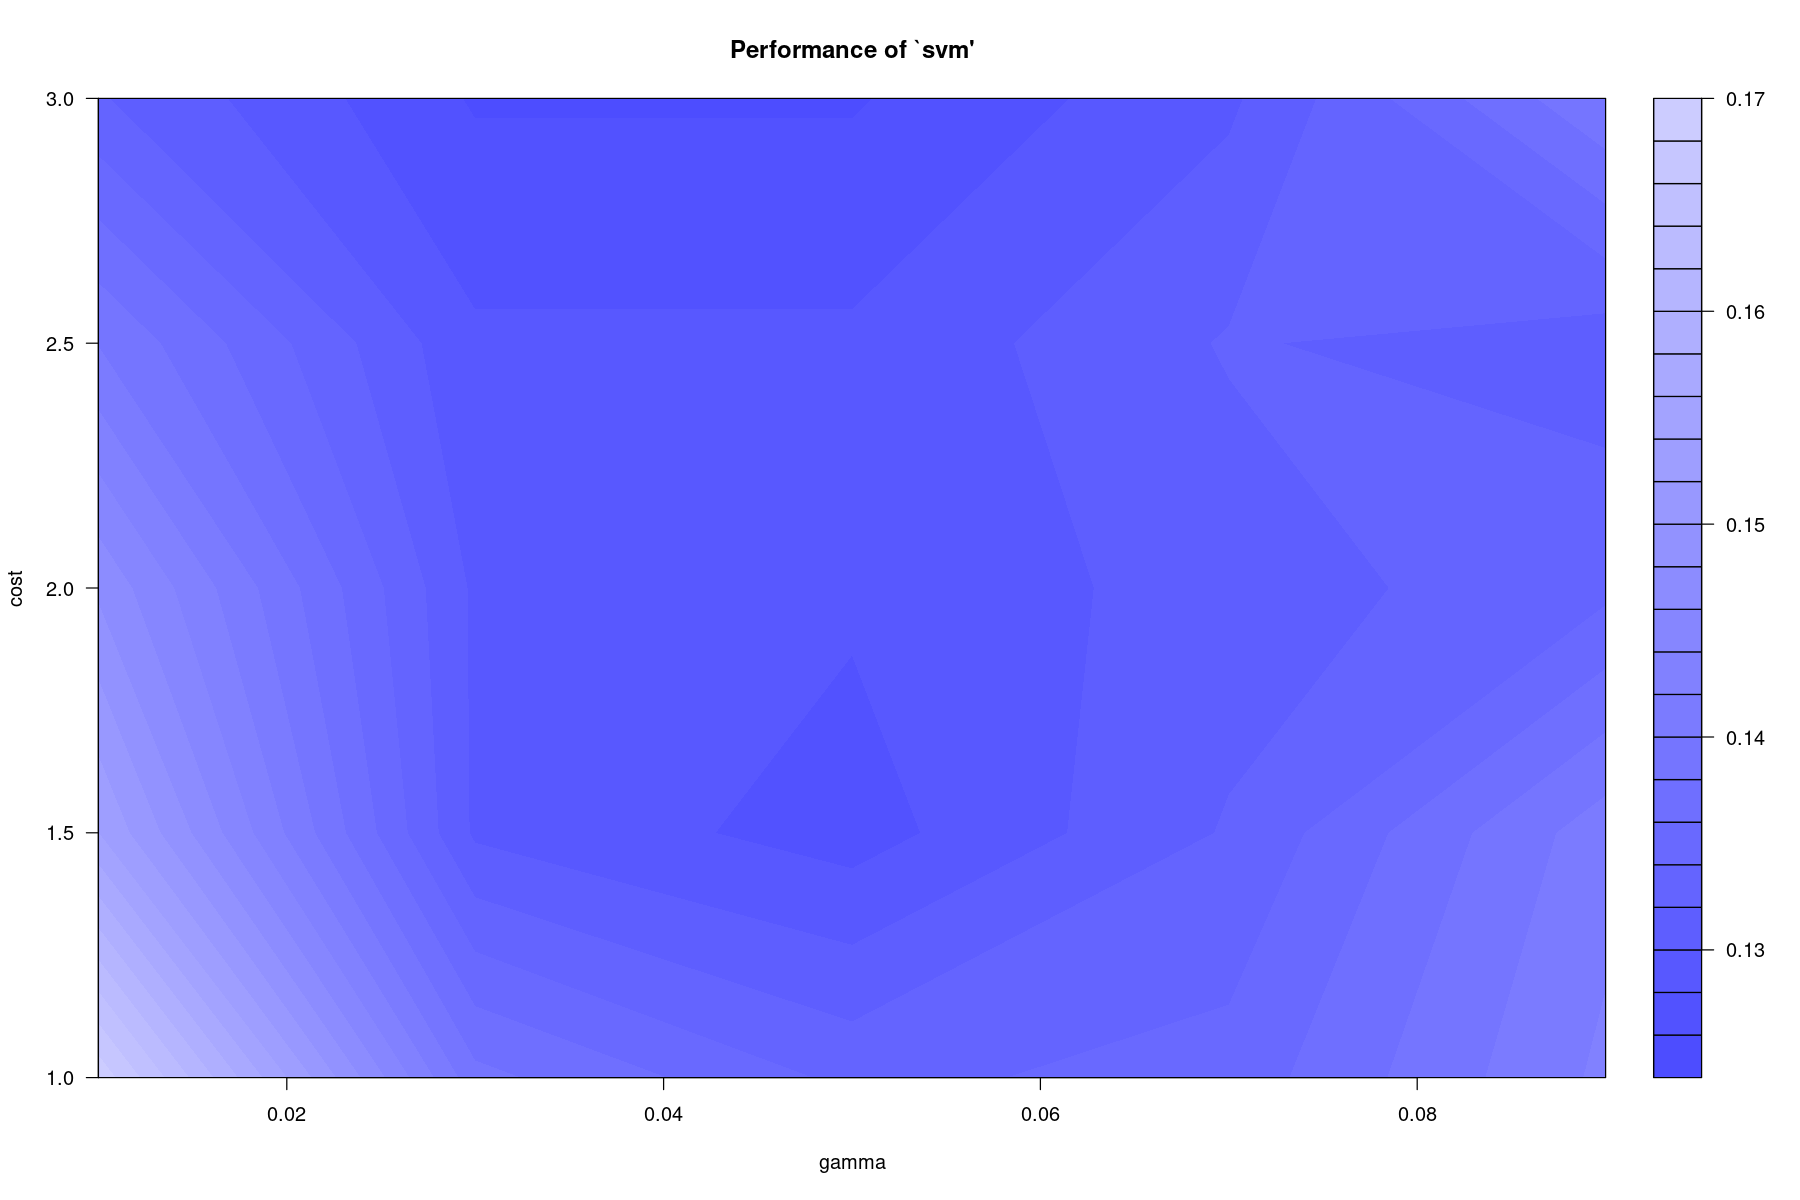

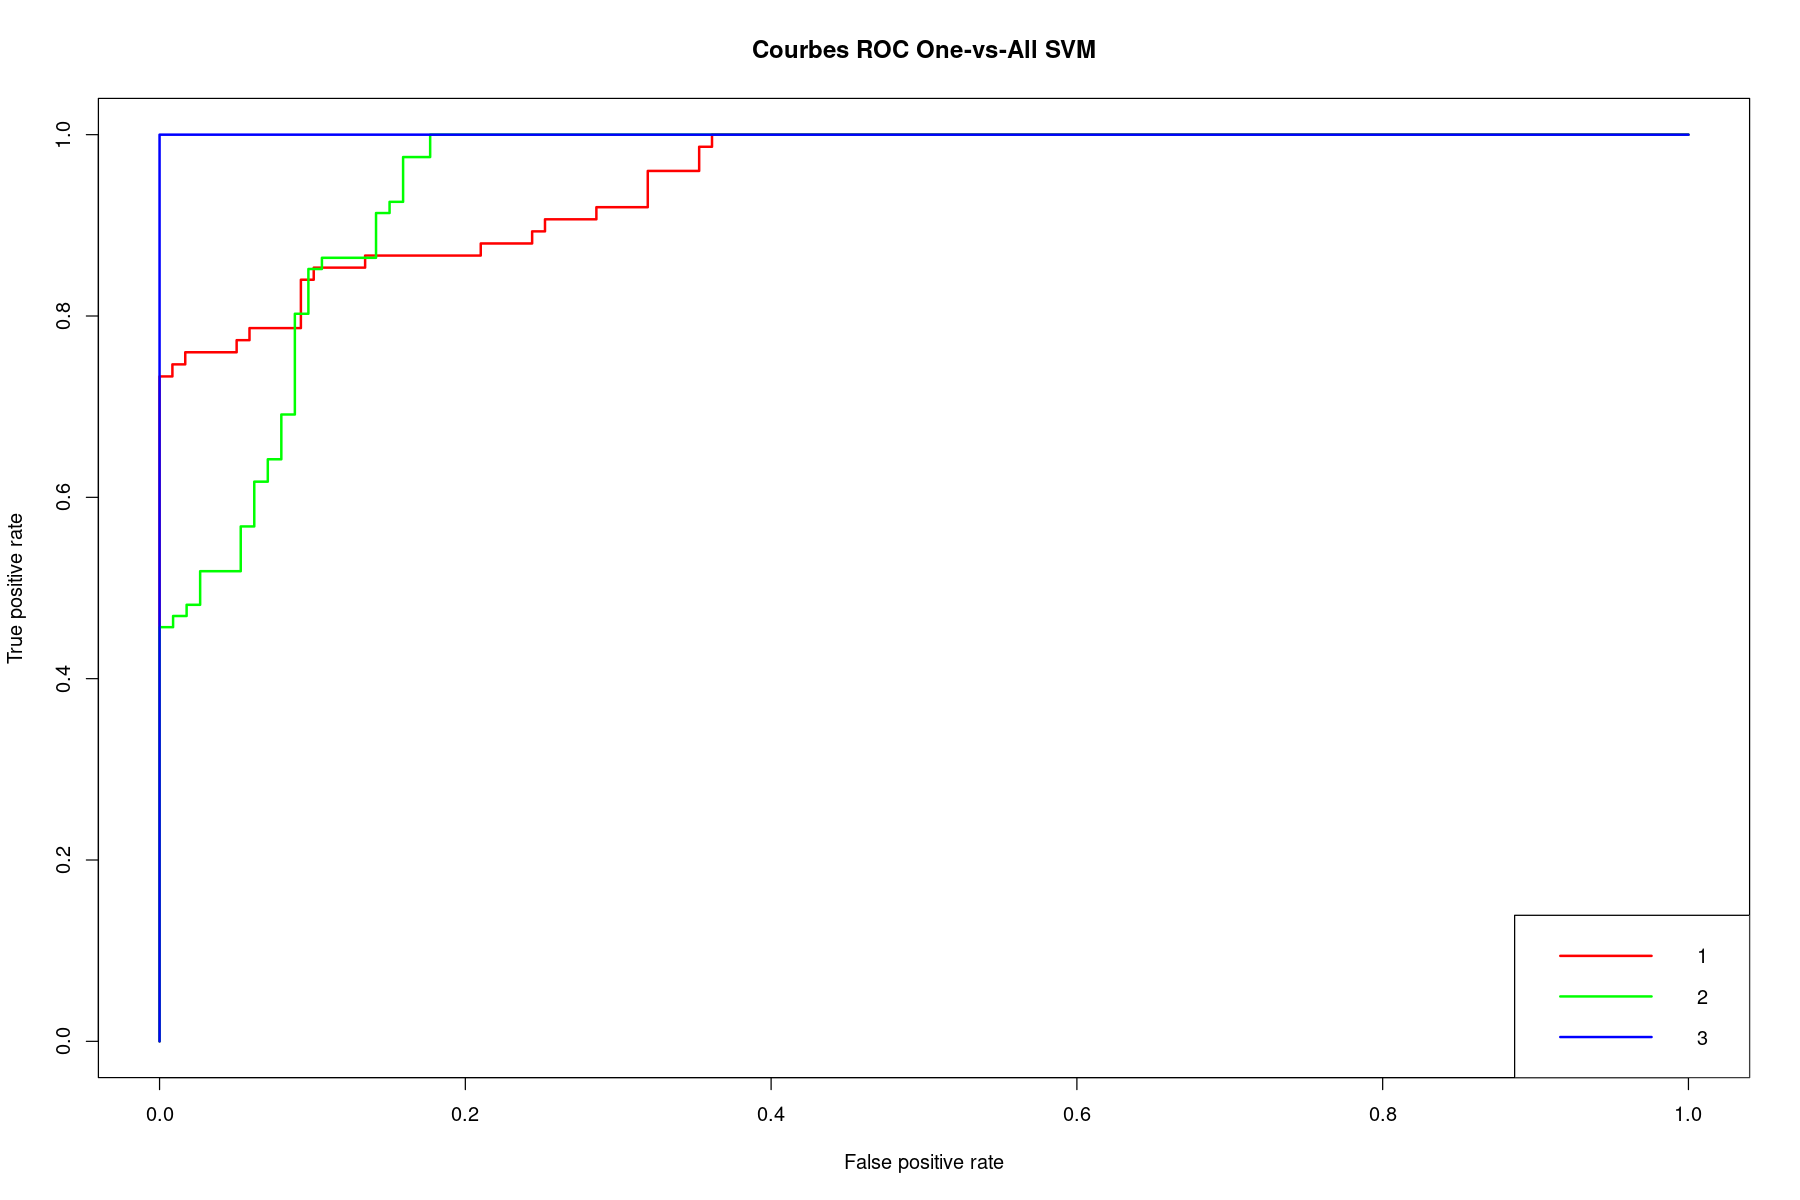

In [95]:
library(e1071)
library(ROCR)
library(ggplot2)

# 1. Tuning des hyperparamètres SVM sur l'échantillon d'entraînement
set.seed(2027)
svm.tune <- tune.svm(
  Experience_Level ~ .,
  data = datappq0,
  cost = seq(1, 3, by = 0.5),
  gamma = seq(0.01, 0.1, by = 0.02),
  kernel = "radial"
)
plot(svm.tune)
best_cost <- svm.tune$best.parameters$cost
best_gamma <- svm.tune$best.parameters$gamma
cat("Best parameters : cost =", best_cost, ", gamma =", best_gamma, "\n")

# 2. Entraînement du modèle SVM avec meilleurs paramètres
svm.model <- svm(
  Experience_Level ~ .,
  data = datappq0,
  cost = best_cost,
  gamma = best_gamma,
  kernel = "radial",
  probability = TRUE
)
summary(svm.model)

# 3. Prédiction sur l'échantillon test (classes + probabilités)
svm.pred.class <- predict(svm.model, newdata = datestq0)
svm.pred.prob <- predict(svm.model, newdata = datestq0, probability = TRUE)
svm.probs <- attr(svm.pred.prob, "probabilities")

# 4. Matrice de confusion
conf.mat <- table(Prediction = svm.pred.class, Réalité = datestq0$Experience_Level)
print(conf.mat)

# 5. Calcul et tracé de la courbe ROC pour chaque classe (multiclass)
# Créons une courbe ROC pour chaque niveau de Experience_Level en mode one-vs-all

# Fonction pour calculer ROC d’une classe vs le reste
plot_multiclass_roc <- function(true_labels, prob_matrix, classes) {
  roc_list <- list()
  for (cls in classes) {
    labels_bin <- as.numeric(true_labels == cls)
    pred <- prediction(prob_matrix[, cls], labels_bin)
    perf <- performance(pred, "tpr", "fpr")
    roc_list[[cls]] <- perf
  }
  
  # Tracé
  colors <- rainbow(length(classes))
  plot(roc_list[[1]], col = colors[1], main = "Courbes ROC One-vs-All SVM", lwd=2)
  for (i in 2:length(classes)) {
    plot(roc_list[[i]], col = colors[i], add = TRUE, lwd=2)
  }
  legend("bottomright", legend=classes, col=colors, lwd=2)
}

# Classes présentes
classes <- levels(datestq0$Experience_Level)
plot_multiclass_roc(datestq0$Experience_Level, svm.probs, classes)


Avec le graphe de performance, on prend comme paramètre optimal gamma=0.03 et cost=1.5
Il y a 3 courbes ROC chacune associée a un niveau d'Experience_Level.
On pourrait calculer une AUC moyenne globale pour synthétiser la performance, mais la visualisation sera toujours multiple.

In [96]:
conf.mat <- table(Prediction = svm.pred.class, Réalité = datestq0$Experience_Level)

# Précision (rappel) par classe = vrais positifs / total des vrais exemples par classe
precision_par_classe <- diag(conf.mat) / colSums(conf.mat)

# Afficher les résultats
precision_par_classe

# Si tu veux un tableau plus clair
precision_df <- data.frame(
  Experience_Level = names(precision_par_classe),
  Precision = as.numeric(precision_par_classe)
)
print(precision_df)

1         2         3 
0.7600000 0.9382716 1.0000000

  Experience_Level Precision
1                1 0.7600000
2                2 0.9382716
3                3 1.0000000


## 3.5 Arbre optimal Cart

In [122]:
library(rpart)
library(rpart.plot)


In [117]:
set.seed(3)
# Arbre de classification pour prédire Experience_Level
cart.full <- rpart(Experience_Level ~ ., data = datappq0, method = "class", cp = 0.001)


Classification tree:
rpart(formula = Experience_Level ~ ., data = datappq0, method = "class", 
    cp = 0.001)

Variables actually used in tree construction:
[1] Calories_Burned               Fat_Percentage               
[3] Height..m.                    LWeight..kg.                 
[5] Max_BPM                       Session_Duration..hours.     
[7] Workout_Frequency..days.week.

Root node error: 454/779 = 0.5828

n= 779 

         CP nsplit rel error  xerror     xstd
1 0.3436123      0   1.00000 1.00000 0.030314
2 0.1453744      2   0.31278 0.36784 0.025230
3 0.0038546      3   0.16740 0.16960 0.018348
4 0.0022026     14   0.10793 0.21145 0.020208
5 0.0010000     15   0.10573 0.22467 0.020738


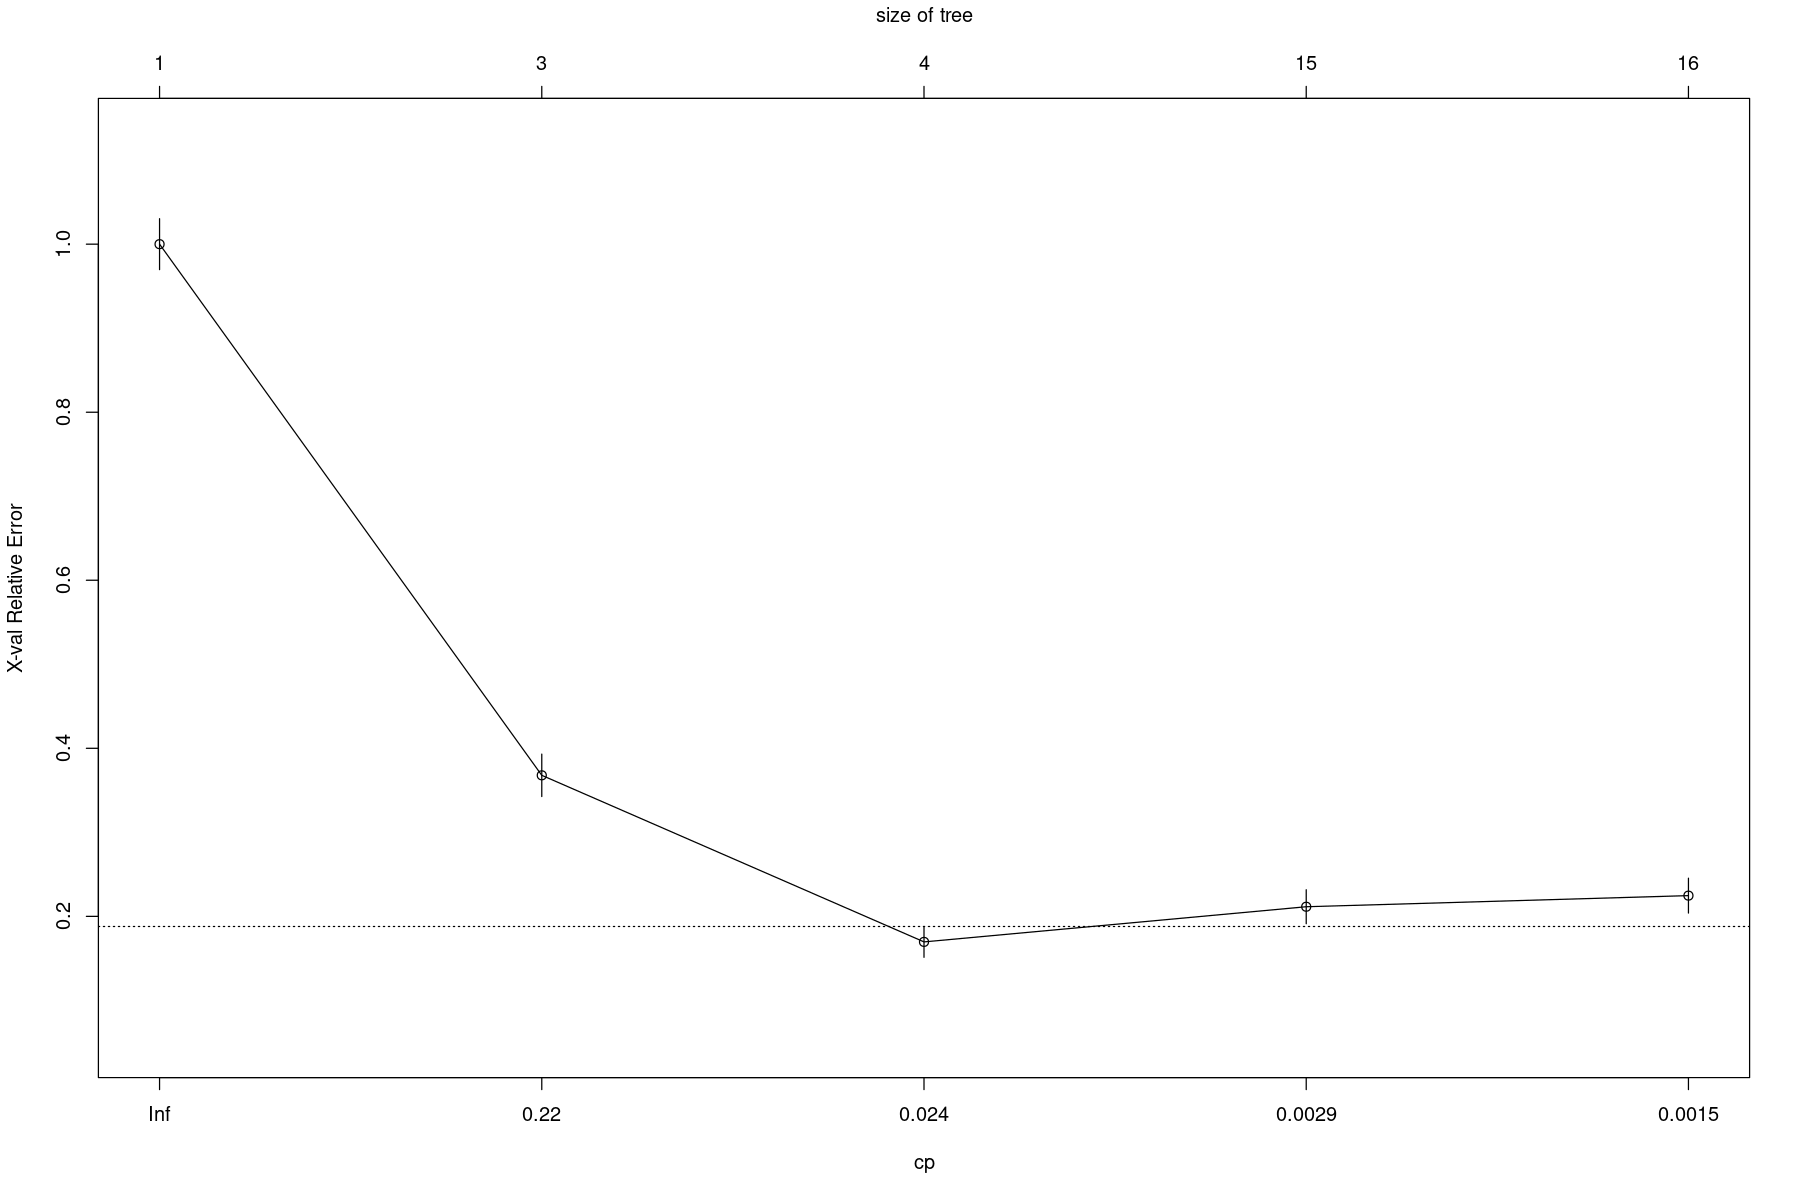

In [118]:
set.seed(4)
printcp(cart.full)  # Affiche la cross-validation error selon cp
plotcp(cart.full)   # Trace la courbe de complexité

In [119]:
set.seed(5)
# cp optimal : celui avec la plus petite erreur xerror
best_cp <- cart.full$cptable[which.min(cart.full$cptable[, "xerror"]), "CP"]

# Arbre élagué (pruned)
cart.pruned <- prune(cart.full, cp = 0.024)



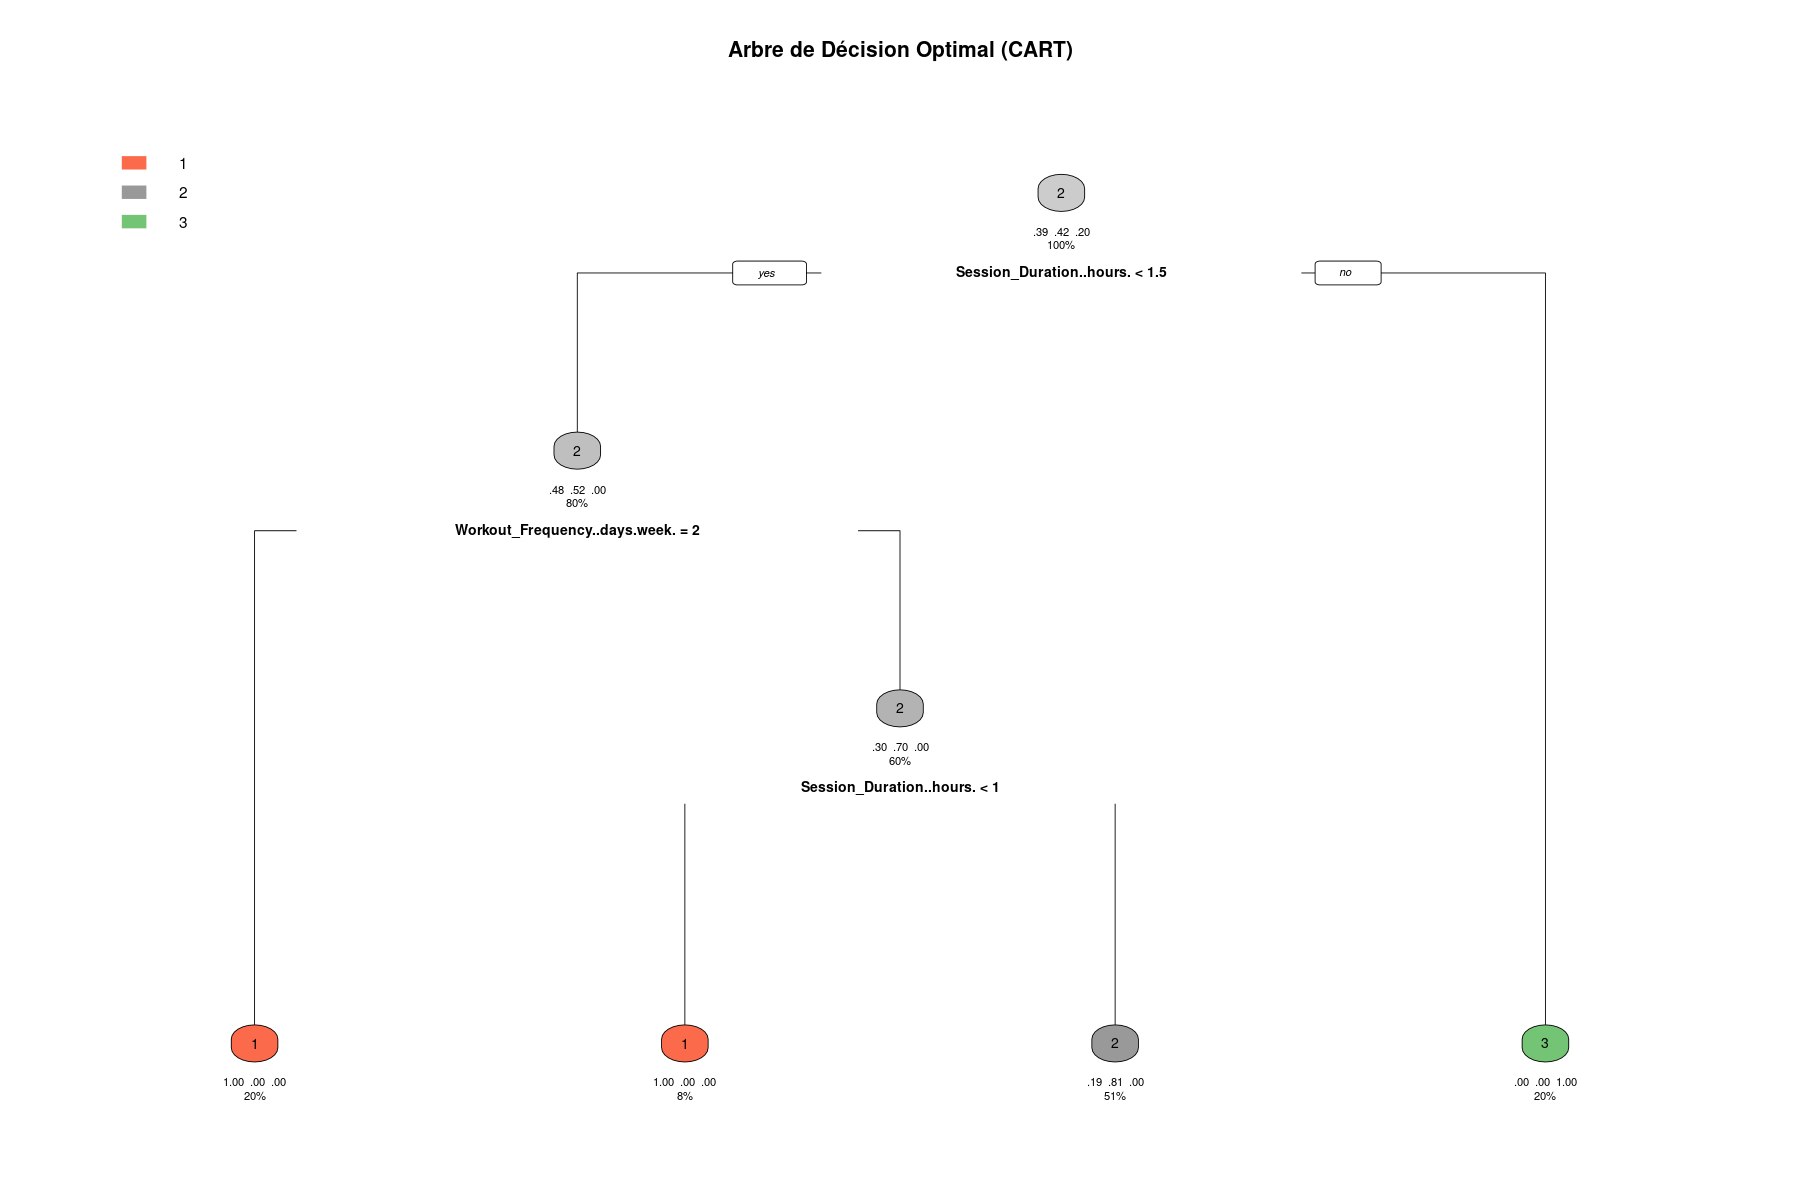

In [132]:
set.seed(6)
rpart.plot(cart.pruned, type = 2, extra = 104, under = TRUE, cex = 0.7, main = "Arbre de Décision Optimal (CART)")

In [133]:
pred.cart <- predict(cart.pruned, newdata = datestq0, type = "class")
table(Prediction = pred.cart, Réalité = datestq0$Experience_Level)

          Réalité
Prediction  1  2  3
         1 57  0  0
         2 18 81  0
         3  0  0 38

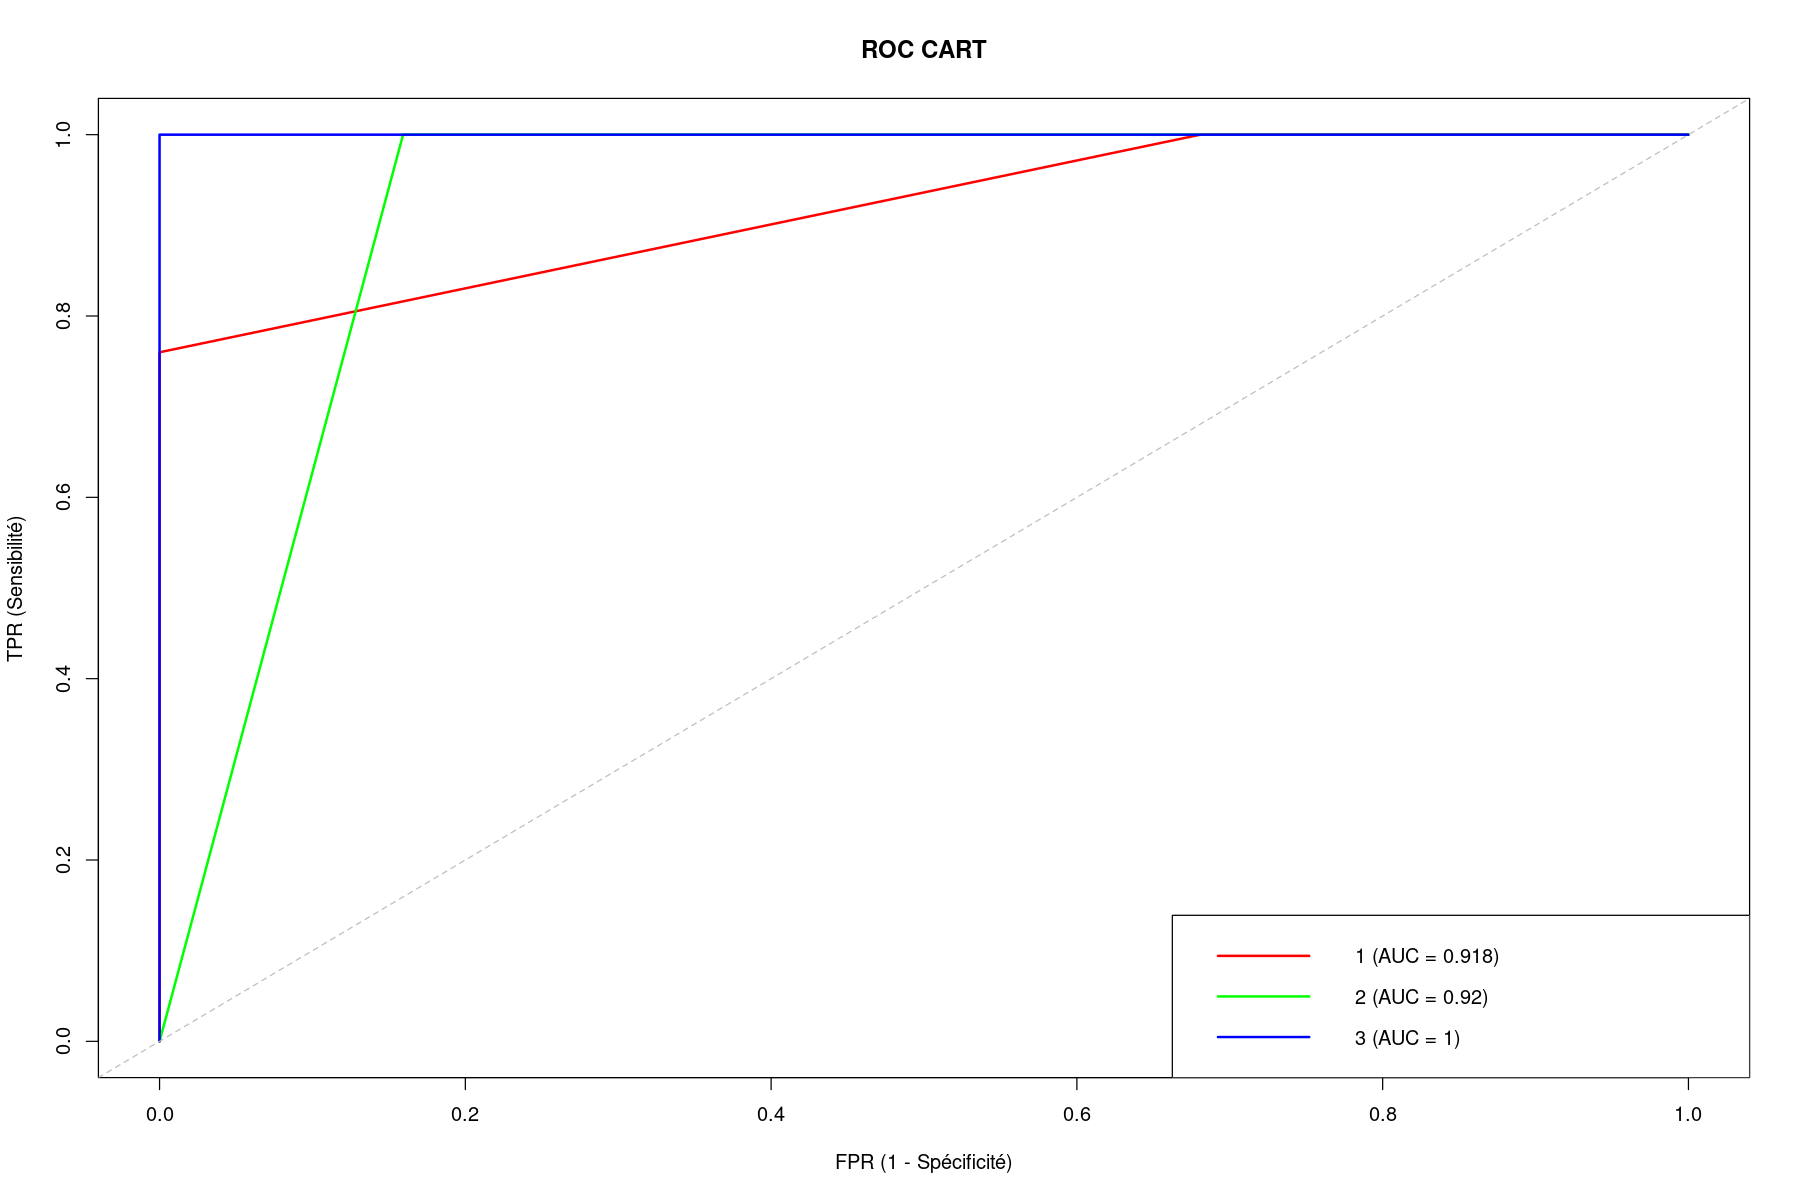

In [134]:
# Probabilités pour chaque classe sur l'échantillon test
cart.probs <- predict(cart.pruned, newdata = datestq0, type = "prob")
plot_multiclass_roc(datestq0$Experience_Level, cart.probs, title = "ROC CART")

## 3.6 Random Forest

In [108]:
library(randomForest)

In [109]:
set.seed(1)
rf.model <- randomForest(Experience_Level ~ ., data = datappr, ntree = 500, importance = TRUE, probability = TRUE)

✅ Meilleur mtry (plus faible taux d'erreur): 6 


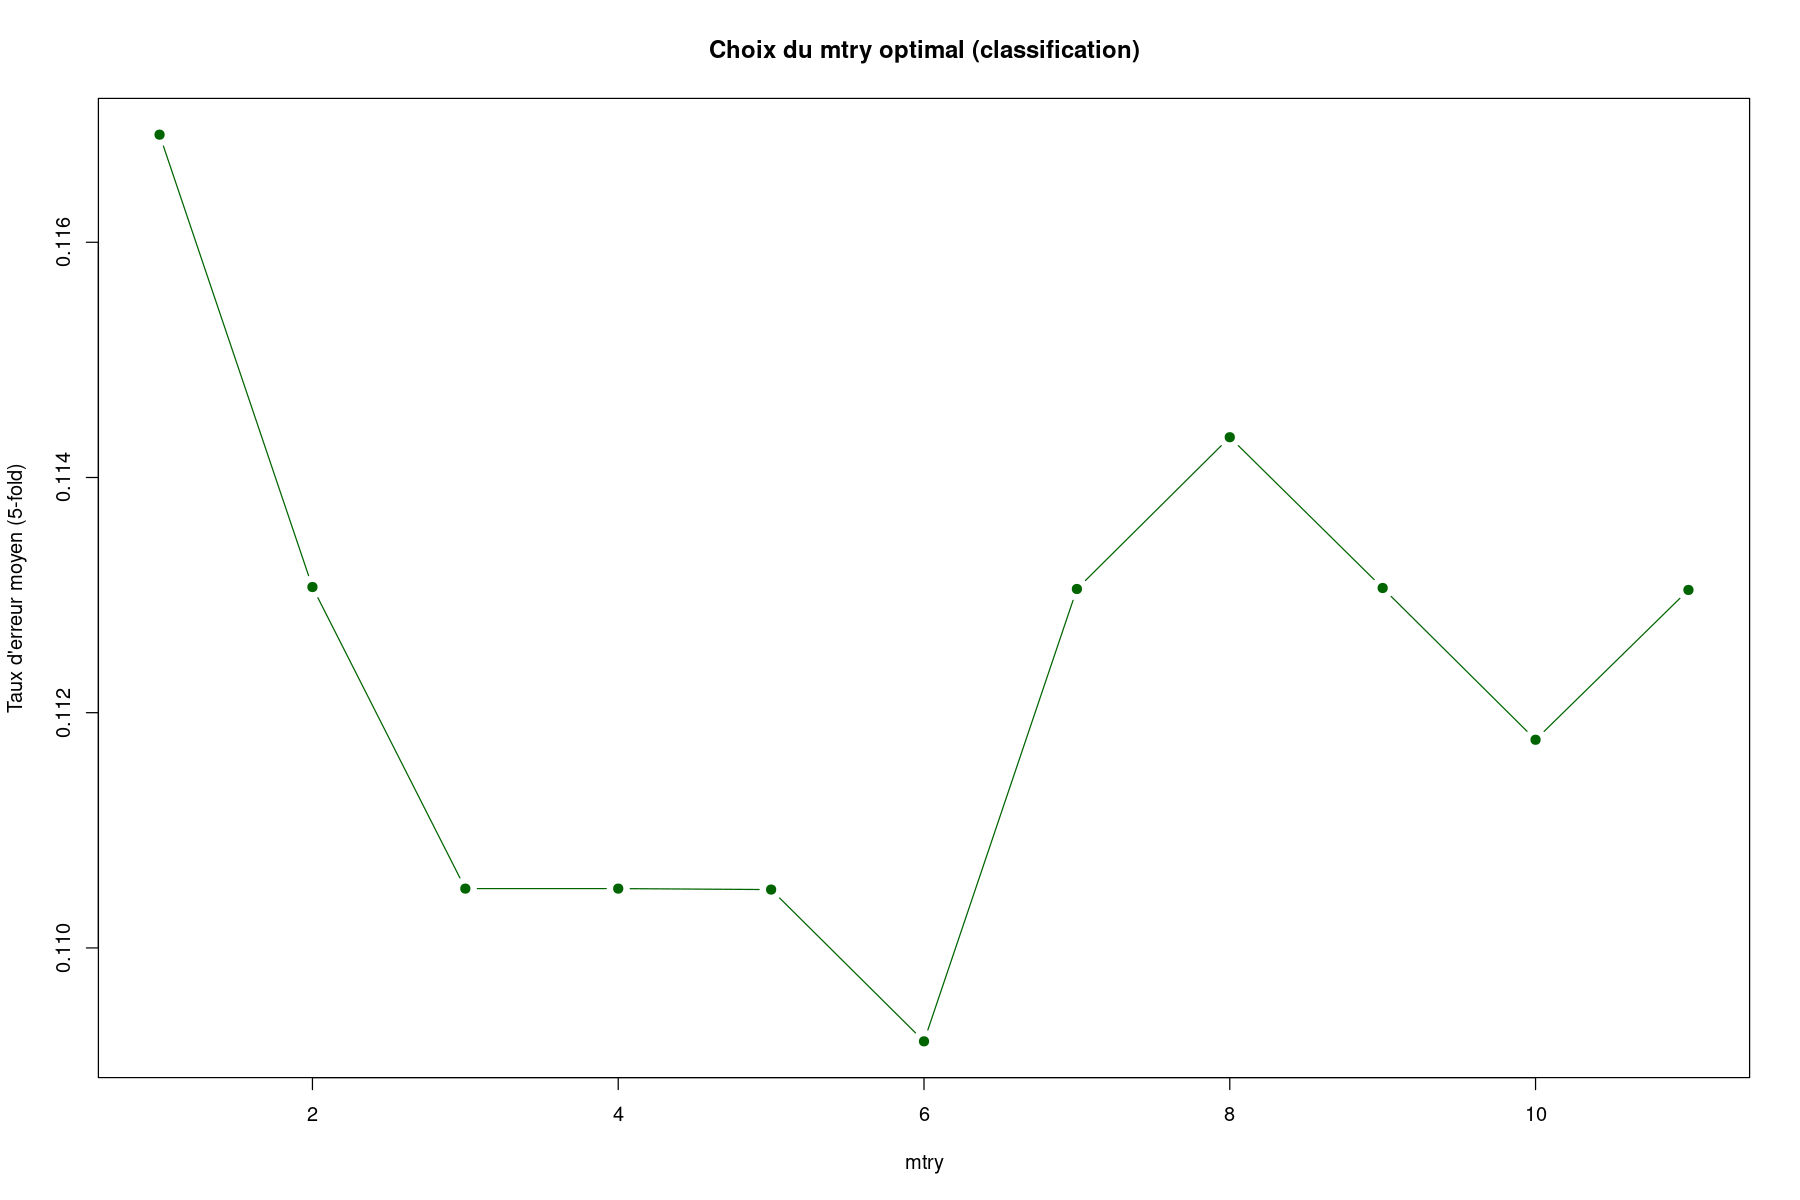

In [116]:
set.seed(2)
# Choix des valeurs à tester
mtry_vals <- 1:(11)  # -1 car on exclut Experience_Level
k <- 5  # nombre de folds
folds <- sample(rep(1:k, length.out = nrow(datappq0)))

# Vecteur pour stocker l'erreur de classification moyenne
cv_err <- numeric(length(mtry_vals))

# Boucle sur les valeurs de mtry
for (j in seq_along(mtry_vals)) {
  err_folds <- numeric(k)
  
  for (i in 1:k) {
    test_idx <- which(folds == i)
    train_data <- datappq0[-test_idx, ]
    test_data <- datappq0[test_idx, ]
    
    rf <- randomForest(Experience_Level ~ ., data = train_data,
                       mtry = mtry_vals[j], ntree = 500)
    
    preds <- predict(rf, newdata = test_data)
    err_folds[i] <- mean(preds != test_data$Experience_Level)  # taux d'erreur
  }
  
  cv_err[j] <- mean(err_folds)
}

# Afficher les résultats
plot(mtry_vals, cv_err, type = "b", pch = 19, col = "darkgreen",
     xlab = "mtry", ylab = "Taux d'erreur moyen (5-fold)",
     main = "Choix du mtry optimal (classification)")

# Affichage du meilleur mtry
best_mtry <- mtry_vals[which.min(cv_err)]
cat("✅ Meilleur mtry (plus faible taux d'erreur):", best_mtry, "\n")

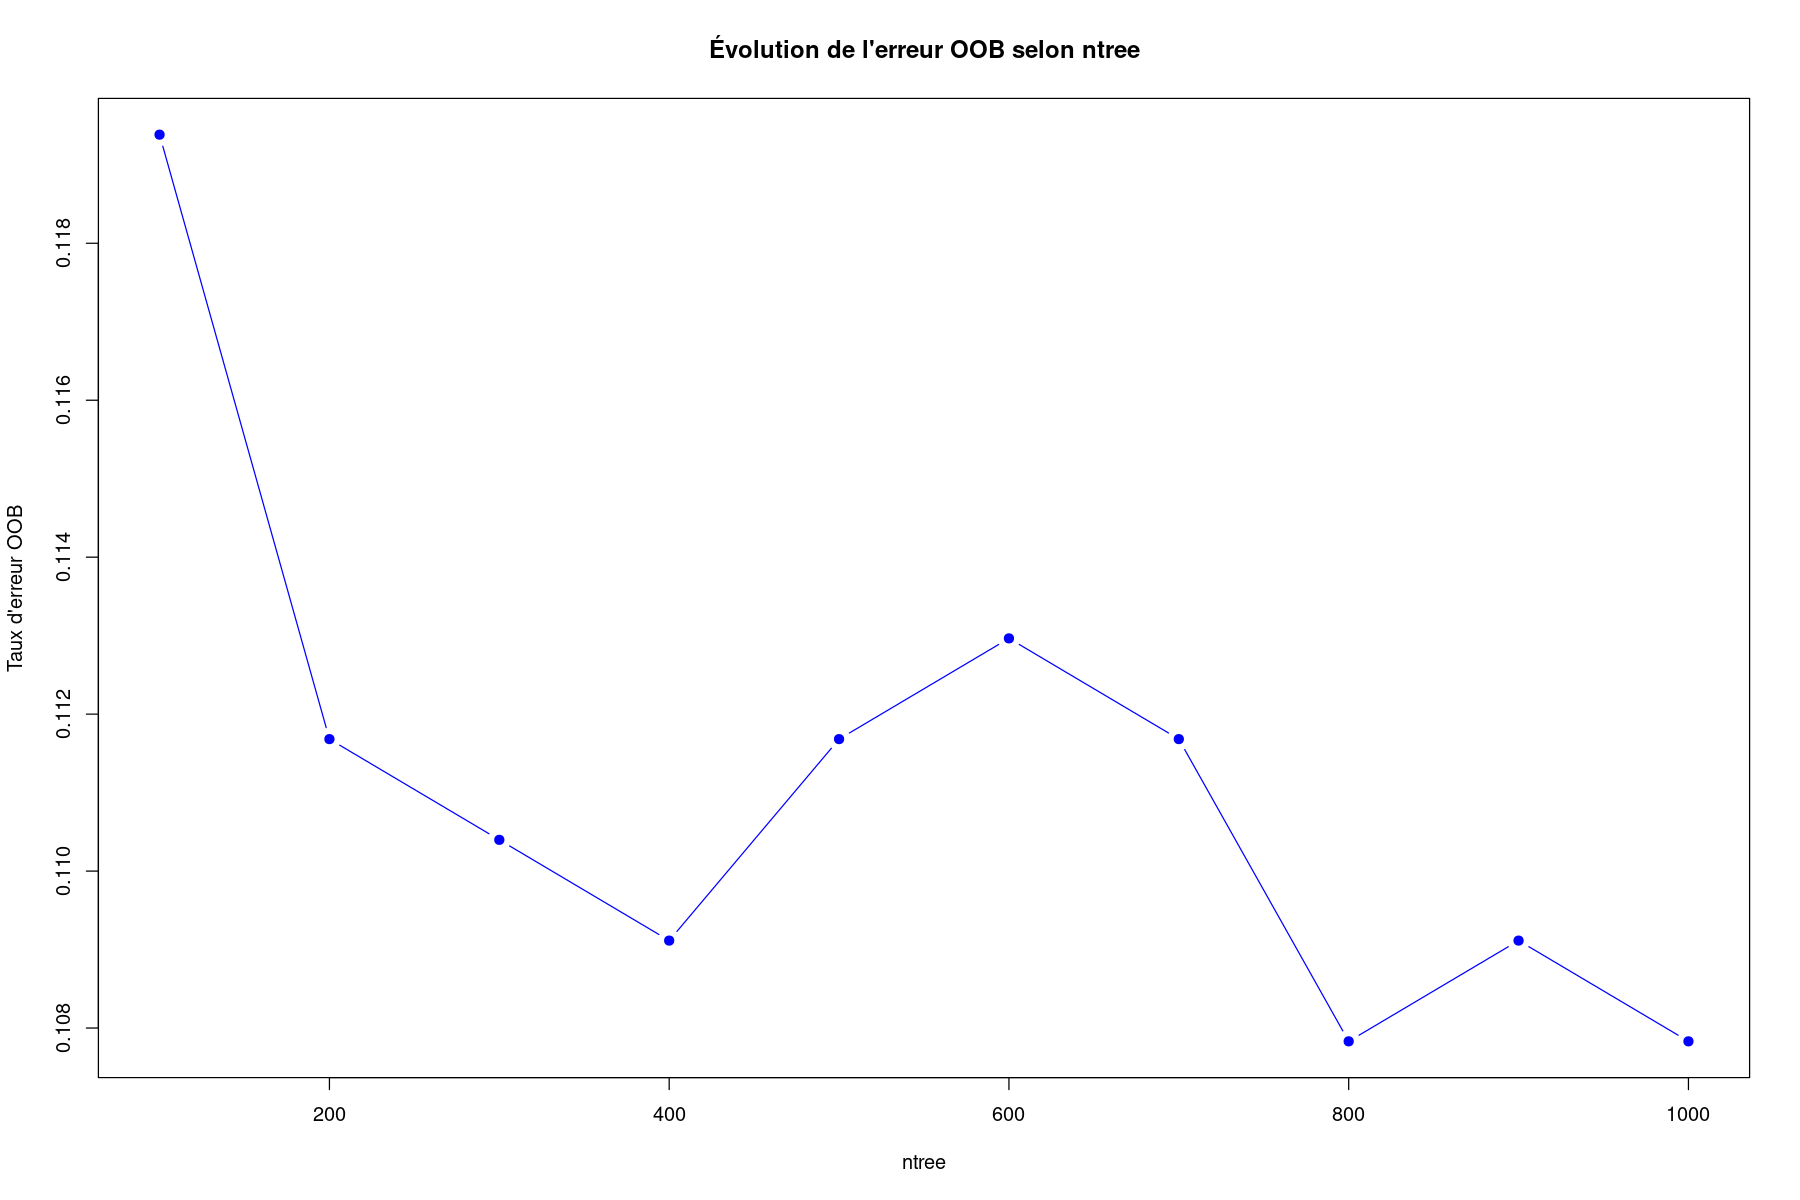

In [129]:
set.seed(8)
tree_vals <- seq(100, 1000, by = 100)
err_vals <- numeric(length(tree_vals))

for (i in seq_along(tree_vals)) {
  set.seed(123)
  rf <- randomForest(Experience_Level ~ ., data = datappq0,
                     mtry = 6, ntree = tree_vals[i])
  err_vals[i] <- mean(rf$err.rate[tree_vals[i], "OOB"])
}

# Visualisation
plot(tree_vals, err_vals, type = "b", pch = 19, col = "blue",
     xlab = "ntree", ylab = "Taux d'erreur OOB",
     main = "Évolution de l'erreur OOB selon ntree")

In [130]:
set.seed(9)
rf.final <- randomForest(Experience_Level ~ ., data = datappq0,
                         mtry = 6, ntree = 800, importance = TRUE)

print(rf.final)


Call:
 randomForest(formula = Experience_Level ~ ., data = datappq0,      mtry = 6, ntree = 800, importance = TRUE) 
               Type of random forest: classification
                     Number of trees: 800
No. of variables tried at each split: 6

        OOB estimate of  error rate: 10.91%
Confusion matrix:
    1   2   3 class.error
1 231  70   0  0.23255814
2  15 310   0  0.04615385
3   0   0 153  0.00000000


1             2             3            
Age                           -0.0030494264  0.0003956395  8.504860e-05
Gender                        -0.0003748793  0.0014849185  2.393477e-04
Height..m.                     0.0007311151 -0.0002118778  6.608994e-06
Max_BPM                        0.0016417950  0.0036896688 -5.054073e-05
Avg_BPM                       -0.0011858572  0.0022180518  3.876202e-05
Resting_BPM                   -0.0009235918 -0.0023997967  0.000000e+00
Session_Duration..hours.       0.1429363219  0.1782980728  4.521741e-01
Calories_Burned                0.0160284318  0.0171621344  7.870578e-03
Workout_Type                  -0.0014559444  0.0010951288 -5.051020e-05
Fat_Percentage                 0.0483516913  0.0646911678  3.239811e-01
Water_Intake..liters.         -0.0001484615  0.0016534706  3.278478e-02
Workout_Frequency..days.week.  0.2506798847  0.1635994529  1.050461e-01
LBMI                          -0.0018114804  0.0020845154  1.010543e-03
LWeight..kg.                  -0.0018297839  0.0007617902  7.890733e-03
                              MeanDecreaseAccuracy MeanDecreaseGini
Age                           -0.0009918205          8.2826869     
Gender                         0.0005184445          0.6648572     
Height..m.                     0.0001706345         10.2298023     
Max_BPM                        0.0021576163         10.5155435     
Avg_BPM                        0.0004733698          9.1349854     
Resting_BPM                   -0.0013879632          8.0240098     
Session_Duration..hours.       0.2182078582        154.7878236     
Calories_Burned                0.0147566675         40.6609816     
Workout_Type                  -0.0001474622          4.2209729     
Fat_Percentage                 0.1085973703         82.5942123     
Water_Intake..liters.          0.0070077755         11.9861079     
Workout_Frequency..days.week.  0.1850315480        134.9676378     
LBMI                           0.0003487403          9.8267436     
LWeight..kg.                   0.0010942123         10.5159011

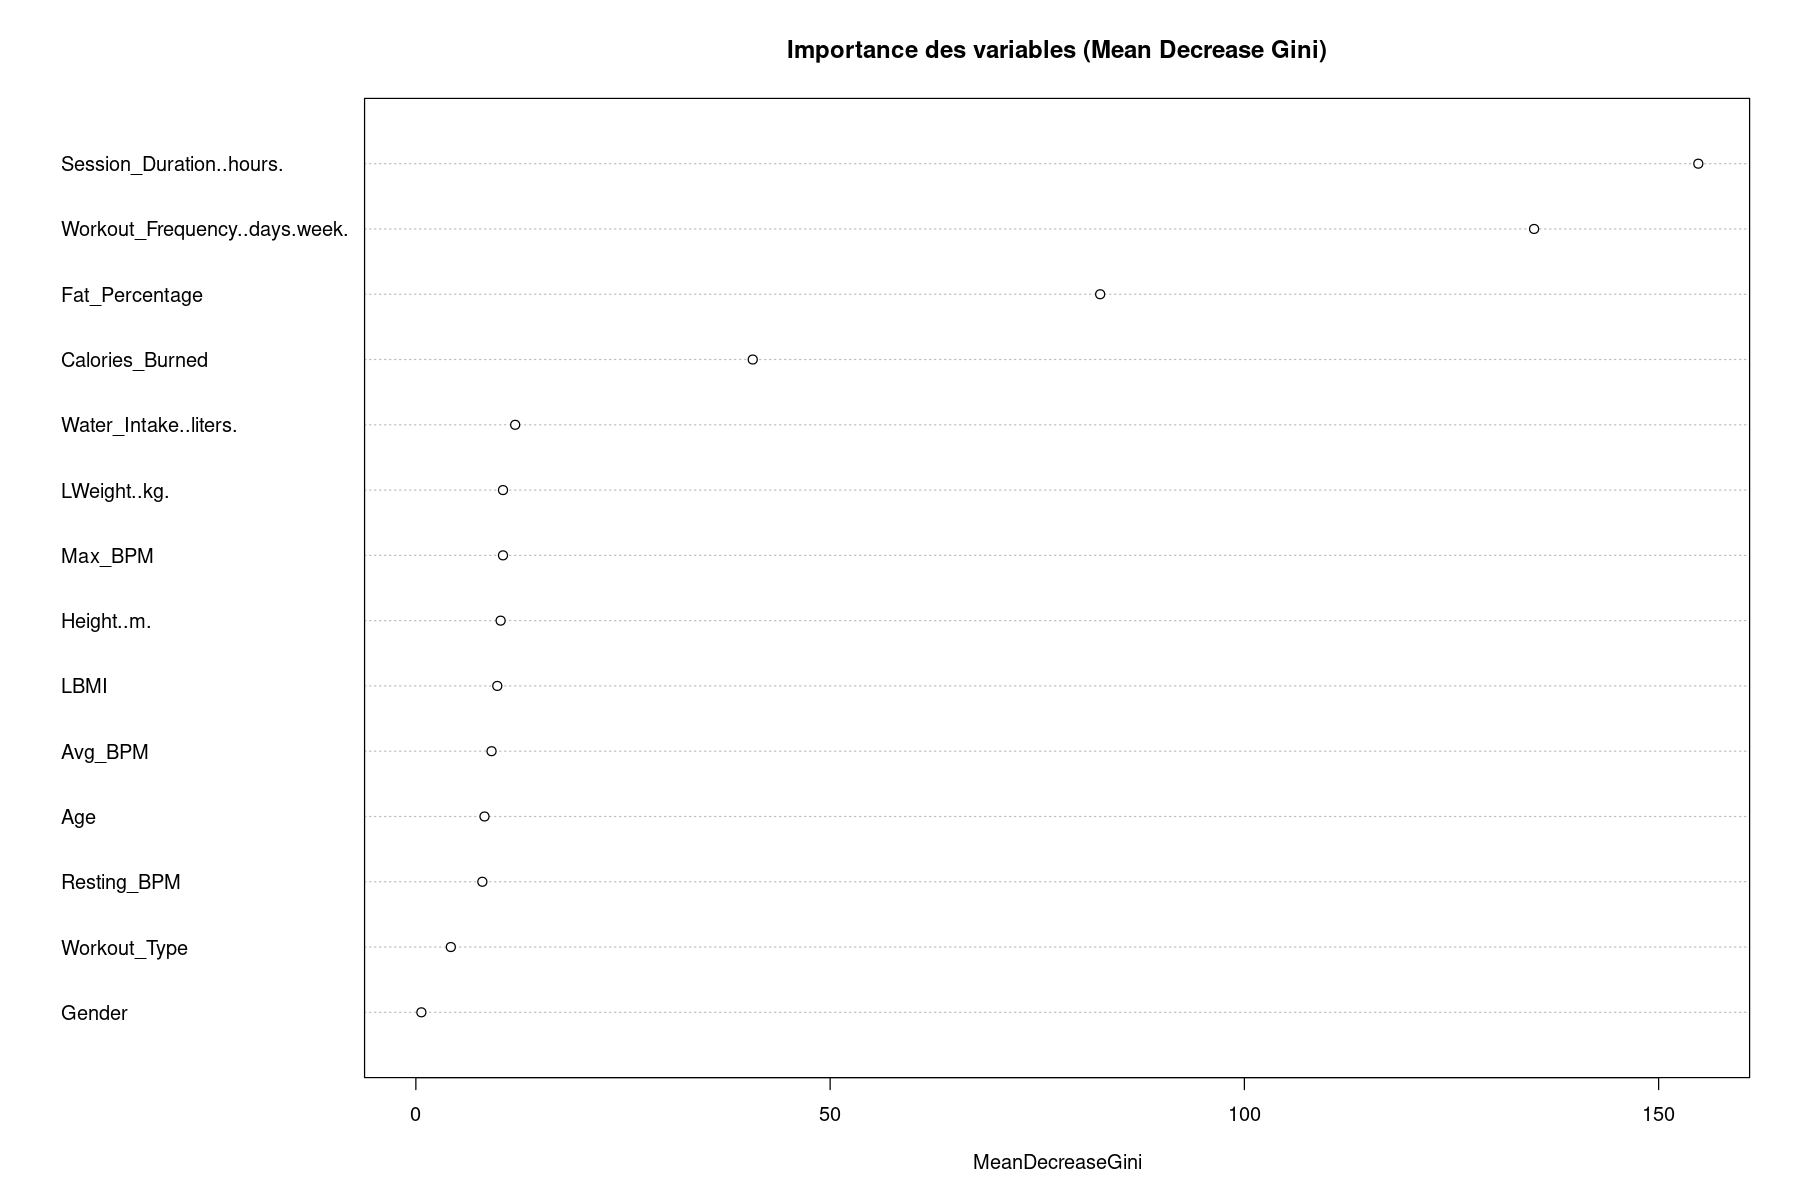

In [138]:
varImpPlot(rf.final, type = 2, main = "Importance des variables (Mean Decrease Gini)")
rf.final$importance

In [139]:
rf.pred.prob <- predict(rf.final, newdata = datestq0, type = "prob")
rf.pred.class <- predict(rf.final, newdata = datestq0, type = "response")
# Matrice de confusion
conf.mat <- table(Prediction = rf.pred.class, Réalité = datestq0$Experience_Level)
print(conf.mat)

          Réalité
Prediction  1  2  3
         1 60  0  0
         2 15 81  0
         3  0  0 38


## 3.7 Boosting

Warning message:
“Setting `distribution = "multinomial"` is ill-advised as it is currently broken. It exists only for backwards compatibility. Use at your own risk.”


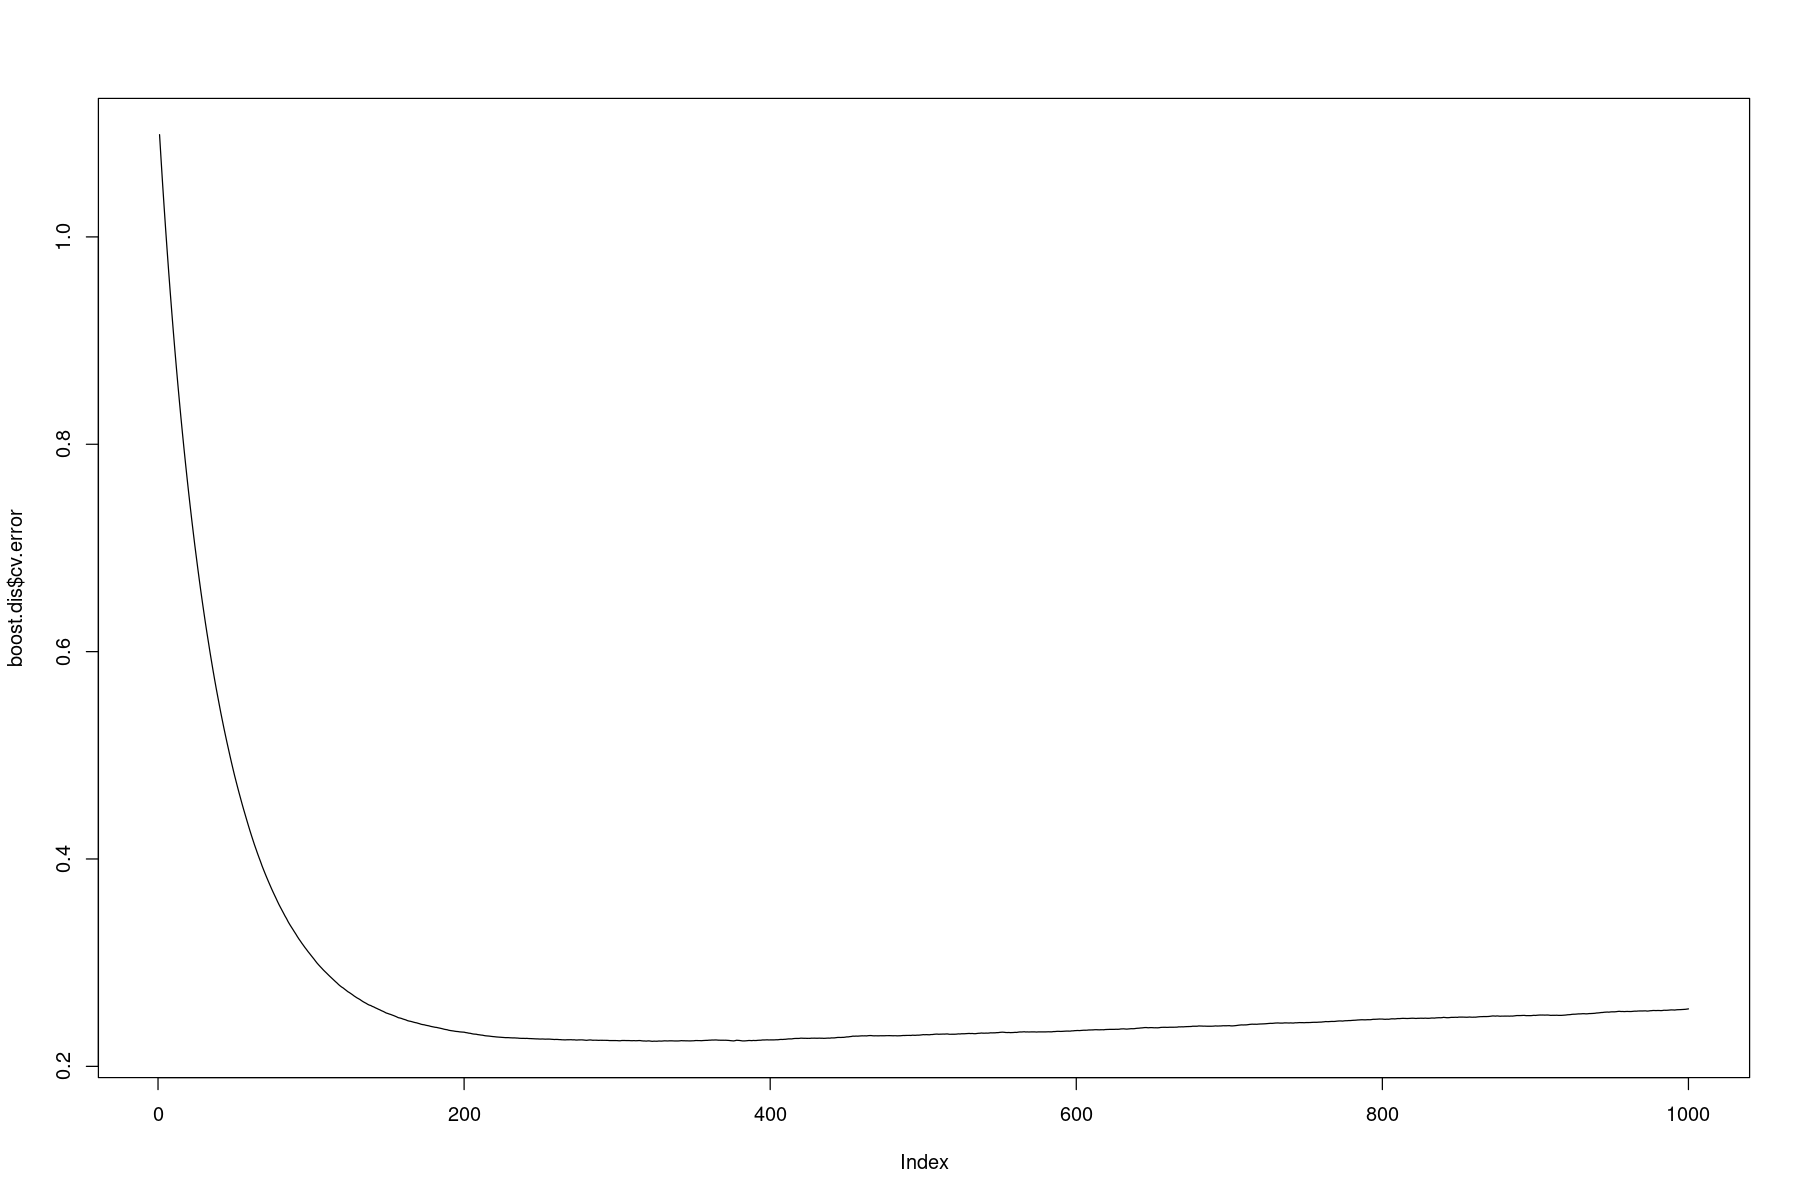

In [156]:
set.seed(12)
datappr2=datappr
datappr2[,"Experience_Level"]=as.numeric(datappr[,"Experience_Level"])-1
boost.dis=gbm(Experience_Level~.,data=datappr2,distribution="multinomial", n.trees = 1000, cv.folds=10,
  interaction.depth = 4,
  shrinkage = 0.01,
  n.minobsinnode = 10,
  verbose = FALSE)
plot(boost.dis$cv.error,type="l")

Meilleur nombre d’arbres (selon CV): 323 


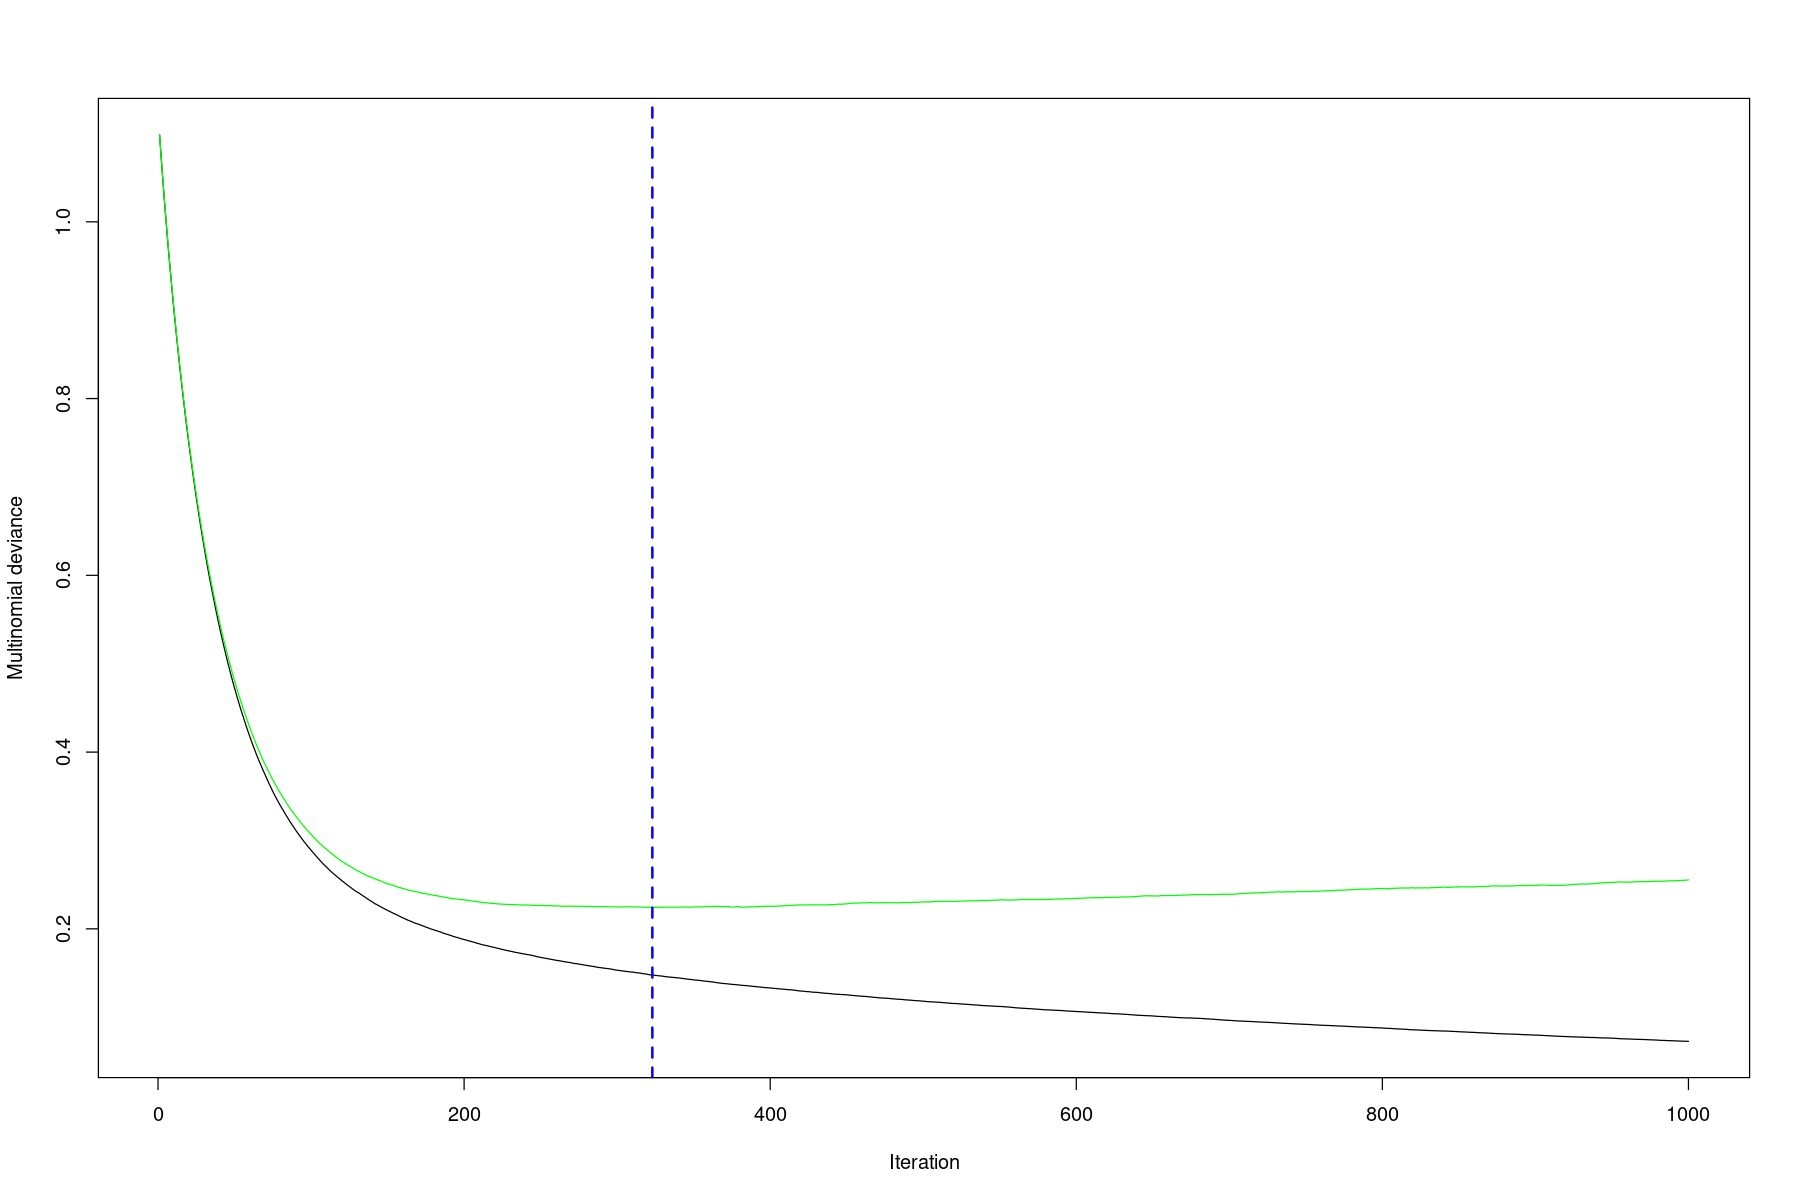

In [157]:
best.iter <- gbm.perf(boost.dis, method = "cv")
cat("Meilleur nombre d’arbres (selon CV):", best.iter, "\n")

In [177]:
# On suppose que datestq a les mêmes colonnes que datappr, sans la cible
datestq2 <- datestq
datestq2$Experience_Level <- as.numeric(datestq$Experience_Level) - 1  # même codage que le train

# Prédictions de probabilités (multinomial renvoie une matrice)
pred_boostq_t <- predict(boost.dis, newdata = datestq2, n.trees = best.iter, type = "response")

# Prédiction des classes (classe avec la probabilité max)
pred.classes <- apply(pred_boostq_t, 1, which.max) - 1  # car gbm retourne 1-indexed

In [178]:
true.labels <- datestq2$Experience_Level
conf.mat <- table(Prediction = pred.classes, Réalité = true.labels)
print(conf.mat)

          Réalité
Prediction  0  1  2
         0 60  2  0
         1 21 78  0
         2  0  0 34


FAIRE LA ROC ?

## 3.8 Réseaux de neurones

In [162]:
set.seed(13)
net.clf <- nnet(Experience_Level ~ ., data = datappr2,
                 size = 5,        # nombre de neurones dans la couche cachée
                 decay = 1,       # régularisation
                 maxit = 2000)    # nombre d’itérations max


# weights:  101
initial  value 517.499446 
iter  10 value 435.072901
iter  20 value 389.354317
iter  30 value 294.735706
iter  40 value 282.280823
iter  50 value 273.058814
iter  60 value 269.008457
iter  70 value 267.260974
iter  80 value 267.066195
iter  90 value 267.021279
iter 100 value 267.012204
final  value 267.012094 
converged



Parameter tuning of ‘nnet’:

- sampling method: 10-fold cross validation 

- best parameters:
 size decay
    4   0.1

- best performance: 0.2815617 

- Detailed performance results:
   size decay     error dispersion
1     3   0.1 0.2818557 0.05304476
2     4   0.1 0.2815617 0.05468899
3     5   0.1 0.2825091 0.05226723
4     6   0.1 0.2831286 0.05175607
5     7   0.1 0.2859777 0.05125466
6     3   0.5 0.2935947 0.04979326
7     4   0.5 0.2925344 0.04984847
8     5   0.5 0.2921775 0.04963029
9     6   0.5 0.2920272 0.05002958
10    7   0.5 0.2912655 0.04981332
11    3   1.0 0.3125566 0.04822610
12    4   1.0 0.3093678 0.04621899
13    5   1.0 0.3095887 0.04790423
14    6   1.0 0.3074813 0.04803933
15    7   1.0 0.3062248 0.04711511
16    3   2.0 0.3392901 0.04383630
17    4   2.0 0.3363817 0.04501354
18    5   2.0 0.3341950 0.04477118
19    6   2.0 0.3330794 0.04319292
20    7   2.0 0.3319380 0.04367933
21    3   3.0 0.3604225 0.04634632
22    4   3.0 0.3555500 0.04344457
23    5   3

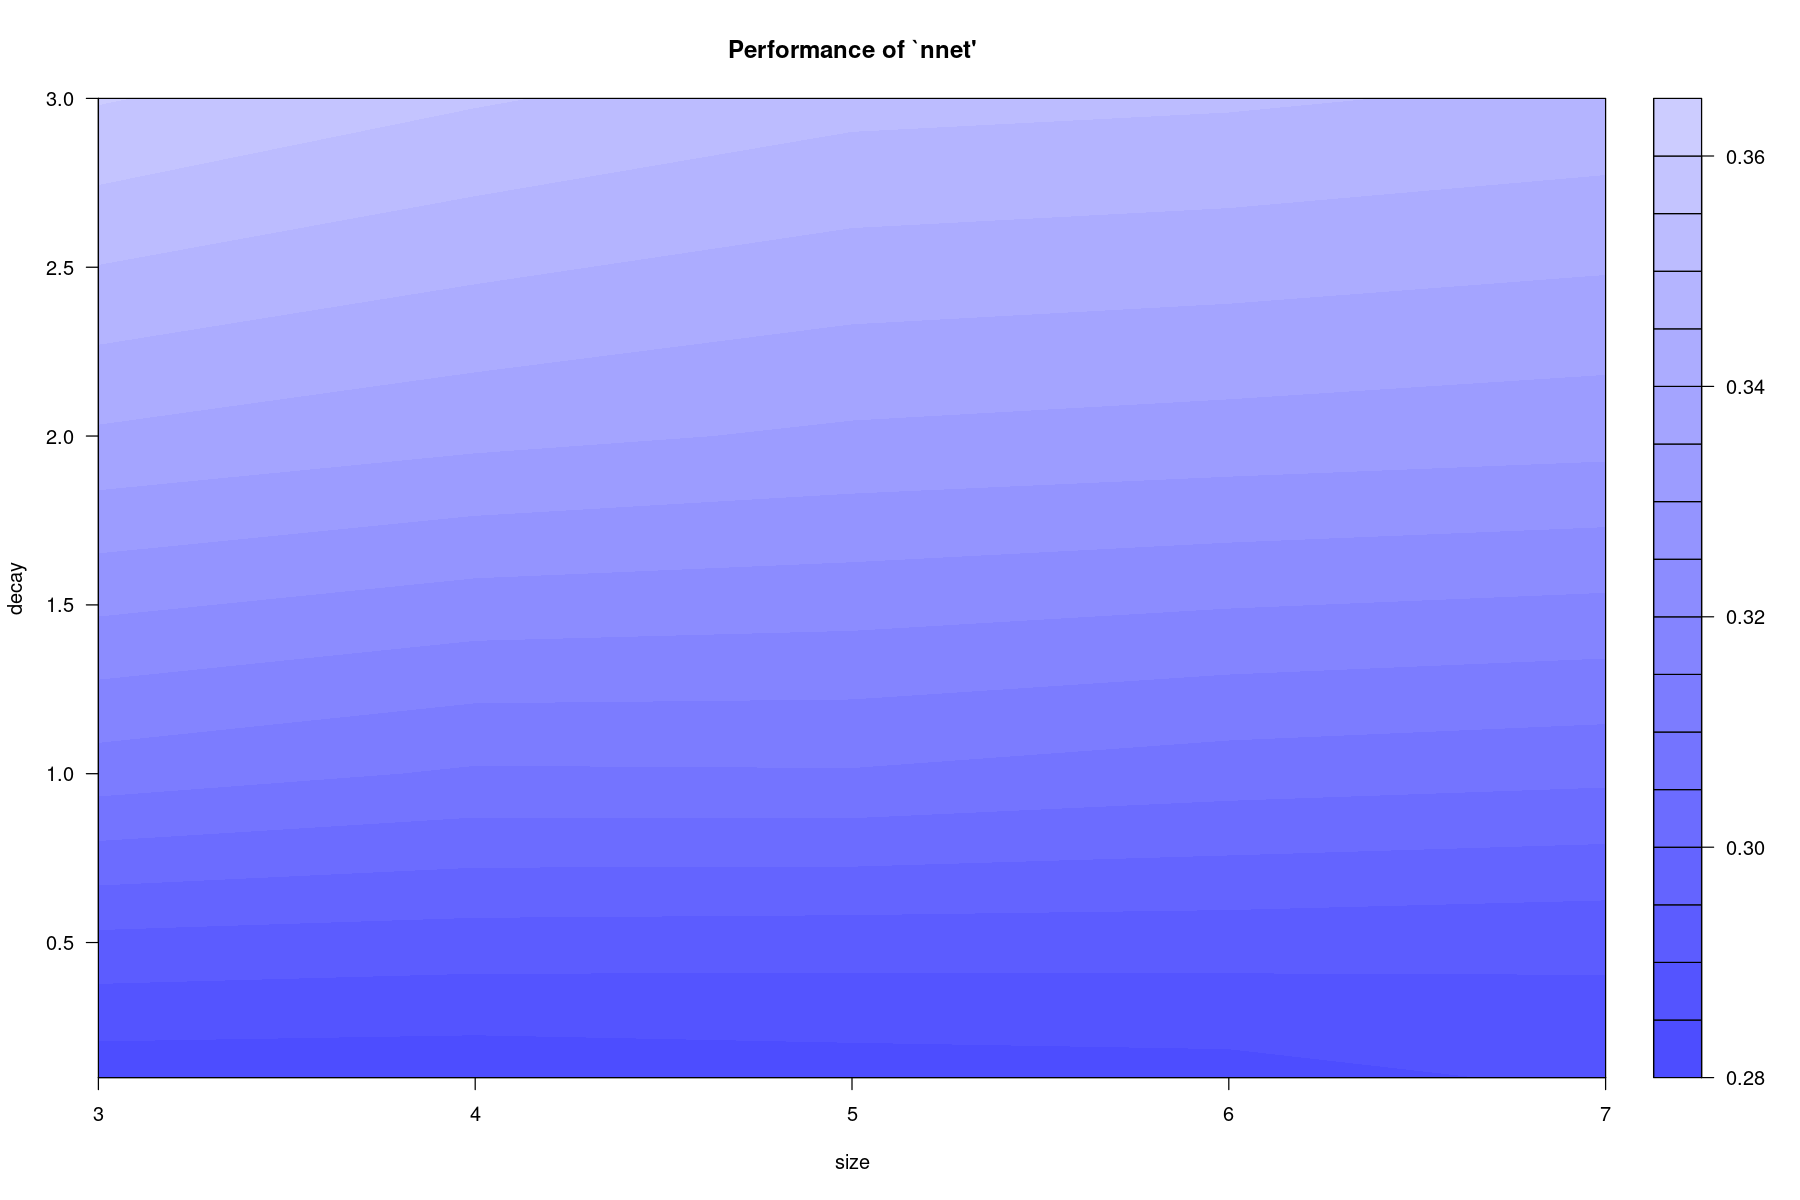

In [163]:
set.seed(14)
tune.nnet.classif <- tune.nnet(
  Experience_Level ~ ., 
  data = datappr2,
  size = c(3, 4, 5, 6, 7),
  decay = c(0.1, 0.5, 1, 2, 3),
  maxit = 1000
)

plot(tune.nnet.classif)
summary(tune.nnet.classif)

In [164]:
set.seed(15)
nnet.best <- nnet(Experience_Level ~ ., data = datappr2,
                  size = 4, decay = 0.1, maxit = 2000)

# weights:  81
initial  value 584.759484 
iter  10 value 428.546566
iter  20 value 394.540757
iter  30 value 294.468391
iter  40 value 249.237479
iter  50 value 224.438235
iter  60 value 222.667134
iter  70 value 221.905003
iter  80 value 221.720089
iter  90 value 221.565677
iter 100 value 220.653342
iter 110 value 220.167017
iter 120 value 219.546945
iter 130 value 219.274467
iter 140 value 219.238558
iter 150 value 219.205776
iter 160 value 218.578656
iter 170 value 218.171085
iter 180 value 218.027980
iter 190 value 217.902964
iter 200 value 217.791851
iter 210 value 217.772634
iter 220 value 217.583973
iter 230 value 216.730254
iter 240 value 216.635963
iter 250 value 216.479836
iter 260 value 215.330739
iter 270 value 215.203773
final  value 215.203406 
converged


In [174]:
pred.probs.nn <- predict(nnet.best, newdata = datestq2)

In [181]:
# Vecteur des vraies classes
true_labels <- datestq2$Experience_Level

In [187]:
# Régression logistique : on suppose que log.lm1, log.lm2, log.lm3 font One-vs-Rest
pred_lg1_t <- predict(log.qm1, newdata = datestq2, type = "response")
pred_lg2_t <- predict(log.qm2, newdata = datestq2, type = "response")
pred_lg3_t <- predict(log.qm3, newdata = datestq2, type = "response")
# Assemblage : 4 classes
pred_logit_all <- data.frame(
  "0" = 1 - pred_lg1_t,
  "1" = pred_lg1_t,
  "2" = pred_lg2_t,
  "3" = pred_lg3_t
)

# SVM
pred_svm_t <- predict(svm.model, newdata = datestq2, probability = TRUE)
probas_svm <- attr(pred_svm_t, "probabilities")

# Arbre
pred_tree_t <- predict(cart.pruned, newdata = datestq2, type = "prob")

# Random Forest
probas_rf <- rf.final$test$votes

# Boosting
probas_boost <- predict(boost.dis, newdata = datestq2, type = "response")

# Réseau de neurones
probas_nn <- predict(nnet.best, newdata = datestq2, type = "raw")

Using 323 trees...




In [191]:
plot_multiclass_roc_auc <- function(true_labels, pred_matrix, method_name, add = FALSE, col = "black", lty = 1) {
  aucs <- c()
  plotted <- FALSE
  
  for (class in colnames(pred_matrix)) {
    # Binarisation One-vs-Rest
    y_bin <- ifelse(true_labels == class, 1, 0)
    
    # Vérifie qu'on a bien 2 classes (ROCR nécessite ça)
    if (length(unique(y_bin)) < 2) {
      warning(paste("Classe", class, "absente du jeu de test, ROC ignorée pour cette classe"))
      next
    }
    
    pred <- prediction(pred_matrix[, class], y_bin)
    perf <- performance(pred, "tpr", "fpr")
    auc  <- performance(pred, "auc")@y.values[[1]]
    aucs <- c(aucs, auc)

    if (!plotted && !add) {
      plot(perf, main = paste("ROC -", method_name), col = col, lwd = 2, lty = lty)
      plotted <- TRUE
    } else {
      plot(perf, add = TRUE, col = col, lwd = 2, lty = lty)
    }
  }
  
  if (length(aucs) > 0) {
    return(mean(aucs))
  } else {
    return(NA)
  }
}

Warning message in plot_multiclass_roc_auc(true_labels, pred_logit_all, "LogReg", :
“Classe X0 absente du jeu de test, ROC ignorée pour cette classe”
Warning message in plot_multiclass_roc_auc(true_labels, pred_logit_all, "LogReg", :
“Classe X1 absente du jeu de test, ROC ignorée pour cette classe”
Warning message in plot_multiclass_roc_auc(true_labels, pred_logit_all, "LogReg", :
“Classe X2 absente du jeu de test, ROC ignorée pour cette classe”
Warning message in plot_multiclass_roc_auc(true_labels, pred_logit_all, "LogReg", :
“Classe X3 absente du jeu de test, ROC ignorée pour cette classe”
Warning message in plot_multiclass_roc_auc(true_labels, probas_svm, "SVM", add = TRUE, :
“Classe 3 absente du jeu de test, ROC ignorée pour cette classe”
Warning message in plot_multiclass_roc_auc(true_labels, pred_tree_t, "Tree", add = TRUE, :
“Classe 3 absente du jeu de test, ROC ignorée pour cette classe”


ERROR: Error in pred_matrix[, class]: nombre de dimensions incorrect


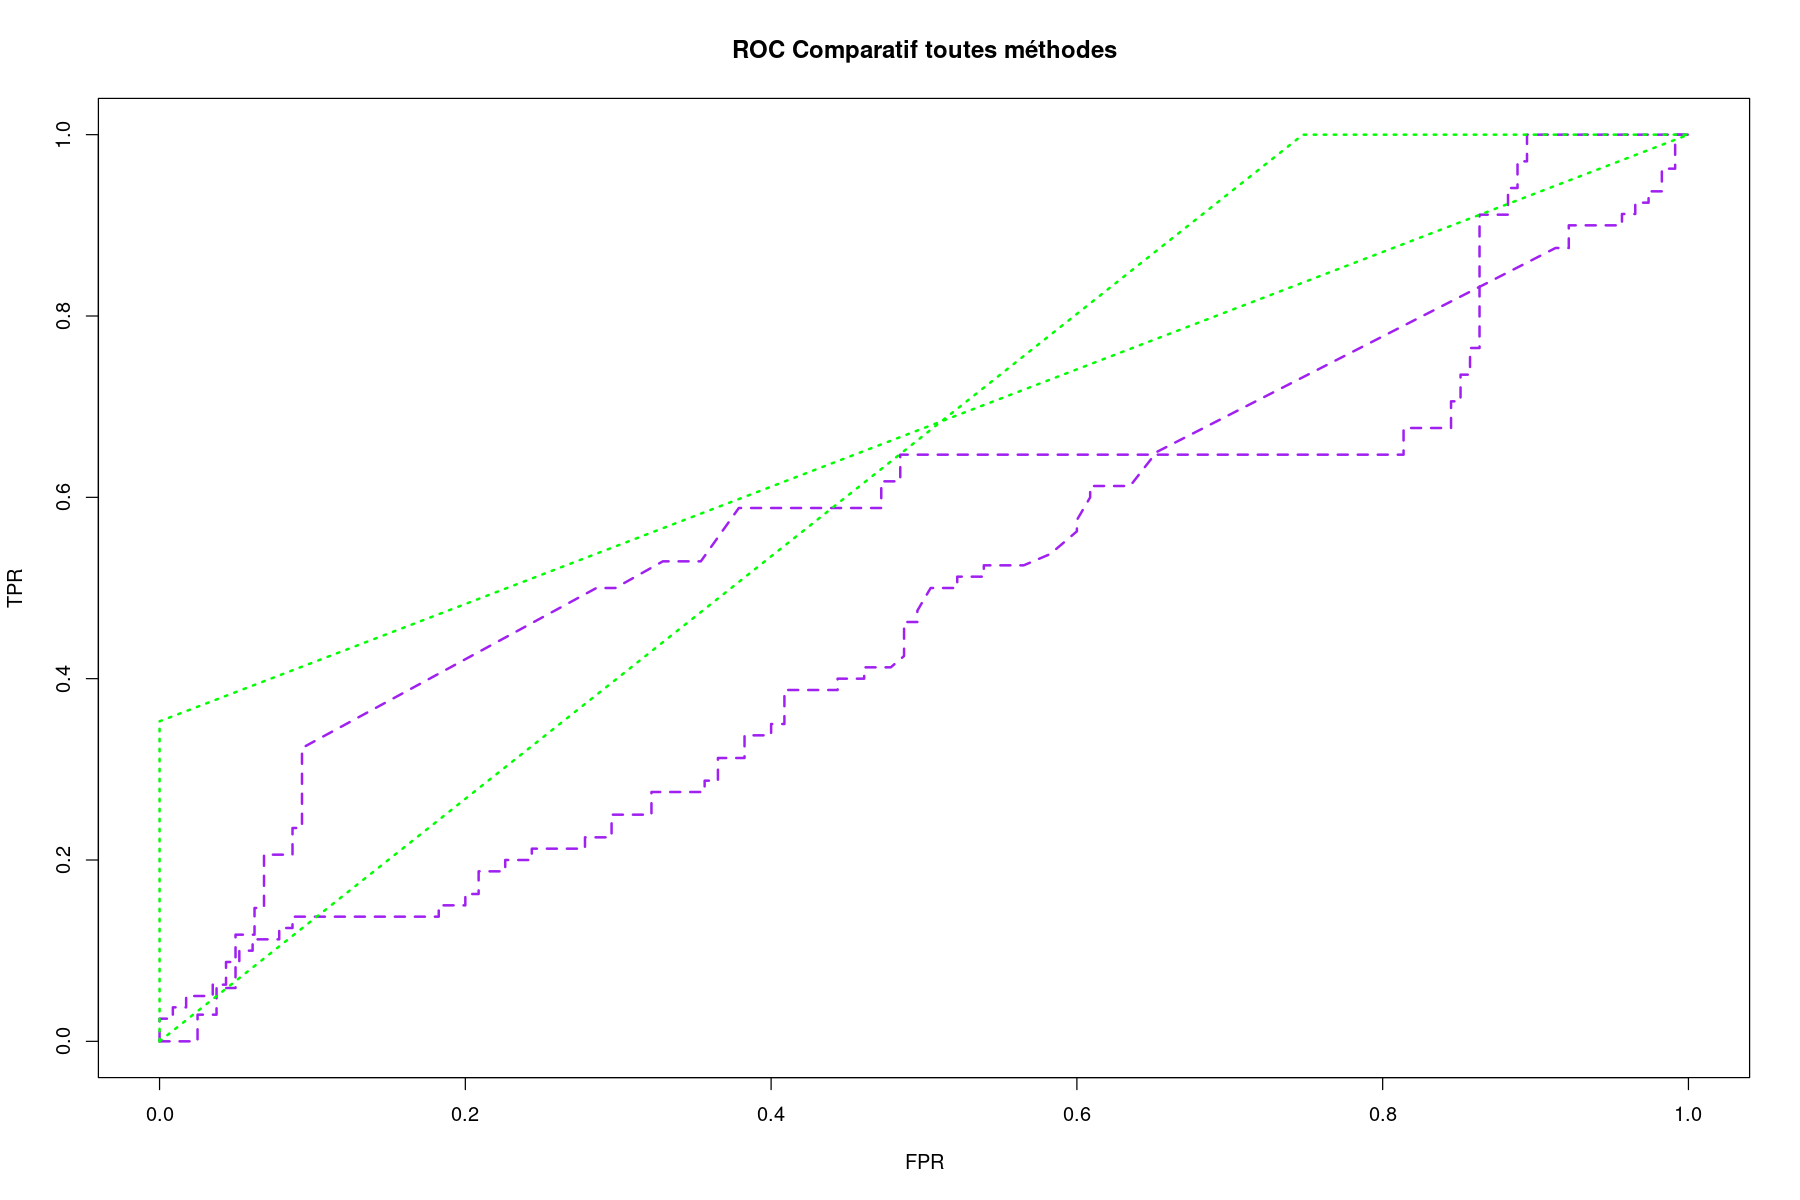

In [192]:
plot(0, 0, type = "n", xlim = c(0,1), ylim = c(0,1),
     xlab = "FPR", ylab = "TPR", main = "ROC Comparatif toutes méthodes")

auc_logit <- plot_multiclass_roc_auc(true_labels, pred_logit_all, "LogReg", add = TRUE, col = "blue", lty = 1)
auc_svm   <- plot_multiclass_roc_auc(true_labels, probas_svm, "SVM", add = TRUE, col = "purple", lty = 2)
auc_tree  <- plot_multiclass_roc_auc(true_labels, pred_tree_t, "Tree", add = TRUE, col = "green", lty = 3)
auc_rf    <- plot_multiclass_roc_auc(true_labels, probas_rf, "RandomForest", add = TRUE, col = "red", lty = 4)
auc_boost <- plot_multiclass_roc_auc(true_labels, probas_boost, "Boosting", add = TRUE, col = "orange", lty = 5)
auc_nn    <- plot_multiclass_roc_auc(true_labels, probas_nn, "NeuralNet", add = TRUE, col = "brown", lty = 6)

legend("bottomright", legend = c(
  paste0("LogReg (AUC=", round(auc_logit, 3), ")"),
  paste0("SVM (AUC=", round(auc_svm, 3), ")"),
  paste0("Tree (AUC=", round(auc_tree, 3), ")"),
  paste0("RF (AUC=", round(auc_rf, 3), ")"),
  paste0("Boost (AUC=", round(auc_boost, 3), ")"),
  paste0("NN (AUC=", round(auc_nn, 3), ")")
), col = c("blue", "purple", "green", "red", "orange", "brown"),
lty = 1:6, lwd = 2, cex = 0.8)


CA MARCHE PAAAAAAS PUREEEEEEEEEEEEEE>